In [57]:
##Import all libraries here
import numpy as np
import pandas as pd
from string import punctuation
from nltk.corpus import stopwords,wordnet
from nltk import pos_tag
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 


In [14]:
#Loading the data
data = pd.read_csv('C:/Users/meghn/Desktop/Sentiment Analysis Financial News/all-data.csv',encoding = 'latin-1',
                   names = ['sentiment','text'])
data.head()

sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

In [63]:

stop_words = set(stopwords.words('english'))
stop_words.update(punctuation)
#print(stop)

{'has', 'weren', '#', '^', "you're", 'up', 'll', "didn't", "wouldn't", '\\', 'him', 'both', 'your', 'all', '<', '%', '$', 'is', 'a', '?', "shan't", 'herself', 'once', 'as', 'o', 'had', '{', "mustn't", "wasn't", 'theirs', 'too', "'", 'we', 'our', 'below', 'd', 'only', '*', 'those', '"', 'no', 'couldn', '/', 'himself', "you'd", 'against', 'or', 'you', '-', 'ourselves', 'down', 'are', 'again', 'whom', "should've", 'than', 'being', ':', 'here', 'but', 'just', 'most', 'under', 'by', 'hasn', 'same', '(', ',', "you'll", "weren't", 'ours', 'will', "doesn't", 'nor', "won't", 'did', 'because', 'yourself', 'that', 'about', 'don', 'its', 'when', 'other', 'doesn', 'such', 'few', 'wasn', 'her', 'ma', 'how', 'each', 'very', 'of', '[', 'until', 'be', 'won', 'doing', 'i', 're', ')', 'itself', 'can', "don't", 'these', "aren't", 'shouldn', 'hers', 'if', 'them', 'and', 'his', 'which', '&', 'isn', 'yours', "that'll", 't', 'do', 'out', 'what', "she's", 'themselves', 'more', 'wouldn', ']', 'during', 'should'

In [64]:


text = nltk.word_tokenize(''.join(data['text']))
tagged_text = nltk.pos_tag(text)
#print(tagged_text)
    

In [17]:


def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN
        

In [18]:


lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            print(pos)
            new_w = lemmatizer.lemmatize(w,pos = get_simple_pos(pos[0][1]))
            print(new_w)
            clean_text.append(new_w)
    return clean_text


def join_text(text):
    return " ".join(text)

In [66]:

t = clean_review(' '.join(data['text']))
#print(t)
                 

[('According', 'VBG')]
According
[('Gran', 'NN')]
Gran
[('company', 'NN')]
company
[('plan', 'NN')]
plan
[('move', 'NN')]
move
[('production', 'NN')]
production
[('Russia', 'NN')]
Russia
[('although', 'IN')]
although
[('company', 'NN')]
company
[('grow', 'NN')]
grow
[('Technopolis', 'NN')]
Technopolis
[('plan', 'NN')]
plan
[('develop', 'VB')]
develop
[('stage', 'NN')]
stage
[('area', 'NN')]
area
[('less', 'RBR')]
less
[('100,000', 'CD')]
100,000
[('square', 'NN')]
square
[('meter', 'NN')]
meter
[('order', 'NN')]
order
[('host', 'NN')]
host
[('company', 'NN')]
company
[('work', 'NN')]
work
[('computer', 'NN')]
computer
[('technology', 'NN')]
technology
[('telecommunication', 'NN')]
telecommunication
[('statement', 'NN')]
statement
[('say', 'VB')]
say
[('international', 'JJ')]
international
[('electronic', 'JJ')]
electronic
[('industry', 'NN')]
industry
[('company', 'NN')]
company
[('Elcoteq', 'NN')]
Elcoteq
[('laid', 'NN')]
laid
[('ten', 'NNS')]
ten
[('employee', 'NN')]
employee
[('Tall

[('lead', 'NN')]
lead
[('Nokia', 'NNP')]
Nokia
[('announce', 'NN')]
announce
[('plan', 'NN')]
plan
[('team', 'NN')]
team
[('Sanyo', 'NN')]
Sanyo
[('manufacture', 'NN')]
manufacture
[('3G', 'CD')]
3G
[('handset', 'NN')]
handset
[('Nokian', 'JJ')]
Nokian
[('Tyres', 'NNS')]
Tyres
[('fourth-quarter', 'NN')]
fourth-quarter
[('earnings', 'NNS')]
earnings
[('report', 'NN')]
report
[('beat', 'NN')]
beat
[('analyst', 'NN')]
analyst
[('expectation', 'NN')]
expectation
[('dealer', 'NN')]
dealer
[('say', 'VB')]
say
[('Incap', 'NN')]
Incap
[('Contract', 'NN')]
Contract
[('Manufacturing', 'VBG')]
Manufacturing
[('Services', 'NNS')]
Services
[('Pvt', 'NN')]
Pvt
[('Ltd', 'NNP')]
Ltd
[('subsidiary', 'NN')]
subsidiary
[('Incap', 'NN')]
Incap
[('Corporation', 'NN')]
Corporation
[('Finland', 'NN')]
Finland
[('plan', 'NN')]
plan
[('double', 'RB')]
double
[('revenue', 'NN')]
revenue
[('2007-2008', 'JJ')]
2007-2008
[('board', 'NN')]
board
[('director', 'NN')]
director
[('propose', 'NN')]
propose
[('dividend'

[('almost', 'RB')]
almost
[('triple', 'NN')]
triple
[('EUR297', 'NN')]
EUR297
[('.3', 'NN')]
.3
[('EUR107', 'NN')]
EUR107
[('.1', 'NN')]
.1
[('2009', 'CD')]
2009
[('announce', 'NN')]
announce
[('proposal', 'NN')]
proposal
[('raise', 'NN')]
raise
[('payout', 'NN')]
payout
[('Helsinki', 'NN')]
Helsinki
[('ELIiV', 'NN')]
ELIiV
[('today', 'NN')]
today
[('report', 'NN')]
report
[('EPS', 'NN')]
EPS
[('EUR1', 'NN')]
EUR1
[('.13', 'NN')]
.13
[('2009', 'CD')]
2009
[('increase', 'NN')]
increase
[('EPS', 'NN')]
EPS
[('EUR1', 'NN')]
EUR1
[('.12', 'NN')]
.12
[('2008', 'CD')]
2008
[('Aspo', 'NN')]
Aspo
[('Plc', 'NN')]
Plc
[('STOCK', 'NN')]
STOCK
[('EXCHANGE', 'NN')]
EXCHANGE
[('RELEASE', 'NN')]
RELEASE
[('February', 'NNP')]
February
[('11', 'CD')]
11
[('2011', 'CD')]
2011
[('at8', 'NN')]
at8
[('.45', 'NN')]
.45
[('a.m.', 'NN')]
a.m.
[('ESL', 'NN')]
ESL
[('Shipping', 'VBG')]
Shipping
[('Ltd', 'NNP')]
Ltd
[('part', 'NN')]
part
[('Aspo', 'NN')]
Aspo
[('Group', 'NNP')]
Group
[('sign', 'NN')]
sign
[('new

[('Chartered', 'VBN')]
Chartered
[('STAN', 'NN')]
STAN
[('rise', 'NN')]
rise
[('1.2', 'CD')]
1.2
[('FTSE', 'NN')]
FTSE
[('100', 'CD')]
100
[('Royal', 'NN')]
Royal
[('Bank', 'NNP')]
Bank
[('Scotland', 'NN')]
Scotland
[('RBS', 'NN')]
RBS
[('share', 'NN')]
share
[('rise', 'NN')]
rise
[('2', 'CD')]
2
[('Barclays', 'NNS')]
Barclays
[('share', 'NN')]
share
[('BARC', 'NN')]
BARC
[('BCS', 'NN')]
BCS
[('1.7', 'CD')]
1.7
[('Shares', 'NNS')]
Shares
[('Nokia', 'NNP')]
Nokia
[('Corp.', 'NNP')]
Corp.
[('rise', 'NN')]
rise
[('Thursday', 'NNP')]
Thursday
[('cell', 'NN')]
cell
[('phone', 'NN')]
phone
[('maker', 'NN')]
maker
[('say', 'VB')]
say
[('third-quarter', 'NN')]
third-quarter
[('earnings', 'NNS')]
earnings
[('almost', 'RB')]
almost
[('double', 'RB')]
double
[('share', 'NN')]
share
[('global', 'JJ')]
global
[('handset', 'NN')]
handset
[('market', 'NN')]
market
[('increase', 'NN')]
increase
[('financial', 'JJ')]
financial
[('report', 'NN')]
report
[('publish', 'NN')]
publish
[('Friday', 'NNP')]
Fr

[('option', 'NN')]
option
[('plan', 'NN')]
plan
[('result', 'NN')]
result
[('share', 'NN')]
share
[('issue', 'NN')]
issue
[('number', 'NN')]
number
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('share', 'NN')]
share
[('increase', 'NN')]
increase
[('391,630', 'CD')]
391,630
[('share', 'NN')]
share
[('share', 'NN')]
share
[('capital', 'NN')]
capital
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('15,665.20', 'CD')]
15,665.20
[('Finnish', 'JJ')]
Finnish
[('real', 'JJ')]
real
[('estate', 'NN')]
estate
[('investor', 'NN')]
investor
[('Sponda', 'NN')]
Sponda
[('Plc', 'NN')]
Plc
[('say', 'VB')]
say
[('Wednesday', 'NNP')]
Wednesday
[('12', 'CD')]
12
[('March', 'NNP')]
March
[('sign', 'NN')]
sign
[('agreement', 'NN')]
agreement
[('Danske', 'NN')]
Danske
[('Bank', 'NNP')]
Bank
[('A-S', 'JJ')]
A-S
[('Helsinki', 'NN')]
Helsinki
[('Branch', 'NN')]
Branch
[('7-year', 'JJ')]
7-year
[('EUR150m', 'NN')]
EUR150m
[('credit', 'NN')]
credit
[('facility', 'NN')]
facility
[('Ilmarinen', 'NN')]
Ilmarinen
[(

[('Sunrise', 'NN')]
Sunrise
[('Valley', 'NNP')]
Valley
[('director', 'NN')]
director
[('Andrius', 'NN')]
Andrius
[('Bagdonas', 'NNS')]
Bagdonas
[('4', 'CD')]
4
[('February', 'NNP')]
February
[('2011', 'CD')]
2011
[('Finnish', 'JJ')]
Finnish
[('broadband', 'NN')]
broadband
[('data', 'NNS')]
data
[('communication', 'NN')]
communication
[('system', 'NN')]
system
[('provider', 'NN')]
provider
[('Teleste', 'NN')]
Teleste
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('TLT1V', 'NN')]
TLT1V
[('saw', 'NN')]
saw
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('jump', 'NN')]
jump
[('EUR2', 'NN')]
EUR2
[('.1', 'NN')]
.1
[('last', 'JJ')]
last
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('EUR995', 'NN')]
EUR995
[(',000', 'NN')]
,000
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('Aktia', 'NN')]
Aktia
[('Group', 'NNP')]
Group
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('17.5', 'CD')]
17.5
[(

[('22', 'CD')]
22
[('percent', 'NN')]
percent
[('13', 'CD')]
13
[('percent', 'NN')]
percent
[('year-ago', 'JJ')]
year-ago
[('quarter', 'NN')]
quarter
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('increase', 'NN')]
increase
[('145.1', 'CD')]
145.1
[('EUR', 'NN')]
EUR
[('8.3', 'CD')]
8.3
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('3.4', 'CD')]
3.4
[('mn', 'NN')]
mn
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('margin', 'NN')]
margin
[('increase', 'NN')]
increase
[('11.2', 'CD')]
11.2
[('11.7', 'CD')]
11.7
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('3.11', 'CD')]
3.11
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('1.22', 'CD')]
1.22
[('mn', 'NN')]
mn
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('5mn', 'CD')]
5mn
[('EUR', 'NN')]
EUR
[('2.8', 'CD')]
2.8
[('mn', 'NN')]
mn
[('f

[('company', 'NN')]
company
[("'s", 'POS')]
's
[('order', 'NN')]
order
[('go', 'VB')]
go
[('EUR', 'NN')]
EUR
[('1.9', 'CD')]
1.9
[('bn', 'NN')]
bn
[('12', 'CD')]
12
[('month', 'NN')]
month
[('Finnish', 'JJ')]
Finnish
[('Aldata', 'NNS')]
Aldata
[('Solution', 'NN')]
Solution
[('sign', 'NN')]
sign
[('contract', 'NN')]
contract
[('supply', 'NN')]
supply
[('G.O.L.D', 'NN')]
G.O.L.D
[('system', 'NN')]
system
[('two', 'CD')]
two
[('French', 'JJ')]
French
[('retail', 'JJ')]
retail
[('chain', 'NN')]
chain
[('Finnish', 'JJ')]
Finnish
[('Bank', 'NNP')]
Bank
[('+_land', 'NN')]
+_land
[('report', 'NN')]
report
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('21.3', 'CD')]
21.3
[('mn', 'NN')]
mn
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('EUR', 'NN')]
EUR
[('6.1', 'CD')]
6.1
[('mn', 'NN')]
mn
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('financia

[('sale', 'NN')]
sale
[('12-month', 'JJ')]
12-month
[('period', 'NN')]
period
[('increase', 'NN')]
increase
[('respectively', 'RB')]
respectively
[('EUR4', 'NN')]
EUR4
[('.7', 'NN')]
.7
[('EUR26', 'NN')]
EUR26
[('.7', 'NN')]
.7
[('compare', 'NN')]
compare
[('2004', 'CD')]
2004
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('nine-month', 'JJ')]
nine-month
[('period', 'NN')]
period
[('increase', 'NN')]
increase
[('respectively', 'RB')]
respectively
[('26.6', 'CD')]
26.6
[('3.4', 'CD')]
3.4
[('compare', 'NN')]
compare
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2006', 'CD')]
2006
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('six-month', 'JJ')]
six-month
[('period', 'NN')]
period
[('increase', 'NN')]
increase
[('respectively', 'RB')]
respectively
[('EUR13', 'NN')]
EUR13
[('.8', 'NN')]
.8
[('EUR143', 'NN')]
EUR143
[('.6', 'NN')]
.6
[('compare', 'NN')]
compare
[(

[('Finnish', 'JJ')]
Finnish
[('textile', 'NN')]
textile
[('clothing', 'NN')]
clothing
[('design', 'NN')]
design
[('company', 'NN')]
company
[('Marimekko', 'NN')]
Marimekko
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('MMO1V', 'NN')]
MMO1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR928', 'NN')]
EUR928
[(',000', 'NN')]
,000
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('EUR13', 'NN')]
EUR13
[(',000', 'NN')]
,000
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('year', 'NN')]
year
[('early', 'RB')]
early
[('Finland-based', 'JJ')]
Finland-based
[('Elcoteq', 'NN')]
Elcoteq
[('SE', 'NN')]
SE
[('privately', 'RB')]
privately
[('held', 'NN')]
held
[('provider', 'NN')]
provider
[('electronics', 'NNS')]
electronics
[('manufacturing', 'NN')]
manufacturing
[('service', 'NN')]
service
[('communication', 'NN')]
communication
[('company', 'NN')]
company
[('say', 'VB')]
say
[('Thursday', '

[('EUR41m', 'NN')]
EUR41m
[('EUR30m', 'NN')]
EUR30m
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('HELSINKI', 'NN')]
HELSINKI
[('AFX', 'NN')]
AFX
[('Retail', 'JJ')]
Retail
[('wholesale', 'NN')]
wholesale
[('group', 'NN')]
group
[('Kesko', 'NNP')]
Kesko
[('report', 'NN')]
report
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('659.4', 'CD')]
659.4
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('February', 'NNP')]
February
[('increase', 'NN')]
increase
[('10.8', 'CD')]
10.8
[('pct', 'NN')]
pct
[('year-on-year', 'JJ')]
year-on-year
[('However', 'RB')]
However
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('2010', 'CD')]
2010
[('see', 'VB')]
see
[('grown', 'NN')]
grown
[('EUR598', 'NN')]
EUR598
[('.3', 'NN')]
.3
[('EUR582', 'NN')]
EUR582
[('.3', 'NN')]
.3
[('2009', 'CD')]
2009
[('However', 'RB')]
However
[('sale', 'NN')]
sale
[('return', 'NN')]
return
[('growth', 'NN')]
growth
[('April-June', 'JJ')]
April-June
[('2010', 'CD')]
2010
[('CEO', 'NN')]
CEO
[('Pekka', '

[('provider', 'NN')]
provider
[('Affecto', 'NN')]
Affecto
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('AFE1V', 'NN')]
AFE1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('8.5', 'CD')]
8.5
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('11m', 'CD')]
11m
[('2008', 'CD')]
2008
[('EUR', 'NN')]
EUR
[('7', 'CD')]
7
[('million', 'CD')]
million
[('2007', 'CD')]
2007
[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Feb', 'NN')]
Feb
[('6', 'CD')]
6
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('fishing', 'NN')]
fishing
[('tackle', 'NN')]
tackle
[('company', 'NN')]
company
[('Rapala', 'NN')]
Rapala
[('VMC', 'NN')]
VMC
[('Corp', 'NNP')]
Corp
[('HEL', 'NN')]
HEL
[('RAP1V', 'NN')]
RAP1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('19.2', 'CD')]
19.2
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('24.6', 'CD')]
24.6
[(

[('Passenger', 'NN')]
Passenger
[('volume', 'NN')]
volume
[('rise', 'NN')]
rise
[('8.4', 'CD')]
8.4
[('accounting', 'NN')]
accounting
[('period', 'NN')]
period
[('Passenger-related', 'JJ')]
Passenger-related
[('revenue', 'NN')]
revenue
[('rise', 'NN')]
rise
[('5.1', 'CD')]
5.1
[('EUR', 'NN')]
EUR
[('460.8', 'CD')]
460.8
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('438.5', 'CD')]
438.5
[('mn', 'NN')]
mn
[('2009', 'CD')]
2009
[('Press', 'NN')]
Press
[('release', 'NN')]
release
[('9', 'CD')]
9
[('October', 'NNP')]
October
[('2009', 'CD')]
2009
[('Ruukki', 'NN')]
Ruukki
[('sign', 'NN')]
sign
[('contract', 'NN')]
contract
[('deliver', 'NN')]
deliver
[('install', 'NN')]
install
[('steel', 'NN')]
steel
[('structure', 'NN')]
structure
[('bridge', 'NN')]
bridge
[('Kyronsalmi', 'NNP')]
Kyronsalmi
[('strait', 'NN')]
strait
[('Savonlinna', 'NN')]
Savonlinna
[('Finland', 'NN')]
Finland
[('Pretax', 'JJ')]
Pretax
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('0.6', 'CD')]
0.6
[('m

[('7.0', 'CD')]
7.0
[('pct', 'NN')]
pct
[('2008', 'CD')]
2008
[('fair', 'NN')]
fair
[('value', 'NN')]
value
[('investment', 'NN')]
investment
[('property', 'NN')]
property
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('2,534.9', 'CD')]
2,534.9
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('2,455.1', 'CD')]
2,455.1
[('mn', 'NN')]
mn
[('2006', 'CD')]
2006
[('Finnish', 'JJ')]
Finnish
[('government', 'NN')]
government
[('announce', 'NN')]
announce
[('Wednesday', 'NNP')]
Wednesday
[('sell', 'NN')]
sell
[('32', 'CD')]
32
[('percent', 'NN')]
percent
[('stake', 'NN')]
stake
[('chemical', 'NN')]
chemical
[('fertilizer', 'NN')]
fertilizer
[('group', 'NN')]
group
[('Kemira', 'NNP')]
Kemira
[('Oyj', 'NN')]
Oyj
[('x20ac', 'NN')]
x20ac
[('655.6', 'CD')]
655.6
[('million', 'CD')]
million
[('890US', 'CD')]
890US
[('million', 'CD')]
million
[('send', 'NN')]
send
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('share', 'NN')]
share
[('price', 'NN')]
price
[('6', 'CD')]
6
[('percent', 'NN')]
percent
[('firm',

[('textile', 'NN')]
textile
[('clothing', 'NN')]
clothing
[('company', 'NN')]
company
[('Marimekko', 'NN')]
Marimekko
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('MMO1V', 'NN')]
MMO1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('preliminary', 'JJ')]
preliminary
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('grow', 'NN')]
grow
[('EUR8', 'NN')]
EUR8
[('.2', 'NN')]
.2
[('2010', 'CD')]
2010
[('EUR6', 'NN')]
EUR6
[('.3', 'NN')]
.3
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('Componenta', 'NN')]
Componenta
[('publish', 'NN')]
publish
[('new', 'JJ')]
new
[('long-term', 'JJ')]
long-term
[('strategy', 'NN')]
strategy
[('period', 'NN')]
period
[('2011-2015', 'JJ')]
2011-2015
[('aim', 'NN')]
aim
[('grow', 'NN')]
grow
[('together', 'RB')]
together
[('customer', 'NN')]
customer
[('Finnish', 'JJ')]
Finnish
[('Larox', 'NNP')]
Larox
[('sign', 'NN')]
sign
[('contract', 'NN')]
contract
[('Talvivaara', 'NN')]
Talvivaara
[('Project', 'NN')]
Project
[('delivery', 'NN')]
delivery
[('fi

[('period', 'NN')]
period
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('rise', 'NN')]
rise
[('8', 'CD')]
8
[('year-on-year', 'JJ')]
year-on-year
[('EUR64', 'NN')]
EUR64
[('.3', 'NN')]
.3
[('due', 'JJ')]
due
[('business', 'NN')]
business
[('acquisition', 'NN')]
acquisition
[('realize', 'VB')]
realize
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2008-09', 'JJ')]
2008-09
[('effect', 'NN')]
effect
[('EUR10', 'NN')]
EUR10
[('.9', 'NN')]
.9
[('review', 'NN')]
review
[('period', 'NN')]
period
[('reporting', 'NN')]
reporting
[('period', 'NN')]
period
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('grow', 'NN')]
grow
[('43.2', 'CD')]
43.2
[('EUR', 'NN')]
EUR
[('6', 'CD')]
6
[('million', 'CD')]
million
[('Last', 'JJ')]
Last
[('year', 'NN')]
year
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('68.3', 'CD')]
68.3
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('62.2', 'CD')]
6

[('increase', 'NN')]
increase
[('slightly', 'RB')]
slightly
[('Stora', 'NNS')]
Stora
[('Enso', 'NN')]
Enso
[("'s", 'POS')]
's
[('third-quarter', 'NN')]
third-quarter
[('pre-tax', 'NN')]
pre-tax
[('profit', 'NN')]
profit
[('double', 'RB')]
double
[('EUR', 'NN')]
EUR
[('197mn', 'CD')]
197mn
[('Strongest', 'JJS')]
Strongest
[('growth', 'NN')]
growth
[('see', 'VB')]
see
[('new', 'JJ')]
new
[('market', 'NN')]
market
[('Russia', 'NN')]
Russia
[('Czech', 'NN')]
Czech
[('Republic', 'JJ')]
Republic
[('Slovakia', 'NN')]
Slovakia
[('airline', 'NN')]
airline
[('order', 'NN')]
order
[('nine', 'CD')]
nine
[('Airbus', 'NN')]
Airbus
[('A350-900', 'JJ')]
A350-900
[('aircraft', 'NN')]
aircraft
[('delivery', 'NN')]
delivery
[('2011', 'CD')]
2011
[('becomes', 'NNS')]
becomes
[('lead', 'NN')]
lead
[('airline', 'NN')]
airline
[('late', 'RB')]
late
[('variant', 'NN')]
variant
[('Rolls-Royce', 'JJ')]
Rolls-Royce
[('Trent', 'NN')]
Trent
[('series', 'NN')]
series
[('engine', 'NN')]
engine
[('call', 'NN')]
call


[('liquid', 'NN')]
liquid
[('handle', 'NN')]
handle
[('device', 'NN')]
device
[('already', 'RB')]
already
[('large', 'JJ')]
large
[('pipette', 'NN')]
pipette
[('accord', 'NN')]
accord
[('Biohit', 'NNP')]
Biohit
[('Efore', 'NN')]
Efore
[("'s", 'POS')]
's
[('CEO', 'NN')]
CEO
[('Reijo', 'NN')]
Reijo
[('Maihaniemi', 'NN')]
Maihaniemi
[('say', 'VB')]
say
[('company', 'NN')]
company
[('developed', 'NN')]
developed
[('already', 'RB')]
already
[('deliver', 'NN')]
deliver
[('power', 'NN')]
power
[('supply', 'NN')]
supply
[('unit', 'NN')]
unit
[('respective', 'NN')]
respective
[('system', 'NN')]
system
[('base', 'NN')]
base
[('technology', 'NN')]
technology
[('Chinese', 'JJ')]
Chinese
[('sector', 'NN')]
sector
[('company', 'NN')]
company
[('ZTE', 'NN')]
ZTE
[('Corp', 'NNP')]
Corp
[('000063', 'CD')]
000063
[('Finnish', 'JJ')]
Finnish
[('Talvivaara', 'NN')]
Talvivaara
[('Mining', 'NN')]
Mining
[('Co', 'NNP')]
Co
[('HEL', 'NN')]
HEL
[('TLV1V', 'NN')]
TLV1V
[('say', 'VB')]
say
[('Thursday', 'NNP')]


[('Helsinki', 'NN')]
Helsinki
[('Finland', 'NN')]
Finland
[('Juha', 'NN')]
Juha
[('Salokannel', 'NN')]
Salokannel
[('Kangasala', 'NNP')]
Kangasala
[('Finland', 'NN')]
Finland
[('Arto', 'NN')]
Arto
[('Palin', 'NN')]
Palin
[('Viiala', 'NN')]
Viiala
[('Finland', 'NN')]
Finland
[('developed', 'NN')]
developed
[('system', 'NN')]
system
[('provide', 'NN')]
provide
[('communication', 'NN')]
communication
[('security', 'NN')]
security
[('early', 'RB')]
early
[('report', 'NN')]
report
[('Nokian', 'JJ')]
Nokian
[('Tyres', 'NNS')]
Tyres
[('building', 'NN')]
building
[('plant', 'NN')]
plant
[('town', 'NN')]
town
[('Vsevolozhsk', 'NN')]
Vsevolozhsk
[('Russia', 'NN')]
Russia
[("'s", 'POS')]
's
[('Leningrad', 'NN')]
Leningrad
[('Region', 'NN')]
Region
[('annual', 'JJ')]
annual
[('production', 'NN')]
production
[('capacity', 'NN')]
capacity
[('4', 'CD')]
4
[('million', 'CD')]
million
[('tire', 'NN')]
tire
[('Biohit', 'NNP')]
Biohit
[('Inc.', 'NNP')]
Inc.
[('expand', 'NN')]
expand
[('mLINE', 'NN')]
mLI

[('stake', 'NN')]
stake
[('Finnish', 'JJ')]
Finnish
[('company', 'NN')]
company
[('Finnlines', 'NNS')]
Finnlines
[('35.4', 'CD')]
35.4
[('pct', 'NN')]
pct
[('30.5', 'CD')]
30.5
[('pct', 'NN')]
pct
[('held', 'NN')]
held
[('June', 'NNP')]
June
[('accord', 'NN')]
accord
[('news', 'NN')]
news
[('agency', 'NN')]
agency
[('ANSA', 'NN')]
ANSA
[('Nokia', 'NNP')]
Nokia
[('Messaging', 'VBG')]
Messaging
[('1.1', 'CD')]
1.1
[('enables', 'NNS')]
enables
[('customer', 'NN')]
customer
[('receive', 'NN')]
receive
[('e-mail', 'NN')]
e-mail
[('10', 'CD')]
10
[('e-mail', 'NN')]
e-mail
[('account', 'NN')]
account
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('support', 'NN')]
support
[('POP', 'NN')]
POP
[('IMAP', 'NN')]
IMAP
[('e-mail', 'NN')]
e-mail
[('service', 'NN')]
service
[('Production', 'NN')]
Production
[('capacity', 'NN')]
capacity
[('rise', 'NN')]
rise
[('gradually', 'RB')]
gradually
[('170,000', 'CD')]
170,000
[('tonne', 'NN')]
tonne
[('215,000', 'CD')]
215,000
[('tonne', 'NN')]
tonne
[('

[('pipeline', 'NN')]
pipeline
[('product', 'NN')]
product
[('company', 'NN')]
company
[('develop', 'VB')]
develop
[('``', '``')]
``
[('course', 'NN')]
course
[('talk', 'NN')]
talk
[('come', 'VB')]
come
[('new', 'JJ')]
new
[('project', 'NN')]
project
[('involve', 'NN')]
involve
[('material', 'NN')]
material
[('handle', 'NN')]
handle
[('``', '``')]
``
[('Konecranes', 'NNS')]
Konecranes
[('President', 'NNP')]
President
[('CEO', 'NN')]
CEO
[('Pekka', 'NN')]
Pekka
[('Lundmark', 'NN')]
Lundmark
[('say', 'VB')]
say
[('ask', 'NN')]
ask
[('whether', 'IN')]
whether
[('talk', 'NN')]
talk
[('Reliance', 'NN')]
Reliance
[('Industries', 'NNS')]
Industries
[('supply', 'NN')]
supply
[('equipment', 'NN')]
equipment
[('upcoming', 'VBG')]
upcoming
[('refinery', 'NN')]
refinery
[('Jamnagar', 'NN')]
Jamnagar
[('``', '``')]
``
[('Lidskoe', 'NN')]
Lidskoe
[('Pivo', 'NN')]
Pivo
[("'s", 'POS')]
's
[('investment', 'NN')]
investment
[('program', 'NN')]
program
[('foresees', 'NNS')]
foresees
[('integrate', 'NN')]


[('manipulator', 'NN')]
manipulator
[('maker', 'NN')]
maker
[('ACS', 'NN')]
ACS
[('Konecranes', 'NNS')]
Konecranes
[('80', 'CD')]
80
[('bought', 'NN')]
bought
[('German', 'JJ')]
German
[('sector', 'NN')]
sector
[('player', 'NN')]
player
[('Knight', 'NNP')]
Knight
[('Europe', 'NNP')]
Europe
[('Finnish', 'JJ')]
Finnish
[('paper', 'NN')]
paper
[('maker', 'NN')]
maker
[('UPM-Kymmene', 'NN')]
UPM-Kymmene
[('Corp.', 'NNP')]
Corp.
[('Monday', 'NNP')]
Monday
[('announce', 'NN')]
announce
[('sale', 'NN')]
sale
[('wrap', 'NN')]
wrap
[('unit', 'NN')]
unit
[('Walki', 'NN')]
Walki
[('Wisa', 'NNP')]
Wisa
[('CapMan', 'NN')]
CapMan
[('investment', 'NN')]
investment
[('group', 'NN')]
group
[('move', 'NN')]
move
[('concentrate', 'NN')]
concentrate
[('core', 'NN')]
core
[('business', 'NN')]
business
[('Following', 'VBG')]
Following
[('increase', 'NN')]
increase
[('company+\x88EUR', 'NN')]
company+EUR
[('TM', 'NN')]
TM
[('capital', 'NN')]
capital
[('total', 'JJ')]
total
[('5.5', 'CD')]
5.5
[('mln', 'NN')

[('Register', 'NN')]
Register
[('today', 'NN')]
today
[('decision', 'NN')]
decision
[('sell', 'NN')]
sell
[('share', 'NN')]
share
[('Lenenergo', 'NN')]
Lenenergo
[('reach', 'NN')]
reach
[('line', 'NN')]
line
[('Fortum', 'NN')]
Fortum
[("'s", 'POS')]
's
[('strategic', 'JJ')]
strategic
[('plan', 'NN')]
plan
[('invest', 'NN')]
invest
[('mainly', 'RB')]
mainly
[('generate', 'NN')]
generate
[('asset', 'NN')]
asset
[('Russia', 'NN')]
Russia
[('Lenenergo', 'NN')]
Lenenergo
[('grid', 'NN')]
grid
[('company', 'NN')]
company
[('press', 'NN')]
press
[('release', 'NN')]
release
[('say', 'VB')]
say
[('equipment', 'NN')]
equipment
[('expand', 'NN')]
expand
[('container', 'NN')]
container
[('handle', 'NN')]
handle
[('capacity', 'NN')]
capacity
[('Namibia', 'NN')]
Namibia
[("'s", 'POS')]
's
[('main', 'JJ')]
main
[('port', 'NN')]
port
[('Walvis', 'NN')]
Walvis
[('Bay', 'NN')]
Bay
[('west', 'NN')]
west
[('coast', 'NN')]
coast
[('expansion', 'NN')]
expansion
[('include', 'NN')]
include
[('double', 'RB')]

[('financial', 'JJ')]
financial
[('crisis', 'NN')]
crisis
[('Significance', 'NN')]
Significance
[('Teleste', 'NN')]
Teleste
[('emphasise', 'NN')]
emphasise
[('large', 'JJ')]
large
[('size', 'NN')]
size
[('grow', 'NN')]
grow
[('economy', 'NN')]
economy
[('well', 'RB')]
well
[('rapid', 'JJ')]
rapid
[('development', 'NN')]
development
[('TV', 'NN')]
TV
[('service', 'NN')]
service
[('distribution', 'NN')]
distribution
[('industry', 'NN')]
industry
[('Poland', 'NNP')]
Poland
[('view', 'NN')]
view
[('attractive', 'JJ')]
attractive
[('market', 'NN')]
market
[('``', '``')]
``
[('reach', 'NN')]
reach
[('agreement', 'NN')]
agreement
[('union', 'NN')]
union
[('flight', 'NN')]
flight
[('continue', 'NN')]
continue
[('normal', 'JJ')]
normal
[('``', '``')]
``
[('Finnair', 'NN')]
Finnair
[('spokesman', 'NN')]
spokesman
[('Usko', 'NN')]
Usko
[('Maatta', 'NN')]
Maatta
[('say', 'VB')]
say
[('Finland', 'NN')]
Finland
[('insurance', 'NN')]
insurance
[('company', 'NN')]
company
[('Pohjola', 'NN')]
Pohjola
[

[('function', 'NN')]
function
[('Larox', 'NNP')]
Larox
[('Etteplan', 'NN')]
Etteplan
[('appointment', 'NN')]
appointment
[('Kaupthing', 'VBG')]
Kaupthing
[('Bank', 'NNP')]
Bank
[('aim', 'NN')]
aim
[('co-ordinate', 'NN')]
co-ordinate
[('Capital', 'NN')]
Capital
[('Markets', 'NNS')]
Markets
[('activity', 'NN')]
activity
[('within', 'IN')]
within
[('Group', 'NNP')]
Group
[('improve', 'VB')]
improve
[('overall', 'JJ')]
overall
[('service', 'NN')]
service
[('client', 'NN')]
client
[('Cencorp', 'NN')]
Cencorp
[('headquarter', 'NN')]
headquarter
[('Virkkala', 'NN')]
Virkkala
[('Finland', 'NN')]
Finland
[('develops', 'NNS')]
develops
[('supply', 'NN')]
supply
[('automation', 'NN')]
automation
[('solution', 'NN')]
solution
[('electronics', 'NNS')]
electronics
[('semiconductor', 'NN')]
semiconductor
[('industry', 'NN')]
industry
[('enhance', 'NN')]
enhance
[('productivity', 'NN')]
productivity
[('Following', 'VBG')]
Following
[('increase', 'NN')]
increase
[('Huhtamaki', 'NN')]
Huhtamaki
[('Oyj',

[('EUR', 'NN')]
EUR
[('43.3', 'CD')]
43.3
[('mn', 'NN')]
mn
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('telecom', 'NN')]
telecom
[('software', 'NN')]
software
[('developer', 'NN')]
developer
[('Tecnomen', 'NNS')]
Tecnomen
[('Oyj', 'NN')]
Oyj
[('say', 'VB')]
say
[('December', 'NNP')]
December
[('5', 'CD')]
5
[('2006', 'CD')]
2006
[('3.3', 'CD')]
3.3
[('mln', 'NN')]
mln
[('2.5', 'CD')]
2.5
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('order', 'NN')]
order
[('supply', 'NN')]
supply
[('expansion', 'NN')]
expansion
[('charge', 'NN')]
charge
[('message', 'NN')]
message
[('system', 'NN')]
system
[('mobile', 'NN')]
mobile
[('fix', 'NN')]
fix
[('network', 'NN')]
network
[('Brasil', 'NN')]
Brasil
[('Telecom', 'NN')]
Telecom
[('Increased', 'VBN')]
Increased
[('trust', 'NN')]
trust
[('client', 'NN')]
client
[('YIT', 'NN')]
YIT
[('see', 'VB')]
see
[('apartment', 'NN')]
apartment
[('sale', 'NN')]
sale
[('accelerate', 'NN')]
accelerate
[('

[('also', 'RB')]
also
[('7.7', 'CD')]
7.7
[('pct', 'NN')]
pct
[('12-month', 'JJ')]
12-month
[('volume', 'NN')]
volume
[('weight', 'NN')]
weight
[('average', 'JJ')]
average
[('price', 'NN')]
price
[('stock', 'NN')]
stock
[('Mobile', 'NN')]
Mobile
[('phone', 'NN')]
phone
[('shipment', 'NN')]
shipment
[('jumped', 'NN')]
jumped
[('26', 'CD')]
26
[('percent', 'NN')]
percent
[('almost', 'RB')]
almost
[('112', 'CD')]
112
[('million', 'CD')]
million
[('unit', 'NN')]
unit
[('Finnish', 'JJ')]
Finnish
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('global', 'JJ')]
global
[('market', 'NN')]
market
[('share', 'NN')]
share
[('rise', 'NN')]
rise
[('39', 'CD')]
39
[('percent', 'NN')]
percent
[('36', 'CD')]
36
[('percent', 'NN')]
percent
[('January', 'NNP')]
January
[('29', 'CD')]
29
[('2009', 'CD')]
2009
[('large', 'JJ')]
large
[('Nordic', 'NN')]
Nordic
[('bank', 'NN')]
bank
[('Nordea', 'NN')]
Nordea
[('Finnish', 'JJ')]
Finnish
[('retail', 'JJ')]
retail
[('chain', 'NN')]
chain
[('Stockmann', 'NN')]


[('product', 'NN')]
product
[('demand', 'NN')]
demand
[('test', 'NN')]
test
[('after-sales', 'NNS')]
after-sales
[('service', 'NN')]
service
[('look', 'NN')]
look
[('forward', 'RB')]
forward
[('help', 'NN')]
help
[('company', 'NN')]
company
[('develop', 'VB')]
develop
[('operational', 'JJ')]
operational
[('service', 'NN')]
service
[('digitalize', 'VB')]
digitalize
[('service', 'NN')]
service
[('customer', 'NN')]
customer
[('``', '``')]
``
[('AGJ', 'NN')]
AGJ
[('record', 'NN')]
record
[('EUR', 'NN')]
EUR
[('43', 'CD')]
43
[('mln', 'NN')]
mln
[('sale', 'NN')]
sale
[('2006', 'CD')]
2006
[('generate', 'NN')]
generate
[('export', 'NN')]
export
[('customer', 'NN')]
customer
[('Western', 'JJ')]
Western
[('Europe', 'NNP')]
Europe
[('statement', 'NN')]
statement
[('say', 'VB')]
say
[('``', '``')]
``
[('number', 'NN')]
number
[('collection', 'NN')]
collection
[('error', 'NN')]
error
[('fell', 'VBD')]
fell
[('considerably', 'RB')]
considerably
[('operation', 'NN')]
operation
[('speed', 'NN')]
spe

[('1.6', 'CD')]
1.6
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('2.0', 'CD')]
2.0
[('mln', 'NN')]
mln
[('first', 'RB')]
first
[('nine', 'CD')]
nine
[('month', 'NN')]
month
[('2006', 'CD')]
2006
[('2.16', 'CD')]
2.16
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('2.7', 'CD')]
2.7
[('mln', 'NN')]
mln
[('period', 'NN')]
period
[('2005', 'CD')]
2005
[('contrast', 'NN')]
contrast
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('contract', 'NN')]
contract
[('EUR', 'NN')]
EUR
[('76', 'CD')]
76
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('256', 'CD')]
256
[('million', 'CD')]
million
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('year', 'NN')]
year
[('ago', 'RB')]
ago
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('Raute', 'NN')]
Raute
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('narrow', 'NN')]
narrow
[('EUR',

[('today', 'NN')]
today
[('slip', 'NN')]
slip
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('EUR7', 'NN')]
EUR7
[('.3', 'NN')]
.3
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('EUR12', 'NN')]
EUR12
[('.5', 'NN')]
.5
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('last', 'JJ')]
last
[('year', 'NN')]
year
[('Cramo', 'NN')]
Cramo
[('slip', 'NN')]
slip
[('pretax', 'NN')]
pretax
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('6.7', 'CD')]
6.7
[('million', 'CD')]
million
[('pretax', 'NN')]
pretax
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('58.9', 'CD')]
58.9
[('million', 'CD')]
million
[('Finnish', 'JJ')]
Finnish
[('solution', 'NN')]
solution
[('provider', 'NN')]
provider
[('Affecto', 'NN')]
Affecto
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('AFE1V', 'NN')]
AFE1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('slip', 'NN')]
slip
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('115,000', '

[('fifth', 'NN')]
fifth
[('quarter', 'NN')]
quarter
[('run', 'VB')]
run
[('current', 'JJ')]
current
[('year', 'NN')]
year
[('Raute', 'NN')]
Raute
[('expect', 'VB')]
expect
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('increase', 'NN')]
increase
[('operating', 'NN')]
operating
[('result', 'NN')]
result
[('--', ':')]
--
[('positive', 'JJ')]
positive
[('Turnover', 'NN')]
Turnover
[('surge', 'NN')]
surge
[('EUR61', 'NN')]
EUR61
[('.8', 'NN')]
.8
[('EUR47', 'NN')]
EUR47
[('.6', 'NN')]
.6
[('due', 'JJ')]
due
[('increase', 'NN')]
increase
[('service', 'NN')]
service
[('demand', 'NN')]
demand
[('especially', 'RB')]
especially
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('overall', 'JJ')]
overall
[('growth', 'NN')]
growth
[('business', 'NN')]
business
[('result', 'NN')]
result
[('company', 'NN')]
company
[('currently', 'RB')]
currently
[('anticipates', 'NNS')]
anticipates
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('increase', 'NN')]
increase
[('operating', 'NN')]
operating
[('result', 

[('EPS', 'NN')]
EPS
[('amount', 'NN')]
amount
[('EUR0', 'NN')]
EUR0
[('.03', 'NN')]
.03
[('loss', 'NN')]
loss
[('EUR0', 'NN')]
EUR0
[('.08', 'NN')]
.08
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('5.8', 'CD')]
5.8
[('mn', 'NN')]
mn
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('1.7', 'CD')]
1.7
[('mn', 'NN')]
mn
[('fourth', 'JJ')]
fourth
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('0.6', 'CD')]
0.6
[('mn', 'NN')]
mn
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('19mn', 'CD')]
19mn
[('year', 'NN')]
year
[('early', 'RB')]
early
[('investment', 'NN')]
investment
[('operational', 'JJ')]
operational
[('change', 'NN')]
change
[('enable', 'JJ')]
enable
[('additional', 'JJ')]
additional
[('optimisation', 'NN')]
optimisation
[('work', 'NN')]
work
[('hour', 'NN')]
hour
[('thereby', 'RB')]
thereby
[('cost', 'NN')]
cost
[('saving', 'VBG')]
save
[('7', 'CD')]

[('year', 'NN')]
year
[('make', 'VB')]
make
[('natural', 'JJ')]
natural
[('addition', 'NN')]
addition
[('Bunge', 'NN')]
Bunge
[('look', 'NN')]
look
[('leverage', 'NN')]
leverage
[('position', 'NN')]
position
[('Central', 'JJ')]
Central
[('Northern', 'NNP')]
Northern
[('European', 'JJ')]
European
[('market', 'NN')]
market
[('``', '``')]
``
[('Raisio', 'NN')]
Raisio
[('CEO', 'NN')]
CEO
[('Matti', 'NNS')]
Matti
[('Rihko', 'NN')]
Rihko
[('say', 'VB')]
say
[('statement', 'NN')]
statement
[('``', '``')]
``
[('win', 'NN')]
win
[('OEMs', 'NN')]
OEMs
[('target', 'NN')]
target
[('develop', 'VB')]
develop
[('WiMAX', 'NN')]
WiMAX
[('product', 'NN')]
product
[('portion', 'NN')]
portion
[('12.5', 'CD')]
12.5
[('million', 'CD')]
million
[('record', 'NN')]
record
[('part', 'NN')]
part
[('winning', 'VBG')]
win
[('prior', 'RB')]
prior
[('patent', 'NN')]
patent
[('dispute', 'NN')]
dispute
[('Finnish', 'JJ')]
Finnish
[('phone', 'NN')]
phone
[('maker', 'NN')]
maker
[('Nokia', 'NNP')]
Nokia
[('Oyj', 'NN')]


[('Director', 'NN')]
Director
[('Kari', 'NNP')]
Kari
[('Inkinen', 'NN')]
Inkinen
[('say', 'VB')]
say
[('Sponda', 'NN')]
Sponda
[("'s", 'POS')]
's
[('lease', 'NN')]
lease
[('operation', 'NN')]
operation
[('developed', 'NN')]
developed
[('highly', 'RB')]
highly
[('favourably', 'RB')]
favourably
[('Net', 'NN')]
Net
[('cash', 'NN')]
cash
[('flow', 'NN')]
flow
[('operation', 'NN')]
operation
[('expect', 'VB')]
expect
[('remain', 'NN')]
remain
[('positive', 'JJ')]
positive
[('price', 'NN')]
price
[('Kesko', 'NNP')]
Kesko
[("'s", 'POS')]
's
[('share', 'NN')]
share
[('10', 'CD')]
10
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('15.5', 'CD')]
15.5
[('mln', 'NN')]
mln
[('recognize', 'VB')]
recognize
[('gain', 'NN')]
gain
[('4.0', 'CD')]
4.0
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('6.2', 'CD')]
6.2
[('mln', 'NN')]
mln
[('disposal', 'NN')]
disposal
[('include', 'NN')]
include
[('result', 'NN')]
result
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('2008', 'CD')]
2008
[('Olvi', 'NN')]
O

[('end-to-end', 'NN')]
end-to-end
[('solution', 'NN')]
solution
[('``', '``')]
``
[('Ervio', 'NN')]
Ervio
[('state', 'NN')]
state
[('16', 'CD')]
16
[('February', 'NNP')]
February
[('2011', 'CD')]
2011
[('Finnish', 'JJ')]
Finnish
[('industrial', 'JJ')]
industrial
[('machinery', 'NN')]
machinery
[('company', 'NN')]
company
[('Metso', 'NN')]
Metso
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('MEO1V', 'NN')]
MEO1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('deliver', 'NN')]
deliver
[('mineral', 'NN')]
mineral
[('processing', 'NN')]
processing
[('equipment', 'NN')]
equipment
[('basic', 'JJ')]
basic
[('engineering', 'NN')]
engineering
[('Canadian', 'JJ')]
Canadian
[('miner', 'NN')]
miner
[('Northland', 'NN')]
Northland
[('Resources', 'NNS')]
Resources
[('OSL', 'NN')]
OSL
[('NAUR', 'NN')]
NAUR
[('TSE', 'NN')]
TSE
[('NAU', 'NN')]
NAU
[('27', 'CD')]
27
[('January', 'NNP')]
January
[('2011', 'CD')]
2011
[('Finnish', 'JJ')]
Finnish
[('solution', 'NN')]
solution
[('provider', 'NN')]
provider
[('Af

[('Raisio', 'NN')]
Raisio
[("'s", 'POS')]
's
[('division', 'NN')]
division
[('record', 'NN')]
record
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('estimate', 'NN')]
estimate
[('30', 'CD')]
30
[('pct', 'NN')]
pct
[('mobile', 'NN')]
mobile
[('call', 'NN')]
call
[('make', 'VB')]
make
[('home', 'NN')]
home
[('France', 'NNP')]
France
[('Telecom', 'NN')]
Telecom
[('hope', 'NN')]
hope
[('15', 'CD')]
15
[('pct', 'NN')]
pct
[('Orange', 'NN')]
Orange
[('client', 'NN')]
client
[('sign', 'NN')]
sign
[('service', 'NN')]
service
[('end', 'NN')]
end
[('2008', 'CD')]
2008
[('broker', 'NN')]
broker
[('repeat', 'NN')]
repeat
[('buy', 'VB')]
buy
[('rating', 'NN')]
rating
[('base', 'NN')]
base
[('expectation', 'NN')]
expectation
[('current', 'JJ')]
current
[('restructuring', 'NN')]
restructuring
[('lead', 'NN')]
lead
[('clear', 'JJ')]
clear
[('improvement', 'NN')]
improvement
[('performance', 'NN')]
performance
[('Europe', 'NNP')]
Europe
[('2007', 'CD')]
2007
[('Arvo', 'NN')]
Arvo
[('Vuoren

[('measure', 'NN')]
measure
[('initiate', 'NN')]
initiate
[('early', 'RB')]
early
[('bearing', 'NN')]
bearing
[('fruit', 'NN')]
fruit
[('``', '``')]
``
[('CEO', 'NN')]
CEO
[('Jan', 'NN')]
Jan
[('Lang', 'NN')]
Lang
[('say', 'VB')]
say
[('Global', 'JJ')]
Global
[('Banking', 'NN')]
Banking
[('News', 'NNS')]
News
[('28', 'CD')]
28
[('September', 'NNP')]
September
[('2010', 'CD')]
2010
[('Tieto', 'NN')]
Tieto
[('Corporation', 'NN')]
Corporation
[('Pohjola', 'NN')]
Pohjola
[('Bank', 'NNP')]
Bank
[('PINK', 'NN')]
PINK
[('POJLF', 'NN')]
POJLF
[('cooperate', 'NN')]
cooperate
[('SWIFT', 'NN')]
SWIFT
[('service', 'NN')]
service
[('Hearst', 'NNP')]
Hearst
[('able', 'JJ')]
able
[('consolidate', 'NN')]
consolidate
[('20', 'CD')]
20
[('Russian', 'JJ')]
Russian
[('market', 'NN')]
market
[('advertising', 'NN')]
advertising
[('press', 'NN')]
press
[('purchase', 'NN')]
purchase
[('Helsingin', 'NN')]
Helsingin
[('Uutiset', 'NN')]
Uutiset
[('Vantaan', 'NN')]
Vantaan
[('Sanomat', 'NN')]
Sanomat
[('Lansivayl

[('system', 'NN')]
system
[('QCS-DCS', 'NN')]
QCS-DCS
[('Net', 'NN')]
Net
[('sale', 'NN')]
sale
[('2007', 'CD')]
2007
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('329', 'CD')]
329
[('million', 'CD')]
million
[('operating', 'NN')]
operating
[('margin', 'NN')]
margin
[('19', 'CD')]
19
[('Nevertheless', 'RB')]
Nevertheless
[('Fitch', 'NN')]
Fitch
[('note', 'NN')]
note
[('business', 'NN')]
business
[('fundamental', 'JJ')]
fundamental
[('three', 'CD')]
three
[('bank', 'NN')]
bank
[('currently', 'RB')]
currently
[('remain', 'NN')]
remain
[('sound', 'NN')]
sound
[('Nokia', 'NNP')]
Nokia
[('control', 'NN')]
control
[('50', 'CD')]
50
[('percent', 'NN')]
percent
[('phone', 'NN')]
phone
[('sale', 'NN')]
sale
[('India', 'NNP')]
India
[('Africa', 'NNP')]
Africa
[('strong', 'JJ')]
strong
[('prosition', 'NN')]
prosition
[('emerge', 'NN')]
emerge
[('market', 'NN')]
market
[('Nokia', 'NNP')]
Nokia
[('provide', 'NN')]
provide
[('Indosat', 'NN')]
Indosat
[('turnkey', 'NN')]
turnkey
[('service', 'NN')]


[('plan', 'NN')]
plan
[('increase', 'NN')]
increase
[('incentive', 'NN')]
incentive
[('key', 'NN')]
key
[('employee', 'NN')]
employee
[('stay', 'NN')]
stay
[('Company', 'NN')]
Company
[('Australian', 'JJ')]
Australian
[('company', 'NN')]
company
[('Mirabela', 'NN')]
Mirabela
[('Nickel', 'NN')]
Nickel
[('award', 'NN')]
award
[('Outokumpu', 'NN')]
Outokumpu
[('Technology', 'NN')]
Technology
[('contract', 'NN')]
contract
[('grind', 'NN')]
grind
[('technology', 'NN')]
technology
[('nickel', 'NN')]
nickel
[('sulfide', 'NN')]
sulfide
[('project', 'NN')]
project
[('Bahia', 'NN')]
Bahia
[('State', 'NN')]
State
[('Brazil', 'NNP')]
Brazil
[('broker', 'NN')]
broker
[('initiate', 'NN')]
initiate
[('Palfinger', 'NN')]
Palfinger
[('AG', 'NNP')]
AG
[('Konecranes', 'NNS')]
Konecranes
[('OYJ', 'NN')]
OYJ
[('buy', 'VB')]
buy
[('recommendation', 'NN')]
recommendation
[('51', 'CD')]
51
[('42', 'CD')]
42
[('eur', 'NN')]
eur
[('price', 'NN')]
price
[('target', 'NN')]
target
[('respectively', 'RB')]
respecti

[('252.2', 'CD')]
252.2
[('million', 'CD')]
million
[('record', 'NN')]
record
[('2009', 'CD')]
2009
[('Validating', 'VBG')]
Validating
[('fgVoIP', 'NN')]
fgVoIP
[('client', 'NN')]
client
[('Symbian', 'JJ')]
Symbian
[('Signed', 'VBN')]
Signed
[('represent', 'NN')]
represent
[('significant', 'JJ')]
significant
[('step', 'NN')]
step
[('forward', 'RB')]
forward
[('accomplish', 'NN')]
accomplish
[('goal', 'NN')]
goal
[('Wartsila', 'NN')]
Wartsila
[('contract', 'NN')]
contract
[('October', 'NNP')]
October
[('2007', 'CD')]
2007
[('plant', 'NN')]
plant
[('instal', 'NN')]
instal
[('Manturovo', 'NN')]
Manturovo
[('Kostroma', 'NNP')]
Kostroma
[('region', 'NN')]
region
[('Russia', 'NN')]
Russia
[('600', 'CD')]
600
[('km', 'NN')]
km
[('northeast', 'NN')]
northeast
[('Moscow', 'NNP')]
Moscow
[('Russia', 'NN')]
Russia
[('honor', 'NN')]
honor
[('recognize', 'VB')]
recognize
[('Gartner', 'NN')]
Gartner
[('specialist', 'NN')]
specialist
[('Business', 'NN')]
Business
[('Process', 'NN')]
Process
[('Modeli

[('Germany', 'NNP')]
Germany
[('GmbH', 'NN')]
GmbH
[('award', 'NN')]
award
[('contract', 'NN')]
contract
[('Stadtverwaltung', 'NN')]
Stadtverwaltung
[('Mainz', 'NN')]
Mainz
[('chassis', 'NN')]
chassis
[('body', 'NN')]
body
[('Open', 'VB')]
Open
[('procedure', 'NN')]
procedure
[('CEO', 'NN')]
CEO
[('Erkki', 'NN')]
Erkki
[('J+Ærvinen', 'NN')]
J+Ærvinen
[('happy', 'JJ')]
happy
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('performance', 'NN')]
performance
[('2010', 'CD')]
2010
[('Deliveries', 'NNS')]
Deliveries
[('start', 'NN')]
start
[('network', 'NN')]
network
[('ready', 'JJ')]
ready
[('launch', 'NN')]
launch
[('soon', 'RB')]
soon
[('Earnings', 'NNS')]
Earnings
[('per', 'IN')]
per
[('share', 'NN')]
share
[('quarter', 'NN')]
quarter
[('also', 'RB')]
also
[('high', 'JJ')]
high
[('year-on-year', 'JJ')]
year-on-year
[('0.33', 'CD')]
0.33
[('eur', 'NN')]
eur
[('versus', 'NN')]
versus
[('0.27', 'CD')]
0.27
[('market', 'NN')]
market
[('expectation', 'NN')]
expectation
[('0.28', 'CD')]
0.28


[('multiply', 'NN')]
multiply
[('effect', 'NN')]
effect
[('wagon', 'NN')]
wagon
[('performance', 'NN')]
performance
[('transport', 'NN')]
transport
[('much', 'JJ')]
much
[('efficient', 'NN')]
efficient
[('``', '``')]
``
[('say', 'VB')]
say
[('development', 'NN')]
development
[('manager', 'NN')]
manager
[('Juha', 'NN')]
Juha
[('Malkia', 'NN')]
Malkia
[('VR', 'NN')]
VR
[('Cargo', 'NN')]
Cargo
[('buy', 'VB')]
buy
[('recommendation', 'NN')]
recommendation
[('reiterate', 'NN')]
reiterate
[('aim', 'NN')]
aim
[('achieve', 'NN')]
achieve
[('EUR', 'NN')]
EUR
[('2.5', 'CD')]
2.5
[('mn', 'NN')]
mn
[('yearly', 'RB')]
yearly
[('saving', 'VBG')]
save
[('borrower', 'NN')]
borrower
[('happy', 'JJ')]
happy
[('roadshow', 'NN')]
roadshow
[('paid', 'NN')]
paid
[('hit', 'NN')]
hit
[('ratio', 'NN')]
ratio
[('high', 'JJ')]
high
[('company', 'NN')]
company
[('make', 'VB')]
make
[('garden', 'NN')]
garden
[('tool', 'NN')]
tool
[('scissors', 'NNS')]
scissors
[('consumer', 'NN')]
consumer
[('good', 'JJ')]
good
[(

[('divests', 'NNS')]
divests
[('industrial', 'JJ')]
industrial
[('site', 'NN')]
site
[('Rumilly', 'RB')]
Rumilly
[('France', 'NNP')]
France
[('announcement', 'NN')]
announcement
[('distribute', 'NN')]
distribute
[('Thomson', 'NNP')]
Thomson
[('Reuters', 'NNS')]
Reuters
[('behalf', 'NN')]
behalf
[('Thomson', 'NNP')]
Thomson
[('Reuters', 'NNS')]
Reuters
[('client', 'NN')]
client
[('Simultaneously', 'RB')]
Simultaneously
[('responsibility', 'NN')]
responsibility
[('area', 'NN')]
area
[('extend', 'NN')]
extend
[('legal', 'JJ')]
legal
[('affair', 'NN')]
affair
[('cover', 'NN')]
cover
[('also', 'RB')]
also
[('merger', 'NN')]
merger
[('acquisition', 'NN')]
acquisition
[('Board', 'NNP')]
Board
[('Directors', 'NNS')]
Directors
[('propose', 'NN')]
propose
[('Extraordinary', 'JJ')]
Extraordinary
[('General', 'NNP')]
General
[('Meeting', 'VBG')]
Meeting
[('authorise', 'NN')]
authorise
[('Board', 'NNP')]
Board
[('decide', 'NN')]
decide
[('issuance', 'NN')]
issuance
[('maximum', 'NN')]
maximum
[('30

[('2007', 'CD')]
2007
[('Arto', 'NN')]
Arto
[('Ryymin', 'NN')]
Ryymin
[('born', 'NN')]
born
[('1964', 'CD')]
1964
[('replace', 'VB')]
replace
[('Juhani', 'NN')]
Juhani
[('Kaisanlahti', 'NNP')]
Kaisanlahti
[('work', 'NN')]
work
[('act', 'NN')]
act
[('EVP', 'NN')]
EVP
[('Healthcare', 'NN')]
Healthcare
[('Welfare', 'NN')]
Welfare
[('since', 'IN')]
since
[('August', 'NNP')]
August
[('2007', 'CD')]
2007
[('CapMan', 'NN')]
CapMan
[('Haavisto', 'NN')]
Haavisto
[('responsible', 'JJ')]
responsible
[('Group', 'NNP')]
Group
[('Finances', 'NNS')]
Finances
[('Accounting', 'NN')]
Accounting
[('implement', 'NN')]
implement
[('software', 'NN')]
software
[('Finnish', 'JJ')]
Finnish
[('Army', 'NN')]
Army
[('aim', 'NN')]
aim
[('unify', 'NN')]
unify
[('improve', 'VB')]
improve
[('operation', 'NN')]
operation
[('application', 'NN')]
application
[('area', 'NN')]
area
[('QPR', 'NN')]
QPR
[('Software', 'NN')]
Software
[('state', 'NN')]
state
[('Cablevision', 'NN')]
Cablevision
[('Systems', 'NNS')]
Systems
[('

[('raw', 'NN')]
raw
[('material', 'NN')]
material
[('Kemira', 'NNP')]
Kemira
[("'s", 'POS')]
's
[('water', 'NN')]
water
[('chemical', 'NN')]
chemical
[('production', 'NN')]
production
[('necessary', 'JJ')]
necessary
[('strengthen', 'NN')]
strengthen
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('operation', 'NN')]
operation
[('however', 'RB')]
however
[('use', 'NN')]
use
[('proceeds', 'NNS')]
proceeds
[('transaction', 'NN')]
transaction
[('achieve', 'NN')]
achieve
[('target', 'NN')]
target
[('Kai', 'NNP')]
Kai
[('Tulonen', 'NN')]
Tulonen
[('Chief', 'NN')]
Chief
[('Technology', 'NN')]
Technology
[('Officer', 'NN')]
Officer
[('SysOpen', 'VB')]
SysOpen
[('Digia', 'NN')]
Digia
[('say', 'VB')]
say
[('``', '``')]
``
[('use', 'NN')]
use
[('Corporate', 'JJ')]
Corporate
[('Phonebook', 'NN')]
Phonebook
[('inside', 'IN')]
inside
[('SysOpen', 'VB')]
SysOpen
[('Digia', 'NN')]
Digia
[('extensively', 'RB')]
extensively
[('since', 'IN')]
since
[('last', 'JJ')]
last
[('fall', 'NN')]
fall
[('satisfie

[('Business', 'NN')]
Business
[('Group', 'NNP')]
Group
[('Finland', 'NN')]
Finland
[('Tel', 'NN')]
Tel
[('+358', 'NN')]
+358
[('10', 'CD')]
10
[('33', 'CD')]
33
[('21179', 'CD')]
21179
[('Sanna', 'NN')]
Sanna
[('Paivaniemi', 'NN')]
Paivaniemi
[('Director', 'NN')]
Director
[('Investor', 'NN')]
Investor
[('Relations', 'NNS')]
Relations
[('Poyry', 'NN')]
Poyry
[('PLC', 'NNP')]
PLC
[('Finland', 'NN')]
Finland
[('Tel', 'NN')]
Tel
[('+358', 'NN')]
+358
[('10', 'CD')]
10
[('33', 'CD')]
33
[('23002', 'CD')]
23002
[('Poyry', 'NN')]
Poyry
[('global', 'JJ')]
global
[('consult', 'NN')]
consult
[('engineering', 'NN')]
engineering
[('company', 'NN')]
company
[('dedicate', 'NN')]
dedicate
[('balance', 'NN')]
balance
[('sustainability', 'NN')]
sustainability
[('Professional', 'JJ')]
Professional
[('consumer', 'NN')]
consumer
[('application', 'NN')]
application
[('include', 'NN')]
include
[('personal', 'JJ')]
personal
[('navigation', 'NN')]
navigation
[('personal', 'JJ')]
personal
[('safety', 'NN')]
sa

[('agreement', 'NN')]
agreement
[('begin', 'NN')]
begin
[('September', 'NNP')]
September
[('24', 'CD')]
24
[('2009', 'CD')]
2009
[('offer', 'NN')]
offer
[('price', 'NN')]
price
[('35', 'CD')]
35
[('million', 'CD')]
million
[('include', 'NN')]
include
[('cash', 'NN')]
cash
[('10', 'CD')]
10
[('million', 'CD')]
million
[('net', 'NN')]
net
[('debt', 'NN')]
debt
[('assumption', 'NN')]
assumption
[('FACE', 'NN')]
FACE
[('20', 'CD')]
20
[('million', 'CD')]
million
[('worth', 'NN')]
worth
[('Cencorp', 'NN')]
Cencorp
[('share', 'NN')]
share
[('issue', 'NN')]
issue
[('Savcor', 'NN')]
Savcor
[('ore', 'NN')]
ore
[('body', 'NN')]
body
[('sufficient', 'NN')]
sufficient
[('support', 'NN')]
support
[('anticipate', 'NN')]
anticipate
[('production', 'NN')]
production
[('least', 'JJS')]
least
[('46', 'CD')]
46
[('year', 'NN')]
year
[('original', 'JJ')]
original
[('patent', 'NN')]
patent
[('file', 'NN')]
file
[('Finland', 'NN')]
Finland
[('application', 'NN')]
application
[('relocation', 'NN')]
relocatio

[('child', 'NN')]
child
[('move', 'NN')]
move
[('forward', 'RB')]
forward
[('life', 'NN')]
life
[('``', '``')]
``
[('``', '``')]
``
[('decision', 'NN')]
decision
[('resolve', 'NN')]
resolve
[('MeeGo', 'NN')]
MeeGo
[('strong', 'JJ')]
strong
[('``', '``')]
``
[('continued', 'JJ')]
continued
[('``', '``')]
``
[('issue', 'NN')]
issue
[('identify', 'VB')]
identify
[('Stonesoft', 'NNP')]
Stonesoft
[('affect', 'NN')]
affect
[('range', 'NN')]
range
[('content', 'NN')]
content
[('inspection', 'NN')]
inspection
[('technology', 'NN')]
technology
[('``', '``')]
``
[('want', 'NN')]
want
[('credit', 'NN')]
credit
[('card', 'NN')]
card
[('info', 'NN')]
info
[('personal', 'JJ')]
personal
[('detail', 'NN')]
detail
[('``', '``')]
``
[('hope', 'NN')]
hope
[('clarify', 'NN')]
clarify
[('policy', 'NN')]
policy
[('Finnish', 'JJ')]
Finnish
[('business', 'NN')]
business
[('gray', 'NN')]
gray
[('area', 'NN')]
area
[('``', '``')]
``
[('Motlanthe', 'NN')]
Motlanthe
[('say', 'VB')]
say
[('``', '``')]
``
[('releva

[('large', 'JJ')]
large
[('actor', 'NN')]
actor
[('food', 'NN')]
food
[('manufacturer', 'NN')]
manufacturer
[('still', 'RB')]
still
[('relatively', 'RB')]
relatively
[('small', 'JJ')]
small
[('According', 'VBG')]
According
[('company', 'NN')]
company
[('staff', 'NN')]
staff
[('laid', 'NN')]
laid
[('temporarily', 'RB')]
temporarily
[('necessary', 'JJ')]
necessary
[('According', 'VBG')]
According
[('Tyrv+Æinen', 'NN')]
Tyrv+Æinen
[("'s", 'POS')]
's
[('estimation', 'NN')]
estimation
[('Japan', 'NNP')]
Japan
[('essential', 'JJ')]
essential
[('location', 'NN')]
location
[('term', 'NN')]
term
[('Finnair', 'NN')]
Finnair
[("'s", 'POS')]
's
[('Asian', 'JJ')]
Asian
[('strategy', 'NN')]
strategy
[('According', 'VBG')]
According
[('Vauramo', 'NN')]
Vauramo
[('plant', 'NN')]
plant
[("'s", 'POS')]
's
[('lift', 'NN')]
lift
[('equipment', 'NN')]
equipment
[('suitable', 'JJ')]
suitable
[('Asian', 'JJ')]
Asian
[('Chinese', 'JJ')]
Chinese
[('truck', 'NN')]
truck
[('signing', 'NN')]
signing
[('total', 'J

[('September', 'NNP')]
September
[('promote', 'NN')]
promote
[('CampoMos', 'NN')]
CampoMos
[('brand', 'NN')]
brand
[('Moscow', 'NNP')]
Moscow
[('market', 'NN')]
market
[('say', 'VB')]
say
[('BasWare', 'NN')]
BasWare
[('Order', 'NN')]
Order
[('Matching', 'VBG')]
Matching
[('automatically', 'RB')]
automatically
[('match', 'NN')]
match
[('purchase', 'NN')]
purchase
[('invoice', 'NN')]
invoice
[('approve', 'VB')]
approve
[('purchase', 'NN')]
purchase
[('order', 'NN')]
order
[('BG', 'NN')]
BG
[('AD', 'NN')]
AD
[('Bulgaria', 'NNS')]
Bulgaria
[("'s", 'POS')]
's
[('lead', 'NN')]
lead
[('Internet', 'NN')]
Internet
[('company', 'NN')]
company
[('Capacity', 'NN')]
Capacity
[('facility', 'NN')]
facility
[('make', 'VB')]
make
[('Finland', 'NN')]
Finland
[("'s", 'POS')]
's
[('Vaahto', 'NN')]
Vaahto
[('Group', 'NNP')]
Group
[('86,000', 'CD')]
86,000
[('ton', 'NN')]
ton
[('light', 'NN')]
light
[('coat', 'NN')]
coat
[('paper', 'NN')]
paper
[('CapMan', 'NN')]
CapMan
[('asset', 'NN')]
asset
[('manager', 

[('especially', 'RB')]
especially
[('new', 'JJ')]
new
[('EU', 'NN')]
EU
[('member', 'NN')]
member
[('state', 'NN')]
state
[('EQT', 'NN')]
EQT
[('complete', 'JJ')]
complete
[('exit', 'NN')]
exit
[('Salcomp', 'NN')]
Salcomp
[('Finnish', 'JJ')]
Finnish
[('company', 'NN')]
company
[('make', 'VB')]
make
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('charger', 'NN')]
charger
[('sell', 'NN')]
sell
[('remain', 'NN')]
remain
[('stake', 'NN')]
stake
[('Swedish', 'JJ')]
Swedish
[('investment', 'NN')]
investment
[('group', 'NN')]
group
[('Nordstjernan', 'NN')]
Nordstjernan
[('EURO', 'NN')]
EURO
[('35', 'CD')]
35
[('million', 'CD')]
million
[('47', 'CD')]
47
[('million', 'CD')]
million
[('Even', 'RB')]
Even
[('Tulikivi', 'NN')]
Tulikivi
[('emission', 'NN')]
emission
[('well', 'RB')]
well
[('strictest', 'NN')]
strictest
[('state', 'NN')]
state
[('standard', 'NN')]
standard
[('include', 'NN')]
include
[('Washington', 'NNP')]
Washington
[('Colorado', 'NN')]
Colorado
[('FCC', 'NNP')]
FCC
[('Chair

[('via', 'IN')]
via
[('Antwerp', 'NN')]
Antwerp
[('Helsinki', 'NN')]
Helsinki
[('Hull', 'NN')]
Hull
[('via', 'IN')]
via
[('Helsinki', 'NN')]
Helsinki
[('St.', 'NNP')]
St.
[('Petersburg', 'NN')]
Petersburg
[('HELSINKI', 'NN')]
HELSINKI
[('AFX', 'NN')]
AFX
[('Outokumpu', 'NN')]
Outokumpu
[('say', 'VB')]
say
[('agree', 'NN')]
agree
[('sell', 'NN')]
sell
[('Hitura', 'NN')]
Hitura
[('nickel', 'NN')]
nickel
[('mine', 'NN')]
mine
[('Finland', 'NN')]
Finland
[('Canadian', 'JJ')]
Canadian
[('group', 'NN')]
group
[('Belvedere', 'NNP')]
Belvedere
[('Resources', 'NNS')]
Resources
[('Ltd', 'NNP')]
Ltd
[('10', 'CD')]
10
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('worth', 'NN')]
worth
[('Belvedere', 'NNP')]
Belvedere
[('share', 'NN')]
share
[('HKScan', 'JJ')]
HKScan
[('headquarter', 'NN')]
headquarter
[('Turku', 'NN')]
Turku
[('Finland', 'NN')]
Finland
[('lead', 'NN')]
lead
[('northern', 'JJ')]
northern
[('European', 'JJ')]
European
[('food', 'NN')]
food
[('group', 'NN')]
group
[('10,000', 'CD')]
10,0

[('wish', 'NN')]
wish
[('sell', 'NN')]
sell
[('Jawad', 'NN')]
Jawad
[('Williams', 'NNS')]
Williams
[('score', 'NN')]
score
[('23', 'CD')]
23
[('point', 'NN')]
point
[('impressive', 'JJ')]
impressive
[('debut', 'NN')]
debut
[('Jerusalem', 'NN')]
Jerusalem
[('Jason', 'NN')]
Jason
[('Rich', 'JJ')]
Rich
[('add', 'VB')]
add
[('18', 'CD')]
18
[('Yuval', 'NN')]
Yuval
[('Naimi', 'NN')]
Naimi
[('chip', 'NN')]
chip
[('16', 'CD')]
16
[('point', 'NN')]
point
[('Hapoel', 'NN')]
Hapoel
[('visit', 'NN')]
visit
[('yellow-and-blue', 'NN')]
yellow-and-blue
[('next', 'JJ')]
next
[('week', 'NN')]
week
[('Jon', 'NN')]
Jon
[('Risfelt', 'NN')]
Risfelt
[('49', 'CD')]
49
[('year', 'NN')]
year
[('old', 'JJ')]
old
[('hold', 'NN')]
hold
[('Master', 'NN')]
Master
[('Science', 'NN')]
Science
[('Chemical', 'NNP')]
Chemical
[('Engineering', 'VBG')]
Engineering
[('Swedish', 'JJ')]
Swedish
[('Royal', 'NN')]
Royal
[('Institute', 'NNP')]
Institute
[('Technology', 'NN')]
Technology
[('Juha', 'NN')]
Juha
[('Haapakoski', 'N

[('Summary', 'JJ')]
Summary
[('Report', 'NN')]
Report
[('Summary', 'JJ')]
Summary
[('Neste', 'NN')]
Neste
[('Oil', 'NN')]
Oil
[('Corporation', 'NN')]
Corporation
[('Refining', 'VBG')]
Refining
[('Operation', 'NN')]
Operation
[('Assets', 'NNS')]
Assets
[('Summary', 'JJ')]
Summary
[('Report', 'NN')]
Report
[('essential', 'JJ')]
essential
[('source', 'NN')]
source
[('company', 'NN')]
company
[('data', 'NNS')]
data
[('information', 'NN')]
information
[('Neste', 'NN')]
Neste
[('Oil', 'NN')]
Oil
[('extend', 'NN')]
extend
[('yesterday', 'NN')]
yesterday
[("'s", 'POS')]
's
[('gain', 'NN')]
gain
[('put', 'NN')]
put
[('0.49', 'CD')]
0.49
[('pct', 'NN')]
pct
[('22.72', 'CD')]
22.72
[('eur', 'NN')]
eur
[('utility', 'NN')]
utility
[('Fortum', 'NN')]
Fortum
[('shed', 'VBN')]
shed
[('1.14', 'CD')]
1.14
[('pct', 'NN')]
pct
[('20.76', 'CD')]
20.76
[('eur', 'NN')]
eur
[('Nordea', 'NN')]
Nordea
[('Bank', 'NNP')]
Bank
[('STO', 'NN')]
STO
[('NDA', 'NN')]
NDA
[('Sampo', 'NN')]
Sampo
[('Bank', 'NNP')]
Bank
[

[('www.prothious.com', 'NN')]
www.prothious.com
[('employ', 'NN')]
employ
[('1,000', 'CD')]
1,000
[('large', 'JJ')]
large
[('portfolio', 'NN')]
portfolio
[('project', 'NN')]
project
[('annual', 'JJ')]
annual
[('detail', 'NN')]
detail
[('capacity', 'NN')]
capacity
[('100,000', 'CD')]
100,000
[('tonne', 'NN')]
tonne
[('QPR', 'NN')]
QPR
[('product', 'NN')]
product
[('family', 'NN')]
family
[('fully', 'RB')]
fully
[('compatible', 'JJ')]
compatible
[('Microsoft', 'NNP')]
Microsoft
[("'s", 'POS')]
's
[('Windows', 'NNS')]
Windows
[('7', 'CD')]
7
[('operating', 'NN')]
operating
[('system', 'NN')]
system
[('Ramirent', 'NN')]
Ramirent
[('lead', 'NN')]
lead
[('company', 'NN')]
company
[('machinery', 'NN')]
machinery
[('equipment', 'NN')]
equipment
[('rental', 'NN')]
rental
[('construction', 'NN')]
construction
[('industry', 'NN')]
industry
[('Ramirent', 'NN')]
Ramirent
[('lead', 'NN')]
lead
[('construction', 'NN')]
construction
[('machinery', 'NN')]
machinery
[('rental', 'NN')]
rental
[('company'

[('Teleste', 'NN')]
Teleste
[("'s", 'POS')]
's
[('hybrid', 'NN')]
hybrid
[('TV', 'NN')]
TV
[('solution', 'NN')]
solution
[('include', 'NN')]
include
[('component', 'NN')]
component
[('whole', 'JJ')]
whole
[('process', 'NN')]
process
[('deliver', 'NN')]
deliver
[('video', 'NN')]
video
[('service', 'NN')]
service
[('consumer', 'NN')]
consumer
[('content', 'NN')]
content
[('acquisition', 'NN')]
acquisition
[('service', 'NN')]
service
[('creation', 'NN')]
creation
[('delivery', 'NN')]
delivery
[('range', 'NN')]
range
[('access', 'NN')]
access
[('solution', 'NN')]
solution
[('include', 'NN')]
include
[('HFC', 'NN')]
HFC
[('hybrid', 'NN')]
hybrid
[('fibre-coaxial', 'JJ')]
fibre-coaxial
[('xDSL', 'NN')]
xDSL
[('EttH', 'NN')]
EttH
[('FttH', 'NN')]
FttH
[('adjustment', 'NN')]
adjustment
[('measure', 'NN')]
measure
[('carry', 'NN')]
carry
[('phase', 'NN')]
phase
[('secure', 'NN')]
secure
[('delivery', 'NN')]
delivery
[('capability', 'NN')]
capability
[('agreement', 'NN')]
agreement
[('valid', 'J

[('place', 'NN')]
place
[('late', 'RB')]
late
[('18', 'CD')]
18
[('February', 'NNP')]
February
[('2011', 'CD')]
2011
[('first', 'RB')]
first
[('installment', 'NN')]
installment
[('Cinema', 'NN')]
Cinema
[('Series', 'NNS')]
Series
[('concludes', 'NNS')]
concludes
[('profile', 'NN')]
profile
[('Finnish', 'JJ')]
Finnish
[('inventor', 'NN')]
inventor
[('Olavi', 'NN')]
Olavi
[('Linden', 'NN')]
Linden
[('whose', 'WP$')]
whose
[('personal', 'JJ')]
personal
[('artistic', 'JJ')]
artistic
[('journey', 'NN')]
journey
[('work', 'NN')]
work
[('Fiskars', 'NNS')]
Fiskars
[('lead', 'NN')]
lead
[('dozen', 'NN')]
dozen
[('design', 'NN')]
design
[('award', 'NN')]
award
[('first', 'RB')]
first
[('two', 'CD')]
two
[('project', 'NN')]
project
[('phase', 'NN')]
phase
[('expect', 'VB')]
expect
[('complete', 'JJ')]
complete
[('end', 'NN')]
end
[('2012', 'CD')]
2012
[('group', 'NN')]
group
[('also', 'RB')]
also
[('plan', 'NN')]
plan
[('launch', 'NN')]
launch
[('270', 'CD')]
270
[('room', 'NN')]
room
[('Atria', 

[('RSPO', 'NN')]
RSPO
[('port', 'NN')]
port
[('operator', 'NN')]
operator
[('however', 'RB')]
however
[('favor', 'NN')]
favor
[('retain', 'NN')]
retain
[('port', 'NN')]
port
[('fee', 'NN')]
fee
[('2010', 'CD')]
2010
[('cite', 'NN')]
cite
[('owner', 'NN')]
owner
[('governemtn', 'NN')]
governemtn
[('Estonia', 'NN')]
Estonia
[('commit', 'NN')]
commit
[('port', 'NN')]
port
[('pay', 'NN')]
pay
[('EEK', 'NN')]
EEK
[('400mn', 'CD')]
400mn
[('EUR', 'NN')]
EUR
[('25.56', 'CD')]
25.56
[('mn', 'NN')]
mn
[('USD', 'NN')]
USD
[('36.44', 'CD')]
36.44
[('mn', 'NN')]
mn
[('dividend', 'NN')]
dividend
[('state', 'NN')]
state
[('2009', 'CD')]
2009
[('another', 'DT')]
another
[('EEK', 'NN')]
EEK
[('300mn', 'CD')]
300mn
[('2010', 'CD')]
2010
[('price', 'NN')]
price
[('log', 'NN')]
log
[('clearly', 'RB')]
clearly
[('improve', 'VB')]
improve
[('2009', 'CD')]
2009
[('also', 'RB')]
also
[('price', 'NN')]
price
[('pulpwood', 'NN')]
pulpwood
[('go', 'VB')]
go
[('product', 'NN')]
product
[("'s", 'POS')]
's
[('fron

[('system', 'NN')]
system
[('fuel', 'NN')]
fuel
[('measure', 'NN')]
measure
[('tool', 'NN')]
tool
[('store', 'NN')]
store
[('data', 'NNS')]
data
[('particular', 'JJ')]
particular
[('individual', 'JJ')]
individual
[('driver', 'NN')]
driver
[('veneer', 'NN')]
veneer
[('plywood', 'NN')]
plywood
[('industry', 'NN')]
industry
[('Sweden', 'NN')]
Sweden
[('quite', 'RB')]
quite
[('small', 'JJ')]
small
[('despite', 'IN')]
despite
[('raw', 'NN')]
raw
[('material', 'NN')]
material
[('resource', 'NN')]
resource
[('write', 'NN')]
write
[('publication', 'NN')]
publication
[('Lemmink+Æinen', 'NN')]
Lemmink+Æinen
[('-\x93', 'NN')]
-
[('history', 'NN')]
history
[('continuation', 'NN')]
continuation
[('early', 'RB')]
early
[('collaboration', 'NN')]
collaboration
[('Antti', 'NNS')]
Antti
[('Tuuri', 'NN')]
Tuuri
[('company', 'NN')]
company
[('product', 'NN')]
product
[('include', 'NN')]
include
[('Personal', 'JJ')]
Personal
[('Communications', 'NNS')]
Communications
[('product', 'NN')]
product
[('mobile'

[('``', '``')]
``
[('part', 'NN')]
part
[('Eseries', 'NNS')]
Eseries
[('business', 'NN')]
business
[('promise', 'NN')]
promise
[('Nokia', 'NNP')]
Nokia
[('E50', 'NN')]
E50
[('equip', 'NN')]
equip
[('variety', 'NN')]
variety
[('email', 'NN')]
email
[('solution', 'NN')]
solution
[('small', 'JJ')]
small
[('stylise', 'NN')]
stylise
[('package', 'NN')]
package
[('``', '``')]
``
[('say', 'VB')]
say
[('Dave', 'VB')]
Dave
[('Grannan', 'NN')]
Grannan
[('general', 'JJ')]
general
[('manager', 'NN')]
manager
[('Enterprise', 'NN')]
Enterprise
[('Solutions', 'NNS')]
Solutions
[('Nokia', 'NNP')]
Nokia
[('``', '``')]
``
[('defence', 'NN')]
defence
[('mature', 'NN')]
mature
[('attacker', 'NN')]
attacker
[('develop', 'VB')]
develop
[('Trojans', 'NNS')]
Trojans
[('equip', 'NN')]
equip
[('content', 'NN')]
content
[('filter', 'NN')]
filter
[('detect', 'NN')]
detect
[('online', 'NN')]
online
[('banking', 'NN')]
banking
[('activity', 'NN')]
activity
[('capture', 'NN')]
capture
[('account', 'NN')]
account
[('

[('TM', 'NN')]
TM
[('Window', 'NN')]
Window
[('System', 'NN')]
System
[('found', 'NN')]
found
[('www.fiskars.com', 'NN')]
www.fiskars.com
[('new', 'JJ')]
new
[('Kveyt', 'NNP')]
Kveyt
[('light', 'NN')]
light
[('variety', 'NN')]
variety
[('Suomalainen', 'NN')]
Suomalainen
[('Pekoni', 'NN')]
Pekoni
[('market', 'NN')]
market
[('Atria', 'NNS')]
Atria
[('brand', 'NN')]
brand
[('name', 'NN')]
name
[('available', 'JJ')]
available
[('consumer', 'NN')]
consumer
[('Finland', 'NN')]
Finland
[('PLUMBING', 'NN')]
PLUMBING
[('business', 'NN')]
business
[('announce', 'NN')]
announce
[('sponsor', 'NN')]
sponsor
[('professional', 'JJ')]
professional
[('dart', 'NN')]
dart
[('player', 'NN')]
player
[('realignment', 'NN')]
realignment
[('interest', 'NN')]
interest
[('sector', 'NN')]
sector
[('clearly', 'RB')]
clearly
[('way', 'NN')]
way
[('Le', 'NN')]
Le
[('Coq', 'NN')]
Coq
[('Special', 'JJ')]
Special
[('developed', 'NN')]
developed
[('bicentenary', 'NN')]
bicentenary
[('company', 'NN')]
company
[('trade',

million
[('USD', 'NN')]
USD
[('51.2', 'CD')]
51.2
[('index-linked', 'JJ')]
index-linked
[('bond', 'NN')]
bond
[('Pohjola', 'NN')]
Pohjola
[('Tutkimuksen', 'NN')]
Tutkimuksen
[('Tahdet', 'NN')]
Tahdet
[('VIII-2010', 'NN')]
VIII-2010
[('Pohjola', 'NN')]
Pohjola
[('Research', 'NN')]
Research
[('Stars', 'NNS')]
Stars
[('VIII-2010', 'NN')]
VIII-2010
[('October', 'NNP')]
October
[('27', 'CD')]
27
[('2010', 'CD')]
2010
[('Finnish', 'JJ')]
Finnish
[('diversified', 'JJ')]
diversified
[('hold', 'NN')]
hold
[('company', 'NN')]
company
[('Aspo', 'NN')]
Aspo
[('Oyj', 'NN')]
Oyj
[('say', 'VB')]
say
[('September', 'NNP')]
September
[('8', 'CD')]
8
[('2008', 'CD')]
2008
[('sell', 'NN')]
sell
[('Finnish', 'JJ')]
Finnish
[('tape', 'NN')]
tape
[('business', 'NN')]
business
[('Kaukomarkkinat', 'NNP')]
Kaukomarkkinat
[('unit', 'NN')]
unit
[('local', 'JJ')]
local
[('Oy', 'NN')]
Oy
[('Telpak', 'NN')]
Telpak
[('Ab', 'NN')]
Ab
[('Finnish', 'JJ')]
Finnish
[('retailer', 'NN')]
retailer
[('Stockmann', 'NN')]
Stoc

[('Karara', 'NNP')]
Karara
[('know', 'VB')]
know
[('potential', 'JJ')]
potential
[('30', 'CD')]
30
[('million', 'CD')]
million
[('metric', 'JJ')]
metric
[('ton', 'NN')]
ton
[('annual', 'JJ')]
annual
[('processing', 'NN')]
processing
[('magnetite', 'NN')]
magnetite
[('estimate', 'NN')]
estimate
[('30-year', 'JJ')]
30-year
[('life', 'NN')]
life
[('last', 'JJ')]
last
[('smartphone', 'NN')]
smartphone
[('run', 'VB')]
run
[('Maemo', 'NN')]
Maemo
[('5', 'CD')]
5
[('replace', 'VB')]
replace
[('MeeGo', 'NN')]
MeeGo
[('joint', 'NN')]
joint
[('project', 'NN')]
project
[('Nokia', 'NNP')]
Nokia
[('Intel', 'NNP')]
Intel
[('open', 'JJ')]
open
[('source', 'NN')]
source
[('community', 'NN')]
community
[('make', 'VB')]
make
[('wide', 'JJ')]
wide
[('range', 'NN')]
range
[('mobile', 'NN')]
mobile
[('device', 'NN')]
device
[('service', 'NN')]
service
[('software', 'NN')]
software
[('enable', 'JJ')]
enable
[('people', 'NNS')]
people
[('experience', 'NN')]
experience
[('music', 'NN')]
music
[('navigation', 

[('market', 'NN')]
market
[('analysis', 'NN')]
analysis
[('give', 'VB')]
give
[('clear', 'JJ')]
clear
[('overview', 'NN')]
overview
[('actual', 'JJ')]
actual
[('situation', 'NN')]
situation
[('future', 'NN')]
future
[('outlook', 'NN')]
outlook
[('pharmaceutical', 'JJ')]
pharmaceutical
[('market', 'NN')]
market
[('Belgium', 'NN')]
Belgium
[('Pharmaceuticals', 'NNS')]
Pharmaceuticals
[('Czech', 'NN')]
Czech
[('Republic', 'JJ')]
Republic
[('brand-new', 'NN')]
brand-new
[('market', 'NN')]
market
[('analysis', 'NN')]
analysis
[('give', 'VB')]
give
[('clear', 'JJ')]
clear
[('overview', 'NN')]
overview
[('actual', 'JJ')]
actual
[('situation', 'NN')]
situation
[('future', 'NN')]
future
[('outlook', 'NN')]
outlook
[('pharmaceutical', 'JJ')]
pharmaceutical
[('market', 'NN')]
market
[('Czech', 'NN')]
Czech
[('Republic', 'JJ')]
Republic
[('Pharmaceuticals', 'NNS')]
Pharmaceuticals
[('Italy', 'NNP')]
Italy
[('brand-new', 'NN')]
brand-new
[('market', 'NN')]
market
[('analysis', 'NN')]
analysis
[('gi

[('aim', 'NN')]
aim
[('convert', 'NN')]
convert
[('plant', 'NN')]
plant
[('flexible', 'JJ')]
flexible
[('manufacturer', 'NN')]
manufacturer
[('new', 'JJ')]
new
[('technologically', 'RB')]
technologically
[('demand', 'NN')]
demand
[('product', 'NN')]
product
[('aim', 'NN')]
aim
[('develop', 'VB')]
develop
[('open-source', 'NN')]
open-source
[('application', 'NN')]
application
[('solution', 'NN')]
solution
[('Annual', 'JJ')]
Annual
[('General', 'NNP')]
General
[('Meeting', 'VBG')]
Meeting
[('approve', 'VB')]
approve
[('dividend', 'NN')]
dividend
[('EUR', 'NN')]
EUR
[('0.10', 'CD')]
0.10
[('per', 'IN')]
per
[('share', 'NN')]
share
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('7,8', 'CD')]
7,8
[('million', 'CD')]
million
[('Annual', 'JJ')]
Annual
[('General', 'NNP')]
General
[('Meeting', 'VBG')]
Meeting
[('approve', 'VB')]
approve
[('yearly', 'RB')]
yearly
[('remuneration', 'NN')]
remuneration
[('member', 'NN')]
member
[('Board', 'NNP')]
Board
[('Directors', 'NNS')]
Directors
[('shall', '

[('deal', 'NN')]
deal
[('worth', 'NN')]
worth
[('EUR', 'NN')]
EUR
[('1.2', 'CD')]
1.2
[('mn', 'NN')]
mn
[('device', 'NN')]
device
[('offer', 'NN')]
offer
[('multimedia', 'NN')]
multimedia
[('performance', 'NN')]
performance
[('along', 'IN')]
along
[('host', 'NN')]
host
[('productivity', 'NN')]
productivity
[('application', 'NN')]
application
[('include', 'NN')]
include
[('live', 'JJ')]
live
[('stock', 'NN')]
stock
[('price', 'NN')]
price
[('event', 'NN')]
event
[('also', 'RB')]
also
[('view', 'NN')]
view
[('live', 'JJ')]
live
[('audio', 'NN')]
audio
[('webcast', 'NN')]
webcast
[('www.ahlstrom.com', 'NN')]
www.ahlstrom.com
[('event', 'NN')]
event
[('also', 'RB')]
also
[('view', 'NN')]
view
[('live', 'JJ')]
live
[('webcast', 'NN')]
webcast
[('www.cargotec.com', 'NN')]
www.cargotec.com
[('first', 'RB')]
first
[('charge', 'NN')]
charge
[('station', 'NN')]
station
[('make', 'VB')]
make
[('available', 'JJ')]
available
[('already', 'RB')]
already
[('2008', 'CD')]
2008
[('whole', 'JJ')]
whole


[('.5', 'NN')]
.5
[('total', 'JJ')]
total
[('scope', 'NN')]
scope
[('project', 'NN')]
project
[('38,000', 'CD')]
38,000
[('square', 'NN')]
square
[('metre', 'NN')]
metre
[('value', 'NN')]
value
[('total', 'JJ')]
total
[('around', 'IN')]
around
[('EUR75m', 'NN')]
EUR75m
[('transaction', 'NN')]
transaction
[('include', 'NN')]
include
[('US', 'NN')]
US
[('1.5', 'CD')]
1.5
[('billion', 'CD')]
billion
[('euro1', 'NN')]
euro1
[('billion', 'CD')]
billion
[('cash', 'NN')]
cash
[('vendor', 'NN')]
vendor
[('note', 'NN')]
note
[('share', 'NN')]
share
[('purchase', 'NN')]
purchase
[('expect', 'VB')]
expect
[('complete', 'JJ')]
complete
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2008', 'CD')]
2008
[('Finnish-Swedish', 'JJ')]
Finnish-Swedish
[('paper', 'NN')]
paper
[('maker', 'NN')]
maker
[('say', 'VB')]
say
[('upgraded', 'JJ')]
upgraded
[('factory', 'NN')]
factory
[('schedule', 'NN')]
schedule
[('come', 'VB')]
come
[('stream', 'NN')]
stream
[('summer', 'NN')]
summer
[('2008', 'CD')]
200

[('Cement', 'NN')]
Cement
[('Poland', 'NNP')]
Poland
[('Cement', 'NN')]
Cement
[('Belgium', 'NN')]
Belgium
[('analysis', 'NN')]
analysis
[('give', 'VB')]
give
[('clear', 'JJ')]
clear
[('overview', 'NN')]
overview
[('actual', 'JJ')]
actual
[('situation', 'NN')]
situation
[('future', 'NN')]
future
[('outlook', 'NN')]
outlook
[('cement', 'NN')]
cement
[('industry', 'NN')]
industry
[('European', 'JJ')]
European
[('country', 'NN')]
country
[('make', 'VB')]
make
[('available', 'JJ')]
available
[('follow', 'VB')]
follow
[('brand-new', 'NN')]
brand-new
[('market', 'NN')]
market
[('analysis', 'NN')]
analysis
[('Cement', 'NN')]
Cement
[('Pakistan', 'NN')]
Pakistan
[('Cement', 'NN')]
Cement
[('Malaysia', 'NN')]
Malaysia
[('Cement', 'NN')]
Cement
[('Taiwan', 'NNP')]
Taiwan
[('Cement', 'NN')]
Cement
[('Philippines', 'NNS')]
Philippines
[('analysis', 'NN')]
analysis
[('give', 'VB')]
give
[('clear', 'JJ')]
clear
[('overview', 'NN')]
overview
[('actual', 'JJ')]
actual
[('situation', 'NN')]
situation
[

[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('period', 'NN')]
period
[('year', 'NN')]
year
[('ago', 'RB')]
ago
[('Sales', 'NNS')]
Sales
[('mid-strength', 'NN')]
mid-strength
[('beer', 'NN')]
beer
[('decrease', 'NN')]
decrease
[('40', 'CD')]
40
[('TeliaSonera', 'NN')]
TeliaSonera
[("'s", 'POS')]
's
[('underlie', 'NN')]
underlie
[('result', 'NN')]
result
[('however', 'RB')]
however
[('include', 'NN')]
include
[('457', 'CD')]
457
[('mln', 'NN')]
mln
[('skr', 'NN')]
skr
[('positive', 'JJ')]
positive
[('one-off', 'NN')]
one-off
[('hence', 'NN')]
hence
[('adjust', 'NN')]
adjust
[('underlie', 'NN')]
underlie
[('EBITDA', 'NN')]
EBITDA
[('actually', 'RB')]
actually
[('amount', 'NN')]
amount
[('7.309', 'CD')]
7.309
[('bln', 'NN')]
bln
[('skr', 'NN')]
skr
[('clearly', 'RB')]
clearly
[('expectation', 'NN')]
expectation
[('analyst', 'NN')]
analyst
[('say', 'VB')]
say
[('Aspocomp', 'NN')]
Aspocomp
[('repaid', 'NN')]
repaid
[('interest', 'NN')]
interest
[('bearing', 'NN')]
bearing
[('liability', 'NN')]


[('sale', 'NN')]
sale
[('Celbi', 'NN')]
Celbi
[('pulp', 'NN')]
pulp
[('plant', 'NN')]
plant
[('Portugal', 'NN')]
Portugal
[('measure', 'NN')]
measure
[('Suominen', 'NN')]
Suominen
[('Corporation', 'NN')]
Corporation
[('aim', 'NN')]
aim
[('ensure', 'VB')]
ensure
[('competitiveness', 'NN')]
competitiveness
[('Flexible', 'JJ')]
Flexible
[('Packaging', 'VBG')]
Packaging
[('business', 'NN')]
business
[('long', 'RB')]
long
[('term', 'NN')]
term
[('ABB', 'NNP')]
ABB
[('Deutsche', 'NN')]
Deutsche
[('Bank', 'NNP')]
Bank
[('upgraded', 'JJ')]
upgraded
[('recommendation', 'NN')]
recommendation
[('Swiss-Swedish', 'JJ')]
Swiss-Swedish
[('engineering', 'NN')]
engineering
[('group', 'NN')]
group
[('ABB', 'NNP')]
ABB
[('Ltd.', 'NNP')]
Ltd.
[('Buy', 'VB')]
Buy
[('Hold', 'VB')]
Hold
[('``', '``')]
``
[('pleased', 'JJ')]
pleased
[('proud', 'NN')]
proud
[('performance', 'NN')]
performance
[('last', 'JJ')]
last
[('year', 'NN')]
year
[('``', '``')]
``
[('Chief', 'NN')]
Chief
[('Executive', 'NN')]
Executive
[

[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('supply', 'NN')]
supply
[('several', 'JJ')]
several
[('plywood', 'NN')]
plywood
[('production', 'NN')]
production
[('line', 'NN')]
line
[('mill', 'NN')]
mill
[('operate', 'NN')]
operate
[('Russian', 'JJ')]
Russian
[('wood', 'NN')]
wood
[('product', 'NN')]
product
[('company', 'NN')]
company
[('Sveza', 'NN')]
Sveza
[('Group', 'NNP')]
Group
[('Satama', 'NN')]
Satama
[('earn', 'NN')]
earn
[('Data', 'NNS')]
Data
[('Management', 'NN')]
Management
[('Solutions', 'NNS')]
Solutions
[('competency', 'NN')]
competency
[('Business', 'NN')]
Business
[('Intelligence', 'NN')]
Intelligence
[('specialization', 'NN')]
specialization
[('recentlyvia', 'NN')]
recentlyvia
[('acquisition', 'NN')]
acquisition
[('Fimentor', 'NN')]
Fimentor
[('Oy', 'NN')]
Oy
[('Since', 'IN')]
Since
[('inception', 'NN')]
inception
[('1999', 'CD')]
1999
[('Access', 'NN')]
Access
[('stable', 'JJ')]
stable
[('management', 'NN')]
management
[('team', 'NN')]
team
[('remain', 'NN')]
remain
[('

[('F', 'NN')]
F
[('HELSINKI', 'NN')]
HELSINKI
[('AFX', 'NN')]
AFX
[('KCI', 'NNP')]
KCI
[('Konecranes', 'NNS')]
Konecranes
[('say', 'VB')]
say
[('order', 'NN')]
order
[('four', 'CD')]
four
[('hot', 'JJ')]
hot
[('metal', 'NN')]
metal
[('ladle', 'NN')]
ladle
[('crane', 'NN')]
crane
[('Indian', 'JJ')]
Indian
[('steel', 'NN')]
steel
[('producer', 'NN')]
producer
[('Bhushan', 'NNP')]
Bhushan
[('Steel', 'NN')]
Steel
[('Strips', 'NNS')]
Strips
[('Ltd.', 'NNP')]
Ltd.
[('HELSINKI', 'NN')]
HELSINKI
[('AFX', 'NN')]
AFX
[('Outokumpu', 'NN')]
Outokumpu
[('say', 'VB')]
say
[('technology', 'NN')]
technology
[('unit', 'NN')]
unit
[('28', 'CD')]
28
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('contract', 'NN')]
contract
[('Bosnia-Herzegovina', 'NNP')]
Bosnia-Herzegovina
[("'s", 'POS')]
's
[('Aluminij', 'NN')]
Aluminij
[('dd', 'NN')]
dd
[('Mostar', 'NN')]
Mostar
[('upgrade', 'NN')]
upgrade
[('anode', 'NN')]
anode
[('plant', 'NN')]
plant
[('HK', 'NN')]
HK
[('Ruokatalo', 'NN')]
Ruokatalo
[('account', 'NN')]
a

[('Communications', 'NNS')]
Communications
[('Automation', 'NN')]
Automation
[('TKK', 'NN')]
TKK
[('say', 'VB')]
say
[('Fortum', 'NN')]
Fortum
[('need', 'NN')]
need
[('clear', 'JJ')]
clear
[('signal', 'NN')]
signal
[('commitment', 'NN')]
commitment
[('Government', 'NN')]
Government
[('permit', 'NN')]
permit
[('available', 'JJ')]
available
[('company', 'NN')]
company
[('start', 'NN')]
start
[('next', 'JJ')]
next
[('round', 'NN')]
round
[('Kuula', 'NNP')]
Kuula
[('say', 'VB')]
say
[('help', 'NN')]
help
[('stakeholder', 'NN')]
stakeholder
[('get', 'VB')]
get
[('good', 'JJ')]
good
[('understand', 'NN')]
understand
[('operation', 'NN')]
operation
[('challenge', 'NN')]
challenge
[('stainless', 'NN')]
stainless
[('steel', 'NN')]
steel
[('business', 'NN')]
business
[('Mr.', 'NNP')]
Mr.
[('Mika', 'FW')]
Mika
[('Korpinen', 'NNP')]
Korpinen
[('APAC', 'NN')]
APAC
[('Vice', 'NNP')]
Vice
[('President', 'NNP')]
President
[('Comptel', 'NN')]
Comptel
[('concludes', 'NNS')]
concludes
[('``', '``')]
``
[

[('free', 'JJ')]
free
[('sheet', 'NN')]
sheet
[('name', 'NN')]
name
[('Metro', 'NNP')]
Metro
[('Finnish', 'JJ')]
Finnish
[('Raute', 'NN')]
Raute
[('Precision', 'NN')]
Precision
[('supply', 'NN')]
supply
[('weigh', 'NN')]
weigh
[('dose', 'NN')]
dose
[('system', 'NN')]
system
[('plant', 'NN')]
plant
[('change', 'NN')]
change
[('name', 'NN')]
name
[('Lahti', 'NN')]
Lahti
[('Precision', 'NN')]
Precision
[('Finnish', 'JJ')]
Finnish
[('Suominen', 'NN')]
Suominen
[('Corporation', 'NN')]
Corporation
[('make', 'VB')]
make
[('wipe', 'NN')]
wipe
[('nonwovens', 'NNS')]
nonwovens
[('flexible', 'JJ')]
flexible
[('packaging', 'NN')]
packaging
[('plant', 'NN')]
plant
[('near', 'IN')]
near
[('Warsaw', 'NNP')]
Warsaw
[('Poland', 'NNP')]
Poland
[('make', 'VB')]
make
[('flexible', 'JJ')]
flexible
[('packaging', 'NN')]
packaging
[('representative', 'NN')]
representative
[('body', 'NN')]
body
[('Swedish', 'JJ')]
Swedish
[('Meats', 'NNS')]
Meats
[('approve', 'VB')]
approve
[('improve', 'VB')]
improve
[('offe

[('range', 'NN')]
range
[('Nokia', 'NNP')]
Nokia
[('device', 'NN')]
device
[('Bavelloni', 'NNP')]
Bavelloni
[("'s", 'POS')]
's
[('NST', 'NN')]
NST
[("'s", 'POS')]
's
[('joint', 'NN')]
joint
[('venture', 'NN')]
venture
[('Bavelloni', 'NNP')]
Bavelloni
[('Tools', 'NNS')]
Tools
[('completes', 'NNS')]
completes
[('semiproducts', 'NNS')]
semiproducts
[('produce', 'NN')]
produce
[('Italy', 'NNP')]
Italy
[('high-quality', 'NN')]
high-quality
[('tool', 'NN')]
tool
[('sell', 'NN')]
sell
[('DiaPol', 'NN')]
DiaPol
[('brand', 'NN')]
brand
[('Panostaja', 'NN')]
Panostaja
[('financially', 'RB')]
financially
[('secure', 'NN')]
secure
[('Finnish', 'JJ')]
Finnish
[('multi-field', 'NN')]
multi-field
[('corporation', 'NN')]
corporation
[('creates', 'NNS')]
creates
[('healthy', 'JJ')]
healthy
[('company', 'NN')]
company
[('company', 'NN')]
company
[('entity', 'NN')]
entity
[('Poyry', 'NN')]
Poyry
[('good', 'JJ')]
good
[('track', 'NN')]
track
[('record', 'NN')]
record
[('major', 'JJ')]
major
[('transportat

[('yard', 'NN')]
yard
[('Timo', 'NN')]
Timo
[('Suistio', 'NN')]
Suistio
[('say', 'VB')]
say
[('``', '``')]
``
[('People', 'NNS')]
People
[('enjoy', 'NN')]
enjoy
[('mobile', 'NN')]
mobile
[('game', 'NN')]
game
[('often', 'RB')]
often
[('customer', 'NN')]
customer
[('enjoy', 'NN')]
enjoy
[('experiment', 'NN')]
experiment
[('new', 'JJ')]
new
[('mobile', 'NN')]
mobile
[('service', 'NN')]
service
[('content', 'NN')]
content
[('``', '``')]
``
[('Russia', 'NN')]
Russia
[('ready', 'JJ')]
ready
[('participate', 'VB')]
participate
[('open', 'JJ')]
open
[('tender', 'NN')]
tender
[('Lattelecom', 'NN')]
Lattelecom
[("'s", 'POS')]
's
[('privatization', 'NN')]
privatization
[('``', '``')]
``
[('Subscribers', 'NNS')]
Subscribers
[('browse', 'NN')]
browse
[('free', 'JJ')]
free
[('number', 'NN')]
number
[('handset', 'NN')]
handset
[('select', 'NN')]
select
[('number', 'NN')]
number
[('package', 'NN')]
package
[('service', 'NN')]
service
[('prefer', 'NN')]
prefer
[('activate', 'NN')]
activate
[('phone', 

[('unit', 'NN')]
unit
[('developer', 'NN')]
developer
[('award-winning', 'NN')]
award-winning
[('GyPSii', 'NN')]
GyPSii
[('mobile', 'NN')]
mobile
[('social', 'JJ')]
social
[('networking', 'NN')]
networking
[('application', 'NN')]
application
[('today', 'NN')]
today
[('announce', 'NN')]
announce
[('availability', 'NN')]
availability
[('free', 'JJ')]
free
[('download', 'NN')]
download
[('via', 'IN')]
via
[('Samsung', 'NN')]
Samsung
[('Mobile', 'NN')]
Mobile
[('Applications', 'NNS')]
Applications
[('Store', 'NN')]
Store
[('Sami', 'NN')]
Sami
[('Sepp+Ænen', 'NN')]
Sepp+Ænen
[('CEO', 'NN')]
CEO
[('Elisa', 'NN')]
Elisa
[('Eesti', 'NN')]
Eesti
[('say', 'VB')]
say
[('novel', 'NN')]
novel
[('network', 'NN')]
network
[('allows', 'NNS')]
allows
[('fast', 'NN')]
fast
[('mobile', 'NN')]
mobile
[('broadband', 'NN')]
broadband
[('sparsely', 'RB')]
sparsely
[('populate', 'NN')]
populate
[('area', 'NN')]
area
[('Sanoma', 'NN')]
Sanoma
[('Corporation', 'NN')]
Corporation
[('want', 'NN')]
want
[('new', '

[('come', 'VB')]
come
[('year', 'NN')]
year
[('cheaper', 'NN')]
cheaper
[('rival', 'NN')]
rival
[('model', 'NN')]
model
[('order', 'NN')]
order
[('tap', 'NN')]
tap
[('higher-volume', 'NN')]
higher-volume
[('market', 'NN')]
market
[('aim', 'NN')]
aim
[('ensure', 'VB')]
ensure
[('Vacon', 'NN')]
Vacon
[('good', 'JJ')]
good
[('shape', 'NN')]
shape
[('capital', 'NN')]
capital
[('expenditure', 'NN')]
expenditure
[('start', 'NN')]
start
[('pick', 'NN')]
pick
[('``', '``')]
``
[('comment', 'NN')]
comment
[('Vacon', 'NN')]
Vacon
[('Plc', 'NN')]
Plc
[('President', 'NNP')]
President
[('CEO', 'NN')]
CEO
[('Vesa', 'NNP')]
Vesa
[('Laisi', 'NN')]
Laisi
[('Shares', 'NNS')]
Shares
[('Royal', 'NN')]
Royal
[('Sun', 'NNP')]
Sun
[('Alliance', 'NN')]
Alliance
[('continued', 'JJ')]
continued
[('slide', 'NN')]
slide
[('back', 'RB')]
back
[('12-month', 'JJ')]
12-month
[('high', 'JJ')]
high
[('172p', 'CD')]
172p
[('last', 'JJ')]
last
[('month', 'NN')]
month
[('potential', 'JJ')]
potential
[('suitor', 'NN')]
sui

[('channel', 'NNS')]
channel
[('``', '``')]
``
[('year', 'NN')]
year
[('personal', 'JJ')]
personal
[('entertainment', 'NN')]
entertainment
[('play', 'NN')]
play
[('significant', 'JJ')]
significant
[('role', 'NN')]
role
[('determine', 'NN')]
determine
[('whether', 'IN')]
whether
[('fitness', 'NN')]
fitness
[('facility', 'NN')]
facility
[("'s", 'POS')]
's
[('workout', 'NN')]
workout
[('experience', 'NN')]
experience
[('pleasurable', 'JJ')]
pleasurable
[('chore', 'NN')]
chore
[('``', '``')]
``
[('say', 'VB')]
say
[('Brian', 'NN')]
Brian
[('Wilson', 'NN')]
Wilson
[('director', 'NN')]
director
[('marketing', 'NN')]
marketing
[('Precor', 'NN')]
Precor
[("'s", 'POS')]
's
[('Entertainment', 'NN')]
Entertainment
[('Services', 'NNS')]
Services
[('Division', 'NN')]
Division
[('``', '``')]
``
[('see', 'VB')]
see
[('new', 'JJ')]
new
[('post', 'NN')]
post
[('inspire', 'NN')]
inspire
[('challenge', 'NN')]
challenge
[('``', '``')]
``
[('continue', 'NN')]
continue
[('make', 'VB')]
make
[('easy', 'JJ')]

[('Pearl', 'NNP')]
Pearl
[('CJSC', 'NN')]
CJSC
[('lease', 'NN')]
lease
[('right', 'NN')]
right
[('8.1', 'CD')]
8.1
[('hectare', 'NN')]
hectare
[('construction', 'NN')]
construction
[('mall', 'NN')]
mall
[('gross', 'JJ')]
gross
[('area', 'NN')]
area
[('140,000', 'CD')]
140,000
[('sq', 'NN')]
sq
[('1.5', 'CD')]
1.5
[('million', 'CD')]
million
[('sq', 'NN')]
sq
[('ft', 'NN')]
ft
[('SeaWind', 'NN')]
SeaWind
[('en', 'NN')]
en
[('route', 'NN')]
route
[('Finnish', 'JJ')]
Finnish
[('port', 'NN')]
port
[('Turku', 'NN')]
Turku
[('Stockholm', 'NN')]
Stockholm
[('get', 'VB')]
get
[('stuck', 'NN')]
stuck
[('ice', 'NN')]
ice
[('already', 'RB')]
already
[('around', 'IN')]
around
[('4', 'CD')]
4
[('p.m.', 'NN')]
p.m.
[('Wednesday', 'NNP')]
Wednesday
[('Regal', 'NNP')]
Regal
[('Star', 'NN')]
Star
[("'s", 'POS')]
's
[('journey', 'NN')]
journey
[('Swedish', 'JJ')]
Swedish
[('port', 'NN')]
port
[('Kapellskar', 'NNP')]
Kapellskar
[('Paldiski', 'NN')]
Paldiski
[('northwestern', 'JJ')]
northwestern
[('Estoni

[('Nordic', 'NN')]
Nordic
[('Aluminium', 'NN')]
Aluminium
[("'s", 'POS')]
's
[('order', 'NN')]
order
[('book', 'NN')]
book
[('stood', 'NN')]
stood
[('EUR', 'NN')]
EUR
[('8.77', 'CD')]
8.77
[('mn', 'NN')]
mn
[('compare', 'NN')]
compare
[('EUR', 'NN')]
EUR
[('7.04', 'CD')]
7.04
[('2005', 'CD')]
2005
[('company', 'NN')]
company
[('exist', 'NN')]
exist
[('investment', 'NN')]
investment
[('plan', 'NN')]
plan
[('coordinate', 'NN')]
coordinate
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('record', 'NN')]
record
[('high', 'JJ')]
high
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('history', 'NN')]
history
[('E', 'NN')]
E
[("'s", 'POS')]
's
[('building', 'NN')]
building
[('system', 'NN')]
system
[('service', 'NN')]
service
[('revenue', 'NN')]
revenue
[('EUR', 'NN')]
EUR
[('355', 'CD')]
355
[('mln', 'NN')]
mln
[('2007', 'CD')]
2007
[('Elcoteq', 'NN')]
Elcoteq
[("'s", 'POS')]
's
[('stock', 'NN')]
stock
[('order', 'NN')]
order
[('stabilise

[('Poyry', 'NN')]
Poyry
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('2007', 'CD')]
2007
[('amount', 'NN')]
amount
[('EUR', 'NN')]
EUR
[('720', 'CD')]
720
[('million', 'CD')]
million
[('employ', 'NN')]
employ
[('7400', 'CD')]
7400
[('expert', 'NN')]
expert
[('Return', 'NN')]
Return
[('investment', 'NN')]
investment
[('16.6', 'CD')]
16.6
[('compare', 'NN')]
compare
[('15.8', 'CD')]
15.8
[('2004', 'CD')]
2004
[('Roshan', 'NN')]
Roshan
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('2006', 'CD')]
2006
[('191', 'CD')]
191
[('million', 'CD')]
million
[('EBITDA', 'NN')]
EBITDA
[('66.5', 'CD')]
66.5
[('million', 'CD')]
million
[('Self-service', 'NN')]
Self-service
[('automation', 'NN')]
automation
[('big', 'JJ')]
big
[('role', 'NN')]
role
[('Fujitsu', 'NNP')]
Fujitsu
[("'s", 'POS')]
's
[('global', 'JJ')]
global
[('resource', 'NN')]
resource
[('exploit', 'NN')]
exploit
[('effectively', 'RB')]
effectively
[('Board', 'NNP')]
Board
[('Directors', 'NNS')]
Director

[('year', 'NN')]
year
[('Viking', 'VBG')]
Viking
[('Line', 'NN')]
Line
[('manages', 'NNS')]
manages
[('well', 'RB')]
well
[('current', 'JJ')]
current
[('ferry', 'NN')]
ferry
[('SCANIA', 'NN')]
SCANIA
[('Morgan', 'NNP')]
Morgan
[('Stanley', 'NNP')]
Stanley
[('lift', 'NN')]
lift
[('share', 'NN')]
share
[('target', 'NN')]
target
[('Swedish', 'JJ')]
Swedish
[('heavy-duty', 'NN')]
heavy-duty
[('truck', 'NN')]
truck
[('bus', 'NN')]
bus
[('maker', 'NN')]
maker
[('Scania', 'NN')]
Scania
[('AB', 'NNP')]
AB
[('330', 'CD')]
330
[('crown', 'NN')]
crown
[('42.4', 'CD')]
42.4
[('35.2', 'CD')]
35.2
[('euro', 'NN')]
euro
[('310', 'CD')]
310
[('crown', 'NN')]
crown
[('39.8', 'CD')]
39.8
[('33.1', 'CD')]
33.1
[('euro', 'NN')]
euro
[('recommendable', 'JJ')]
recommendable
[('Nokian', 'JJ')]
Nokian
[('Z', 'NN')]
Z
[('G2', 'NN')]
G2
[('accord', 'NN')]
accord
[('ADAC', 'NN')]
ADAC
[('judgement', 'NN')]
judgement
[('late', 'RB')]
late
[('summer', 'NN')]
summer
[('tyre', 'NN')]
tyre
[('test', 'NN')]
test
[('Ge

[('provide', 'NN')]
provide
[('marine', 'NN')]
marine
[('cargo', 'NN')]
cargo
[('handle', 'NN')]
handle
[('offshore', 'RB')]
offshore
[('load', 'NN')]
load
[('handle', 'NN')]
handle
[('solution', 'NN')]
solution
[('receive', 'NN')]
receive
[('significant', 'JJ')]
significant
[('hatch', 'NN')]
hatch
[('cover', 'NN')]
cover
[('order', 'NN')]
order
[('bulk', 'NN')]
bulk
[('carrier', 'NN')]
carrier
[('Cargotec', 'NN')]
Cargotec
[("'s", 'POS')]
's
[('sale', 'NN')]
sale
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('3.4', 'CD')]
3.4
[('billion', 'CD')]
billion
[('2008', 'CD')]
2008
[('employ', 'NN')]
employ
[('approximately', 'RB')]
approximately
[('10,500', 'CD')]
10,500
[('people', 'NNS')]
people
[('Commencing', 'VBG')]
Commencing
[('construction', 'NN')]
construction
[('work', 'NN')]
work
[('Pearl', 'NNP')]
Pearl
[('Plaza', 'NN')]
Plaza
[('significant', 'JJ')]
significant
[('step', 'NN')]
step
[('Russian', 'JJ')]
Russian
[('project', 'NN')]
project
[('CORPORATE', 'JJ')]
CORPORATE
[('UPDAT

[('well', 'RB')]
well
[('rebuild', 'NN')]
rebuild
[('kraft', 'NN')]
kraft
[('liner', 'NN')]
liner
[('wash', 'NN')]
wash
[('line', 'NN')]
line
[('Klabin', 'NNP')]
Klabin
[("'s", 'POS')]
's
[('Tel+\x97maco', 'NN')]
Tel+maco
[('Borba', 'NN')]
Borba
[('mill', 'NN')]
mill
[('Brazilian', 'JJ')]
Brazilian
[('state', 'NN')]
state
[('Paran+è', 'NN')]
Paran+è
[('Finnish', 'JJ')]
Finnish
[('software', 'NN')]
software
[('company', 'NN')]
company
[('QPR', 'NN')]
QPR
[('Software', 'NN')]
Software
[('Plc', 'NN')]
Plc
[('OMX', 'NN')]
OMX
[('Helsinki', 'NN')]
Helsinki
[('QPR1V', 'NN')]
QPR1V
[('report', 'NN')]
report
[('Thursday', 'NNP')]
Thursday
[('23', 'CD')]
23
[('October', 'NNP')]
October
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('EUR63', 'NN')]
EUR63
[(',000', 'NN')]
,000
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('EUR1', 'NN')]
EUR1
[('.5', 'NN')]
.5
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('technology', 'NN')]
te

[('result', 'NN')]
result
[('pretax', 'NN')]
pretax
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('133', 'CD')]
133
[('million', 'CD')]
million
[('versus', 'NN')]
versus
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('32', 'CD')]
32
[('million', 'CD')]
million
[('period', 'NN')]
period
[('last', 'JJ')]
last
[('year', 'NN')]
year
[('Incap', 'NN')]
Incap
[('Contract', 'NN')]
Contract
[('Manufacturing', 'VBG')]
Manufacturing
[('Services', 'NNS')]
Services
[('Private', 'JJ')]
Private
[('Limited', 'JJ')]
Limited
[('inked', 'NNS')]
inked
[('agreement', 'NN')]
agreement
[('six', 'CD')]
six
[('new', 'JJ')]
new
[('customer', 'NN')]
customer
[('India', 'NNP')]
India
[('also', 'RB')]
also
[('say', 'VB')]
say
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('dilute', 'NN')]
dilute
[('EPS', 'NN')]
EPS
[('come', 'VB')]
come
[('0.34', 'CD')]
0.34
[('eur', 'NN')]
eur
[('compare', 'NN')]
compare
[('0.16', 'CD')]
0.16
[('eur', 'NN')]
eur
[('quarter', 'NN')]
quarter
[('year', 'NN')]
year
[('ago', 'RB

[('4', 'CD')]
4
[('year-on-year', 'JJ')]
year-on-year
[('EUR609m', 'NN')]
EUR609m
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('NAVTEQ', 'NN')]
NAVTEQ
[('command', 'NN')]
command
[('lead', 'NN')]
lead
[('instal', 'NN')]
instal
[('map', 'NN')]
map
[('data', 'NNS')]
data
[('system', 'NN')]
system
[('North', 'NN')]
North
[('American', 'JJ')]
American
[('vehicle', 'NN')]
vehicle
[('may', 'MD')]
may
[('leader', 'NN')]
leader
[('turn-by-turn', 'NN')]
turn-by-turn
[('navigation', 'NN')]
navigation
[('data', 'NNS')]
data
[('offer', 'NN')]
offer
[('service', 'NN')]
service
[('OnStar', 'NN')]
OnStar
[('North', 'NN')]
North
[('America', 'NNP')]
America
[('say', 'VB')]
say
[('analyst', 'NN')]
analyst
[('Phil', 'NN')]
Phil
[('Magney', 'NN')]
Magney
[('Telematics', 'NNS')]
Telematics
[('Research', 'NN')]
Research
[('Group', 'NNP')]
Group
[('Minnetonka', 'NN')]
Minnetonka
[('Minn.', 'NNP')]
Minn.
[('Neste', 'NN')]
Neste
[('oil', 'NN')]
oil
[("'s", 'POS')]
's
[('board'

[('make', 'VB')]
make
[('saving', 'VBG')]
save
[('1-2', 'JJ')]
1-2
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('year', 'NN')]
year
[('centralise', 'NN')]
centralise
[('French', 'JJ')]
French
[('operation', 'NN')]
operation
[('one', 'CD')]
one
[('site', 'NN')]
site
[('Re-use', 'NN')]
Re-use
[('back', 'RB')]
back
[('PET', 'NN')]
PET
[('bottle', 'NN')]
bottle
[('also', 'RB')]
also
[('steadily', 'RB')]
steadily
[('increase', 'NN')]
increase
[('rate', 'NN')]
rate
[('use', 'NN')]
use
[('strap', 'NN')]
strap
[('tape', 'NN')]
tape
[('picked', 'NNS')]
picked
[('dip', 'NN')]
dip
[('2005', 'CD')]
2005
[('Petcore', 'NN')]
Petcore
[('say', 'VB')]
say
[('previously', 'RB')]
previously
[('Russia', 'NN')]
Russia
[('account', 'NN')]
account
[('9', 'CD')]
9
[('Lagardere', 'RB')]
Lagardere
[('magazine', 'NN')]
magazine
[('division', 'NN')]
division
[("'s", 'POS')]
's
[('revenue', 'NN')]
revenue
[('EUR', 'NN')]
EUR
[('114.40', 'CD')]
114.40
[('mn', 'NN')]
mn
[('USD', 'NN')]
USD
[('148.11', 'CD')]
148.11
[('

[('sale', 'NN')]
sale
[('2009', 'CD')]
2009
[('total', 'JJ')]
total
[('MEUR', 'NN')]
MEUR
[('307.8', 'CD')]
307.8
[('operating', 'NN')]
operating
[('margin', 'NN')]
margin
[('13.5', 'CD')]
13.5
[('per', 'IN')]
per
[('cent', 'NN')]
cent
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('2006', 'CD')]
2006
[('stood', 'NN')]
stood
[('39.6', 'CD')]
39.6
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('57.9', 'CD')]
57.9
[('mln', 'NN')]
mln
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('profit', 'NN')]
profit
[('total', 'JJ')]
total
[('Ls', 'NN')]
Ls
[('134,700', 'CD')]
134,700
[('company', 'NN')]
company
[('target', 'NN')]
target
[('sale', 'NN')]
sale
[('Ls', 'NN')]
Ls
[('27.1', 'CD')]
27.1
[('mn', 'NN')]
mn
[('Ls', 'NN')]
Ls
[('23.498', 'CD')]
23.498
[('mn', 'NN')]
mn
[('profit', 'NN')]
profit
[('Ls', 'NN')]
Ls
[('300,000', 'CD')]
300,000
[('Ls', 'NN')]
Ls
[('371,500', 'CD')]
371,500
[('2007', 'CD')]
2007
[('company', 'NN')]
company


[('measure', 'NN')]
measure
[('expect', 'VB')]
expect
[('produce', 'NN')]
produce
[('annual', 'JJ')]
annual
[('cost', 'NN')]
cost
[('saving', 'VBG')]
save
[('EUR', 'NN')]
EUR
[('1.5', 'CD')]
1.5
[('million', 'CD')]
million
[('start', 'NN')]
start
[('2007', 'CD')]
2007
[('bring', 'NN')]
bring
[('cost', 'NN')]
cost
[('saving', 'VBG')]
save
[('EUR', 'NN')]
EUR
[('3mn', 'CD')]
3mn
[('year', 'NN')]
year
[('acquisition', 'NN')]
acquisition
[('Solteq', 'NN')]
Solteq
[('expand', 'NN')]
expand
[('solution', 'NN')]
solution
[('offering', 'NN')]
offering
[('Microsoft', 'NNP')]
Microsoft
[("'s", 'POS')]
's
[('Dynamics', 'NNS')]
Dynamics
[('business', 'NN')]
business
[('software', 'NN')]
software
[('product', 'NN')]
product
[('agreement', 'NN')]
agreement
[('Japrotek', 'NN')]
Japrotek
[('deliver', 'NN')]
deliver
[('nine', 'CD')]
nine
[('storage', 'NN')]
storage
[('tank', 'NN')]
tank
[('volume', 'NN')]
volume
[('range', 'NN')]
range
[('1,000', 'CD')]
1,000
[('cu', 'NN')]
cu
[('3,000', 'CD')]
3,000
[

[('broadband', 'NN')]
broadband
[('data', 'NNS')]
data
[('communication', 'NN')]
communication
[('system', 'NN')]
system
[('provider', 'NN')]
provider
[('Teleste', 'NN')]
Teleste
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('TLT1V', 'NN')]
TLT1V
[('say', 'VB')]
say
[('Wednesday', 'NNP')]
Wednesday
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('rocket', 'NN')]
rocket
[('EUR4', 'NN')]
EUR4
[('.8', 'NN')]
.8
[('2010', 'CD')]
2010
[('EUR416', 'NN')]
EUR416
[(',000', 'NN')]
,000
[('2009', 'CD')]
2009
[('lift', 'NN')]
lift
[('dividend', 'NN')]
dividend
[('proposal', 'NN')]
proposal
[('agreement', 'NN')]
agreement
[('SHB', 'NN')]
SHB
[('30', 'CD')]
30
[('December', 'NNP')]
December
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('financial', 'JJ')]
financial
[('service', 'NN')]
service
[('group', 'NN')]
group
[('Aktia', 'NN')]
Aktia
[('HEL', 'NN')]
HEL
[('AKTAV', 'NN')]
AKTAV
[('conclude', 'NN')]
conclude
[('market', 'NN')]
market
[('make', 'VB')]
make
[('agreement', 'NN')]
agreement
[('Sv

[('oil', 'NN')]
oil
[('refining', 'NN')]
refining
[('business', 'NN')]
business
[('Neste', 'NN')]
Neste
[('Oil', 'NN')]
Oil
[('say', 'VB')]
say
[('situation', 'NN')]
situation
[('look', 'NN')]
look
[('promising', 'NN')]
promising
[('viewpoint', 'NN')]
viewpoint
[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Feb', 'NN')]
Feb
[('25', 'CD')]
25
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('print', 'NN')]
print
[('circuit', 'NN')]
circuit
[('board', 'NN')]
board
[('PCB', 'NN')]
PCB
[('maker', 'NN')]
maker
[('Aspocomp', 'NN')]
Aspocomp
[('Group', 'NNP')]
Group
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('ACG1V', 'NN')]
ACG1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('swung', 'NN')]
swung
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('300,000', 'CD')]
300,000
[('USD', 'NN')]
USD
[('385,000', 'CD')]
385,000
[('2008', 'CD')]
2008
[('versus', 'NN')]
versus
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('65.3', 'CD')]
65.3
[('million', 'CD')]
millio

[('estimate', 'NN')]
estimate
[('approximately', 'RB')]
approximately
[('EUR', 'NN')]
EUR
[('2', 'CD')]
2
[('million', 'CD')]
million
[('impact', 'NN')]
impact
[('TietoEnator', 'NN')]
TietoEnator
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('2008', 'CD')]
2008
[('purchase', 'NN')]
purchase
[('expect', 'VB')]
expect
[('11', 'CD')]
11
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('15.9', 'CD')]
15.9
[('mln', 'NN')]
mln
[('optimization', 'NN')]
optimization
[('steel', 'NN')]
steel
[('component', 'NN')]
component
[('heating', 'NN')]
heating
[('process', 'NN')]
process
[('reduce', 'VB')]
reduce
[('energy', 'NN')]
energy
[('consumption', 'NN')]
consumption
[('proportion', 'NN')]
proportion
[('Estonian', 'JJ')]
Estonian
[('Lithuanian', 'JJ')]
Lithuanian
[('passenger', 'NN')]
passenger
[('Tallinn-Helsinki', 'NN')]
Tallinn-Helsinki
[('route', 'NN')]
route
[('also', 'RB')]
also
[('grow', 'NN')]
grow
[('July', 'NNP')]
July
[('saving', 'VBG')]
save
[('full', 'JJ')]
full
[('impact',

[('industry', 'NN')]
industry
[('worldwide', 'NN')]
worldwide
[('Consumer', 'NN')]
Consumer
[('product', 'NN')]
product
[('manufacturer', 'NN')]
manufacturer
[('Fiskars', 'NNS')]
Fiskars
[('Corp.', 'NNP')]
Corp.
[('open', 'JJ')]
open
[('distribution', 'NN')]
distribution
[('warehouse', 'NN')]
warehouse
[('center', 'NN')]
center
[('Southaven', 'RB')]
Southaven
[('create', 'NN')]
create
[('100', 'CD')]
100
[('job', 'NN')]
job
[('According', 'VBG')]
According
[('late', 'RB')]
late
[('information', 'NN')]
information
[('Benefon', 'NN')]
Benefon
[('launch', 'NN')]
launch
[('Twig', 'NN')]
Twig
[('device', 'NN')]
device
[('20', 'CD')]
20
[('September', 'NNP')]
September
[('2006', 'CD')]
2006
[('Atria', 'NNS')]
Atria
[('also', 'RB')]
also
[('buy', 'VB')]
buy
[('share', 'NN')]
share
[('Kauhajoen', 'NNP')]
Kauhajoen
[('Teurastamokiinteistot', 'NN')]
Teurastamokiinteistot
[('Oy', 'NN')]
Oy
[('Kauhajoki', 'NNP')]
Kauhajoki
[('slaughterhouse', 'NN')]
slaughterhouse
[('property', 'NN')]
property
[('

[('Analyst', 'NN')]
Analyst
[('software', 'NN')]
software
[('QI', 'NN')]
QI
[('Analyst', 'NN')]
Analyst
[('SPC', 'NN')]
SPC
[('software', 'NN')]
software
[('Le', 'NN')]
Le
[('Coq', 'NN')]
Coq
[('market', 'NN')]
market
[('share', 'NN')]
share
[('41.3', 'CD')]
41.3
[('percent', 'NN')]
percent
[('rival', 'NN')]
rival
[('beverage', 'NN')]
beverage
[('group', 'NN')]
group
[('Saku', 'NN')]
Saku
[('32.1', 'CD')]
32.1
[('percent', 'NN')]
percent
[('36', 'CD')]
36
[('come', 'VB')]
come
[('Aspo', 'NN')]
Aspo
[('Chemicals', 'NNS')]
Chemicals
[('39', 'CD')]
39
[('Aspo', 'NN')]
Aspo
[('Shipping', 'VBG')]
Shipping
[('25', 'CD')]
25
[('Aspo', 'NN')]
Aspo
[('Systems', 'NNS')]
Systems
[('72', 'CD')]
72
[('Evraz', 'NN')]
Evraz
[('Group', 'NNP')]
Group
[('share', 'NN')]
share
[('Lanebrook', 'NN')]
Lanebrook
[('whose', 'WP$')]
whose
[('beneficiary', 'NN')]
beneficiary
[('one', 'CD')]
one
[('hand', 'NN')]
hand
[('Millhouse', 'NN')]
Millhouse
[('hold', 'NN')]
hold
[('company', 'NN')]
company
[('asset', 'NN'

[('Ahlstrom', 'IN')]
Ahlstrom
[("'s", 'POS')]
's
[('share', 'NN')]
share
[('quote', 'NN')]
quote
[('NASDAQ', 'NN')]
NASDAQ
[('OMX', 'NN')]
OMX
[('Helsinki', 'NN')]
Helsinki
[('Airbus', 'NN')]
Airbus
[('attempt', 'NN')]
attempt
[('evacuate', 'NN')]
evacuate
[('873', 'CD')]
873
[('people', 'NNS')]
people
[('within', 'IN')]
within
[('90', 'CD')]
90
[('second', 'JJ')]
second
[('ALEXANDRIA', 'NN')]
ALEXANDRIA
[('Va.', 'NN')]
Va.
[('June', 'NNP')]
June
[('7', 'CD')]
7
[('--', ':')]
--
[('Michael', 'NNP')]
Michael
[('G.', 'NN')]
G.
[('Williams', 'NNS')]
Williams
[('Newbury', 'NN')]
Newbury
[('Park', 'NN')]
Park
[('Calif.', 'NNP')]
Calif.
[('developed', 'NN')]
developed
[('network', 'NN')]
network
[('device', 'NN')]
device
[('right', 'NN')]
right
[('reserve', 'NN')]
reserve
[('YIT', 'NN')]
YIT
[('Capital', 'NN')]
Capital
[('Markets', 'NNS')]
Markets
[('Day', 'NNP')]
Day
[('material', 'NN')]
material
[('available', 'JJ')]
available
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('Internet', 'N

[('Major', 'JJ')]
Major
[('medium', 'NN')]
medium
[('Comptel', 'NN')]
Comptel
[('Dynamic', 'NNP')]
Dynamic
[('OSS', 'NN')]
OSS
[('solution', 'NN')]
solution
[('enable', 'JJ')]
enable
[('telecom', 'NN')]
telecom
[('service', 'NN')]
service
[('provider', 'NN')]
provider
[('deliver', 'NN')]
deliver
[('service', 'NN')]
service
[('flexibly', 'RB')]
flexibly
[('charge', 'NN')]
charge
[('effectively', 'RB')]
effectively
[('Consisting', 'VBG')]
Consisting
[('seven', 'CD')]
seven
[('interconnect', 'NN')]
interconnect
[('unit', 'NN')]
unit
[('Mega', 'JJ')]
Mega
[('Image', 'NN')]
Image
[("'s", 'POS')]
's
[('logistics', 'NNS')]
logistics
[('center', 'NN')]
center
[('347', 'CD')]
347
[('metre', 'NN')]
metre
[('length', 'NN')]
length
[('12', 'CD')]
12
[('metre', 'NN')]
metre
[('height', 'NN')]
height
[('Construction', 'NN')]
Construction
[('work', 'NN')]
work
[('Helsinki', 'NN')]
Helsinki
[('Music', 'JJ')]
Music
[('Centre', 'NN')]
Centre
[('start', 'NN')]
start
[('autumn', 'NN')]
autumn
[('total', '

[('snack', 'NN')]
snack
[('confectionery', 'NN')]
confectionery
[('company', 'NN')]
company
[('Big', 'JJ')]
Big
[('Bear', 'NNP')]
Bear
[('Group', 'NNP')]
Group
[('plc', 'NN')]
plc
[('enterprise', 'NN')]
enterprise
[('value', 'NN')]
value
[('EUR', 'NN')]
EUR
[('95.3', 'CD')]
95.3
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('129.9', 'CD')]
129.9
[('Finnish', 'JJ')]
Finnish
[('industrial', 'JJ')]
industrial
[('group', 'NN')]
group
[('Ruukki', 'NN')]
Ruukki
[('Group', 'NNP')]
Group
[('Plc', 'NN')]
Plc
[('OMX', 'NN')]
OMX
[('Helsinki', 'NN')]
Helsinki
[('RUG1V', 'NN')]
RUG1V
[('say', 'VB')]
say
[('Friday', 'NNP')]
Friday
[('14', 'CD')]
14
[('November', 'NNP')]
November
[('furniture', 'NN')]
furniture
[('business', 'NN')]
business
[('segment', 'NN')]
segment
[('Incap', 'NN')]
Incap
[('Furniture', 'NN')]
Furniture
[('conclude', 'NN')]
conclude
[('personnel', 'NNS')]
personnel
[('negotiation', 'NN')]
negotiation
[('start', 'NN')]
start
[('end', 'NN')]
end
[('September', 'NNP')]
September

[('person', 'NN')]
person
[('make', 'VB')]
make
[('pension', 'NN')]
pension
[('arrangement', 'NN')]
arrangement
[('company', 'NN')]
company
[('add', 'VB')]
add
[('addition', 'NN')]
addition
[('Tulikivi', 'NN')]
Tulikivi
[('Corporation', 'NN')]
Corporation
[('also', 'RB')]
also
[('currently', 'RB')]
currently
[('member', 'NN')]
member
[('Board', 'NNP')]
Board
[('follow', 'VB')]
follow
[('company', 'NN')]
company
[('Altia', 'NN')]
Altia
[('Corporation', 'NN')]
Corporation
[('J+Ærvi-Suomen', 'NNS')]
J+Ærvi-Suomen
[('Portti', 'NNS')]
Portti
[('Osuuskunta', 'NN')]
Osuuskunta
[('Osuuskunta', 'NN')]
Osuuskunta
[('KPY', 'NNP')]
KPY
[('Profile', 'NN')]
Profile
[('Vehicles', 'NNS')]
Vehicles
[('Oy', 'NN')]
Oy
[('Voimatel', 'NN')]
Voimatel
[('Oy', 'NN')]
Oy
[('future', 'NN')]
future
[('plant', 'NN')]
plant
[('focus', 'NN')]
focus
[('production', 'NN')]
production
[('flange', 'NN')]
flange
[('profile', 'NN')]
profile
[('wind', 'NN')]
wind
[('farm', 'NN')]
farm
[('tower', 'NN')]
tower
[('return', '

[('Grimaldi', 'NN')]
Grimaldi
[('family', 'NN')]
family
[('mr', 'NN')]
mr
[('Bakman', 'NNP')]
Bakman
[('see', 'VB')]
see
[('also', 'RB')]
also
[('expansion', 'NN')]
expansion
[('option', 'NN')]
option
[('Tallinn-Helisnki', 'NN')]
Tallinn-Helisnki
[('link', 'NN')]
link
[('claim', 'NN')]
claim
[('however', 'RB')]
however
[('operating', 'NN')]
operating
[('link', 'NN')]
link
[('single', 'JJ')]
single
[('ship', 'NN')]
ship
[('enough', 'RB')]
enough
[('M-real', 'JJ')]
M-real
[('Corporation', 'NN')]
Corporation
[('Press', 'NN')]
Press
[('release', 'NN')]
release
[('3', 'CD')]
3
[('November', 'NNP')]
November
[('10:35', 'CD')]
10:35
[('M-real', 'JJ')]
M-real
[('Corporation', 'NN')]
Corporation
[('second', 'JJ')]
second
[('best', 'JJS')]
best
[('company', 'NN')]
company
[('material', 'NN')]
material
[('sector', 'NN')]
sector
[('include', 'NN')]
include
[('e.g', 'NN')]
e.g
[('forest', 'NN')]
forest
[('industry', 'NN')]
industry
[('company', 'NN')]
company
[('Carbon', 'NN')]
Carbon
[('Disclosure

[('21307', 'CD')]
21307
[('Poyry', 'NN')]
Poyry
[('global', 'JJ')]
global
[('expert', 'NN')]
expert
[('consult', 'NN')]
consult
[('engineering', 'NN')]
engineering
[('Price', 'NN')]
Price
[('talk', 'NN')]
talk
[('Euribor', 'NN')]
Euribor
[('plus', 'CC')]
plus
[('2', 'CD')]
2
[('bps', 'NN')]
bps
[('area', 'NN')]
area
[('sole', 'NN')]
sole
[('lead', 'NN')]
lead
[('Citigroup', 'NN')]
Citigroup
[('Product', 'NN')]
Product
[('delivery', 'NN')]
delivery
[('interrupt', 'NN')]
interrupt
[('refiner', 'NN')]
refiner
[('say', 'VB')]
say
[('give', 'VB')]
give
[('financial', 'JJ')]
financial
[('detail', 'NN')]
detail
[('Production', 'NN')]
Production
[('schedule', 'NN')]
schedule
[('start', 'NN')]
start
[('end', 'NN')]
end
[('April', 'NNP')]
April
[('2007', 'CD')]
2007
[('Protalix', 'NN')]
Protalix
[('42', 'CD')]
42
[('million', 'CD')]
million
[('cash', 'NN')]
cash
[('sale', 'NN')]
sale
[('Public', 'JJ')]
Public
[('service', 'NN')]
service
[('also', 'RB')]
also
[('available', 'JJ')]
available
[('Pu

[('work', 'NN')]
work
[('people', 'NNS')]
people
[('get', 'VB')]
get
[('paid', 'NN')]
paid
[('time', 'NN')]
time
[('``', '``')]
``
[('Suomen', 'NNS')]
Suomen
[('Paikallissanomat', 'NN')]
Paikallissanomat
[('Oy', 'NN')]
Oy
[('part', 'NN')]
part
[('Alma', 'NN')]
Alma
[('Media', 'NNP')]
Media
[('Group', 'NNP')]
Group
[('currently', 'RB')]
currently
[('publishes', 'NNS')]
publishes
[('15', 'CD')]
15
[('local', 'JJ')]
local
[('newspaper', 'NN')]
newspaper
[('across', 'IN')]
across
[('Finland', 'NN')]
Finland
[('Talvivaara', 'NN')]
Talvivaara
[('list', 'NN')]
list
[('London', 'NNP')]
London
[('Stock', 'NN')]
Stock
[('Exchange', 'NNP')]
Exchange
[('Main', 'NN')]
Main
[('Market', 'NN')]
Market
[('NASDAQ', 'NN')]
NASDAQ
[('OMX', 'NN')]
OMX
[('Helsinki', 'NN')]
Helsinki
[('include', 'NN')]
include
[('FTSE', 'NN')]
FTSE
[('250', 'CD')]
250
[('Index', 'NN')]
Index
[('Tecnotree', 'NN')]
Tecnotree
[("'s", 'POS')]
's
[('convergent', 'NN')]
convergent
[('charge', 'NN')]
charge
[('solution', 'NN')]
sol

[('US', 'NN')]
US
[('subsidiary', 'NN')]
subsidiary
[('Vaisala', 'NN')]
Vaisala
[('Inc.', 'NNP')]
Inc.
[('acquires', 'NNS')]
acquires
[('Aviation', 'NN')]
Aviation
[('Systems', 'NNS')]
Systems
[('Maintenance', 'NN')]
Maintenance
[('Inc', 'NNP')]
Inc
[('ASMI', 'NN')]
ASMI
[('Kansas', 'NNS')]
Kansas
[('U.S.', 'NNP')]
U.S.
[('base', 'NN')]
base
[('airport', 'NN')]
airport
[('service', 'NN')]
service
[('company', 'NN')]
company
[('2.6', 'CD')]
2.6
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('2008', 'CD')]
2008
[('company', 'NN')]
company
[('say', 'VB')]
say
[('start', 'NN')]
start
[('investigate', 'NN')]
investigate
[('streamline', 'NN')]
streamline
[('operation', 'NN')]
operation
[('order', 'NN')]
order
[('meet', 'NN')]
meet
[('tighten', 'NNS')]
tighten
[('competition', 'NN')]
competition
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('charger', 'NN')]
charger
[('market', 'NN')]
market
[('company', 'NN')]
company
[('say', 'VB')]
say
[('

[('initial', 'JJ')]
initial
[('estimate', 'NN')]
estimate
[('total', 'JJ')]
total
[('value', 'NN')]
value
[('1744900', 'CD')]
1744900
[('EUR', 'NN')]
EUR
[('final', 'JJ')]
final
[('award', 'NN')]
award
[('value', 'NN')]
value
[('1744900', 'CD')]
1744900
[('EUR', 'NN')]
EUR
[('Internal', 'NNP')]
Internal
[('Revenue', 'NN')]
Revenue
[('Service', 'NNP')]
Service
[('see', 'VB')]
see
[('20', 'CD')]
20
[('percent', 'NN')]
percent
[('taxpayer', 'NN')]
taxpayer
[('wait', 'NN')]
wait
[('last', 'JJ')]
last
[('two', 'CD')]
two
[('week', 'NN')]
week
[('file', 'NN')]
file
[('40', 'CD')]
40
[('million', 'CD')]
million
[('return', 'NN')]
return
[('file', 'NN')]
file
[('April', 'NNP')]
April
[('late', 'RB')]
late
[('date', 'NN')]
date
[('registration', 'NN')]
registration
[('4', 'CD')]
4
[('April', 'NNP')]
April
[('2006', 'CD')]
2006
[('lay-offs', 'NNS')]
lay-offs
[('affect', 'NN')]
affect
[('240', 'CD')]
240
[('people', 'NNS')]
people
[('total', 'JJ')]
total
[('320', 'CD')]
320
[('Okmetic', 'JJ')]
Ok

[('3.5', 'CD')]
3.5
[('GHz', 'NN')]
GHz
[('TDD', 'NN')]
TDD
[('frequency', 'NN')]
frequency
[('band', 'NN')]
band
[('report', 'NN')]
report
[('examines', 'NNS')]
examines
[('medical', 'JJ')]
medical
[('equipment', 'NN')]
equipment
[('business', 'NN')]
business
[('structure', 'NN')]
structure
[('operation', 'NN')]
operation
[('history', 'NN')]
history
[('product', 'NN')]
product
[('provide', 'NN')]
provide
[('analysis', 'NN')]
analysis
[('key', 'NN')]
key
[('medical', 'JJ')]
medical
[('equipment', 'NN')]
equipment
[('revenue', 'NN')]
revenue
[('line', 'NN')]
line
[('restructuring', 'NN')]
restructuring
[('measure', 'NN')]
measure
[('affect', 'NN')]
affect
[('production', 'NN')]
production
[('packaging', 'NN')]
packaging
[('printing', 'NN')]
printing
[('material', 'NN')]
material
[('sale', 'NN')]
sale
[('comprise', 'NN')]
comprise
[('margarine', 'NN')]
margarine
[('business', 'NN')]
business
[('Finland', 'NN')]
Finland
[('Poland', 'NNP')]
Poland
[('follow', 'VB')]
follow
[('approval', 'N

[('raw', 'NN')]
raw
[('material', 'NN')]
material
[('dial', 'NN')]
dial
[('participant', 'NN')]
participant
[('quote', 'NN')]
quote
[('877417', 'CD')]
877417
[('conference', 'NN')]
conference
[('ID', 'NN')]
ID
[('Work', 'NN')]
Work
[('assignment', 'NN')]
assignment
[('already', 'RB')]
already
[('start', 'NN')]
start
[('due', 'JJ')]
due
[('completion', 'NN')]
completion
[('spring', 'NN')]
spring
[('2011', 'CD')]
2011
[('Yesterday', 'NN')]
Yesterday
[('Legrand', 'NN')]
Legrand
[('issue', 'NN')]
issue
[('E300', 'NN')]
E300
[('million', 'CD')]
million
[('fix', 'NN')]
fix
[('rate', 'NN')]
rate
[('deal', 'NN')]
deal
[('mature', 'NN')]
mature
[('2017', 'CD')]
2017
[('Yvonne', 'NN')]
Yvonne
[('Jones', 'NNP')]
Jones
[('owner', 'NN')]
owner
[('Chameleon', 'NN')]
Chameleon
[('Interiors', 'NNS')]
Interiors
[('ZAO', 'NN')]
ZAO
[('YIT', 'NN')]
YIT
[('Moskovia', 'NN')]
Moskovia
[('build', 'NN')]
build
[('housing', 'NN')]
housing
[('Moscow', 'NNP')]
Moscow
[('surround', 'NN')]
surround
[('city', 'NN')

[('Refinery', 'NN')]
Refinery
[('Martinez', 'NN')]
Martinez
[('California', 'NNP')]
California
[('similar', 'JJ')]
similar
[('crane', 'NN')]
crane
[('deliver', 'NN')]
deliver
[('BP', 'NN')]
BP
[("'s", 'POS')]
's
[('Castell', 'NN')]
Castell
[('refinery', 'NN')]
refinery
[('Spain', 'NNP')]
Spain
[('employee', 'NN')]
employee
[('would', 'MD')]
would
[('remain', 'NN')]
remain
[('Oulu', 'NN')]
Oulu
[('plant', 'NN')]
plant
[('support', 'NN')]
support
[('function', 'NN')]
function
[('group', 'NN')]
group
[('unit', 'NN')]
unit
[('huge', 'JJ')]
huge
[('issue', 'NN')]
issue
[('u', 'NN')]
u
[('button', 'NN')]
button
[('placement', 'NN')]
placement
[('merger', 'NN')]
merger
[('UPM', 'NN')]
UPM
[('Finnish-Swedish', 'JJ')]
Finnish-Swedish
[('Stora', 'NNS')]
Stora
[('Enso', 'NN')]
Enso
[('likely', 'JJ')]
likely
[('either', 'DT')]
either
[('paper', 'NN')]
paper
[('mill', 'NN')]
mill
[('central', 'JJ')]
central
[('Maine', 'NN')]
Maine
[('town', 'NN')]
town
[('Madison', 'NNP')]
Madison
[('soon', 'RB')]


[('Finland', 'NN')]
Finland
[('lay', 'NN')]
lay
[('staff', 'NN')]
staff
[('temporarily', 'RB')]
temporarily
[('Swedish', 'JJ')]
Swedish
[('engineering', 'NN')]
engineering
[('consultant', 'NN')]
consultant
[('firm', 'NN')]
firm
[('Etteplan', 'NN')]
Etteplan
[('establish', 'VB')]
establish
[('unit', 'NN')]
unit
[('town', 'NN')]
town
[('Borl+Ænge', 'NN')]
Borl+Ænge
[('turn', 'NN')]
turn
[('month', 'NN')]
month
[('March-April', 'NN')]
March-April
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('investment', 'NN')]
investment
[('company', 'NN')]
company
[('Sponda', 'NN')]
Sponda
[('conduct', 'NN')]
conduct
[('negotiation', 'NN')]
negotiation
[('acquire', 'VB')]
acquire
[('business', 'NN')]
business
[('center', 'NN')]
center
[('Dukat', 'NN')]
Dukat
[('Palace-2', 'NN')]
Palace-2
[('locate', 'NN')]
locate
[('center', 'NN')]
center
[('Moscow', 'NNP')]
Moscow
[('London', 'NNP')]
London
[('Regional', 'JJ')]
Regional
[('Properties', 'NNS')]
Properties
[('According', 'VBG')]
According
[('Finni

[('OPTIONS', 'NN')]
OPTIONS
[('total', 'JJ')]
total
[('95,000', 'CD')]
95,000
[('new', 'JJ')]
new
[('share', 'NN')]
share
[('Aldata', 'NNS')]
Aldata
[('Solution', 'NN')]
Solution
[('Oyj', 'NN')]
Oyj
[('subscribed', 'NN')]
subscribed
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('2003A', 'CD')]
2003A
[('stock', 'NN')]
stock
[('option', 'NN')]
option
[('ALEXANDRIA', 'NN')]
ALEXANDRIA
[('Va.', 'NN')]
Va.
[('Dec.', 'NNP')]
Dec.
[('17', 'CD')]
17
[('--', ':')]
--
[('Reijo', 'NN')]
Reijo
[('Salovaara', 'NN')]
Salovaara
[('Nastola', 'NN')]
Nastola
[('Finland', 'NN')]
Finland
[('developed', 'NN')]
developed
[('veneer', 'NN')]
veneer
[('cutter', 'NN')]
cutter
[('ALEXANDRIA', 'NN')]
ALEXANDRIA
[('Va.', 'NN')]
Va.
[('Dec.', 'NNP')]
Dec.
[('19', 'CD')]
19
[('--', ':')]
--
[('United', 'NNP')]
United
[('States', 'NNS')]
States
[('Patent', 'NN')]
Patent
[('7,853,620', 'CD')]
7,853,620
[('issue', 'NN')]
issue
[('Dec.', 'NNP')]
Dec.
[('14', 'CD')]
14
[('assign', 'NN')]
assign
[('Nokia', 'NNP')]
Noki

[('Moscow', 'NNP')]
Moscow
[('region', 'NN')]
region
[('St.', 'NNP')]
St.
[('Petersburg', 'NN')]
Petersburg
[('Ekaterinburg', 'NN')]
Ekaterinburg
[('Kazan', 'NNP')]
Kazan
[('Rostov-on-Don', 'JJ')]
Rostov-on-Don
[('Approximately', 'RB')]
Approximately
[('SEK', 'NN')]
SEK
[('166', 'CD')]
166
[('million', 'CD')]
million
[('repayment', 'NN')]
repayment
[('demand', 'NN')]
demand
[('overcharge', 'NN')]
overcharge
[('Stockholm', 'NN')]
Stockholm
[('area', 'NN')]
area
[('remain', 'NN')]
remain
[('SEK', 'NN')]
SEK
[('87', 'CD')]
87
[('million', 'CD')]
million
[('take', 'VB')]
take
[('Western', 'JJ')]
Western
[('coast', 'NN')]
coast
[('inspectorate', 'NN')]
inspectorate
[('say', 'VB')]
say
[('Arena', 'NN')]
Arena
[('Partners', 'NNS')]
Partners
[('Oy', 'NN')]
Oy
[('development', 'NN')]
development
[('company', 'NN')]
company
[('electronic', 'JJ')]
electronic
[('business', 'NN')]
business
[('condition', 'NN')]
condition
[('deal', 'NN')]
deal
[('Savcor', 'NN')]
Savcor
[('Alfa', 'NN')]
Alfa
[('bough

[('50.9', 'CD')]
50.9
[('Altaienergosbyt', 'NN')]
Altaienergosbyt
[('100', 'CD')]
100
[('Saratovenergo', 'NN')]
Saratovenergo
[('RTS', 'NN')]
RTS
[('SARE', 'NN')]
SARE
[('Body', 'NN')]
Body
[('48.36', 'CD')]
48.36
[('Tambov', 'NN')]
Tambov
[('Power', 'NN')]
Power
[('Sales', 'NNS')]
Sales
[('Company', 'NN')]
Company
[('RTS', 'NN')]
RTS
[('TASB', 'NN')]
TASB
[('49.01', 'CD')]
49.01
[('ofBodywhich', 'NN')]
ofBodywhich
[('receive', 'NN')]
receive
[('distribution', 'NN')]
distribution
[('balance', 'NN')]
balance
[('source', 'NN')]
source
[('say', 'VB')]
say
[('Nokia', 'NNP')]
Nokia
[('would', 'MD')]
would
[('unveil', 'NN')]
unveil
[('new', 'JJ')]
new
[('phone', 'NN')]
phone
[('code-named', 'JJ')]
code-named
[('``', '``')]
``
[('Tube', 'NN')]
Tube
[('``', '``')]
``
[('Oct.', 'NNP')]
Oct.
[('2', 'CD')]
2
[('analyst', 'NN')]
analyst
[('medium', 'NN')]
medium
[('event', 'NN')]
event
[('London', 'NNP')]
London
[('Byline', 'NN')]
Byline
[('Tim', 'NN')]
Tim
[('Moran', 'NN')]
Moran
[('Cellular', 'J

[('technology', 'NN')]
technology
[('company', 'NN')]
company
[('Glaston', 'NNP')]
Glaston
[('Oyj', 'NN')]
Oyj
[('Abp', 'NN')]
Abp
[('HEL', 'NN')]
HEL
[('GLA1V', 'NN')]
GLA1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('conclude', 'NN')]
conclude
[('EUR74m', 'NN')]
EUR74m
[('revolve', 'NN')]
revolve
[('credit', 'NN')]
credit
[('facility', 'NN')]
facility
[('agreement', 'NN')]
agreement
[('core', 'NN')]
core
[('bank', 'NN')]
bank
[('CS', 'NN')]
CS
[('Cabot', 'NN')]
Cabot
[('export', 'NN')]
export
[('55', 'CD')]
55
[('production', 'NN')]
production
[('mainly', 'RB')]
mainly
[('Goodyear', 'VB')]
Goodyear
[('Bridgestone', 'NN')]
Bridgestone
[('Michelin', 'NN')]
Michelin
[('plant', 'NN')]
plant
[('Poland', 'NNP')]
Poland
[('well', 'RB')]
well
[('Germany', 'NNP')]
Germany
[("'s", 'POS')]
's
[('Michelin', 'NN')]
Michelin
[('Italy', 'NNP')]
Italy
[("'s", 'POS')]
's
[('Pirelli', 'NN')]
Pirelli
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('logistics', 'NNS')]
logistics
[('center', 'NN')]
c

[('vice', 'NN')]
vice
[('president', 'NN')]
president
[('Technopolis', 'NN')]
Technopolis
[('told', 'NN')]
told
[('reporter', 'NN')]
reporter
[('Helsinki', 'NN')]
Helsinki
[('Finland-based', 'JJ')]
Finland-based
[('company', 'NN')]
company
[('L+Ænnen', 'NN')]
L+Ænnen
[('Tehtaat', 'NN')]
Tehtaat
[('Raisio', 'NN')]
Raisio
[('decide', 'NN')]
decide
[('dissolve', 'NN')]
dissolve
[('joint', 'NN')]
joint
[('venture', 'NN')]
venture
[('company', 'NN')]
company
[('ZAO', 'NN')]
ZAO
[('Scandic', 'JJ')]
Scandic
[('Feed', 'NN')]
Feed
[('establish', 'VB')]
establish
[('start', 'NN')]
start
[('local', 'JJ')]
local
[('animal', 'NN')]
animal
[('feed', 'NN')]
feed
[('business', 'NN')]
business
[('feed', 'NN')]
feed
[('production', 'NN')]
production
[('northwest', 'RB')]
northwest
[('Russia', 'NN')]
Russia
[('Finnish', 'JJ')]
Finnish
[('cargo', 'NN')]
cargo
[('handle', 'NN')]
handle
[('solution', 'NN')]
solution
[('company', 'NN')]
company
[('Cargotec', 'NN')]
Cargotec
[('Oyj', 'NN')]
Oyj
[('say', 'VB')

[('bn', 'NN')]
bn
[('become', 'NN')]
become
[('sole', 'NN')]
sole
[('owner', 'NN')]
owner
[('TGK-10', 'NN')]
TGK-10
[('Fortum', 'NN')]
Fortum
[('hold', 'NN')]
hold
[('90.2', 'CD')]
90.2
[('pct', 'NN')]
pct
[('share', 'NN')]
share
[('capital', 'NN')]
capital
[('94.4', 'CD')]
94.4
[('pct', 'NN')]
pct
[('voting', 'NN')]
voting
[('right', 'NN')]
right
[('company', 'NN')]
company
[('plan', 'NN')]
plan
[('delist', 'NN')]
delist
[('Warsaw', 'NNP')]
Warsaw
[('Stock', 'NN')]
Stock
[('Exchange', 'NNP')]
Exchange
[('Founded', 'VBN')]
Founded
[('1985', 'CD')]
1985
[('Quatrocon', 'NN')]
Quatrocon
[("'s", 'POS')]
's
[('clientele', 'NNS')]
clientele
[('consists', 'NNS')]
consists
[('public', 'NN')]
public
[('sector', 'NN')]
sector
[('builder', 'NN')]
builder
[('central', 'JJ')]
central
[('trading', 'NN')]
trading
[('company', 'NN')]
company
[('major', 'JJ')]
major
[('construction', 'NN')]
construction
[('firm', 'NN')]
firm
[('BUSINESS', 'NN')]
BUSINESS
[('LINE', 'NNP')]
LINE
[('May', 'NNP')]
May
[('1

[('yesterday', 'NN')]
yesterday
[('sell', 'NN')]
sell
[('88,500', 'CD')]
88,500
[('B', 'NN')]
B
[('series', 'NN')]
series
[('share', 'NN')]
share
[('key', 'NN')]
key
[('staff', 'NN')]
staff
[('member', 'NN')]
member
[('EUR2', 'NN')]
EUR2
[('.9', 'NN')]
.9
[('per', 'IN')]
per
[('share', 'NN')]
share
[('Honkarakenne', 'NN')]
Honkarakenne
[('also', 'RB')]
also
[('decide', 'NN')]
decide
[('yesterday', 'NN')]
yesterday
[('sell', 'NN')]
sell
[('88,500', 'CD')]
88,500
[('B-series', 'NNS')]
B-series
[('share', 'NN')]
share
[('key', 'NN')]
key
[('staff', 'NN')]
staff
[('member', 'NN')]
member
[('EUR', 'NN')]
EUR
[('2.90', 'CD')]
2.90
[('per', 'IN')]
per
[('share', 'NN')]
share
[('hu', 'NN')]
hu
[('offer', 'NN')]
offer
[('discount', 'NN')]
discount
[('25', 'CD')]
25
[('50', 'CD')]
50
[('select', 'NN')]
select
[('book', 'NN')]
book
[('need', 'NN')]
need
[('provide', 'NN')]
provide
[('also', 'RB')]
also
[('information', 'NN')]
information
[('ferry', 'NN')]
ferry
[('connection', 'NN')]
connection
[

[('Incap', 'NN')]
Incap
[('Contract', 'NN')]
Contract
[('Manufacturing', 'VBG')]
Manufacturing
[('subsidiary', 'NN')]
subsidiary
[('Incap', 'NN')]
Incap
[('Corporation', 'NN')]
Corporation
[('Finland', 'NN')]
Finland
[('Includes', 'NNS')]
Includes
[('company', 'NN')]
company
[('brand', 'NN')]
brand
[('share', 'NN')]
share
[('data', 'NNS')]
data
[('category', 'NN')]
category
[('well', 'RB')]
well
[('distribution', 'NN')]
distribution
[('channel', 'NNS')]
channel
[('data', 'NNS')]
data
[('Indigo', 'NN')]
Indigo
[('Somoncom', 'NN')]
Somoncom
[('serve', 'NN')]
serve
[('377,000', 'CD')]
377,000
[('subscriber', 'NN')]
subscriber
[('market', 'NN')]
market
[('share', 'NN')]
share
[('approximately', 'RB')]
approximately
[('27', 'CD')]
27
[('May', 'NNP')]
May
[('2007', 'CD')]
2007
[('industry', 'NN')]
industry
[('Asia', 'NN')]
Asia
[('+\x88', 'NN')]
+
[('Pakistan', 'NN')]
Pakistan
[('Malaysia', 'NN')]
Malaysia
[('Taiwan', 'NNP')]
Taiwan
[('Philippines', 'NNS')]
Philippines
[('Today', 'NN')]
Tod

[('2,000', 'CD')]
2,000
[('store', 'NN')]
store
[('engage', 'NN')]
engage
[('chain', 'NN')]
chain
[('operation', 'NN')]
operation
[('Nordic', 'NN')]
Nordic
[('Baltic', 'JJ')]
Baltic
[('country', 'NN')]
country
[('Russia', 'NN')]
Russia
[('Belarus', 'NN')]
Belarus
[('Kirsi', 'NNP')]
Kirsi
[('Rantanen', 'NN')]
Rantanen
[('previously', 'RB')]
previously
[('development', 'NN')]
development
[('director', 'NN')]
director
[('HK', 'NN')]
HK
[('Ruokatalo', 'NN')]
Ruokatalo
[("'s", 'POS')]
's
[('poultry', 'NN')]
poultry
[('business', 'NN')]
business
[('Koduextra', 'NNP')]
Koduextra
[('operating', 'NN')]
operating
[('retail', 'JJ')]
retail
[('chain', 'NN')]
chain
[('11', 'CD')]
11
[('store', 'NN')]
store
[('control', 'NN')]
control
[('Finnish', 'JJ')]
Finnish
[('Non-Food', 'NN')]
Non-Food
[('Center', 'NNP')]
Center
[('KY', 'NNP')]
KY
[('Rukax', 'NN')]
Rukax
[('OY', 'NN')]
OY
[('Scan-Tukka', 'JJ')]
Scan-Tukka
[('OY', 'NN')]
OY
[('Koff', 'NNP')]
Koff
[("'s", 'POS')]
's
[('market', 'NN')]
market
[('

[('PLX', 'NN')]
PLX
[('say', 'VB')]
say
[('accord', 'NN')]
accord
[('Bloomberg', 'NNP')]
Bloomberg
[('Market', 'NN')]
Market
[('data', 'NNS')]
data
[('analytics', 'NNS')]
analytics
[('derive', 'NN')]
derive
[('primary', 'NN')]
primary
[('secondary', 'JJ')]
secondary
[('research', 'NN')]
research
[('Martela', 'NN')]
Martela
[('say', 'VB')]
say
[('plan', 'NN')]
plan
[('expand', 'NN')]
expand
[('recycle', 'NN')]
recycle
[('furniture', 'NN')]
furniture
[('business', 'NN')]
business
[('elsewhere', 'RB')]
elsewhere
[('Finland', 'NN')]
Finland
[('May', 'NNP')]
May
[('29', 'CD')]
29
[('2010', 'CD')]
2010
[('CompaniesandMarkets.com', 'NN')]
CompaniesandMarkets.com
[('deliver', 'NN')]
deliver
[('Newstex', 'NN')]
Newstex
[('--', ':')]
--
[('report', 'NN')]
report
[('provide', 'NN')]
provide
[('key', 'NN')]
key
[('data', 'NNS')]
data
[('information', 'NN')]
information
[('meat', 'NN')]
meat
[('fish', 'NN')]
fish
[('poultry', 'NN')]
poultry
[('market', 'NN')]
market
[('Finland', 'NN')]
Finland
[('M

[('nomination', 'NN')]
nomination
[('committee', 'NN')]
committee
[('re-election', 'NN')]
re-election
[('Annual', 'JJ')]
Annual
[('General', 'NNP')]
General
[('Meeting', 'VBG')]
Meeting
[('2011', 'CD')]
2011
[('Nordea', 'NN')]
Nordea
[('cheapest', 'NN')]
cheapest
[('also', 'RB')]
also
[('couple', 'NN')]
couple
[('30', 'CD')]
30
[('debt', 'NN')]
debt
[('NORDIC', 'NN')]
NORDIC
[('BUSINESS', 'NN')]
BUSINESS
[('REPORT-17', 'JJ')]
REPORT-17
[('January', 'NNP')]
January
[('2006-Efore', 'JJ')]
2006-Efore
[('Plc', 'NN')]
Plc
[('inaugurates', 'NNS')]
inaugurates
[('new', 'JJ')]
new
[('plant', 'NN')]
plant
[('Estonia', 'NN')]
Estonia
[('-_', 'NN')]
-_
[('1998-2006', 'JJ')]
1998-2006
[('M2', 'NN')]
M2
[('COMMUNICATIONS', 'NN')]
COMMUNICATIONS
[('LTD', 'NN')]
LTD
[('Finnish', 'JJ')]
Finnish
[('power', 'NN')]
power
[('electronics', 'NNS')]
electronics
[('manufacturer', 'NN')]
manufacturer
[('Efore', 'NN')]
Efore
[('Plc', 'NN')]
Plc
[('say', 'VB')]
say
[('Tuesday', 'NNP')]
Tuesday
[('17', 'CD')]
17


[('40', 'CD')]
40
[('Kotikokki', 'NNP')]
Kotikokki
[('net', 'NN')]
net
[('production', 'NN')]
production
[('facility', 'NN')]
facility
[('6', 'CD')]
6
[('July', 'NNP')]
July
[('2010', 'CD')]
2010
[('Finnish', 'JJ')]
Finnish
[('investment', 'NN')]
investment
[('group', 'NN')]
group
[('Neomarkka', 'NN')]
Neomarkka
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('NEMBV', 'NN')]
NEMBV
[('say', 'VB')]
say
[('today', 'NN')]
today
[('buy', 'VB')]
buy
[('former', 'JJ')]
former
[('production', 'NN')]
production
[('facility', 'NN')]
facility
[('Kuitu', 'NNP')]
Kuitu
[('Finland', 'NN')]
Finland
[('Ltd', 'NNP')]
Ltd
[('part', 'NN')]
part
[('negotiation', 'NN')]
negotiation
[('option', 'NN')]
option
[('invest', 'NN')]
invest
[('specialty', 'NN')]
specialty
[('cellulose', 'NN')]
cellulose
[('fiber', 'NN')]
fiber
[('business', 'NN')]
business
[('Products', 'NNS')]
Products
[('include', 'NN')]
include
[('Consumer', 'NN')]
Consumer
[('Electronics', 'NNS')]
Electronics
[('device', 'NN')]
device
[('mobile', 'N

[('share', 'NN')]
share
[('sell', 'NN')]
sell
[('share', 'NN')]
share
[('Scanfil', 'NN')]
Scanfil
[('plc', 'NN')]
plc
[('global', 'JJ')]
global
[('contract', 'NN')]
contract
[('manufacturer', 'NN')]
manufacturer
[('system', 'NN')]
system
[('supplier', 'NN')]
supplier
[('communication', 'NN')]
communication
[('industrial', 'JJ')]
industrial
[('electronics', 'NNS')]
electronics
[('schwalm', 'NN')]
schwalm
[('outotec.com', 'NN')]
outotec.com
[('Eila', 'NN')]
Eila
[('Paatela', 'NN')]
Paatela
[('Vice', 'NNP')]
Vice
[('President', 'NNP')]
President
[('Corporate', 'JJ')]
Corporate
[('Communications', 'NNS')]
Communications
[('tel', 'NN')]
tel
[('+358', 'NN')]
+358
[('20', 'CD')]
20
[('529', 'CD')]
529
[('2004', 'CD')]
2004
[('mobile', 'NN')]
mobile
[('+358', 'NN')]
+358
[('400', 'CD')]
400
[('817198', 'CD')]
817198
[('e-mail', 'NN')]
e-mail
[('eila', 'NN')]
eila
[('SDM', 'NN')]
SDM
[('offer', 'NN')]
offer
[('general', 'JJ')]
general
[('rental', 'NN')]
rental
[('equipment', 'NN')]
equipment
[(

[('80', 'CD')]
80
[('personnel', 'NNS')]
personnel
[('Russia', 'NN')]
Russia
[('Swiss', 'JJ')]
Swiss
[('bank', 'NN')]
bank
[('Credit', 'NN')]
Credit
[('Suisse', 'NN')]
Suisse
[('International', 'NNP')]
International
[('act', 'NN')]
act
[('investor', 'NN')]
investor
[('locomotive', 'JJ')]
locomotive
[('manufacturing', 'NN')]
manufacturing
[('plant', 'NN')]
plant
[('Astana', 'NNP')]
Astana
[('administration', 'NN')]
administration
[('say', 'VB')]
say
[('Talvivaara', 'NN')]
Talvivaara
[('Mining', 'NN')]
Mining
[('Company', 'NN')]
Company
[('PLC', 'NNP')]
PLC
[('Talvivaara', 'NN')]
Talvivaara
[('Mining', 'NN')]
Mining
[('LSE', 'NN')]
LSE
[('TALV', 'NN')]
TALV
[('Finland-based', 'JJ')]
Finland-based
[('nickel', 'NN')]
nickel
[('mining', 'NN')]
mining
[('business', 'NN')]
business
[('instal', 'NN')]
instal
[('second', 'JJ')]
second
[('production', 'NN')]
production
[('line', 'NN')]
line
[('metal', 'NN')]
metal
[('recovery', 'NN')]
recovery
[('plant', 'NN')]
plant
[('June', 'NNP')]
June
[('9'

[('Report', 'NN')]
Report
[('sent', 'NN')]
sent
[('automatically', 'RB')]
automatically
[('shareholder', 'NN')]
shareholder
[('hold', 'NN')]
hold
[('least', 'JJS')]
least
[('2,000', 'CD')]
2,000
[('Sampo', 'NN')]
Sampo
[('plc', 'NN')]
plc
[('share', 'NN')]
share
[('Apple', 'NNP')]
Apple
[('Inc.', 'NNP')]
Inc.
[('iPhone', 'NN')]
iPhone
[('wo', 'MD')]
wo
[("n't", 'RB')]
n't
[('change', 'NN')]
change
[('game', 'NN')]
game
[('plan', 'NN')]
plan
[('Verizon', 'NN')]
Verizon
[('Communications', 'NNS')]
Communications
[('Inc.', 'NNP')]
Inc.
[('Chief', 'NN')]
Chief
[('Executive', 'NN')]
Executive
[('Ivan', 'NN')]
Ivan
[('Seidenberg', 'NN')]
Seidenberg
[('say', 'VB')]
say
[('Wednesday', 'NNP')]
Wednesday
[('approximately', 'RB')]
approximately
[('20,000', 'CD')]
20,000
[('dwt', 'NN')]
dwt
[('vessel', 'NN')]
vessel
[('order', 'NN')]
order
[('India', 'NNP')]
India
[('arrangement', 'NN')]
arrangement
[('apply', 'VB')]
apply
[('group', 'NN')]
group
[("'s", 'POS')]
's
[('unit', 'NN')]
unit
[('outside

[('total', 'JJ')]
total
[('approximately', 'RB')]
approximately
[('47,000', 'CD')]
47,000
[('person', 'NN')]
person
[('company', 'NN')]
company
[('reiterates', 'NNS')]
reiterates
[('outlook', 'NN')]
outlook
[('2009', 'CD')]
2009
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('board', 'NN')]
board
[('director', 'NN')]
director
[('propose', 'NN')]
propose
[('dividend', 'NN')]
dividend
[('EUR', 'NN')]
EUR
[('0.95', 'CD')]
0.95
[('per', 'IN')]
per
[('share', 'NN')]
share
[('2008', 'CD')]
2008
[('annual', 'JJ')]
annual
[('general', 'JJ')]
general
[('meeting', 'NN')]
meeting
[('schedule', 'NN')]
schedule
[('held', 'NN')]
held
[('March', 'NNP')]
March
[('23', 'CD')]
23
[('2009', 'CD')]
2009
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('board', 'NN')]
board
[('director', 'NN')]
director
[('would', 'MD')]
would
[('propose', 'NN')]
propose
[('dividend', 'NN')]
dividend
[('EUR0', 'NN')]
EUR0
[('.15', 'NN')]
.15
[('per', 'IN')]
per
[('share', 'NN')]
share
[('2005', 'CD')]
2005
[('company', '

[('also', 'RB')]
also
[('include', 'NN')]
include
[('ten-year', 'JJ')]
ten-year
[('maintenance', 'NN')]
maintenance
[('agreement', 'NN')]
agreement
[('deal', 'NN')]
deal
[('include', 'NN')]
include
[('option', 'NN')]
option
[('Cramo', 'NN')]
Cramo
[('buy', 'VB')]
buy
[('minority', 'NN')]
minority
[('stake', 'NN')]
stake
[('2011', 'CD')]
2011
[('deal', 'NN')]
deal
[('include', 'NN')]
include
[('entire', 'JJ')]
entire
[('personnel', 'NNS')]
personnel
[('PlanMill', 'NN')]
PlanMill
[('Oy', 'NN')]
Oy
[('transfer', 'NN')]
transfer
[('new', 'JJ')]
new
[('company', 'NN')]
company
[('so-called', 'JJ')]
so-called
[('old', 'JJ')]
old
[('employee', 'NN')]
employee
[('decision', 'NN')]
decision
[('mean', 'NN')]
mean
[('temporary', 'JJ')]
temporary
[('lay-offs', 'NNS')]
lay-offs
[('fix', 'NN')]
fix
[('duration', 'NN')]
duration
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('Nastola', 'NN')]
Nastola
[('Jyvaskyla', 'NN')]
Jyvaskyla
[('unit', 'NN')]
unit
[('southern', 'JJ')]
southern
[('central', 'J

[('Fifth', 'NNS')]
Fifth
[('Avenue', 'NN')]
Avenue
[('full', 'JJ')]
full
[('MidnightTrader', 'NN')]
MidnightTrader
[('extended-hours', 'NNS')]
extended-hours
[('trading', 'NN')]
trading
[('analysis', 'NN')]
analysis
[('news', 'NN')]
news
[('service', 'NN')]
service
[('available', 'JJ')]
available
[('real-time', 'NN')]
real-time
[('COMTEX', 'NN')]
COMTEX
[('full-function', 'NN')]
full-function
[('PC', 'NN')]
PC
[('weighs', 'NNS')]
weighs
[('1.25', 'CD')]
1.25
[('kilogram', 'NN')]
kilogram
[('measure', 'NN')]
measure
[('slightly', 'RB')]
slightly
[('two', 'CD')]
two
[('centimeter', 'NN')]
centimeter
[('thin', 'NN')]
thin
[('government', 'NN')]
government
[('instead', 'RB')]
instead
[('propose', 'NN')]
propose
[('exchange', 'NN')]
exchange
[('state', 'NN')]
state
[("'s", 'POS')]
's
[('stake', 'NN')]
stake
[('LMT', 'NN')]
LMT
[('TeliaSonera', 'NN')]
TeliaSonera
[("'s", 'POS')]
's
[('stake', 'NN')]
stake
[('Lattelecom', 'NN')]
Lattelecom
[('group', 'NN')]
group
[('reiterate', 'NN')]
reitera

[('Finland', 'NN')]
Finland
[('22', 'CD')]
22
[('people', 'NNS')]
people
[('abroad', 'RB')]
abroad
[('mainly', 'RB')]
mainly
[('US', 'NN')]
US
[('Asia', 'NN')]
Asia
[('new', 'JJ')]
new
[('chain', 'NN')]
chain
[('700', 'CD')]
700
[('discount', 'NN')]
discount
[('store', 'NN')]
store
[('250', 'CD')]
250
[('supermarket', 'NN')]
supermarket
[('new', 'JJ')]
new
[('company', 'NN')]
company
[('DiaPol', 'NN')]
DiaPol
[('S.r.l', 'NN')]
S.r.l
[('would', 'MD')]
would
[('manufacture', 'NN')]
manufacture
[('tool', 'NN')]
tool
[('meant', 'NN')]
meant
[('glass', 'NN')]
glass
[('stone', 'NN')]
stone
[('pre-processing', 'NN')]
pre-processing
[('new', 'JJ')]
new
[('Kroksberg', 'NNP')]
Kroksberg
[('railway', 'NN')]
railway
[('tunnel', 'NN')]
tunnel
[('built', 'NN')]
built
[('new', 'JJ')]
new
[('section', 'NN')]
section
[('track', 'NN')]
track
[('Harnosand', 'NN')]
Harnosand
[('Veda', 'NN')]
Veda
[('form', 'NN')]
form
[('part', 'NN')]
part
[('line', 'NN')]
line
[('follow', 'VB')]
follow
[('coast', 'NN')]


[('define', 'NN')]
define
[('platen', 'NN')]
platen
[('band', 'NN')]
band
[('seal', 'NN')]
seal
[('``', '``')]
``
[('platform', 'NN')]
platform
[('would', 'MD')]
would
[('continue', 'NN')]
continue
[('development', 'NN')]
development
[('framework', 'NN')]
framework
[('Symbian', 'JJ')]
Symbian
[('MeeGo', 'NN')]
MeeGo
[('Point', 'NN')]
Point
[('Village', 'NN')]
Village
[('design', 'NN')]
design
[('Scott', 'NN')]
Scott
[('Tallon', 'NN')]
Tallon
[('Walker', 'NN')]
Walker
[('include', 'NN')]
include
[('shopping', 'NN')]
shopping
[('center', 'NN')]
center
[('office', 'NN')]
office
[('premise', 'NN')]
premise
[('hotel', 'NN')]
hotel
[('cinema', 'NN')]
cinema
[('port', 'NN')]
port
[('facility', 'NN')]
facility
[('throughput', 'NN')]
throughput
[('250,000', 'CD')]
250,000
[('TEUs', 'NN')]
TEUs
[('7.5', 'CD')]
7.5
[('mln', 'NN')]
mln
[('ton', 'NN')]
ton
[('general', 'JJ')]
general
[('cargo', 'NN')]
cargo
[('power', 'NN')]
power
[('generate', 'NN')]
generate
[('annually', 'RB')]
annually
[('Lovii

[('90,211,860', 'CD')]
90,211,860
[('share', 'NN')]
share
[('aggregate', 'NN')]
aggregate
[('number', 'NN')]
number
[('voting', 'NN')]
voting
[('right', 'NN')]
right
[('attach', 'NN')]
attach
[('share', 'NN')]
share
[('amount', 'NN')]
amount
[('90,211,860', 'CD')]
90,211,860
[('share', 'NN')]
share
[('sale', 'NN')]
sale
[('foreign', 'JJ')]
foreign
[('Finnish', 'JJ')]
Finnish
[('investor', 'NN')]
investor
[('expect', 'VB')]
expect
[('raise', 'NN')]
raise
[('euro300', 'NN')]
euro300
[('million', 'CD')]
million
[('US', 'NN')]
US
[('380', 'CD')]
380
[('million', 'CD')]
million
[('share', 'NN')]
share
[('subscription', 'NN')]
subscription
[('period', 'NN')]
period
[('stock', 'NN')]
stock
[('option', 'NN')]
option
[('2007A', 'CD')]
2007A
[('1', 'CD')]
1
[('April', 'NNP')]
April
[('2010', 'CD')]
2010
[('31', 'CD')]
31
[('March', 'NNP')]
March
[('2012', 'CD')]
2012
[('share', 'NN')]
share
[('represent', 'NN')]
represent
[('4.998', 'CD')]
4.998
[('total', 'JJ')]
total
[('share', 'NN')]
share
[(

[('around', 'IN')]
around
[('EUR', 'NN')]
EUR
[('100', 'CD')]
100
[('million', 'CD')]
million
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('2.5', 'CD')]
2.5
[('mn', 'NN')]
mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('4mn', 'CD')]
4mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('700,000', 'CD')]
700,000
[('value', 'NN')]
value
[('order', 'NN')]
order
[('nearly', 'RB')]
nearly
[('EUR400m', 'NN')]
EUR400m
[('value', 'NN')]
value
[('order', 'NN')]
order
[('USD', 'NN')]
USD
[('2.2', 'CD')]
2.2
[('mn', 'NN')]
mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('USD', 'NN')]
USD
[('2.3', 'CD')]
2.3
[('mn', 'NN')]
mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('25mn', 'CD')]
25mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('70mn', 'CD')]
70mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('10mn', 'CD')]
10mn
[('value', 'NN')]
value
[('order

[('anode', 'NN')]
anode
[('vibrocompactors', 'NNS')]
vibrocompactors
[('deliver', 'NN')]
deliver
[('Gansu', 'NN')]
Gansu
[('Hualu', 'NN')]
Hualu
[('Aluminum', 'NN')]
Aluminum
[('Co', 'NNP')]
Co
[('Ltd', 'NNP')]
Ltd
[('another', 'DT')]
another
[('unnamed', 'JJ')]
unnamed
[('costumer', 'NN')]
costumer
[('Tyrvaan', 'NN')]
Tyrvaan
[('Sanomat', 'NN')]
Sanomat
[('publish', 'NN')]
publish
[('twice', 'RB')]
twice
[('week', 'NN')]
week
[('Tyrvaan', 'NN')]
Tyrvaan
[('Sanomat', 'NN')]
Sanomat
[('Oy', 'NN')]
Oy
[('appear', 'VB')]
appear
[('Sastamala', 'NN')]
Sastamala
[('Kiikoinen', 'NNP')]
Kiikoinen
[('U.S.-based', 'JJ')]
U.S.-based
[('Corp.', 'NNP')]
Corp.
[('talk', 'NN')]
talk
[('Scandinavian', 'JJ')]
Scandinavian
[('telecom', 'NN')]
telecom
[('company', 'NN')]
company
[('TeliaSonera', 'NN')]
TeliaSonera
[('sell', 'NN')]
sell
[('stake', 'NN')]
stake
[('Uzbek', 'NN')]
Uzbek
[('cellular', 'JJ')]
cellular
[('operator', 'NN')]
operator
[('Coscom', 'NN')]
Coscom
[('executive', 'NN')]
executive
[('Co

[('SEPT.', 'NN')]
SEPT.
[('26', 'CD')]
26
[('2007', 'CD')]
2007
[('Wednesday', 'NNP')]
Wednesday
[('September', 'NNP')]
September
[('26', 'CD')]
26
[('2007', 'CD')]
2007
[('YIT', 'NN')]
YIT
[('hold', 'NN')]
hold
[('Capital', 'NN')]
Capital
[('Markets', 'NNS')]
Markets
[('Day', 'NNP')]
Day
[('investor', 'NN')]
investor
[('analyst', 'NN')]
analyst
[('London', 'NNP')]
London
[('YIT', 'NN')]
YIT
[('Kausta', 'NNP')]
Kausta
[('build', 'NN')]
build
[('commercial', 'JJ')]
commercial
[('residential', 'JJ')]
residential
[('highrises', 'NNS')]
highrises
[('Virsuliskes', 'NNS')]
Virsuliskes
[('area', 'NN')]
area
[("'re", 'VBP')]
're
[('alone', 'RB')]
alone
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--',

[('Stavebni', 'NN')]
Stavebni
[('Doprava', 'NN')]
Doprava
[('Mechanizace', 'NN')]
Mechanizace
[('SDM', 'NN')]
SDM
[('Czech', 'NN')]
Czech
[('Republic', 'JJ')]
Republic
[('undisclosed', 'JJ')]
undisclosed
[('sum', 'NN')]
sum
[('18', 'CD')]
18
[('March', 'NNP')]
March
[('2010', 'CD')]
2010
[('leakage', 'NN')]
leakage
[('gypsum', 'NN')]
gypsum
[('pond', 'NN')]
pond
[('detect', 'NN')]
detect
[('today', 'NN')]
today
[('Talvivaara', 'NN')]
Talvivaara
[('mine', 'NN')]
mine
[('7', 'CD')]
7
[('March', 'NNP')]
March
[('2011', 'CD')]
2011
[('Finnish', 'JJ')]
Finnish
[('company', 'NN')]
company
[('Digia', 'NN')]
Digia
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('DIG1V', 'NN')]
DIG1V
[('announce', 'NN')]
announce
[('today', 'NN')]
today
[('agreement', 'NN')]
agreement
[('mobile-phone', 'NN')]
mobile-phone
[('major', 'JJ')]
major
[('Nokia', 'NNP')]
Nokia
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('NOK1V', 'NN')]
NOK1V
[('acquire', 'VB')]
acquire
[('commercial', 'JJ')]
commercial
[('licensing', 'NN')]
l

[('brief', 'NN')]
brief
[('Ahlstrom', 'IN')]
Ahlstrom
[('global', 'JJ')]
global
[('leader', 'NN')]
leader
[('development', 'NN')]
development
[('manufacture', 'NN')]
manufacture
[('marketing', 'NN')]
marketing
[('high', 'JJ')]
high
[('performance', 'NN')]
performance
[('nonwovens', 'NNS')]
nonwovens
[('specialty', 'NN')]
specialty
[('paper', 'NN')]
paper
[('Ahlstrom', 'IN')]
Ahlstrom
[('Corporation', 'NN')]
Corporation
[('STOCK', 'NN')]
STOCK
[('EXCHANGE', 'NN')]
EXCHANGE
[('ANNOUNCEMENT', 'NN')]
ANNOUNCEMENT
[('7.2.2007', 'CD')]
7.2.2007
[('10.30', 'CD')]
10.30
[('total', 'JJ')]
total
[('56,955', 'CD')]
56,955
[('new', 'JJ')]
new
[('share', 'NN')]
share
[('Ahlstrom', 'IN')]
Ahlstrom
[('Corporation', 'NN')]
Corporation
[('subscribed', 'NN')]
subscribed
[('option', 'NN')]
option
[('right', 'NN')]
right
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('stock', 'NN')]
stock
[('option', 'NN')]
option
[('program', 'NN')]
program
[('2001', 'CD')]
2001
[('II', 'NN')]
II
[('2001', 'CD')]
2001


[('start', 'NN')]
start
[('operation', 'NN')]
operation
[('60,000', 'CD')]
60,000
[('employee', 'NN')]
employee
[('BAVARIA', 'NN')]
BAVARIA
[('Industriekapital', 'NN')]
Industriekapital
[('AG', 'NNP')]
AG
[("'s", 'POS')]
's
[('2006', 'CD')]
2006
[('revenue', 'NN')]
revenue
[('EUR', 'NN')]
EUR
[('333', 'CD')]
333
[('million', 'CD')]
million
[('EBITDA', 'NN')]
EBITDA
[('EUR', 'NN')]
EUR
[('51', 'CD')]
51
[('million', 'CD')]
million
[('Biohit', 'NNP')]
Biohit
[('say', 'VB')]
say
[('reduce', 'VB')]
reduce
[('number', 'NN')]
number
[('lease', 'NN')]
lease
[('personnel', 'NNS')]
personnel
[('10', 'CD')]
10
[('lay', 'NN')]
lay
[('10', 'CD')]
10
[('personnel', 'NNS')]
personnel
[('BM4', 'NN')]
BM4
[('middle', 'NN')]
middle
[('layer', 'NN')]
layer
[('headbox', 'NN')]
headbox
[('equip', 'NN')]
equip
[('dilution', 'NN')]
dilution
[('control', 'NN')]
control
[('system', 'NN')]
system
[('Boomerang', 'NNP')]
Boomerang
[('Boats', 'NNS')]
Boats
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('EUR', 'NN')]

[('Economic', 'JJ')]
Economic
[('development', 'NN')]
development
[('China', 'NNP')]
China
[('longer', 'NN')]
longer
[('take', 'VB')]
take
[('place', 'NN')]
place
[('East', 'NN')]
East
[('coast', 'NN')]
coast
[('Shanghai', 'NN')]
Shanghai
[('area', 'NN')]
area
[('Vauramo', 'NN')]
Vauramo
[('say', 'VB')]
say
[('Eero', 'NN')]
Eero
[('Katajavuori', 'NNP')]
Katajavuori
[('currently', 'RB')]
currently
[('Group', 'NNP')]
Group
[('Vice', 'NNP')]
Vice
[('President', 'NNP')]
President
[('Human', 'NNP')]
Human
[('Resources', 'NNS')]
Resources
[('take', 'VB')]
take
[('year-long', 'JJ')]
year-long
[('sabbatical', 'JJ')]
sabbatical
[('start', 'NN')]
start
[('October', 'NNP')]
October
[('1', 'CD')]
1
[('2010', 'CD')]
2010
[('Elcoteq', 'NN')]
Elcoteq
[('expect', 'VB')]
expect
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('last', 'JJ')]
last
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('level', 'NN')]
level
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('Elcoteq', 'NN')]
Elcoteq
[("'s", 'P

[('take', 'VB')]
take
[('part', 'NN')]
part
[('nuclear', 'JJ')]
nuclear
[('energy', 'NN')]
energy
[('project', 'NN')]
project
[('outside', 'IN')]
outside
[('Finland', 'NN')]
Finland
[('2003', 'CD')]
2003
[('emphasis', 'NN')]
emphasis
[('Kyro', 'NNP')]
Kyro
[("'s", 'POS')]
's
[('strategy', 'NN')]
strategy
[('Glaston', 'NNP')]
Glaston
[("'s", 'POS')]
's
[('growth', 'NN')]
growth
[('Garmin', 'NN')]
Garmin
[('fell', 'VBD')]
fell
[('4.5', 'CD')]
4.5
[('percent', 'NN')]
percent
[('34.53', 'CD')]
34.53
[('1:33', 'CD')]
1:33
[('p.m.', 'NN')]
p.m.
[('New', 'NNP')]
New
[('York', 'NNP')]
York
[('Google', 'NN')]
Google
[('slid', 'NN')]
slid
[('0.7', 'CD')]
0.7
[('percent', 'NN')]
percent
[('576.50', 'CD')]
576.50
[('GE', 'NNP')]
GE
[('building', 'NN')]
building
[('facility', 'NN')]
facility
[('wind', 'NN')]
wind
[('power', 'NN')]
power
[('developer', 'NN')]
developer
[('Invenergy', 'NN')]
Invenergy
[('Wind', 'IN')]
Wind
[('LLC', 'NN')]
LLC
[('Glaston', 'NNP')]
Glaston
[('headquarter', 'NN')]
headq

[('Corporation', 'NN')]
Corporation
[('OMX', 'NN')]
OMX
[('Helsinki', 'NN')]
Helsinki
[('ORNAV', 'NN')]
ORNAV
[('say', 'VB')]
say
[('Wednesday', 'NNP')]
Wednesday
[('7', 'CD')]
7
[('January', 'NNP')]
January
[('conclude', 'NN')]
conclude
[('personnel', 'NNS')]
personnel
[('negotiation', 'NN')]
negotiation
[('Finland', 'NN')]
Finland
[('reduce', 'VB')]
reduce
[('number', 'NN')]
number
[('personnel', 'NNS')]
personnel
[('205', 'CD')]
205
[('July', 'NNP')]
July
[('Quadriga', 'NN')]
Quadriga
[('Capital', 'NN')]
Capital
[('sell', 'NN')]
sell
[('Lewa', 'NN')]
Lewa
[('GmbH', 'NN')]
GmbH
[('pump-making', 'NN')]
pump-making
[('business', 'NN')]
business
[('Japan', 'NNP')]
Japan
[("'s", 'POS')]
's
[('Nikkiso', 'NN')]
Nikkiso
[('Co.', 'NNP')]
Co.
[('November', 'NNP')]
November
[('Finnish', 'JJ')]
Finnish
[('government', 'NN')]
government
[('decrease', 'NN')]
decrease
[('ownership', 'NN')]
ownership
[('company', 'NN')]
company
[('31.1', 'CD')]
31.1
[('percent', 'NN')]
percent
[('38', 'CD')]
38
[('

[('local', 'JJ')]
local
[('sector', 'NN')]
sector
[('company', 'NN')]
company
[('Salvor', 'NN')]
Salvor
[('Oy', 'NN')]
Oy
[('begin', 'NN')]
begin
[('September', 'NNP')]
September
[('2007', 'CD')]
2007
[('Laavainen', 'NN')]
Laavainen
[('say', 'VB')]
say
[('Benecol', 'NN')]
Benecol
[('well', 'RB')]
well
[('know', 'VB')]
know
[('Europe', 'NNP')]
Europe
[('US', 'NN')]
US
[('market', 'NN')]
market
[('15', 'CD')]
15
[('year', 'NN')]
year
[('Latin', 'NN')]
Latin
[('America', 'NNP')]
America
[('currently', 'RB')]
currently
[('account', 'NN')]
account
[('approximately', 'RB')]
approximately
[('40', 'CD')]
40
[('sale', 'NN')]
sale
[('Tecnotree', 'NN')]
Tecnotree
[('company', 'NN')]
company
[('president', 'NN')]
president
[('CEO', 'NN')]
CEO
[('Eero', 'NN')]
Eero
[('Mertano', 'NN')]
Mertano
[('recently', 'RB')]
recently
[('told', 'NN')]
told
[('BNamericas', 'NN')]
BNamericas
[('Latvenergo', 'NN')]
Latvenergo
[('order', 'NN')]
order
[('significant', 'JJ')]
significant
[('expansion', 'NN')]
expansi

[('Managing', 'VBG')]
Managing
[('Director', 'NN')]
Director
[('Incap', 'NN')]
Incap
[('Contract', 'NN')]
Contract
[('Manufacturing', 'VBG')]
Manufacturing
[('Services', 'NNS')]
Services
[('Pvt', 'NN')]
Pvt
[('Ltd.', 'NNP')]
Ltd.
[('Mr.', 'NNP')]
Mr.
[('Doring', 'VBG')]
Doring
[('Eaton', 'NN')]
Eaton
[('since', 'IN')]
since
[('1989', 'CD')]
1989
[('act', 'NN')]
act
[('Business', 'NN')]
Business
[('Unit', 'NN')]
Unit
[('Manager', 'NN')]
Manager
[('Eaton', 'NN')]
Eaton
[("'s", 'POS')]
's
[('Power', 'NN')]
Power
[('Controls', 'NNS')]
Controls
[('Business', 'NN')]
Business
[('Unit', 'NN')]
Unit
[('since', 'IN')]
since
[('January', 'NNP')]
January
[('2007', 'CD')]
2007
[('Mr.', 'NNP')]
Mr.
[('Koistinen', 'NNP')]
Koistinen
[('join', 'NN')]
join
[('Nokia', 'NNP')]
Nokia
[('Siemens', 'NNS')]
Siemens
[('Networks', 'NNS')]
Networks
[('held', 'NN')]
held
[('various', 'JJ')]
various
[('senior', 'JJ')]
senior
[('sale', 'NN')]
sale
[('management', 'NN')]
management
[('business', 'NN')]
business
[('d

[('68.77', 'CD')]
68.77
[('pct', 'NN')]
pct
[('share', 'NN')]
share
[('capital', 'NN')]
capital
[('voting', 'NN')]
voting
[('right', 'NN')]
right
[('Suomen', 'NNS')]
Suomen
[('Helasto', 'NN')]
Helasto
[('share', 'NN')]
share
[('follow', 'VB')]
follow
[('exchange', 'NN')]
exchange
[('share', 'NN')]
share
[('carry', 'NN')]
carry
[('May', 'NNP')]
May
[('30', 'CD')]
30
[('2007', 'CD')]
2007
[('Panostaja', 'NN')]
Panostaja
[('Plc', 'NN')]
Plc
[('today', 'NN')]
today
[('acquire', 'VB')]
acquire
[('entire', 'JJ')]
entire
[('share', 'NN')]
share
[('capital', 'NN')]
capital
[('Suomen', 'NNS')]
Suomen
[('Graafiset', 'VB')]
Graafiset
[('Palvelut', 'NN')]
Palvelut
[('Ltd', 'NNP')]
Ltd
[('provider', 'NN')]
provider
[('printing', 'NN')]
printing
[('service', 'NN')]
service
[('Paper', 'NN')]
Paper
[('company', 'NN')]
company
[('M-real', 'JJ')]
M-real
[('calculate', 'NN')]
calculate
[('100,000', 'CD')]
100,000
[('biscuit', 'NN')]
biscuit
[('carton', 'NN')]
carton
[('make', 'VB')]
make
[('use', 'NN')]


[('Benefon', 'NN')]
Benefon
[('today', 'NN')]
today
[('announce', 'NN')]
announce
[('plan', 'NN')]
plan
[('strengthen', 'NN')]
strengthen
[('in-house', 'NN')]
in-house
[('technology', 'NN')]
technology
[('platform', 'NN')]
platform
[('licensing', 'NN')]
licensing
[('complete', 'JJ')]
complete
[('mobile', 'NN')]
mobile
[('software', 'NN')]
software
[('platform', 'NN')]
platform
[('Opna', 'NN')]
Opna
[('long-standing', 'NN')]
long-standing
[('technology', 'NN')]
technology
[('partner', 'NN')]
partner
[('Pollex', 'NNP')]
Pollex
[('Sampo', 'NN')]
Sampo
[('Group', 'NNP')]
Group
[('become', 'NN')]
become
[('major', 'JJ')]
major
[('shareholder', 'NN')]
shareholder
[('Nordea', 'NN')]
Nordea
[('TrygVesta', 'NN')]
TrygVesta
[("'s", 'POS')]
's
[('main', 'JJ')]
main
[('competitor', 'NN')]
competitor
[('P', 'NN')]
P
[('C', 'SYM')]
C
[('Insurance', 'NN')]
Insurance
[('Scanfil', 'NN')]
Scanfil
[('holding', 'VBG')]
hold
[('include', 'NN')]
include
[('100', 'CD')]
100
[('contract', 'NN')]
contract
[('e

[('house', 'NN')]
house
[('product', 'NN')]
product
[('development', 'NN')]
development
[('test', 'NN')]
test
[('laboratory', 'NN')]
laboratory
[('business', 'NN')]
business
[('area', 'NN')]
area
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('slightly', 'RB')]
slightly
[('2m', 'CD')]
2m
[('2006', 'CD')]
2006
[('business', 'NN')]
business
[('development', 'NN')]
development
[('initiative', 'NN')]
initiative
[('North', 'NN')]
North
[('America', 'NNP')]
America
[('head', 'NN')]
head
[('Lynn', 'NN')]
Lynn
[('Shanahan', 'NN')]
Shanahan
[('business', 'NN')]
business
[('organise', 'NN')]
organise
[('February', 'NNP')]
February
[('1', 'CD')]
1
[('2011', 'CD')]
2011
[('way', 'NN')]
way
[('production', 'NN')]
production
[('design', 'NN')]
design
[('service', 'NN')]
service
[('combine', 'NN')]
combine
[('one', 'CD')]
one
[('entity', 'NN')]
entity
[('Etteplan', 'NN')]
Etteplan
[('Operations', 'NNS')]
Operations
[('business', 'NN')]
business
[('transfer', 'NN')]
transfer
[('take', 

[('80', 'CD')]
80
[('share', 'NN')]
share
[('hold', 'NN')]
hold
[('company', 'NN')]
company
[('sell', 'NN')]
sell
[('Meadville', 'NNP')]
Meadville
[('Holdings', 'NNS')]
Holdings
[('Limited', 'JJ')]
Limited
[('Hong', 'NNP')]
Hong
[('Kong', 'NNP')]
Kong
[('list', 'NN')]
list
[('parent', 'NN')]
parent
[('company', 'NN')]
company
[('Meadville', 'NNP')]
Meadville
[('Group', 'NNP')]
Group
[('company', 'NN')]
company
[('say', 'VB')]
say
[('agree', 'NN')]
agree
[('EUR160m', 'NN')]
EUR160m
[('unsecured', 'JJ')]
unsecured
[('credit', 'NN')]
credit
[('line', 'NN')]
line
[('lender', 'NN')]
lender
[('Company', 'NN')]
Company
[('say', 'VB')]
say
[('previously', 'RB')]
previously
[('EB', 'NN')]
EB
[('deliver', 'NN')]
deliver
[('custom', 'NN')]
custom
[('solution', 'NN')]
solution
[('LG', 'NN')]
LG
[('Electronics', 'NNS')]
Electronics
[('make', 'VB')]
make
[('commercially', 'RB')]
commercially
[('available', 'JJ')]
available
[('mobile', 'NN')]
mobile
[('terminal', 'NN')]
terminal
[('vendor', 'NN')]
ve

[('Ministry', 'NNP')]
Ministry
[('Industry', 'NN')]
Industry
[('Energy', 'NNP')]
Energy
[('Ministry', 'NNP')]
Ministry
[('along', 'IN')]
along
[('Kostroma', 'NNP')]
Kostroma
[('regional', 'JJ')]
regional
[('administration', 'NN')]
administration
[('Russian', 'JJ')]
Russian
[('Lumberman', 'NN')]
Lumberman
[('Timber', 'NNP')]
Timber
[('Exporters', 'NNS')]
Exporters
[('Union', 'NNP')]
Union
[('carry', 'NN')]
carry
[('work', 'NN')]
work
[('acquire', 'VB')]
acquire
[('investment', 'NN')]
investment
[('construction', 'NN')]
construction
[('pulp', 'NN')]
pulp
[('paper', 'NN')]
paper
[('mill', 'NN')]
mill
[('Neya', 'NN')]
Neya
[('since', 'IN')]
since
[('2003', 'CD')]
2003
[('electricity', 'NN')]
electricity
[('requirement', 'NN')]
requirement
[('network', 'NN')]
network
[('grow', 'NN')]
grow
[('new', 'JJ')]
new
[('mobile', 'NN')]
mobile
[('generation', 'NN')]
generation
[('employment', 'NN')]
employment
[('contract', 'NN')]
contract
[('14', 'CD')]
14
[('employee', 'NN')]
employee
[('end', 'NN'

[('subsidiary', 'NN')]
subsidiary
[('associate', 'NN')]
associate
[('company', 'NN')]
company
[('country', 'NN')]
country
[('HKScan', 'JJ')]
HKScan
[('Finland', 'NN')]
Finland
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('Healthcare', 'NN')]
Healthcare
[('Trade', 'NNP')]
Trade
[('business', 'NN')]
business
[('2009', 'CD')]
2009
[('EUR', 'NN')]
EUR
[('145.1', 'CD')]
145.1
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('155.2', 'CD')]
155.2
[('million', 'CD')]
million
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('8.9', 'CD')]
8.9
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('7.9', 'CD')]
7.9
[('million', 'CD')]
million
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('Power', 'NN')]
Power
[('Plants', 'NNS')]
Plants
[('business', 'NN')]
business
[('EUR', 'NN')]
EUR
[('710.3', 'CD')]
710.3
[('million', 'CD')]
million
[('2005', 'CD')]
2005
[('new', 'JJ')]
new
[('share', 'NN')]
share
[('entitle', 'NN')]
entitle
[('holder', 'NN')]
holder
[('dividend', 'NN'

[('brand', 'NN')]
brand
[('share', 'NN')]
share
[('well', 'RB')]
well
[('distribution', 'NN')]
distribution
[('share', 'NN')]
share
[('information', 'NN')]
information
[('2007', 'CD')]
2007
[('2008', 'CD')]
2008
[('result', 'NN')]
result
[('tax', 'NN')]
tax
[('loss', 'NN')]
loss
[('25.0', 'CD')]
25.0
[('million', 'CD')]
million
[('euro', 'NN')]
euro
[('result', 'NN')]
result
[('enable', 'JJ')]
enable
[('preparation', 'NN')]
preparation
[('conceptual', 'JJ')]
conceptual
[('plant', 'NN')]
plant
[('design', 'NN')]
design
[('capital', 'NN')]
capital
[('estimate', 'NN')]
estimate
[('retail', 'JJ')]
retail
[('chain', 'NN')]
chain
[('launch', 'NN')]
launch
[('2007', 'CD')]
2007
[('correspond', 'NN')]
correspond
[('profit', 'NN')]
profit
[('sale', 'NN')]
sale
[('forecast', 'NN')]
forecast
[('company', 'NN')]
company
[('Russian', 'JJ')]
Russian
[('gas', 'NN')]
gas
[('giant', 'NN')]
giant
[('invest', 'NN')]
invest
[('another', 'DT')]
another
[('46', 'CD')]
46
[('million', 'CD')]
million
[('litas

[('energy', 'NN')]
energy
[('forestry', 'NN')]
forestry
[('infrastructure', 'NN')]
infrastructure
[('environment', 'NN')]
environment
[('sector', 'NN')]
sector
[('value', 'NN')]
value
[('contract', 'NN')]
contract
[('EUR', 'NN')]
EUR
[('25mn', 'CD')]
25mn
[('value', 'NN')]
value
[('contract', 'NN')]
contract
[('total', 'JJ')]
total
[('USD12m', 'NN')]
USD12m
[('value', 'NN')]
value
[('contract', 'NN')]
contract
[('EUR', 'NN')]
EUR
[('3.3', 'CD')]
3.3
[('mn', 'NN')]
mn
[('value', 'NN')]
value
[('deal', 'NN')]
deal
[('disclose', 'VB')]
disclose
[('value', 'NN')]
value
[('deal', 'NN')]
deal
[('estimate', 'NN')]
estimate
[('SEK25m', 'NN')]
SEK25m
[('SEK50m', 'NN')]
SEK50m
[('value', 'NN')]
value
[('deal', 'NN')]
deal
[('disclose', 'VB')]
disclose
[('value', 'NN')]
value
[('multi-year', 'JJ')]
multi-year
[('agreement', 'NN')]
agreement
[('EUR', 'NN')]
EUR
[('2mn', 'CD')]
2mn
[('year', 'NN')]
year
[('value', 'NN')]
value
[('three-year', 'JJ')]
three-year
[('contract', 'NN')]
contract
[('estim

[('deal', 'NN')]
deal
[('Panostaja', 'NN')]
Panostaja
[('establish', 'VB')]
establish
[('new', 'JJ')]
new
[('business', 'NN')]
business
[('area', 'NN')]
area
[('within', 'IN')]
within
[('group', 'NN')]
group
[('focus', 'NN')]
focus
[('heat', 'NN')]
heat
[('treatment', 'NN')]
treatment
[('metal', 'NN')]
metal
[('Vacon', 'NN')]
Vacon
[('aim', 'NN')]
aim
[('establish', 'VB')]
establish
[('presence', 'NN')]
presence
[('solar', 'NN')]
solar
[('energy', 'NN')]
energy
[('business', 'NN')]
business
[('various', 'JJ')]
various
[('part', 'NN')]
part
[('world', 'NN')]
world
[('towards', 'NNS')]
towards
[('end', 'NN')]
end
[('2010', 'CD')]
2010
[('say', 'VB')]
say
[('Olli', 'NN')]
Olli
[('Teva', 'NN')]
Teva
[('marketing', 'NN')]
marketing
[('director', 'NN')]
director
[('renewable', 'JJ')]
renewable
[('energy', 'NN')]
energy
[('application', 'NN')]
application
[('Vaisala', 'NN')]
Vaisala
[("'s", 'POS')]
's
[('board', 'NN')]
board
[('director', 'NN')]
director
[('propose', 'NN')]
propose
[('dividen

[('-1.9', 'NN')]
-1.9
[('-3.0', 'NN')]
-3.0
[('million', 'CD')]
million
[('Group', 'NNP')]
Group
[("'s", 'POS')]
's
[('sale', 'NN')]
sale
[('period', 'NN')]
period
[('EUR', 'NN')]
EUR
[('37.5', 'CD')]
37.5
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('48.2', 'CD')]
48.2
[('million', 'CD')]
million
[('1-9/2008', 'JJ')]
1-9/2008
[('result', 'NN')]
result
[('tax', 'NN')]
tax
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('-3.5', 'NN')]
-3.5
[('+1.2', 'NN')]
+1.2
[('million', 'CD')]
million
[('fair', 'NN')]
fair
[('value', 'NN')]
value
[('investment', 'NN')]
investment
[('property', 'NN')]
property
[('EUR', 'NN')]
EUR
[('2', 'CD')]
2
[('251.0', 'CD')]
251.0
[('1', 'CD')]
1
[('281.4', 'CD')]
281.4
[('million', 'CD')]
million
[('total', 'JJ')]
total
[('16.5', 'CD')]
16.5
[('mn', 'NN')]
mn
[('passenger', 'NN')]
passenger
[('ship', 'NN')]
ship
[('journey', 'NN')]
journey
[('take', 'VB')]
take
[('place', 'NN')]
place
[('northern', 'JJ')]
northern
[('Baltic', 'JJ')]
Baltic
[('Sea', 'NNP')]
Sea

[('Loss', 'NN')]
Loss
[('financial', 'JJ')]
financial
[('item', 'NN')]
item
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('9.7', 'CD')]
9.7
[('mn', 'NN')]
mn
[('compare', 'NN')]
compare
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('1.3', 'CD')]
1.3
[('mn', 'NN')]
mn
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2008', 'CD')]
2008
[('Loss', 'NN')]
Loss
[('period', 'NN')]
period
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('15.6', 'CD')]
15.6
[('mn', 'NN')]
mn
[('compare', 'NN')]
compare
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('6.3', 'CD')]
6.3
[('mn', 'NN')]
mn
[('2008', 'CD')]
2008
[('Myllykoski', 'NNP')]
Myllykoski
[('one', 'CD')]
one
[('paper', 'NN')]
paper
[('plant', 'NN')]
plant
[('Finland', 'NN')]
Finland
[('one', 'CD')]
one
[('US', 'NN')]
US
[('three', 'CD')]
three
[('Germany', 'NNP')]
Germany
[('revenue', 'NN')]
revenue
[('EUR286m', 'NN')]
EUR286m
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2010', 'CD')]
2010
[('operating', 'NN')]
operating
[('l

[('post', 'NN')]
post
[('mixed', 'JJ')]
mixed
[('second-quarter', 'NN')]
second-quarter
[('result', 'NN')]
result
[('cast', 'NN')]
cast
[('cloud', 'NN')]
cloud
[('plan', 'NN')]
plan
[('initial', 'JJ')]
initial
[('public', 'NN')]
public
[('offering', 'NN')]
offering
[('Finnish', 'JJ')]
Finnish
[('electronics', 'NNS')]
electronics
[('manufacturing', 'NN')]
manufacturing
[('service', 'NN')]
service
[('EMS', 'NNP')]
EMS
[('company', 'NN')]
company
[('Elcoteq', 'NN')]
Elcoteq
[('SE', 'NN')]
SE
[('post', 'NN')]
post
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('66.4', 'CD')]
66.4
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('91.2', 'CD')]
91.2
[('mln', 'NN')]
mln
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2007', 'CD')]
2007
[('compare', 'NN')]
compare
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('7.1', 'CD')]
7.1
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('9.8', 'CD')]
9.8
[('mln', 'NN')]
mln
[('period', 'NN')]
period
[('2006', 'CD')]
2006
[('Finnish', 'JJ')]
Finnish
[('laboratory', 

[('7.4', 'CD')]
7.4
[('million', 'CD')]
million
[('China', 'NNP')]
China
[('base', 'NN')]
base
[('operation', 'NN')]
operation
[('enable', 'JJ')]
enable
[('u', 'NN')]
u
[('fully', 'RB')]
fully
[('leverage', 'NN')]
leverage
[('resource', 'NN')]
resource
[('expertise', 'NN')]
expertise
[('wireless', 'NN')]
wireless
[('solution', 'NN')]
solution
[('also', 'RB')]
also
[('strengthen', 'NN')]
strengthen
[('capability', 'NN')]
capability
[('offer', 'NN')]
offer
[('industry-leading', 'NN')]
industry-leading
[('product', 'NN')]
product
[('customer', 'NN')]
customer
[('China', 'NNP')]
China
[('``', '``')]
``
[('Cost', 'NN')]
Cost
[('cut', 'NN')]
cut
[('measure', 'NN')]
measure
[('produce', 'NN')]
produce
[('around', 'IN')]
around
[('EUR70m', 'NN')]
EUR70m
[('saving', 'VBG')]
save
[('past', 'NN')]
past
[('nine', 'CD')]
nine
[('month', 'NN')]
month
[('dampen', 'VB')]
dampen
[('airline', 'NN')]
airline
[("'s", 'POS')]
's
[('loss', 'NN')]
loss
[('Finnair', 'NN')]
Finnair
[('say', 'VB')]
say
[('group

[('require', 'NN')]
require
[('transport', 'NN')]
transport
[('moisture', 'NN')]
moisture
[('limit', 'NN')]
limit
[('TMLs', 'NN')]
TMLs
[('ore', 'NN')]
ore
[('grade', 'NN')]
grade
[('25', 'CD')]
25
[('March', 'NNP')]
March
[('2011', 'CD')]
2011
[('Finnish', 'JJ')]
Finnish
[('electronics', 'NNS')]
electronics
[('contract', 'NN')]
contract
[('manufacturer', 'NN')]
manufacturer
[('Scanfil', 'NN')]
Scanfil
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('SCF1V', 'NN')]
SCF1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('plan', 'NN')]
plan
[('merge', 'NN')]
merge
[('wholly', 'RB')]
wholly
[('Scanfil', 'NN')]
Scanfil
[('EMS', 'NNP')]
EMS
[('Group', 'NNP')]
Group
[('Ojala-Yhtyma', 'NN')]
Ojala-Yhtyma
[('Oy', 'NN')]
Oy
[('hit', 'NN')]
hit
[('snag', 'NN')]
snag
[('shareholder', 'NN')]
shareholder
[('domestic', 'JJ')]
domestic
[('rival', 'NN')]
rival
[('reject', 'NN')]
reject
[('deal', 'NN')]
deal
[('part', 'NN')]
part
[('new', 'JJ')]
new
[('strategy', 'NN')]
strategy
[('Finnish', 'JJ')]
Finnish
[('B

[('code', 'NN')]
code
[('ELI1V', 'NN')]
ELI1V
[('Number', 'NNP')]
Number
[('share', 'NN')]
share
[('99,483', 'CD')]
99,483
[('Price-share', 'NN')]
Price-share
[('Gratuitous', 'JJ')]
Gratuitous
[('transfer', 'NN')]
transfer
[('Elisa', 'NN')]
Elisa
[('hold', 'NN')]
hold
[('total', 'JJ')]
total
[('10,435,023', 'CD')]
10,435,023
[('share', 'NN')]
share
[('``', '``')]
``
[('wife', 'NN')]
wife
[('look', 'NN')]
look
[('forward', 'RB')]
forward
[('get', 'VB')]
get
[('paycheck', 'NN')]
paycheck
[('``', '``')]
``
[('quipped', 'NNS')]
quipped
[('recently', 'RB')]
recently
[('six-knot', 'NN')]
six-knot
[('current', 'JJ')]
current
[('swirl', 'NN')]
swirl
[('around', 'IN')]
around
[('anchor', 'NN')]
anchor
[('heavily', 'RB')]
heavily
[('sponsor', 'NN')]
sponsor
[('jet', 'NN')]
jet
[('sled', 'VBN')]
sled
[('``', '``')]
``
[("'s", 'POS')]
's
[('high', 'JJ')]
high
[('figure', 'NN')]
figure
[('European', 'JJ')]
European
[('scale', 'NN')]
scale
[('``', '``')]
``
[('Noop', 'NN')]
Noop
[('say', 'VB')]
say


[('Turun', 'NN')]
Turun
[('Sanomat', 'NN')]
Sanomat
[('company', 'NN')]
company
[('reorganize', 'VB')]
reorganize
[('operation', 'NN')]
operation
[('Baltic', 'JJ')]
Baltic
[('country', 'NN')]
country
[('Antti', 'NNS')]
Antti
[('Orkola', 'NN')]
Orkola
[('president', 'NN')]
president
[('Kemira', 'NNP')]
Kemira
[('GrowHow', 'NN')]
GrowHow
[("'s", 'POS')]
's
[('Industrial', 'NNP')]
Industrial
[('Solutions', 'NNS')]
Solutions
[('unit', 'NN')]
unit
[('told', 'NN')]
told
[('Thomson', 'NNP')]
Thomson
[('Financial', 'JJ')]
Financial
[('News', 'NNS')]
News
[('company', 'NN')]
company
[('put', 'NN')]
put
[('opening', 'NN')]
opening
[('mine', 'NN')]
mine
[('price', 'NN')]
price
[('phosphate', 'NN')]
phosphate
[('quite', 'RB')]
quite
[('depressed', 'JJ')]
depressed
[('long', 'RB')]
long
[('time', 'NN')]
time
[('Applying', 'VBG')]
Applying
[('summer', 'NN')]
summer
[('work', 'NN')]
work
[('see', 'VB')]
see
[('laborious', 'JJ')]
laborious
[('stressful', 'NN')]
stressful
[('ArcelorMittal', 'JJ')]
Arce

[('Division', 'NN')]
Division
[('give', 'VB')]
give
[('temporary', 'JJ')]
temporary
[('lay-off', 'NN')]
lay-off
[('warn', 'NN')]
warn
[('December', 'NNP')]
December
[('Amer', 'NN')]
Amer
[('announce', 'NN')]
announce
[('dismissal', 'NN')]
dismissal
[('CEO', 'NN')]
CEO
[('Roger', 'NN')]
Roger
[('Talermo', 'NN')]
Talermo
[('head', 'NN')]
head
[('company', 'NN')]
company
[('since', 'IN')]
since
[('2006', 'CD')]
2006
[('Europe', 'NNP')]
Europe
[('paper', 'NN')]
paper
[('industry', 'NN')]
industry
[("'s", 'POS')]
's
[('situation', 'NN')]
situation
[('paradoxical', 'JJ')]
paradoxical
[('parallel', 'NN')]
parallel
[('TeliaSonera', 'NN')]
TeliaSonera
[('decide', 'NN')]
decide
[('conduct', 'NN')]
conduct
[('compulsory', 'NN')]
compulsory
[('acquisition', 'NN')]
acquisition
[('Sweden', 'NN')]
Sweden
[('oversupply', 'NN')]
oversupply
[('pharmacy', 'NN')]
pharmacy
[('Incap', 'NN')]
Incap
[('Furniture', 'NN')]
Furniture
[('presently', 'RB')]
presently
[('negotiate', 'NN')]
negotiate
[('staff', 'NN'

[('December', 'NNP')]
December
[('2008', 'CD')]
2008
[('Scanfil', 'NN')]
Scanfil
[('execute', 'NN')]
execute
[('temporary', 'JJ')]
temporary
[('lay-offs', 'NNS')]
lay-offs
[('mid-October', 'NN')]
mid-October
[('2009', 'CD')]
2009
[('job', 'NN')]
job
[('cut', 'NN')]
cut
[('March', 'NNP')]
March
[('2010', 'CD')]
2010
[('shock', 'NN')]
shock
[('phase', 'NN')]
phase
[('consumer', 'NN')]
consumer
[('start', 'NN')]
start
[('plan', 'NN')]
plan
[('implement', 'NN')]
implement
[('building', 'NN')]
building
[('project', 'NN')]
project
[('Short-term', 'JJ')]
Short-term
[('license', 'NN')]
license
[('game', 'NN')]
game
[('cost', 'NN')]
cost
[('little', 'JJ')]
little
[('3', 'CD')]
3
[('purchasing', 'NN')]
purchasing
[('game', 'NN')]
game
[('outright', 'NN')]
outright
[('cost', 'NN')]
cost
[('much', 'JJ')]
much
[('10', 'CD')]
10
[('15', 'CD')]
15
[('Mr.', 'NNP')]
Mr.
[('Galvan', 'NN')]
Galvan
[('make', 'VB')]
make
[('saving', 'VBG')]
save
[('adjustment', 'NN')]
adjustment
[('buying', 'NN')]
buying
[

[('325', 'CD')]
325
[('employee', 'NN')]
employee
[('loose', 'JJ')]
loose
[('job', 'NN')]
job
[('project', 'NN')]
project
[('2', 'CD')]
2
[('x', 'NN')]
x
[('600', 'CD')]
600
[('MW', 'NN')]
MW
[('coal-fired', 'JJ')]
coal-fired
[('power', 'NN')]
power
[('plant', 'NN')]
plant
[('locate', 'NN')]
locate
[('420', 'CD')]
420
[('km', 'NN')]
km
[('south', 'NN')]
south
[('Hanoi', 'NN')]
Hanoi
[('company', 'NN')]
company
[('say', 'VB')]
say
[('prosecutor', 'NN')]
prosecutor
[('also', 'RB')]
also
[('demand', 'NN')]
demand
[('Outokumpu', 'NN')]
Outokumpu
[('pay', 'NN')]
pay
[('fine', 'NN')]
fine
[('EUR', 'NN')]
EUR
[('800,000', 'CD')]
800,000
[('pulp', 'NN')]
pulp
[('production', 'NN')]
production
[('Finnish', 'JJ')]
Finnish
[('Kemij+Ærvi', 'NNP')]
Kemij+Ærvi
[('also', 'RB')]
also
[('liquidate', 'NN')]
liquidate
[('1,100', 'CD')]
1,100
[('employee', 'NN')]
employee
[('loose', 'JJ')]
loose
[('job', 'NN')]
job
[('redesign', 'NN')]
redesign
[('crush', 'NN')]
crush
[('circuit', 'NN')]
circuit
[('operat

[('split', 'NN')]
split
[('company', 'NN')]
company
[('would', 'MD')]
would
[('26,885,540', 'CD')]
26,885,540
[('Series', 'NNS')]
Series
[('share', 'NN')]
share
[('9,540,000', 'CD')]
9,540,000
[('Series', 'NNS')]
Series
[('K', 'NNP')]
K
[('share', 'NN')]
share
[('transaction', 'NN')]
transaction
[('Herttaassa', 'NN')]
Herttaassa
[("'s", 'POS')]
's
[('hold', 'NN')]
hold
[('Alma', 'NN')]
Alma
[('Media', 'NNP')]
Media
[('fall', 'NN')]
fall
[('flag', 'NN')]
flag
[('limit', 'NN')]
limit
[('5', 'CD')]
5
[('Ogden', 'NNP')]
Ogden
[('reportedly', 'RB')]
reportedly
[('shell', 'NN')]
shell
[('4.2', 'CD')]
4.2
[('million', 'CD')]
million
[('3:37', 'CD')]
3:37
[('p.m.', 'NN')]
p.m.
[('Eastern', 'NNP')]
Eastern
[('time', 'NN')]
time
[('block', 'NN')]
block
[('2,400', 'CD')]
2,400
[('contract', 'NN')]
contract
[('change', 'NN')]
change
[('hand', 'NN')]
hand
[('bid', 'NN')]
bid
[('price', 'NN')]
price
[('0.45', 'CD')]
0.45
[('Belarus', 'NN')]
Belarus
[('OAO', 'NN')]
OAO
[('Lidskoe', 'NN')]
Lidskoe
[('

[('schedule', 'NN')]
schedule
[('start', 'NN')]
start
[('March', 'NNP')]
March
[('2010', 'CD')]
2010
[('evidentiary', 'JJ')]
evidentiary
[('hearing', 'NN')]
hearing
[('Investigation', 'NN')]
Investigation
[('schedule', 'NN')]
schedule
[('April', 'NNP')]
April
[('21', 'CD')]
21
[('May', 'NNP')]
May
[('1', 'CD')]
1
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('food', 'NN')]
food
[('concern', 'NN')]
concern
[('Atria', 'NNS')]
Atria
[('acquire', 'VB')]
acquire
[('two', 'CD')]
two
[('Estonian', 'JJ')]
Estonian
[('meat', 'NN')]
meat
[('processing', 'NN')]
processing
[('company', 'NN')]
company
[('Woro', 'NNP')]
Woro
[('Kommerts', 'NNS')]
Kommerts
[('Vastse-Kuuste', 'NN')]
Vastse-Kuuste
[('Lihatoostus', 'NN')]
Lihatoostus
[('report', 'NN')]
report
[('Official', 'NN')]
Official
[('website', 'NN')]
website
[('www.investinestonia.com', 'NN')]
www.investinestonia.com
[('floor', 'NN')]
floor
[('area', 'NN')]
area
[('Yliopistonrinne', 'NN')]
Yliopistonrinne
[('project', 'NN')]
project
[('7,9

[('floral', 'JJ')]
floral
[('pattern', 'NN')]
pattern
[('trademark', 'NN')]
trademark
[('invalid', 'JJ')]
invalid
[('continue', 'NN')]
continue
[('dispute', 'NN')]
dispute
[('two', 'CD')]
two
[('company', 'NN')]
company
[('Finnair', 'NN')]
Finnair
[('say', 'VB')]
say
[('cancellation', 'NN')]
cancellation
[('flight', 'NN')]
flight
[('would', 'MD')]
would
[('cause', 'NN')]
cause
[('daily', 'JJ')]
daily
[('loss', 'NN')]
loss
[('x20ac', 'NN')]
x20ac
[('2.5', 'CD')]
2.5
[('million', 'CD')]
million
[('US', 'NN')]
US
[('3', 'CD')]
3
[('million', 'CD')]
million
[('Food', 'NN')]
Food
[('sale', 'NN')]
sale
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('323.5', 'CD')]
323.5
[('mn', 'NN')]
mn
[('October', 'NNP')]
October
[('2009', 'CD')]
2009
[('represent', 'NN')]
represent
[('decrease', 'NN')]
decrease
[('5.5', 'CD')]
5.5
[('October', 'NNP')]
October
[('2008', 'CD')]
2008
[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('May', 'NNP')]
May
[('29', 'CD')]
29
[('2009', 'CD')]
2009
[('Bank', 'NNP')]
Bank

[("'s", 'POS')]
's
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('whole', 'JJ')]
whole
[('2010', 'CD')]
2010
[('drop', 'NN')]
drop
[('EUR', 'NN')]
EUR
[('36', 'CD')]
36
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('45', 'CD')]
45
[('million', 'CD')]
million
[('2009', 'CD')]
2009
[('Lassila', 'NN')]
Lassila
[('Tikanoja', 'NN')]
Tikanoja
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('exclude', 'NN')]
exclude
[('non-recurring', 'NN')]
non-recurring
[('impute', 'NN')]
impute
[('item', 'NN')]
item
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('EUR11', 'NN')]
EUR11
[('.3', 'NN')]
.3
[('EUR13', 'NN')]
EUR13
[('.8', 'NN')]
.8
[('year', 'NN')]
year
[('ago', 'RB')]
ago
[('Last', 'JJ')]
Last
[('year', 'NN')]
year
[("'s", 'POS')]
's
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('result', 'NN')]
result
[('burden', 'NN')]
burden
[('cost', 'NN')]
cost
[('stem', 'NN')]
stem
[('restructuring', 'NN')]
restructuring
[('US', 'NN')]
US
[('Many', 'JJ

[('drop', 'NN')]
drop
[('3.0', 'CD')]
3.0
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('4.3', 'CD')]
4.3
[('mln', 'NN')]
mln
[('6.8', 'CD')]
6.8
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('9.8', 'CD')]
9.8
[('mln', 'NN')]
mln
[('period', 'NN')]
period
[('2006', 'CD')]
2006
[('``', '``')]
``
[('considerably', 'RB')]
considerably
[('weaker', 'NN')]
weaker
[('U.S.', 'NNP')]
U.S.
[('dollar', 'NN')]
dollar
[('British', 'JJ')]
British
[('pound', 'NN')]
pound
[('impact', 'NN')]
impact
[('sale', 'NN')]
sale
[('average', 'JJ')]
average
[('price', 'NN')]
price
[('euro', 'NN')]
euro
[('``', '``')]
``
[('UPM', 'NN')]
UPM
[('say', 'VB')]
say
[('``', '``')]
``
[('implementation', 'NN')]
implementation
[('program', 'NN')]
program
[('negative', 'JJ')]
negative
[('impact', 'NN')]
impact
[('2006', 'CD')]
2006
[('2007', 'CD')]
2007
[('earnings', 'NNS')]
earnings
[('``', '``')]
``
[('Mr', 'NN')]
Mr
[('Meiklejohn', 'NN')]
Meiklejohn
[('say', 'VB')]
say
[('``', '``')]
``
[('say', 'VB')]
say
[('number', 'NN'

[('pure', 'NN')]
pure
[('play', 'NN')]
play
[('global', 'JJ')]
global
[('cargo', 'NN')]
cargo
[('container', 'NN')]
container
[('handle', 'NN')]
handle
[('expect', 'VB')]
expect
[('play', 'NN')]
play
[('active', 'JJ')]
active
[('role', 'NN')]
role
[('consolidate', 'NN')]
consolidate
[('industry', 'NN')]
industry
[('restructuring', 'NN')]
restructuring
[('creates', 'NNS')]
creates
[('efficient', 'NN')]
efficient
[('organization', 'NN')]
organization
[('increase', 'NN')]
increase
[('operational', 'JJ')]
operational
[('focus', 'NN')]
focus
[('stable', 'JJ')]
stable
[('profitability', 'NN')]
profitability
[('lead', 'NN')]
lead
[('efficient', 'NN')]
efficient
[('production', 'NN')]
production
[('say', 'VB')]
say
[('Bo', 'NN')]
Bo
[('Annvik', 'NN')]
Annvik
[('head', 'NN')]
head
[('Specialty', 'NN')]
Specialty
[('Stainless', 'NN')]
Stainless
[('``', '``')]
``
[("'re", 'VBP')]
're
[('delighted', 'JJ')]
delighted
[('move', 'NN')]
move
[('``', '``')]
``
[('say', 'VB')]
say
[('Morna', 'NN')]
Morn

[('technically', 'RB')]
technically
[('advanced', 'JJ')]
advanced
[('product', 'NN')]
product
[('improve', 'VB')]
improve
[('performance', 'NN')]
performance
[('active', 'JJ')]
active
[('sport', 'NN')]
sport
[('participant', 'NN')]
participant
[('time', 'NN')]
time
[('delighted', 'JJ')]
delighted
[('fact', 'NN')]
fact
[('able', 'JJ')]
able
[('accomplish', 'NN')]
accomplish
[('organization', 'NN')]
organization
[('team', 'NN')]
team
[('member', 'NN')]
member
[('addition', 'NN')]
addition
[('launch', 'NN')]
launch
[('versatile', 'NN')]
versatile
[('online', 'NN')]
online
[('service', 'NN')]
service
[('complete', 'JJ')]
complete
[('traditional', 'JJ')]
traditional
[('print', 'NN')]
print
[('newspaper', 'NN')]
newspaper
[('Mr.', 'NNP')]
Mr.
[('Valkama', 'NN')]
Valkama
[('say', 'VB')]
say
[('Stora', 'NNS')]
Stora
[('Enso', 'NN')]
Enso
[('say', 'VB')]
say
[('DeLight', 'NN')]
DeLight
[('suitable', 'JJ')]
suitable
[('wide', 'JJ')]
wide
[('range', 'NN')]
range
[('application', 'NN')]
applicatio

[('launch', 'NN')]
launch
[('``', '``')]
``
[('Comes', 'NNS')]
Comes
[('Music', 'JJ')]
Music
[('``', '``')]
``
[('ground-breaking', 'NN')]
ground-breaking
[('service', 'NN')]
service
[('introduces', 'NNS')]
introduces
[('new', 'JJ')]
new
[('way', 'NN')]
way
[('people', 'NNS')]
people
[('enjoy', 'NN')]
enjoy
[('music', 'NN')]
music
[('Rapala', 'NN')]
Rapala
[('VMC', 'NN')]
VMC
[('Corporation', 'NN')]
Corporation
[('STOCK', 'NN')]
STOCK
[('EXCHANGE', 'NN')]
EXCHANGE
[('RELEASE', 'NN')]
RELEASE
[('October', 'NNP')]
October
[('10', 'CD')]
10
[('2008', 'CD')]
2008
[('11.45', 'CD')]
11.45
[('Kaupthing', 'VBG')]
Kaupthing
[('Bank', 'NNP')]
Bank
[('Oyj', 'NN')]
Oyj
[('``', '``')]
``
[('Kapthing', 'VBG')]
Kapthing
[('``', '``')]
``
[('inform', 'NN')]
inform
[('Rapala', 'NN')]
Rapala
[('VMC', 'NN')]
VMC
[('Corporation', 'NN')]
Corporation
[('``', '``')]
``
[('Rapala', 'NN')]
Rapala
[('``', '``')]
``
[('interrupt', 'NN')]
interrupt
[('liquidity', 'NN')]
liquidity
[('provide', 'NN')]
provide
[('Ra

[('Group', 'NNP')]
Group
[('LP', 'NN')]
LP
[('Norwegian', 'JJ')]
Norwegian
[('telecom', 'NN')]
telecom
[('Telenor', 'NN')]
Telenor
[('ASA', 'NN')]
ASA
[('answer', 'NN')]
answer
[('question', 'NN')]
question
[('many', 'JJ')]
many
[('visitor', 'NN')]
visitor
[('Conversations', 'NNS')]
Conversations
[('get', 'VB')]
get
[('big', 'JJ')]
big
[('team', 'NN')]
team
[('problem', 'NN')]
problem
[('set', 'NN')]
set
[('social', 'JJ')]
social
[('medium', 'NN')]
medium
[('channel', 'NNS')]
channel
[('store', 'NN')]
store
[('16', 'CD')]
16
[('March', 'NNP')]
March
[('2010', 'CD')]
2010
[('Finnish', 'JJ')]
Finnish
[('stationery', 'NN')]
stationery
[('gift', 'NN')]
gift
[('retailer', 'NN')]
retailer
[('Tiimari', 'NN')]
Tiimari
[('HEL', 'NN')]
HEL
[('TII1V', 'NN')]
TII1V
[('say', 'VB')]
say
[('yesterday', 'NN')]
yesterday
[('cut', 'NN')]
cut
[('total', 'JJ')]
total
[('28', 'CD')]
28
[('job', 'NN')]
job
[('unit', 'NN')]
unit
[('Tiimari', 'NN')]
Tiimari
[('Retail', 'JJ')]
Retail
[('Ltd', 'NNP')]
Ltd
[('Ga

[('extremely', 'RB')]
extremely
[('damage', 'NN')]
damage
[('``', '``')]
``
[('1,300', 'CD')]
1,300
[('participant', 'NN')]
participant
[('reporter', 'NN')]
reporter
[('begin', 'NN')]
begin
[('arrive', 'JJ')]
arrive
[('Finland', 'NN')]
Finland
[('one-day', 'JJ')]
one-day
[('EU', 'NN')]
EU
[('summit', 'NN')]
summit
[('Russian', 'JJ')]
Russian
[('President', 'NNP')]
President
[('Vladimir', 'NN')]
Vladimir
[('Putin', 'NN')]
Putin
[('Lahti', 'NN')]
Lahti
[('100', 'CD')]
100
[('kilometer', 'NN')]
kilometer
[('60', 'CD')]
60
[('mile', 'NN')]
mile
[('north', 'NN')]
north
[('Helsinki', 'NN')]
Helsinki
[('``', '``')]
``
[('Small', 'NN')]
Small
[('firm', 'NN')]
firm
[('suffer', 'NN')]
suffer
[('moment', 'NN')]
moment
[('likely', 'JJ')]
likely
[('money', 'NN')]
money
[('trouble', 'NN')]
trouble
[('``', '``')]
``
[('add', 'VB')]
add
[('Altogether', 'RB')]
Altogether
[('Finnair', 'NN')]
Finnair
[('cancel', 'NN')]
cancel
[('500', 'CD')]
500
[('flight', 'NN')]
flight
[('strike', 'NN')]
strike
[('Oper

[('18.9', 'CD')]
18.9
[('mn', 'NN')]
mn
[('net', 'NN')]
net
[('interest', 'NN')]
interest
[('income', 'NN')]
income
[('increase', 'NN')]
increase
[('EUR', 'NN')]
EUR
[('20.9', 'CD')]
20.9
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('18.8', 'CD')]
18.8
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2007', 'CD')]
2007
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('12-month', 'JJ')]
12-month
[('period', 'NN')]
period
[('decrease', 'NN')]
decrease
[('EUR157', 'NN')]
EUR157
[('.5', 'NN')]
.5
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('increase', 'NN')]
increase
[('EUR634', 'NN')]
EUR634
[('.3', 'NN')]
.3
[('compare', 'NN')]
compare
[('2007', 'CD')]
2007
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('12-month', 'JJ')]
12-month
[('period', 'NN')]
period
[('decrease', 'NN')]
decrease
[('EUR17', 'NN')]
EUR17
[('.9', 'NN')]
.9
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('increase', 'NN')]
increase
[('EUR58', 'NN')]
EUR58
[('.3', 'NN')]
.3
[('compare',

[('change', 'NN')]
change
[('0.6', 'CD')]
0.6
[('Elcoteq', 'NN')]
Elcoteq
[('SE', 'NN')]
SE
[('Europe', 'NNP')]
Europe
[("'s", 'POS')]
's
[('large', 'JJ')]
large
[('contract', 'NN')]
contract
[('electronics', 'NNS')]
electronics
[('maker', 'NN')]
maker
[('set', 'NN')]
set
[('unit', 'NN')]
unit
[('Bangalore', 'IN')]
Bangalore
[('association', 'NN')]
association
[('Avista', 'NN')]
Avista
[('Advisory', 'NN')]
Advisory
[('Mumbai', 'NN')]
Mumbai
[('HELSINKI', 'NN')]
HELSINKI
[('AFX', 'NN')]
AFX
[('KCI', 'NNP')]
KCI
[('Konecranes', 'NNS')]
Konecranes
[('say', 'VB')]
say
[('Franklin', 'NN')]
Franklin
[('Resources', 'NNS')]
Resources
[('Inc', 'NNP')]
Inc
[("'s", 'POS')]
's
[('share', 'NN')]
share
[('voting', 'NN')]
voting
[('right', 'NN')]
right
[('Finnish', 'JJ')]
Finnish
[('crane', 'NN')]
crane
[('company', 'NN')]
company
[('fell', 'VBD')]
fell
[('last', 'JJ')]
last
[('week', 'NN')]
week
[('4.65', 'CD')]
4.65
[('pct', 'NN')]
pct
[('9', 'CD')]
9
[('pct', 'NN')]
pct
[('October', 'NNP')]
Octobe

[('Krippl', 'NNP')]
Krippl
[('told', 'NN')]
told
[('MTI', 'NN')]
MTI
[('Monday', 'NNP')]
Monday
[('Earnings', 'NNS')]
Earnings
[('per', 'IN')]
per
[('share', 'NN')]
share
[('EPS', 'NN')]
EPS
[('2005', 'CD')]
2005
[('decrease', 'NN')]
decrease
[('EUR0', 'NN')]
EUR0
[('.66', 'NN')]
.66
[('EUR1', 'NN')]
EUR1
[('.15', 'NN')]
.15
[('2004', 'CD')]
2004
[('Finnair', 'NN')]
Finnair
[("'s", 'POS')]
's
[('Tallinn-based', 'JJ')]
Tallinn-based
[('subsidiary', 'NN')]
subsidiary
[('Aero', 'NN')]
Aero
[('carry', 'NN')]
carry
[('23,335', 'CD')]
23,335
[('passenger', 'NN')]
passenger
[('decline', 'NN')]
decline
[('60.8', 'CD')]
60.8
[('route', 'NN')]
route
[('Helsinki', 'NN')]
Helsinki
[('Baltic', 'JJ')]
Baltic
[('capital', 'NN')]
capital
[('within', 'IN')]
within
[('Southern', 'JJ')]
Southern
[('Finland', 'NN')]
Finland
[('HELSINKI', 'NN')]
HELSINKI
[('AFX', 'NN')]
AFX
[('Kesko', 'NNP')]
Kesko
[('Corp', 'NNP')]
Corp
[('expect', 'VB')]
expect
[('report', 'NN')]
report
[('low', 'JJ')]
low
[('second', 'J

[('sale', 'NN')]
sale
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('94.7', 'CD')]
94.7
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2010', 'CD')]
2010
[('EUR', 'NN')]
EUR
[('99.5', 'CD')]
99.5
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('Scanfil', 'NN')]
Scanfil
[('system', 'NN')]
system
[('supplier', 'NN')]
supplier
[('contract', 'NN')]
contract
[('manufacturer', 'NN')]
manufacturer
[('communication', 'NN')]
communication
[('sector', 'NN')]
sector
[('electronics', 'NNS')]
electronics
[('industry', 'NN')]
industry
[('report', 'NN')]
report
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('EUR', 'NN')]
EUR
[('49.6', 'CD')]
49.6
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('per', 'IN')]
per
[('cent', 'NN')]
cent
[('small', 'JJ')]
small
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('ship

[('quarter', 'NN')]
quarter
[('last', 'JJ')]
last
[('year', 'NN')]
year
[('EUR12', 'NN')]
EUR12
[('.7', 'NN')]
.7
[('year', 'NN')]
year
[("'s", 'POS')]
's
[('Q3', 'NN')]
Q3
[('fourth', 'JJ')]
fourth
[('quarter', 'NN')]
quarter
[('2008', 'CD')]
2008
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('decrease', 'NN')]
decrease
[('EUR', 'NN')]
EUR
[('121.4', 'CD')]
121.4
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('165.5', 'CD')]
165.5
[('mn', 'NN')]
mn
[('fourth', 'JJ')]
fourth
[('quarter', 'NN')]
quarter
[('2007', 'CD')]
2007
[('Insurer', 'NN')]
Insurer
[('Axa', 'NNP')]
Axa
[('PAR', 'NN')]
PAR
[('CS', 'NN')]
CS
[('slid', 'NN')]
slid
[('5.35', 'CD')]
5.35
[('EUR', 'NN')]
EUR
[('14.15', 'CD')]
14.15
[('Citigroup', 'NN')]
Citigroup
[('ING', 'NN')]
ING
[('slash', 'NN')]
slash
[('target', 'NN')]
target
[('stock', 'NN')]
stock
[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Feb', 'NN')]
Feb
[('11', 'CD')]
11
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('wood', 'NN')]
wood
[('product', 'NN')]
produ

[('2007', 'CD')]
2007
[('Orion', 'NN')]
Orion
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('2007', 'CD')]
2007
[('decrease', 'NN')]
decrease
[('36.5', 'CD')]
36.5
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('52.1', 'CD')]
52.1
[('mln', 'NN')]
mln
[('40.3', 'CD')]
40.3
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('57.5', 'CD')]
57.5
[('mln', 'NN')]
mln
[('year', 'NN')]
year
[('early', 'RB')]
early
[('Pretax', 'JJ')]
Pretax
[('profit', 'NN')]
profit
[('decrease', 'NN')]
decrease
[('37', 'CD')]
37
[('EUR', 'NN')]
EUR
[('193.1', 'CD')]
193.1
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('305.6', 'CD')]
305.6
[('mn', 'NN')]
mn
[('Pretax', 'JJ')]
Pretax
[('profit', 'NN')]
profit
[('decrease', 'NN')]
decrease
[('EUR', 'NN')]
EUR
[('33.8', 'CD')]
33.8
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('40.8', 'CD')]
40.8
[('mn', 'NN')]
mn
[('fourth', 'JJ')]
fourth
[('quarter', 'NN')]
quarter
[('2005', 'CD')]
2005
[('Pretax', 'JJ')]
Pretax

[('However', 'RB')]
However
[('company', 'NN')]
company
[('saw', 'NN')]
saw
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('EUR', 'NN')]
EUR
[('1.4', 'CD')]
1.4
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('1.5', 'CD')]
1.5
[('million', 'CD')]
million
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('However', 'RB')]
However
[('company', 'NN')]
company
[('saw', 'NN')]
saw
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('EUR1', 'NN')]
EUR1
[('.4', 'NN')]
.4
[('EUR1', 'NN')]
EUR1
[('.5', 'NN')]
.5
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('However', 'RB')]
However
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('decline', 'NN')]
decline
[('EUR', 'NN')]
EUR
[('803.6', 'CD')]
803.6
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('1.2', 'CD')]
1.2
[('billion', 'CD')]
billion
[('food', 'NN')]
food
[('trade', '

[('CDS', 'NNS')]
CDS
[('level', 'NN')]
level
[('market', 'NN')]
market
[('maturity', 'NN')]
maturity
[('range', 'NN')]
range
[('1', 'CD')]
1
[('7.5', 'CD')]
7.5
[('year', 'NN')]
year
[('total', 'JJ')]
total
[('capital', 'NN')]
capital
[('fund', 'NN')]
fund
[('manage', 'NN')]
manage
[('bank', 'NN')]
bank
[('decrease', 'NN')]
decrease
[('28', 'CD')]
28
[('EUR', 'NN')]
EUR
[('284mn', 'CD')]
284mn
[('end', 'NN')]
end
[('September', 'NNP')]
September
[('2008', 'CD')]
2008
[('UPM', 'NN')]
UPM
[('stock', 'NN')]
stock
[('fell', 'VBD')]
fell
[('3', 'CD')]
3
[('percent', 'NN')]
percent
[('EURO', 'NN')]
EURO
[('12.49', 'CD')]
12.49
[('17.24', 'CD')]
17.24
[('early', 'RB')]
early
[('afternoon', 'NN')]
afternoon
[('trading', 'NN')]
trading
[('Helsinki', 'NN')]
Helsinki
[('YIT', 'NN')]
YIT
[("'s", 'POS')]
's
[('Baltic', 'JJ')]
Baltic
[('sale', 'NN')]
sale
[('first', 'RB')]
first
[('three', 'CD')]
three
[('quarter', 'NN')]
quarter
[('2008', 'CD')]
2008
[('total', 'JJ')]
total
[('106.2', 'CD')]
106.2


[('built', 'NN')]
built
[('one', 'CD')]
one
[('block', 'NN')]
block
[('time', 'NN')]
time
[('Ruukki', 'NN')]
Ruukki
[('deliver', 'NN')]
deliver
[('plate', 'NN')]
plate
[('material', 'NN')]
material
[('block', 'NN')]
block
[('construction', 'NN')]
construction
[('progress', 'NN')]
progress
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('whole', 'JJ')]
whole
[('fiscal', 'JJ')]
fiscal
[('year', 'NN')]
year
[('2008', 'CD')]
2008
[('low', 'JJ')]
low
[('2007', 'CD')]
2007
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('estimate', 'NN')]
estimate
[('negative', 'JJ')]
negative
[('Sales', 'NNS')]
Sales
[('unit', 'NN')]
unit
[('slump', 'NN')]
slump
[('last', 'JJ')]
last
[('year', 'NN')]
year
[('industry', 'NN')]
industry
[('hit', 'NN')]
hit
[('poor', 'JJ')]
poor
[('snowfall', 'NN')]
snowfall
[('major', 'JJ')]
major
[('resort', 'NN')]
resort
[('winter', 'NN')]
winter
[('2006-07', 'JJ')]
2006-07
[('steelmaker', 'NN')]
steelmaker
[('say', 'VB')]
say
[('drop', 'NN')]
drop
[('profit', 'NN')

[('slip', 'NN')]
slip
[('14.4', 'CD')]
14.4
[('15.1', 'CD')]
15.1
[('drag', 'NN')]
drag
[('poor', 'JJ')]
poor
[('performance', 'NN')]
performance
[('enterprise', 'NN')]
enterprise
[('solution', 'NN')]
solution
[('2015', 'CD')]
2015
[('target', 'NN')]
target
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('set', 'NN')]
set
[('EUR', 'NN')]
EUR
[('1bn', 'CD')]
1bn
[('target', 'NN')]
target
[('return', 'NN')]
return
[('investment', 'NN')]
investment
[('20', 'CD')]
20
[('hold', 'NN')]
hold
[('38', 'CD')]
38
[('percent', 'NN')]
percent
[('Outokumpu', 'NN')]
Outokumpu
[("'s", 'POS')]
's
[('share', 'NN')]
share
[('voting', 'NN')]
voting
[('right', 'NN')]
right
[('2001', 'CD')]
2001
[('lawmaker', 'NN')]
lawmaker
[('give', 'VB')]
give
[('permission', 'NN')]
permission
[('reduce', 'VB')]
reduce
[('stake', 'NN')]
stake
[('10', 'CD')]
10
[('percent', 'NN')]
percent
[('result', 'NN')]
result
[('transaction', 'NN')]
transaction
[('aggregate', 'NN')]
aggregate
[('holding', 'VBG')]
hold
[('Burrill', 'NNP')

[('12.3', 'CD')]
12.3
[('mn', 'NN')]
mn
[('Net', 'NN')]
Net
[('sale', 'NN')]
sale
[('Paper', 'NN')]
Paper
[('segment', 'NN')]
segment
[('decrease', 'NN')]
decrease
[('EUR', 'NN')]
EUR
[('221.6', 'CD')]
221.6
[('mn', 'NN')]
mn
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('EUR', 'NN')]
EUR
[('241.1', 'CD')]
241.1
[('mn', 'NN')]
mn
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('2008', 'CD')]
2008
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('exclude', 'NN')]
exclude
[('non-recurring', 'NN')]
non-recurring
[('item', 'NN')]
item
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('8.0', 'CD')]
8.0
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('7.6', 'CD')]
7.6
[('mn', 'NN')]
mn
[('Sales', 'NNS')]
Sales
[('Finland', 'NN')]
Finland
[('decrease', 'NN')]
decrease
[('10.5', 'CD')]
10.5
[('January', 'NNP')]
January
[('sale', 'NN')]
sale
[('outside', 'IN')]
outside
[('Finland', 'NN')]
Finland
[('drop', 'NN')]
drop
[('17', 'CD')]
17


In [67]:
. 

data.text = data.text.apply(clean_review)
data.text = data.text.apply(join_text)
#data.text

[('According', 'VBG')]
According
[('Gran', 'NN')]
Gran
[('company', 'NN')]
company
[('plan', 'NN')]
plan
[('move', 'NN')]
move
[('production', 'NN')]
production
[('Russia', 'NN')]
Russia
[('although', 'IN')]
although
[('company', 'NN')]
company
[('grow', 'NN')]
grow
[('Technopolis', 'NN')]
Technopolis
[('plan', 'NN')]
plan
[('develop', 'VB')]
develop
[('stage', 'NN')]
stage
[('area', 'NN')]
area
[('less', 'RBR')]
less
[('100,000', 'CD')]
100,000
[('square', 'NN')]
square
[('meter', 'NN')]
meter
[('order', 'NN')]
order
[('host', 'NN')]
host
[('company', 'NN')]
company
[('work', 'NN')]
work
[('computer', 'NN')]
computer
[('technology', 'NN')]
technology
[('telecommunication', 'NN')]
telecommunication
[('statement', 'NN')]
statement
[('say', 'VB')]
say
[('international', 'JJ')]
international
[('electronic', 'JJ')]
electronic
[('industry', 'NN')]
industry
[('company', 'NN')]
company
[('Elcoteq', 'NN')]
Elcoteq
[('laid', 'NN')]
laid
[('ten', 'NNS')]
ten
[('employee', 'NN')]
employee
[('Tall

[('close', 'RB')]
close
[('high', 'JJ')]
high
[('lead', 'NN')]
lead
[('Nokia', 'NNP')]
Nokia
[('announce', 'NN')]
announce
[('plan', 'NN')]
plan
[('team', 'NN')]
team
[('Sanyo', 'NN')]
Sanyo
[('manufacture', 'NN')]
manufacture
[('3G', 'CD')]
3G
[('handset', 'NN')]
handset
[('Nokian', 'JJ')]
Nokian
[('Tyres', 'NNS')]
Tyres
[('fourth-quarter', 'NN')]
fourth-quarter
[('earnings', 'NNS')]
earnings
[('report', 'NN')]
report
[('beat', 'NN')]
beat
[('analyst', 'NN')]
analyst
[('expectation', 'NN')]
expectation
[('dealer', 'NN')]
dealer
[('say', 'VB')]
say
[('Incap', 'NN')]
Incap
[('Contract', 'NN')]
Contract
[('Manufacturing', 'VBG')]
Manufacturing
[('Services', 'NNS')]
Services
[('Pvt', 'NN')]
Pvt
[('Ltd', 'NNP')]
Ltd
[('subsidiary', 'NN')]
subsidiary
[('Incap', 'NN')]
Incap
[('Corporation', 'NN')]
Corporation
[('Finland', 'NN')]
Finland
[('plan', 'NN')]
plan
[('double', 'RB')]
double
[('revenue', 'NN')]
revenue
[('2007-2008', 'JJ')]
2007-2008
[('board', 'NN')]
board
[('director', 'NN')]
dir

[('.13', 'NN')]
.13
[('2009', 'CD')]
2009
[('increase', 'NN')]
increase
[('EPS', 'NN')]
EPS
[('EUR1', 'NN')]
EUR1
[('.12', 'NN')]
.12
[('2008', 'CD')]
2008
[('Aspo', 'NN')]
Aspo
[('Plc', 'NN')]
Plc
[('STOCK', 'NN')]
STOCK
[('EXCHANGE', 'NN')]
EXCHANGE
[('RELEASE', 'NN')]
RELEASE
[('February', 'NNP')]
February
[('11', 'CD')]
11
[('2011', 'CD')]
2011
[('at8', 'NN')]
at8
[('.45', 'NN')]
.45
[('a.m.', 'NN')]
a.m.
[('ESL', 'NN')]
ESL
[('Shipping', 'VBG')]
Shipping
[('Ltd', 'NNP')]
Ltd
[('part', 'NN')]
part
[('Aspo', 'NN')]
Aspo
[('Group', 'NNP')]
Group
[('sign', 'NN')]
sign
[('new', 'JJ')]
new
[('long-term', 'JJ')]
long-term
[('contract', 'NN')]
contract
[('Rautaruukki', 'NN')]
Rautaruukki
[('Corporation', 'NN')]
Corporation
[('marine', 'NN')]
marine
[('transport', 'NN')]
transport
[('raw', 'NN')]
raw
[('material', 'NN')]
material
[('Baltic', 'JJ')]
Baltic
[('Sea', 'NNP')]
Sea
[('Commission', 'NNP')]
Commission
[('income', 'NN')]
income
[('increase', 'NN')]
increase
[('22', 'CD')]
22
[('EUR

[('publish', 'NN')]
publish
[('Friday', 'NNP')]
Friday
[('SEB', 'NN')]
SEB
[('say', 'VB')]
say
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('soar', 'VB')]
soar
[('SEK6', 'NN')]
SEK6
[('.745', 'NN')]
.745
[('bn', 'NN')]
bn
[('2010', 'CD')]
2010
[('year-earlier', 'JJ')]
year-earlier
[('SEK1', 'NN')]
SEK1
[('.114', 'NN')]
.114
[('bn', 'NN')]
bn
[('propose', 'NN')]
propose
[('50', 'CD')]
50
[('dividend', 'NN')]
dividend
[('increase', 'NN')]
increase
[('SEK1', 'NN')]
SEK1
[('.50', 'NN')]
.50
[('per', 'IN')]
per
[('share', 'NN')]
share
[('Sales', 'NNS')]
Sales
[('Department', 'NNP')]
Department
[('Store', 'NN')]
Store
[('Division', 'NN')]
Division
[('increase', 'NN')]
increase
[('15', 'CD')]
15
[('sale', 'NN')]
sale
[('clothing', 'NN')]
clothing
[('store', 'NN')]
store
[('subsidiary', 'NN')]
subsidiary
[('Seppala', 'NN')]
Seppala
[('increase', 'NN')]
increase
[('8', 'CD')]
8
[('Meanwhile', 'RB')]
Meanwhile
[('sale', 'NN')]
sale
[('Hobby', 'NN')]
Hobby
[('Hall', 'NN')]
Hall
[('decrease', '

[('EUR50m', 'NN')]
EUR50m
[('credit', 'NN')]
credit
[('facility', 'NN')]
facility
[('route', 'NN')]
route
[('Helsinki', 'NN')]
Helsinki
[('Finland', 'NN')]
Finland
[('Tallinn', 'NN')]
Tallinn
[('Estonia', 'NN')]
Estonia
[('cargo', 'NN')]
cargo
[('volume', 'NN')]
volume
[('increase', 'NN')]
increase
[('36', 'CD')]
36
[('cargo', 'NN')]
cargo
[('volume', 'NN')]
volume
[('Finland', 'NN')]
Finland
[('Sweden', 'NN')]
Sweden
[('fell', 'VBD')]
fell
[('9', 'CD')]
9
[('measure', 'NN')]
measure
[('include', 'NN')]
include
[('increase', 'NN')]
increase
[('synergy', 'NN')]
synergy
[('economy', 'NN')]
economy
[('scale', 'NN')]
scale
[('within', 'IN')]
within
[('Grimaldi', 'NN')]
Grimaldi
[('Group', 'NNP')]
Group
[('personnel', 'NNS')]
personnel
[('adjustment', 'NN')]
adjustment
[('divestments', 'NNS')]
divestments
[('redelivery', 'NN')]
redelivery
[('excess', 'NN')]
excess
[('tonnage', 'NN')]
tonnage
[('Rinkuskiai', 'NN')]
Rinkuskiai
[('raise', 'NN')]
raise
[('sale', 'NN')]
sale
[('18.1', 'CD')]
18.

[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('EUR', 'NN')]
EUR
[('8.2', 'CD')]
8.2
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('Bank', 'NNP')]
Bank
[('+_land', 'NN')]
+_land
[("'s", 'POS')]
's
[('consolidated', 'JJ')]
consolidated
[('net', 'NN')]
net
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('increase', 'NN')]
increase
[('EUR', 'NN')]
EUR
[('4.8', 'CD')]
4.8
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2005', 'CD')]
2005
[('EUR', 'NN')]
EUR
[('6.4', 'CD')]
6.4
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2006', 'CD')]
2006
[('Finnish', 'JJ')]
Finnish
[('financial', 'JJ')]
financial
[('group', 'NN')]
group
[('Aktia', 'NN')]
Aktia
[('report', 'NN')]
report
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('44.4', 'CD')]
44.4
[('mn', 'NN')]
mn
[('January-Septemb

[('5mn', 'CD')]
5mn
[('EUR', 'NN')]
EUR
[('2.8', 'CD')]
2.8
[('mn', 'NN')]
mn
[('fourth', 'JJ')]
fourth
[('quarter', 'NN')]
quarter
[('2008', 'CD')]
2008
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('24.5', 'CD')]
24.5
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('23.0', 'CD')]
23.0
[('mn', 'NN')]
mn
[('Ramirent', 'NN')]
Ramirent
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('second', 'JJ')]
second
[('quarterended', 'VBD')]
quarterended
[('June', 'NNP')]
June
[('30', 'CD')]
30
[('EURO', 'NN')]
EURO
[('128.7', 'CD')]
128.7
[('million', 'CD')]
million
[('U.S.', 'NNP')]
U.S.
[('163', 'CD')]
163
[('million', 'CD')]
million
[('3.3-percent', 'JJ')]
3.3-percent
[('increase', 'NN')]
increase
[('compare', 'NN')]
compare
[('EURO', 'NN')]
EURO
[('124.6', 'CD')]
124.6
[('million', 'CD')]
million
[('thesecond', 'NN')]
thesecond
[('quarter', 'NN')]
quarter
[('last', 'JJ')]
last
[('year', 'NN')]
year
[('Revenue', 'NN')]
Revenue
[('grow', 'NN')]
grow
[('2

[('Finnish', 'JJ')]
Finnish
[('financial', 'JJ')]
financial
[('group', 'NN')]
group
[('Aktia', 'NN')]
Aktia
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('2009', 'CD')]
2009
[('increase', 'NN')]
increase
[('EUR', 'NN')]
EUR
[('47.0', 'CD')]
47.0
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('6.6', 'CD')]
6.6
[('mn', 'NN')]
mn
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('forest', 'NN')]
forest
[('machinery', 'NN')]
machinery
[('manufacturer', 'NN')]
manufacturer
[('Ponsse', 'NN')]
Ponsse
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('grow', 'NN')]
grow
[('EUR', 'NN')]
EUR
[('51.3', 'CD')]
51.3
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('EUR', 'NN')]
EUR
[('37.5', 'CD')]
37.5
[('mn', 'NN')]
mn
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('KCI', 'NNP')]
KCI
[('Konecranes', 'NNS')]
Konecranes
[('raise', 'NN')]
raise
[('net

[('.4', 'NN')]
.4
[('EUR3', 'NN')]
EUR3
[('.2', 'NN')]
.2
[('compare', 'NN')]
compare
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2005', 'CD')]
2005
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('six-month', 'JJ')]
six-month
[('period', 'NN')]
period
[('increase', 'NN')]
increase
[('respectively', 'RB')]
respectively
[('EUR18', 'NN')]
EUR18
[('.1', 'NN')]
.1
[('EUR127', 'NN')]
EUR127
[('.6', 'NN')]
.6
[('compare', 'NN')]
compare
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2006', 'CD')]
2006
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('six-month', 'JJ')]
six-month
[('period', 'NN')]
period
[('increase', 'NN')]
increase
[('respectively', 'RB')]
respectively
[('EUR7', 'NN')]
EUR7
[('.5', 'NN')]
.5
[('EUR655', 'NN')]
EUR655
[('.5', 'NN')]
.5
[('compare', 'NN')]
compare
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2005', 'C

[('Corp', 'NNP')]
Corp
[('Finnish', 'JJ')]
Finnish
[('cutlery', 'NN')]
cutlery
[('hand', 'NN')]
hand
[('tool', 'NN')]
tool
[('maker', 'NN')]
maker
[('Fiskars', 'NNS')]
Fiskars
[('Oyj', 'NN')]
Oyj
[('Abp', 'NN')]
Abp
[('HEL', 'NN')]
HEL
[('FISAS', 'NN')]
FISAS
[('say', 'VB')]
say
[('today', 'NN')]
today
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('24.1', 'CD')]
24.1
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('33.6', 'CD')]
33.6
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('EUR', 'NN')]
EUR
[('17.9', 'CD')]
17.9
[('million', 'CD')]
million
[('year', 'NN')]
year
[('early', 'RB')]
early
[('Finnish', 'JJ')]
Finnish
[('department', 'NN')]
department
[('store', 'NN')]
store
[('chain', 'NN')]
chain
[('Stockmann', 'NN')]
Stockmann
[('Oyj', 'NN')]
Oyj
[('Abp', 'NN')]
Abp
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('39.8', 'CD')]
39.8
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('56.8', 'C

[('brewery', 'NN')]
brewery
[('report', 'NN')]
report
[('5.4-per-cent', 'JJ')]
5.4-per-cent
[('rise', 'NN')]
rise
[('beer', 'NN')]
beer
[('sale', 'NN')]
sale
[('10.44', 'CD')]
10.44
[('million', 'CD')]
million
[('litre', 'NN')]
litre
[('held', 'NN')]
held
[('11.09-per-cent', 'JJ')]
11.09-per-cent
[('market', 'NN')]
market
[('share', 'NN')]
share
[('Svyturys-Utenos', 'JJ')]
Svyturys-Utenos
[('Alus', 'CC')]
Alus
[('control', 'NN')]
control
[('Nordic', 'NN')]
Nordic
[('group', 'NN')]
group
[('Baltic', 'JJ')]
Baltic
[('Beverages', 'NNS')]
Beverages
[('Holding', 'VBG')]
Holding
[('BBH', 'NN')]
BBH
[('post', 'NN')]
post
[('4.7-per-cent', 'JJ')]
4.7-per-cent
[('growth', 'NN')]
growth
[('beer', 'NN')]
beer
[('sale', 'NN')]
sale
[('January-May', 'JJ')]
January-May
[('46.22', 'CD')]
46.22
[('million', 'CD')]
million
[('litre', 'NN')]
litre
[('2007', 'CD')]
2007
[('Contempus', 'NN')]
Contempus
[('generate', 'NN')]
generate
[('revenue', 'NN')]
revenue
[('NOK', 'NN')]
NOK
[('69.3', 'CD')]
69.3
[('a

[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Nov', 'NN')]
Nov
[('5', 'CD')]
5
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('electronic', 'JJ')]
electronic
[('measurement', 'NN')]
measurement
[('product', 'NN')]
product
[('solution', 'NN')]
solution
[('maker', 'NN')]
maker
[('Vaisala', 'NN')]
Vaisala
[('Oyj', 'NN')]
Oyj
[('OMX', 'NN')]
OMX
[('VAIAS', 'NN')]
VAIAS
[('say', 'VB')]
say
[('today', 'NN')]
today
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('18', 'CD')]
18
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('23.1', 'CD')]
23.1
[('first', 'RB')]
first
[('nine', 'CD')]
nine
[('month', 'NN')]
month
[('2008', 'CD')]
2008
[('EUR', 'NN')]
EUR
[('1', 'CD')]
1
[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Oct', 'NN')]
Oct
[('29', 'CD')]
29
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('lift', 'NN')]
lift
[('equipment', 'NN')]
equipment
[('maker', 'NN')]
maker
[('Konecranes', 'NNS')]
Konecranes
[('Oyj', 'NN')]
Oyj
[('OMX', 'NN')]

[('576', 'CD')]
576
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('1.7', 'CD')]
1.7
[('billion', 'CD')]
billion
[('respective', 'NN')]
respective
[('January-September', 'NNP')]
January-September
[('July-September', 'NNP')]
July-September
[('2010', 'CD')]
2010
[('period', 'NN')]
period
[('Orders', 'NNS')]
Orders
[('receive', 'NN')]
receive
[('grow', 'NN')]
grow
[('55', 'CD')]
55
[('year-on-year', 'JJ')]
year-on-year
[('EUR732m', 'NN')]
EUR732m
[('Orion', 'NN')]
Orion
[('Pharma', 'NN')]
Pharma
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('increase', 'NN')]
increase
[('42.5', 'CD')]
42.5
[('2004', 'CD')]
2004
[('Passenger', 'NN')]
Passenger
[('volume', 'NN')]
volume
[('rise', 'NN')]
rise
[('8.4', 'CD')]
8.4
[('accounting', 'NN')]
accounting
[('period', 'NN')]
period
[('Passenger-related', 'JJ')]
Passenger-related
[('revenue', 'NN')]
revenue
[('rise', 'NN')]
rise
[('5.1', 'CD')]
5.1
[('EUR', 'NN')]
EUR
[('460.8', 'CD')]
460.8
[('mn', 'NN')]
mn
[('EUR',

[('EPS', 'NN')]
EPS
[('outlook', 'NN')]
outlook
[('increase', 'NN')]
increase
[('5.6', 'CD')]
5.6
[('pct', 'NN')]
pct
[('2007', 'CD')]
2007
[('7.0', 'CD')]
7.0
[('pct', 'NN')]
pct
[('2008', 'CD')]
2008
[('fair', 'NN')]
fair
[('value', 'NN')]
value
[('investment', 'NN')]
investment
[('property', 'NN')]
property
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('2,534.9', 'CD')]
2,534.9
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('2,455.1', 'CD')]
2,455.1
[('mn', 'NN')]
mn
[('2006', 'CD')]
2006
[('Finnish', 'JJ')]
Finnish
[('government', 'NN')]
government
[('announce', 'NN')]
announce
[('Wednesday', 'NNP')]
Wednesday
[('sell', 'NN')]
sell
[('32', 'CD')]
32
[('percent', 'NN')]
percent
[('stake', 'NN')]
stake
[('chemical', 'NN')]
chemical
[('fertilizer', 'NN')]
fertilizer
[('group', 'NN')]
group
[('Kemira', 'NNP')]
Kemira
[('Oyj', 'NN')]
Oyj
[('x20ac', 'NN')]
x20ac
[('655.6', 'CD')]
655.6
[('million', 'CD')]
million
[('890US', 'CD')]
890US
[('million', 'CD')]
million
[('send', 'NN')]
send
[('compa

.3
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('Componenta', 'NN')]
Componenta
[('publish', 'NN')]
publish
[('new', 'JJ')]
new
[('long-term', 'JJ')]
long-term
[('strategy', 'NN')]
strategy
[('period', 'NN')]
period
[('2011-2015', 'JJ')]
2011-2015
[('aim', 'NN')]
aim
[('grow', 'NN')]
grow
[('together', 'RB')]
together
[('customer', 'NN')]
customer
[('Finnish', 'JJ')]
Finnish
[('Larox', 'NNP')]
Larox
[('sign', 'NN')]
sign
[('contract', 'NN')]
contract
[('Talvivaara', 'NN')]
Talvivaara
[('Project', 'NN')]
Project
[('delivery', 'NN')]
delivery
[('filter', 'NN')]
filter
[('Talvivaara', 'NN')]
Talvivaara
[('nickel', 'NN')]
nickel
[('mine', 'NN')]
mine
[('Sotkamo', 'NN')]
Sotkamo
[('Finland', 'NN')]
Finland
[('Affecto', 'NN')]
Affecto
[('expect', 'VB')]
expect
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('whole', 'JJ')]
whole
[('2010', 'CD')]
2010
[('increase', 'NN')]
increase
[('2009', 'CD')]
2009
[('level', 'NN')]
level
[('reach', 'NN')]
reach
[('EUR', 'NN')]
EUR
[('103', 'CD')]
103


[('EUR64', 'NN')]
EUR64
[('.3', 'NN')]
.3
[('due', 'JJ')]
due
[('business', 'NN')]
business
[('acquisition', 'NN')]
acquisition
[('realize', 'VB')]
realize
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2008-09', 'JJ')]
2008-09
[('effect', 'NN')]
effect
[('EUR10', 'NN')]
EUR10
[('.9', 'NN')]
.9
[('review', 'NN')]
review
[('period', 'NN')]
period
[('reporting', 'NN')]
reporting
[('period', 'NN')]
period
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('grow', 'NN')]
grow
[('43.2', 'CD')]
43.2
[('EUR', 'NN')]
EUR
[('6', 'CD')]
6
[('million', 'CD')]
million
[('Last', 'JJ')]
Last
[('year', 'NN')]
year
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('rise', 'NN')]
rise
[('EUR', 'NN')]
EUR
[('68.3', 'CD')]
68.3
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('62.2', 'CD')]
62.2
[('million', 'CD')]
million
[('Last', 'JJ')]
Last
[('year', 'NN')]
year
[('company', 'NN')]
company
[('raise', 'NN')]
raise
[('turnover', 'N

[('profit', 'NN')]
profit
[('double', 'RB')]
double
[('EUR', 'NN')]
EUR
[('197mn', 'CD')]
197mn
[('Strongest', 'JJS')]
Strongest
[('growth', 'NN')]
growth
[('see', 'VB')]
see
[('new', 'JJ')]
new
[('market', 'NN')]
market
[('Russia', 'NN')]
Russia
[('Czech', 'NN')]
Czech
[('Republic', 'JJ')]
Republic
[('Slovakia', 'NN')]
Slovakia
[('airline', 'NN')]
airline
[('order', 'NN')]
order
[('nine', 'CD')]
nine
[('Airbus', 'NN')]
Airbus
[('A350-900', 'JJ')]
A350-900
[('aircraft', 'NN')]
aircraft
[('delivery', 'NN')]
delivery
[('2011', 'CD')]
2011
[('becomes', 'NNS')]
becomes
[('lead', 'NN')]
lead
[('airline', 'NN')]
airline
[('late', 'RB')]
late
[('variant', 'NN')]
variant
[('Rolls-Royce', 'JJ')]
Rolls-Royce
[('Trent', 'NN')]
Trent
[('series', 'NN')]
series
[('engine', 'NN')]
engine
[('call', 'NN')]
call
[('1700', 'CD')]
1700
[('company', 'NN')]
company
[('intensify', 'NN')]
intensify
[('smelter', 'NN')]
smelter
[('operation', 'NN')]
operation
[('increase', 'NN')]
increase
[('annual', 'JJ')]
ann

[('agreement', 'NN')]
agreement
[('make', 'VB')]
make
[('company', 'NN')]
company
[('1', 'CD')]
1
[('July', 'NNP')]
July
[('2009', 'CD')]
2009
[('fulfil', 'NN')]
fulfil
[('previously', 'RB')]
previously
[('announce', 'NN')]
announce
[('GeoSentric', 'NNP')]
GeoSentric
[('Oyj', 'NN')]
Oyj
[('enter', 'NN')]
enter
[('financing', 'NN')]
financing
[('agreement', 'NN')]
agreement
[('lead', 'NN')]
lead
[('investor', 'NN')]
investor
[('June', 'NNP')]
June
[('30', 'CD')]
30
[('2010', 'CD')]
2010
[('enable', 'JJ')]
enable
[('Company', 'NN')]
Company
[('receive', 'NN')]
receive
[('financing', 'NN')]
financing
[('aggregate', 'NN')]
aggregate
[('amount', 'NN')]
amount
[('6M', 'CD')]
6M
[('time', 'NN')]
time
[('market', 'NN')]
market
[('automate', 'NN')]
automate
[('liquid', 'NN')]
liquid
[('handle', 'NN')]
handle
[('device', 'NN')]
device
[('already', 'RB')]
already
[('large', 'JJ')]
large
[('pipette', 'NN')]
pipette
[('accord', 'NN')]
accord
[('Biohit', 'NNP')]
Biohit
[('Efore', 'NN')]
Efore
[("'s"

[('Finland', 'NN')]
Finland
[('Sami', 'NN')]
Sami
[('Viitasaari', 'NN')]
Viitasaari
[('Ii', 'NN')]
Ii
[('Finland', 'NN')]
Finland
[('developed', 'NN')]
developed
[('ornamental', 'NN')]
ornamental
[('design', 'NN')]
design
[('handset', 'NN')]
handset
[('U.S.', 'NNP')]
U.S.
[('Patent', 'NN')]
Patent
[('Trademark', 'NN')]
Trademark
[('Office', 'NN')]
Office
[('announce', 'NN')]
announce
[('ALEXANDRIA', 'NN')]
ALEXANDRIA
[('Va.', 'NN')]
Va.
[('Oct.', 'NNP')]
Oct.
[('3', 'CD')]
3
[('--', ':')]
--
[('Markka', 'NN')]
Markka
[('A.', 'NN')]
A.
[('Oksanen', 'NN')]
Oksanen
[('Harald', 'NNP')]
Harald
[('Kaaja', 'NN')]
Kaaja
[('Helsinki', 'NN')]
Helsinki
[('Finland', 'NN')]
Finland
[('Juha', 'NN')]
Juha
[('Salokannel', 'NN')]
Salokannel
[('Kangasala', 'NNP')]
Kangasala
[('Finland', 'NN')]
Finland
[('Arto', 'NN')]
Arto
[('Palin', 'NN')]
Palin
[('Viiala', 'NN')]
Viiala
[('Finland', 'NN')]
Finland
[('developed', 'NN')]
developed
[('system', 'NN')]
system
[('provide', 'NN')]
provide
[('communication', 

[('Times', 'NNS')]
Times
[('Deutschland', 'NN')]
Deutschland
[('30', 'CD')]
30
[('office', 'NN')]
office
[('worldwide', 'NN')]
worldwide
[('90', 'CD')]
90
[('pct', 'NN')]
pct
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('generate', 'NN')]
generate
[('outside', 'IN')]
outside
[('Finland', 'NN')]
Finland
[('has80', 'NN')]
has80
[('branch', 'NN')]
branch
[('Finland', 'NN')]
Finland
[('annual', 'JJ')]
annual
[('revenue', 'NN')]
revenue
[('Finland', 'NN')]
Finland
[('KAUKO-TELKO', 'NNP')]
KAUKO-TELKO
[('LTD', 'NN')]
LTD
[('PRESS', 'NN')]
PRESS
[('RELEASE', 'NN')]
RELEASE
[('19.06.2007', 'CD')]
19.06.2007
[('14.00', 'CD')]
14.00
[('1', 'CD')]
1
[('1', 'CD')]
1
[('Telko', 'NN')]
Telko
[('Group', 'NNP')]
Group
[('Kauko-Telko', 'NNP')]
Kauko-Telko
[('expand', 'NN')]
expand
[('strategic', 'JJ')]
strategic
[('partnership', 'NN')]
partnership
[('BP', 'NN')]
BP
[('Industrial', 'NNP')]
Industrial
[('Lubricants', 'NNS')]
Lubricants
[('Services', 'NNS')]
Services
[('BP', 'NN')]
BP
[('ILS', 'NN')]
ILS
[

[('add', 'VB')]
add
[('value', 'NN')]
value
[('stakeholder', 'NN')]
stakeholder
[('everything', 'NN')]
everything
[('term', 'NN')]
term
[('off-take', 'NN')]
off-take
[('agreement', 'NN')]
agreement
[('Talvivaara', 'NN')]
Talvivaara
[('Cameco', 'NN')]
Cameco
[('provide', 'NN')]
provide
[('up-front', 'JJ')]
up-front
[('investment', 'NN')]
investment
[('maximum', 'NN')]
maximum
[('60', 'CD')]
60
[('million', 'CD')]
million
[('cover', 'NN')]
cover
[('construction', 'NN')]
construction
[('cost', 'NN')]
cost
[('uranium', 'NN')]
uranium
[('extraction', 'NN')]
extraction
[('circuit', 'NN')]
circuit
[('Vaisala', 'NN')]
Vaisala
[('Oyj', 'NN')]
Oyj
[('Press', 'NN')]
Press
[('Release', 'NN')]
Release
[('September', 'NNP')]
September
[('30', 'CD')]
30
[('2010', 'CD')]
2010
[('Vaisala', 'NN')]
Vaisala
[('sign', 'NN')]
sign
[('contract', 'NN')]
contract
[('sell', 'NN')]
sell
[('oxygen', 'NN')]
oxygen
[('measurement', 'NN')]
measurement
[('technology', 'NN')]
technology
[('business', 'NN')]
business
[

[('FTSE', 'NN')]
FTSE
[('100', 'CD')]
100
[('index', 'NN')]
index
[('rise', 'NN')]
rise
[('28.3', 'CD')]
28.3
[('point', 'NN')]
point
[('0.5', 'CD')]
0.5
[('day', 'NN')]
day
[('relative', 'NN')]
relative
[('price', 'NN')]
price
[('change', 'NN')]
change
[('2.3', 'CD')]
2.3
[('Componenta', 'NN')]
Componenta
[('increase', 'NN')]
increase
[('stake', 'NN')]
stake
[('Turkish', 'VB')]
Turkish
[('steel', 'NN')]
steel
[('company', 'NN')]
company
[('Doktas', 'NNS')]
Doktas
[('Dokumculuk', 'NN')]
Dokumculuk
[('Ticaret', 'NN')]
Ticaret
[('Sanayi', 'NN')]
Sanayi
[('A.S.', 'NN')]
A.S.
[('92.6', 'CD')]
92.6
[('pct', 'NN')]
pct
[('stake', 'NN')]
stake
[('March', 'NNP')]
March
[('2007', 'CD')]
2007
[('Earnings', 'NNS')]
Earnings
[('per', 'IN')]
per
[('share', 'NN')]
share
[('EPS', 'NN')]
EPS
[('see', 'VB')]
see
[('EUR', 'NN')]
EUR
[('0.56', 'CD')]
0.56
[('EUR', 'NN')]
EUR
[('0.38', 'CD')]
0.38
[('Estonia', 'NN')]
Estonia
[("'s", 'POS')]
's
[('beer', 'NN')]
beer
[('market', 'NN')]
market
[('overall', '

[('pt', 'NN')]
pt
[('blue-chip', 'NN')]
blue-chip
[('WIG20', 'NN')]
WIG20
[('1.13', 'CD')]
1.13
[('3,687.15', 'CD')]
3,687.15
[('pt', 'NN')]
pt
[('business', 'NN')]
business
[('divest', 'NN')]
divest
[('generates', 'NNS')]
generates
[('consolidated', 'JJ')]
consolidated
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('EUR', 'NN')]
EUR
[('60', 'CD')]
60
[('million', 'CD')]
million
[('annually', 'RB')]
annually
[('currently', 'RB')]
currently
[('640', 'CD')]
640
[('employee', 'NN')]
employee
[('company', 'NN')]
company
[('generates', 'NNS')]
generates
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('600', 'CD')]
600
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('775.5', 'CD')]
775.5
[('mln', 'NN')]
mln
[('annually', 'RB')]
annually
[('employ', 'NN')]
employ
[('6,000', 'CD')]
6,000
[('company', 'NN')]
company
[('plan', 'NN')]
plan
[('expand', 'NN')]
expand
[('international', 'JJ')]
international
[('market', 'NN')]
market
[('subsidiary', 'NN')]
subsidiary
[('distributor', 'NN')]
distributor
[('2011'

[('model', 'NN')]
model
[('launch', 'NN')]
launch
[('new', 'JJ')]
new
[('3G', 'CD')]
3G
[('handset', 'NN')]
handset
[('Nokia', 'NNP')]
Nokia
[('aim', 'NN')]
aim
[('become', 'NN')]
become
[('winner', 'NN')]
winner
[('China', 'NNP')]
China
[("'s", 'POS')]
's
[('3G', 'CD')]
3G
[('market', 'NN')]
market
[('2G', 'CD')]
2G
[('market', 'NN')]
market
[('subscription', 'NN')]
subscription
[('Fortum', 'NN')]
Fortum
[("'s", 'POS')]
's
[('ownership', 'NN')]
ownership
[('TGK-10', 'NN')]
TGK-10
[('increase', 'NN')]
increase
[('slightly', 'RB')]
slightly
[('76', 'CD')]
76
[('share', 'NN')]
share
[('voting', 'NN')]
voting
[('right', 'NN')]
right
[('VNH', 'NN')]
VNH
[('generates', 'NNS')]
generates
[('annual', 'JJ')]
annual
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('5', 'CD')]
5
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('employ', 'NN')]
employ
[('21', 'CD')]
21
[('people', 'NNS')]
people
[('Earnings', 'NNS')]
Earnings
[('per', 'IN')]
per
[('share', 'NN')]
share
[('EPS', 'NN')]
EPS
[('first', 'RB')]
f

[('run', 'VB')]
run
[('32', 'CD')]
32
[('48-page', 'NN')]
48-page
[('product', 'NN')]
product
[('side', 'NN')]
side
[('side', 'NN')]
side
[('Uponor', 'NN')]
Uponor
[('make', 'VB')]
make
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('151.0', 'CD')]
151.0
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('143.7', 'CD')]
143.7
[('mn', 'NN')]
mn
[('make', 'VB')]
make
[('2007', 'CD')]
2007
[('record', 'NN')]
record
[('year', 'NN')]
year
[('Basware', 'NN')]
Basware
[('Corporation', 'NN')]
Corporation
[('stock', 'NN')]
stock
[('exchange', 'NN')]
exchange
[('release', 'NN')]
release
[('August', 'NNP')]
August
[('31', 'CD')]
31
[('2010', 'CD')]
2010
[('16:25', 'CD')]
16:25
[('Basware', 'NN')]
Basware
[('sign', 'NN')]
sign
[('large', 'JJ')]
large
[('deal', 'NN')]
deal
[('international', 'JJ')]
international
[('industrial', 'JJ')]
industrial
[('group', 'NN')]
group
[('Basware', 'NN')]
Basware
[('deliver', 'NN')]
deliver
[('Invoice', 'NN')]
Invoice
[('Automation', 'NN')]
Au

[('500', 'CD')]
500
[('million', 'CD')]
million
[('US', 'NN')]
US
[('640', 'CD')]
640
[('million', 'CD')]
million
[('expect', 'VB')]
expect
[('complete', 'JJ')]
complete
[('Oct.', 'NNP')]
Oct.
[('9', 'CD')]
9
[('Outokumpu', 'NN')]
Outokumpu
[('say', 'VB')]
say
[('``', '``')]
``
[('extensive', 'JJ')]
extensive
[('co-operation', 'NN')]
co-operation
[('also', 'RB')]
also
[('bolster', 'NN')]
bolster
[('SysOpen', 'VB')]
SysOpen
[('Digia', 'NN')]
Digia
[("'s", 'POS')]
's
[('position', 'NN')]
position
[('domestic', 'JJ')]
domestic
[('operator', 'NN')]
operator
[('market', 'NN')]
market
[('``', '``')]
``
[('Kallioranta', 'NNP')]
Kallioranta
[('add', 'VB')]
add
[('``', '``')]
``
[('agreement', 'NN')]
agreement
[('continue', 'NN')]
continue
[('good', 'JJ')]
good
[('cooperationand', 'NN')]
cooperationand
[('time', 'NN')]
time
[('release', 'NN')]
release
[('capital', 'NN')]
capital
[('tie', 'NN')]
tie
[('ourmachinery', 'NN')]
ourmachinery
[('operation', 'NN')]
operation
[('Theodosopoulos', 'NN')]


[('Essar', 'NN')]
Essar
[("'s", 'POS')]
's
[('network', 'NN')]
network
[('operation', 'NN')]
operation
[('nine', 'CD')]
nine
[('location', 'NN')]
location
[('India', 'NNP')]
India
[('Progress', 'NN')]
Progress
[('Group', 'NNP')]
Group
[('QPR', 'NN')]
QPR
[("'s", 'POS')]
's
[('representative', 'NN')]
representative
[('Saudi', 'NN')]
Saudi
[('Arabia', 'NNP')]
Arabia
[('North', 'NN')]
North
[('Africa', 'NNP')]
Africa
[('sign', 'NN')]
sign
[('framework', 'NN')]
framework
[('agreement', 'NN')]
agreement
[('long', 'RB')]
long
[('term', 'NN')]
term
[('strategic', 'JJ')]
strategic
[('relationship', 'NN')]
relationship
[('ISE', 'NN')]
ISE
[('Ragutis', 'NN')]
Ragutis
[('control', 'NN')]
control
[('Finnish', 'JJ')]
Finnish
[('brewery', 'NN')]
brewery
[('Olvi', 'NN')]
Olvi
[('achieve', 'NN')]
achieve
[('5.7', 'CD')]
5.7
[('percent', 'NN')]
percent
[('rise', 'NN')]
rise
[('beer', 'NN')]
beer
[('sale', 'NN')]
sale
[('22.6', 'CD')]
22.6
[('million', 'CD')]
million
[('liter', 'NN')]
liter
[('held', 'N

[('ornamental', 'NN')]
ornamental
[('design', 'NN')]
design
[('handset', 'NN')]
handset
[('U.S.', 'NNP')]
U.S.
[('Patent', 'NN')]
Patent
[('Trademark', 'NN')]
Trademark
[('Office', 'NN')]
Office
[('announce', 'NN')]
announce
[('hybrid', 'NN')]
hybrid
[('bond', 'NN')]
bond
[('18', 'CD')]
18
[('January', 'NNP')]
January
[('2010', 'CD')]
2010
[('Finnish', 'JJ')]
Finnish
[('consultancy', 'NN')]
consultancy
[('Trainers', 'NNS')]
Trainers
[('House', 'NNP')]
House
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('TRH1V', 'NN')]
TRH1V
[('say', 'VB')]
say
[('last', 'JJ')]
last
[('Friday', 'NNP')]
Friday
[('resolve', 'NN')]
resolve
[('issue', 'NN')]
issue
[('EUR5m', 'NN')]
EUR5m
[('hybrid', 'NN')]
hybrid
[('bond', 'NN')]
bond
[('domestic', 'JJ')]
domestic
[('investor', 'NN')]
investor
[('bid', 'NN')]
bid
[('strengthen', 'NN')]
strengthen
[('capital', 'NN')]
capital
[('structure', 'NN')]
structure
[('Repair', 'NN')]
Repair
[('maintenance', 'NN')]
maintenance
[('business', 'NN')]
business
[('account', 'N

[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('first', 'RB')]
first
[('nine', 'CD')]
nine
[('month', 'NN')]
month
[('2010', 'CD')]
2010
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('narrow', 'NN')]
narrow
[('EUR', 'NN')]
EUR
[('415,000', 'CD')]
415,000
[('EUR', 'NN')]
EUR
[('7.4', 'CD')]
7.4
[('million', 'CD')]
million
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('first', 'RB')]
first
[('nine', 'CD')]
nine
[('month', 'NN')]
month
[('2010', 'CD')]
2010
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('narrow', 'NN')]
narrow
[('EUR415', 'NN')]
EUR415
[(',000', 'NN')]
,000
[('EUR7', 'NN')]
EUR7
[('.4', 'NN')]
.4
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Feb', 'NN')]
Feb
[('9', 'CD')]
9
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('computer', 'NN')]
computer
[('service'

[('also', 'RB')]
also
[('include', 'NN')]
include
[('400,000', 'CD')]
400,000
[('euro', 'NN')]
euro
[('575,000', 'CD')]
575,000
[('provision', 'NN')]
provision
[('down-sizing', 'NN')]
down-sizing
[('lure', 'NN')]
lure
[('manufacturing', 'NN')]
manufacturing
[('Ireland', 'NN')]
Ireland
[('UPM-Kymmene', 'NN')]
UPM-Kymmene
[('work', 'NN')]
work
[('closely', 'RB')]
closely
[('shipping', 'NN')]
shipping
[('agent', 'NN')]
agent
[('reduce', 'VB')]
reduce
[('fuel', 'NN')]
fuel
[('consumption', 'NN')]
consumption
[('greenhouse', 'NN')]
greenhouse
[('gas', 'NN')]
gas
[('emission', 'NN')]
emission
[('2009', 'CD')]
2009
[('3', 'CD')]
3
[('February', 'NNP')]
February
[('2010', 'CD')]
2010
[('Finland-based', 'JJ')]
Finland-based
[('steel', 'NN')]
steel
[('maker', 'NN')]
maker
[('Rautaruukki', 'NN')]
Rautaruukki
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('RTRKS', 'NN')]
RTRKS
[('Ruukki', 'NN')]
Ruukki
[('say', 'VB')]
say
[('today', 'NN')]
today
[('slip', 'NN')]
slip
[('larger-than-expected', 'JJ')]
la

[('company', 'NN')]
company
[('plan', 'NN')]
plan
[('estimate', 'NN')]
estimate
[('generate', 'NN')]
generate
[('EUR', 'NN')]
EUR
[('5', 'CD')]
5
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('6.5', 'CD')]
6.5
[('cost', 'NN')]
cost
[('saving', 'VBG')]
save
[('annual', 'JJ')]
annual
[('basis', 'NN')]
basis
[('Finnish', 'JJ')]
Finnish
[('pharmaceutical', 'JJ')]
pharmaceutical
[('company', 'NN')]
company
[('Orion', 'NN')]
Orion
[('report', 'NN')]
report
[('profit', 'NN')]
profit
[('tax', 'NN')]
tax
[('EUR', 'NN')]
EUR
[('70.0', 'CD')]
70.0
[('mn', 'NN')]
mn
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('EUR', 'NN')]
EUR
[('54.9', 'CD')]
54.9
[('mn', 'NN')]
mn
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('Sampo', 'NN')]
Sampo
[('Bank', 'NNP')]
Bank
[('Danish', 'JJ')]
Danish
[('Danske', 'NN')]
Danske
[('Bank', 'NNP')]
Bank
[('group', 'NN')]
group
[('report', 'NN')]
report
[('profit', 'NN')]


[('Plc', 'NN')]
Plc
[('new', 'JJ')]
new
[('409,665,891', 'CD')]
409,665,891
[('share', 'NN')]
share
[('increase', 'NN')]
increase
[('share', 'NN')]
share
[('capital', 'NN')]
capital
[('EUR', 'NN')]
EUR
[('2,000,000', 'CD')]
2,000,000
[('base', 'NN')]
base
[('resolution', 'NN')]
resolution
[('extraordinary', 'JJ')]
extraordinary
[('shareholder', 'NN')]
shareholder
[('meeting', 'NN')]
meeting
[('27', 'CD')]
27
[('December', 'NNP')]
December
[('2010', 'CD')]
2010
[('today', 'NN')]
today
[('register', 'NN')]
register
[('Trade', 'NNP')]
Trade
[('Register', 'NN')]
Register
[('Due', 'JJ')]
Due
[('rapid', 'JJ')]
rapid
[('expansion', 'NN')]
expansion
[('market', 'NN')]
market
[('share', 'NN')]
share
[('Tallink', 'NN')]
Tallink
[('term', 'NN')]
term
[('passenger', 'NN')]
passenger
[('carriage', 'NN')]
carriage
[('Tallinna', 'NN')]
Tallinna
[('Sadam', 'NN')]
Sadam
[('Port', 'NN')]
Port
[('Tallinn', 'NN')]
Tallinn
[('total', 'JJ')]
total
[('55', 'CD')]
55
[('percent', 'NN')]
percent
[('November', 

[('producer', 'NN')]
producer
[('Huhtamaki', 'NN')]
Huhtamaki
[('axe', 'NN')]
axe
[('90', 'CD')]
90
[('job', 'NN')]
job
[('Hampshire', 'NNP')]
Hampshire
[('manufacturing', 'NN')]
manufacturing
[('plant', 'NN')]
plant
[('``', '``')]
``
[('However', 'RB')]
However
[('rapidly', 'RB')]
rapidly
[('increase', 'NN')]
increase
[('cost', 'NN')]
cost
[('strengthen', 'NN')]
strengthen
[('euro', 'NN')]
euro
[('challenge', 'NN')]
challenge
[('whole', 'JJ')]
whole
[('industry', 'NN')]
industry
[('impact', 'NN')]
impact
[('result', 'NN')]
result
[('``', '``')]
``
[('growth', 'NN')]
growth
[('rate', 'NN')]
rate
[('pay', 'NN')]
pay
[('national', 'JJ')]
national
[('debt', 'NN')]
debt
[('extremely', 'RB')]
extremely
[('painful', 'NN')]
painful
[('Operating', 'NN')]
Operating
[('loss', 'NN')]
loss
[('increase', 'NN')]
increase
[('EUR', 'NN')]
EUR
[('17mn', 'CD')]
17mn
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('10.8', 'CD')]
10.8
[('mn', 'NN')]
mn
[('2005', 'CD')]
2005
[('payment', 'NN')]
payment
[('2.77

[('deep', 'NN')]
deep
[('domain', 'NN')]
domain
[('expertise', 'NN')]
expertise
[('Application', 'NN')]
Application
[('Service', 'NNP')]
Service
[('Management', 'NN')]
Management
[('ASM', 'NN')]
ASM
[('outsource', 'NN')]
outsource
[('service', 'NN')]
service
[('offering', 'NN')]
offering
[('prove', 'NN')]
prove
[('win', 'NN')]
win
[('combination', 'NN')]
combination
[('Demand', 'NN')]
Demand
[('brisk', 'NN')]
brisk
[('expect', 'VB')]
expect
[('order', 'NN')]
order
[('level', 'NN')]
level
[('remain', 'NN')]
remain
[('high', 'JJ')]
high
[('past', 'NN')]
past
[('decade', 'NN')]
decade
[('gradually', 'RB')]
gradually
[('divest', 'NN')]
divest
[('noncore', 'RB')]
noncore
[('asset', 'NN')]
asset
[('bought', 'NN')]
bought
[('several', 'JJ')]
several
[('sport', 'NN')]
sport
[('equipment', 'NN')]
equipment
[('maker', 'NN')]
maker
[('include', 'NN')]
include
[('California-based', 'JJ')]
California-based
[('Fitness', 'NN')]
Fitness
[('Products', 'NNS')]
Products
[('International', 'NNP')]
Interna

[("'s", 'POS')]
's
[('report', 'NN')]
report
[('say', 'VB')]
say
[('estimate', 'NN')]
estimate
[('synergy', 'NN')]
synergy
[('benefit', 'NN')]
benefit
[('least', 'JJS')]
least
[('EUR7m', 'NN')]
EUR7m
[('annually', 'RB')]
annually
[('goal', 'NN')]
goal
[('achieve', 'NN')]
achieve
[('via', 'IN')]
via
[('organic', 'JJ')]
organic
[('growth', 'NN')]
growth
[('possibly', 'RB')]
possibly
[('supplement', 'NN')]
supplement
[('acquisition', 'NN')]
acquisition
[('Group', 'NNP')]
Group
[("'s", 'POS')]
's
[('business', 'NN')]
business
[('balance', 'NN')]
balance
[('broad', 'JJ')]
broad
[('portfolio', 'NN')]
portfolio
[('sport', 'NN')]
sport
[('presence', 'NN')]
presence
[('major', 'JJ')]
major
[('market', 'NN')]
market
[('Group', 'NNP')]
Group
[("'s", 'POS')]
's
[('business', 'NN')]
business
[('balance', 'NN')]
balance
[('broad', 'JJ')]
broad
[('portfolio', 'NN')]
portfolio
[('sport', 'NN')]
sport
[('presence', 'NN')]
presence
[('major', 'JJ')]
major
[('market', 'NN')]
market
[('objective', 'NN')]


[('Atria', 'NNS')]
Atria
[("'s", 'POS')]
's
[('President', 'NNP')]
President
[('CEO', 'NN')]
CEO
[('Matti', 'NNS')]
Matti
[('Tikkakoski', 'NN')]
Tikkakoski
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('Swedish', 'JJ')]
Swedish
[('operation', 'NN')]
operation
[('significantly', 'RB')]
significantly
[('improve', 'VB')]
improve
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('According', 'VBG')]
According
[('CEO', 'NN')]
CEO
[('Kai', 'NNP')]
Kai
[('Telanne', 'NN')]
Telanne
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('newspaper', 'NN')]
newspaper
[('achieve', 'NN')]
achieve
[('best', 'JJS')]
best
[('financial', 'JJ')]
financial
[('result', 'NN')]
result
[('ever', 'RB')]
ever
[('According', 'VBG')]
According
[('Kesko', 'NNP')]
Kesko
[('company', 'NN')]
company
[('agree', 'NN')]
agree
[('city', 'NN')]
city
[('administration', 'NN')]
administration
[('lease', 'NN')]
lease
[('building', 'NN')]
building
[('2006', 'CD')]
2006
[('resettlement', 'NN')]
resettlement
[('construction',

[('HEL', 'NN')]
HEL
[('CGCBV', 'NN')]
CGCBV
[('say', 'VB')]
say
[('today', 'NN')]
today
[('EUR', 'NN')]
EUR
[('13', 'CD')]
13
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('16.6', 'CD')]
16.6
[('contract', 'NN')]
contract
[('deliver', 'NN')]
deliver
[('MacGregor', 'NN')]
MacGregor
[('hatch', 'NN')]
hatch
[('cover', 'NN')]
cover
[('ship', 'NN')]
ship
[('order', 'NN')]
order
[('Norwegian', 'JJ')]
Norwegian
[('shipowner', 'NN')]
shipowner
[('Grieg', 'NN')]
Grieg
[('Shipping', 'VBG')]
Shipping
[('Finnish', 'JJ')]
Finnish
[('operator', 'NN')]
operator
[('Elisa', 'NN')]
Elisa
[('Aker', 'NN')]
Aker
[('Yards', 'NNS')]
Yards
[('sign', 'NN')]
sign
[('long-term', 'JJ')]
long-term
[('service', 'NN')]
service
[('deal', 'NN')]
deal
[('Elisa', 'NN')]
Elisa
[('deliver', 'NN')]
deliver
[('necessary', 'JJ')]
necessary
[('voice', 'NN')]
voice
[('data', 'NNS')]
data
[('service', 'NN')]
service
[('Aker', 'NN')]
Aker
[('Yards', 'NNS')]
Yards
[('Finland', 'NN')]
Finland
[('Finnish', 'JJ')]
Finnish
[('ste

[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Oct', 'NN')]
Oct
[('31', 'CD')]
31
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('food', 'NN')]
food
[('company', 'NN')]
company
[('Raisio', 'NN')]
Raisio
[('Oyj', 'NN')]
Oyj
[('OMX', 'NN')]
OMX
[('RAIVV', 'NN')]
RAIVV
[('say', 'VB')]
say
[('today', 'NN')]
today
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('jumped', 'NN')]
jumped
[('EUR', 'NN')]
EUR
[('16.4', 'CD')]
16.4
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('20.9', 'CD')]
20.9
[('first', 'RB')]
first
[('nine', 'CD')]
nine
[('month', 'NN')]
month
[('2008', 'CD')]
2008
[('EUR', 'NN')]
EUR
[('1.1', 'CD')]
1.1
[('million', 'CD')]
million
[('period', 'NN')]
period
[('2', 'CD')]
2
[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Sep', 'NN')]
Sep
[('30', 'CD')]
30
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('security', 'NN')]
security
[('privacy', 'NN')]
privacy
[('software', 'NN')]
software
[('solution', 'NN')]
solution
[('developer', 'NN')]
developer
[('Stonesoft', 'NN

[('just-drinks', 'NNS')]
just-drinks
[('today', 'NN')]
today
[('spokesperson', 'NN')]
spokesperson
[('Olvi', 'NN')]
Olvi
[('say', 'VB')]
say
[('``', '``')]
``
[('perform', 'NN')]
perform
[('well', 'RB')]
well
[('four', 'CD')]
four
[('country', 'NN')]
country
[('operate', 'NN')]
operate
[('namely', 'RB')]
namely
[('Finland', 'NN')]
Finland
[('Estonia', 'NN')]
Estonia
[('Latvia', 'NN')]
Latvia
[('Lithuania', 'NNP')]
Lithuania
[('``', '``')]
``
[('Sports', 'NNS')]
Sports
[('equipment', 'NN')]
equipment
[('sale', 'NN')]
sale
[('also', 'RB')]
also
[('progress', 'NN')]
progress
[('well', 'RB')]
well
[('owe', 'NN')]
owe
[('prolong', 'NN')]
prolong
[('winter', 'NN')]
winter
[('season', 'NN')]
season
[('Stockmann', 'NN')]
Stockmann
[('MasterCard', 'NN')]
MasterCard
[('widen', 'NN')]
widen
[('scope', 'NN')]
scope
[('cooperation', 'NN')]
cooperation
[('Estonia', 'NN')]
Estonia
[('Latvia', 'NN')]
Latvia
[('Stora', 'NNS')]
Stora
[('Enso', 'NN')]
Enso
[('record', 'NN')]
record
[('capital', 'NN')]
ca

[('would', 'MD')]
would
[('large', 'JJ')]
large
[('biodiesel', 'NN')]
biodiesel
[('plant', 'NN')]
plant
[('world', 'NN')]
world
[('use', 'NN')]
use
[('palm', 'NN')]
palm
[('oil', 'NN')]
oil
[('certify', 'NN')]
certify
[('Roundtable', 'JJ')]
Roundtable
[('Sustainable', 'JJ')]
Sustainable
[('Palm', 'NN')]
Palm
[('Oil', 'NN')]
Oil
[('RSPO', 'NN')]
RSPO
[('combine', 'NN')]
combine
[('foreign', 'JJ')]
foreign
[('investment', 'NN')]
investment
[('creates', 'NNS')]
creates
[('interest', 'NN')]
interest
[('opportunity', 'NN')]
opportunity
[('Solteq', 'NN')]
Solteq
[('Done', 'NN')]
Done
[('Logistics', 'NNS')]
Logistics
[('large', 'JJ')]
large
[('order', 'NN')]
order
[('Norway', 'RB')]
Norway
[('diversified', 'JJ')]
diversified
[('group', 'NN')]
group
[('say', 'VB')]
say
[('result', 'NN')]
result
[('improve', 'VB')]
improve
[('sale', 'NN')]
sale
[('figure', 'NN')]
figure
[('Sweden', 'NN')]
Sweden
[('choose', 'NN')]
choose
[('BasWare', 'NN')]
BasWare
[('tool', 'NN')]
tool
[('Financial', 'JJ')]
Fi

[('loader', 'NN')]
loader
[('crane', 'NN')]
crane
[('BAE', 'NN')]
BAE
[('Systems', 'NNS')]
Systems
[('US', 'NN')]
US
[('Finnish', 'JJ')]
Finnish
[('Cargotec', 'NN')]
Cargotec
[("'s", 'POS')]
's
[('Kalmar', 'NNP')]
Kalmar
[('receive', 'NN')]
receive
[('significant', 'JJ')]
significant
[('order', 'NN')]
order
[('US', 'NN')]
US
[('Department', 'NNP')]
Department
[('Defense', 'NN')]
Defense
[('Finnish', 'JJ')]
Finnish
[('Outotec', 'NN')]
Outotec
[('award', 'NN')]
award
[('contract', 'NN')]
contract
[('supply', 'NN')]
supply
[('new', 'JJ')]
new
[('zinc', 'NN')]
zinc
[('roaster', 'NN')]
roaster
[('gas', 'NN')]
gas
[('cleaning', 'NN')]
cleaning
[('sulphuric', 'NN')]
sulphuric
[('acid', 'NN')]
acid
[('plant', 'NN')]
plant
[('OZK', 'NN')]
OZK
[('Kardzhali', 'NNP')]
Kardzhali
[('zinc', 'NN')]
zinc
[('smelter', 'NN')]
smelter
[('Bulgaria', 'NNS')]
Bulgaria
[('Finnish', 'JJ')]
Finnish
[('P+¦yry', 'NN')]
P+¦yry
[('award', 'NN')]
award
[('engineering', 'NN')]
engineering
[('contract', 'NN')]
contrac

[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('improve', 'VB')]
improve
[('period', 'NN')]
period
[('Productional', 'JJ')]
Productional
[('situation', 'NN')]
situation
[('improve', 'VB')]
improve
[('Rautaruukki', 'NN')]
Rautaruukki
[('say', 'VB')]
say
[('construction', 'NN')]
construction
[('group', 'NN')]
group
[('YIT', 'NN')]
YIT
[('award', 'NN')]
award
[('2.5', 'CD')]
2.5
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('contract', 'NN')]
contract
[('supply', 'NN')]
supply
[('steel', 'NN')]
steel
[('structure', 'NN')]
structure
[('new', 'JJ')]
new
[('bridge', 'NN')]
bridge
[('span', 'NN')]
span
[('Kemijoki', 'NNP')]
Kemijoki
[('river', 'NN')]
river
[('Northern', 'NNP')]
Northern
[('Finland', 'NN')]
Finland
[('Sales', 'NNS')]
Sales
[('come', 'VB')]
come
[('241', 'CD')]
241
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('compare', 'NN')]
compare
[('211.4', 'CD')]
211.4
[('mln', 'NN')]
mln
[('also', 'RB')]
also
[('beating', 'NN')]
beating
[('consensus', 'NN')]
consensus
[('forecast',

[('construction', 'NN')]
construction
[('US', 'NN')]
US
[('inventor', 'NN')]
inventor
[('issue', 'NN')]
issue
[('U.S.', 'NNP')]
U.S.
[('Patent', 'NN')]
Patent
[('Israeli', 'JJ')]
Israeli
[('cable', 'NN')]
cable
[('network', 'NN')]
network
[('operator', 'NN')]
operator
[('HOT', 'NNP')]
HOT
[('Telecom', 'NN')]
Telecom
[('chosen', 'NN')]
chosen
[('Teleste', 'NN')]
Teleste
[('international', 'JJ')]
international
[('technology', 'NN')]
technology
[('group', 'NN')]
group
[('exclusive', 'JJ')]
exclusive
[('provider', 'NN')]
provider
[('FTTx', 'NN')]
FTTx
[('equipment', 'NN')]
equipment
[('Israel', 'NNP')]
Israel
[('accord', 'NN')]
accord
[('Teleste', 'NN')]
Teleste
[('today', 'NN')]
today
[('Incap', 'NN')]
Incap
[('Corporation', 'NN')]
Corporation
[('Stock', 'NN')]
Stock
[('Exchange', 'NNP')]
Exchange
[('Release', 'NN')]
Release
[('4', 'CD')]
4
[('May', 'NNP')]
May
[('2010', 'CD')]
2010
[('8.30', 'CD')]
8.30
[('a.m.', 'NN')]
a.m.
[('INCAP', 'NN')]
INCAP
[('CORPORATION', 'NN')]
CORPORATION
[("

[('since', 'IN')]
since
[('August', 'NNP')]
August
[('2007', 'CD')]
2007
[('CapMan', 'NN')]
CapMan
[('Haavisto', 'NN')]
Haavisto
[('responsible', 'JJ')]
responsible
[('Group', 'NNP')]
Group
[('Finances', 'NNS')]
Finances
[('Accounting', 'NN')]
Accounting
[('implement', 'NN')]
implement
[('software', 'NN')]
software
[('Finnish', 'JJ')]
Finnish
[('Army', 'NN')]
Army
[('aim', 'NN')]
aim
[('unify', 'NN')]
unify
[('improve', 'VB')]
improve
[('operation', 'NN')]
operation
[('application', 'NN')]
application
[('area', 'NN')]
area
[('QPR', 'NN')]
QPR
[('Software', 'NN')]
Software
[('state', 'NN')]
state
[('Cablevision', 'NN')]
Cablevision
[('Systems', 'NNS')]
Systems
[('Corp.', 'NNP')]
Corp.
[('CVC', 'NN')]
CVC
[('Madison', 'NNP')]
Madison
[('Square', 'NN')]
Square
[('Garden', 'NN')]
Garden
[('division', 'NN')]
division
[('operates', 'NNS')]
operates
[('New', 'NNP')]
New
[('York', 'NNP')]
York
[('Knickerbockers', 'NNS')]
Knickerbockers
[('basketball', 'NN')]
basketball
[('team', 'NN')]
team
[(

[('fall', 'NN')]
fall
[('satisfied', 'JJ')]
satisfied
[('result', 'NN')]
result
[('Last', 'JJ')]
Last
[('year', 'NN')]
year
[('Lemminkainen', 'NN')]
Lemminkainen
[('complete', 'JJ')]
complete
[('Kouvola', 'NNP')]
Kouvola
[('K-supermarket', 'NN')]
K-supermarket
[('contract', 'NN')]
contract
[('Le', 'NN')]
Le
[('Lay', 'NN')]
Lay
[('succeed', 'VB')]
succeed
[('Walter', 'NN')]
Walter
[('G++nter', 'NN')]
G++nter
[('base', 'NN')]
base
[('Finland', 'NN')]
Finland
[('Lemminkainen', 'NN')]
Lemminkainen
[('Infra', 'NN')]
Infra
[('Oy', 'NN')]
Oy
[("'s", 'POS')]
's
[('subsidiary', 'NN')]
subsidiary
[('Lemminkainen', 'NN')]
Lemminkainen
[('Sverige', 'NN')]
Sverige
[('AB', 'NNP')]
AB
[('perform', 'NN')]
perform
[('construction', 'NN')]
construction
[('work', 'NN')]
work
[('expect', 'VB')]
expect
[('start', 'NN')]
start
[('early', 'RB')]
early
[('2011', 'CD')]
2011
[('complete', 'JJ')]
complete
[('summer', 'NN')]
summer
[('2013', 'CD')]
2013
[('Los', 'NNP')]
Los
[('Angeles-based', 'JJ')]
Angeles-base

[('solution', 'NN')]
solution
[('Elisa', 'NN')]
Elisa
[('Technopolis', 'NN')]
Technopolis
[('St.', 'NNP')]
St.
[('Petersburg', 'NN')]
Petersburg
[('government', 'NN')]
government
[('sign', 'NN')]
sign
[('cooperation', 'NN')]
cooperation
[('memorandum', 'NN')]
memorandum
[('October', 'NNP')]
October
[('2005', 'CD')]
2005
[('set', 'NN')]
set
[('techno-park', 'NN')]
techno-park
[('Neudorf', 'NN')]
Neudorf
[('production', 'NN')]
production
[('zone', 'NN')]
zone
[('village', 'NN')]
village
[('Strelny', 'NN')]
Strelny
[('St.', 'NNP')]
St.
[('Petersburg', 'NN')]
Petersburg
[('suburb', 'NN')]
suburb
[('Tekla', 'NN')]
Tekla
[('Structures', 'NNS')]
Structures
[('16', 'CD')]
16
[('team', 'NN')]
team
[('compatible', 'JJ')]
compatible
[('Windows', 'NNS')]
Windows
[('7', 'CD')]
7
[('operating', 'NN')]
operating
[('system', 'NN')]
system
[('Tekla', 'NN')]
Tekla
[('Structures', 'NNS')]
Structures
[('BIM', 'NN')]
BIM
[('Building', 'NN')]
Building
[('Information', 'NN')]
Information
[('Modeling', 'VBG')

[('every', 'DT')]
every
[('customer', 'NN')]
customer
[('service', 'NN')]
service
[('also', 'RB')]
also
[('enables', 'NNS')]
enables
[('user', 'NN')]
user
[('watch', 'NN')]
watch
[('e-mail', 'NN')]
e-mail
[('HTML', 'NN')]
HTML
[('format', 'NN')]
format
[('en', 'NN')]
en
[('enhance', 'NN')]
enhance
[('23', 'CD')]
23
[('addition', 'NN')]
addition
[('language', 'NN')]
language
[('choose', 'NN')]
choose
[('service', 'NN')]
service
[('also', 'RB')]
also
[('give', 'VB')]
give
[('supplier', 'NN')]
supplier
[('opportunity', 'NN')]
opportunity
[('key-in', 'NN')]
key-in
[('invoice', 'NN')]
invoice
[('receive', 'NN')]
receive
[('order', 'NN')]
order
[('electronically', 'RB')]
electronically
[('send', 'NN')]
send
[('order', 'NN')]
order
[('confirmation', 'NN')]
confirmation
[('upload', 'NN')]
upload
[('create', 'NN')]
create
[('electronic', 'JJ')]
electronic
[('catalogue', 'NN')]
catalogue
[('Swedish', 'JJ')]
Swedish
[('subsidiary', 'NN')]
subsidiary
[('hold', 'NN')]
hold
[('1.0', 'CD')]
1.0
[('ne

[('EMS', 'NNP')]
EMS
[('company', 'NN')]
company
[('communication', 'NN')]
communication
[('technology', 'NN')]
technology
[('field', 'NN')]
field
[('Nokia', 'NNP')]
Nokia
[('Nokia', 'NNP')]
Nokia
[('pioneer', 'NN')]
pioneer
[('mobile', 'NN')]
mobile
[('telecommunication', 'NN')]
telecommunication
[('world', 'NN')]
world
[("'s", 'POS')]
's
[('lead', 'NN')]
lead
[('maker', 'NN')]
maker
[('mobile', 'NN')]
mobile
[('device', 'NN')]
device
[('Stonesoft', 'NNP')]
Stonesoft
[('Corporation', 'NN')]
Corporation
[('Stonesoft', 'NNP')]
Stonesoft
[('Corporation', 'NN')]
Corporation
[('OMX', 'NN')]
OMX
[('SFT1V', 'NN')]
SFT1V
[('innovative', 'JJ')]
innovative
[('provider', 'NN')]
provider
[('integrate', 'NN')]
integrate
[('network', 'NN')]
network
[('security', 'NN')]
security
[('solution', 'NN')]
solution
[('secure', 'NN')]
secure
[('information', 'NN')]
information
[('flow', 'NN')]
flow
[('distribute', 'NN')]
distribute
[('organization', 'NN')]
organization
[('According', 'VBG')]
According
[('Sw

[('activate', 'NN')]
activate
[('right', 'NN')]
right
[('use', 'NN')]
use
[('Also', 'RB')]
Also
[('seven-year', 'JJ')]
seven-year
[('historic', 'NN')]
historic
[('analysis', 'NN')]
analysis
[('provide', 'NN')]
provide
[('market', 'NN')]
market
[('Also', 'RB')]
Also
[('six-year', 'JJ')]
six-year
[('historic', 'NN')]
historic
[('analysis', 'NN')]
analysis
[('provide', 'NN')]
provide
[('market', 'NN')]
market
[('Also', 'RB')]
Also
[('six-year', 'JJ')]
six-year
[('historic', 'NN')]
historic
[('analysis', 'NN')]
analysis
[('provide', 'NN')]
provide
[('market', 'NN')]
market
[('Also', 'RB')]
Also
[('Technopolis', 'NN')]
Technopolis
[('plan', 'NN')]
plan
[('build', 'NN')]
build
[('100', 'CD')]
100
[('million', 'CD')]
million
[('euro', 'NN')]
euro
[('technology', 'NN')]
technology
[('park', 'NN')]
park
[('special', 'JJ')]
special
[('economic', 'JJ')]
economic
[('zone', 'NN')]
zone
[('Neudorf', 'NN')]
Neudorf
[('St.', 'NNP')]
St.
[('Petersburg', 'NN')]
Petersburg
[('St.', 'NNP')]
St.
[('Petersb

[('Competition', 'NN')]
Competition
[('authority', 'NN')]
authority
[('approve', 'VB')]
approve
[('deal', 'NN')]
deal
[('finalize', 'VB')]
finalize
[('Complete', 'JJ')]
Complete
[('name', 'NN')]
name
[('shareholder', 'NN')]
shareholder
[('Otto', 'NNP')]
Otto
[('Henrik', 'NN')]
Henrik
[('Bernhard', 'NNP')]
Bernhard
[('Nyberg', 'NN')]
Nyberg
[('information', 'NN')]
information
[('please', 'NN')]
please
[('contact', 'NN')]
contact
[('Maija-Liisa', 'JJ')]
Maija-Liisa
[('Friman', 'NN')]
Friman
[('CEO', 'NN')]
CEO
[('tel', 'NN')]
tel
[('+358', 'NN')]
+358
[('9', 'CD')]
9
[('7597', 'CD')]
7597
[('0711', 'CD')]
0711
[('Completion', 'NN')]
Completion
[('transaction', 'NN')]
transaction
[('subject', 'NN')]
subject
[('final', 'JJ')]
final
[('agreement', 'NN')]
agreement
[('Due', 'JJ')]
Due
[('Diligence', 'NN')]
Diligence
[('process', 'NN')]
process
[('Construction', 'NN')]
Construction
[('expect', 'VB')]
expect
[('complete', 'JJ')]
complete
[('summer', 'NN')]
summer
[('2011', 'CD')]
2011
[('Consu

[('paper', 'NN')]
paper
[('machinery', 'NN')]
machinery
[('technology', 'NN')]
technology
[('Japanese', 'JJ')]
Japanese
[('engineering', 'NN')]
engineering
[('company', 'NN')]
company
[('Mitsubishi', 'NNP')]
Mitsubishi
[('Heavy', 'NNP')]
Heavy
[('Industries', 'NNS')]
Industries
[('MHI', 'NN')]
MHI
[('undisclosed', 'JJ')]
undisclosed
[('sum', 'NN')]
sum
[('Finnish', 'JJ')]
Finnish
[('hold', 'NN')]
hold
[('company', 'NN')]
company
[('Panostaja', 'NN')]
Panostaja
[('Oyj', 'NN')]
Oyj
[('say', 'VB')]
say
[('June', 'NNP')]
June
[('12', 'CD')]
12
[('2007', 'CD')]
2007
[('sign', 'NN')]
sign
[('letter', 'NN')]
letter
[('intent', 'NN')]
intent
[('acquire', 'VB')]
acquire
[('local', 'JJ')]
local
[('Lahden', 'NNP')]
Lahden
[('Lampokasittely', 'RB')]
Lampokasittely
[('Oy', 'NN')]
Oy
[('Heatmasters', 'NNS')]
Heatmasters
[('Oy', 'NN')]
Oy
[('active', 'JJ')]
active
[('heat', 'NN')]
heat
[('treatment', 'NN')]
treatment
[('metal', 'NN')]
metal
[('total', 'JJ')]
total
[('3.1', 'CD')]
3.1
[('mln', 'NN')]


[('right', 'NN')]
right
[('expand', 'NN')]
expand
[('logistics', 'NNS')]
logistics
[('center', 'NN')]
center
[('100,000', 'CD')]
100,000
[('m2', 'NN')]
m2
[('addition', 'NN')]
addition
[('presentation', 'NN')]
presentation
[('held', 'NN')]
held
[('President', 'NNP')]
President
[('CEO', 'NN')]
CEO
[('Kai', 'NNP')]
Kai
[('Telanne', 'NN')]
Telanne
[('CFO', 'NN')]
CFO
[('Tuomas', 'NN')]
Tuomas
[('Itkonen', 'NN')]
Itkonen
[('participant', 'NN')]
participant
[('opportunity', 'NN')]
opportunity
[('discus', 'NN')]
discus
[('member', 'NN')]
member
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('management', 'NN')]
management
[('Finland', 'NN')]
Finland
[('71', 'CD')]
71
[('paper', 'NN')]
paper
[('paperboard', 'NN')]
paperboard
[('reclaim', 'NN')]
reclaim
[('Finland', 'NN')]
Finland
[('export', 'NN')]
export
[('industry', 'NN')]
industry
[('form', 'NN')]
form
[('large', 'JJ')]
large
[('clientele', 'NNS')]
clientele
[('packaging', 'NN')]
packaging
[('industry', 'NN')]
industry
[('provide', 'NN'

[('hook', 'NN')]
hook
[('manufacturing', 'NN')]
manufacturing
[('distribution', 'NN')]
distribution
[('unit', 'NN')]
unit
[('Lember', 'NNP')]
Lember
[('say', 'VB')]
say
[('matter', 'NN')]
matter
[('topical', 'JJ')]
topical
[('also', 'RB')]
also
[('Estonia', 'NN')]
Estonia
[('bill', 'NN')]
bill
[('draft', 'NN')]
draft
[('Social', 'NNP')]
Social
[('Affairs', 'NNS')]
Affairs
[('Ministry', 'NNP')]
Ministry
[('would', 'MD')]
would
[('scrap', 'NN')]
scrap
[('old-age', 'NN')]
old-age
[('pension', 'NN')]
pension
[('favorable', 'JJ')]
favorable
[('condition', 'NN')]
condition
[('Linde', 'NN')]
Linde
[('act', 'NN')]
act
[('responsibly', 'RB')]
responsibly
[('towards', 'NNS')]
towards
[('shareholder', 'NN')]
shareholder
[('business', 'NN')]
business
[('partner', 'NN')]
partner
[('employee', 'NN')]
employee
[('society', 'NN')]
society
[('environment', 'NN')]
environment
[('every', 'DT')]
every
[('one', 'CD')]
one
[('business', 'NN')]
business
[('area', 'NN')]
area
[('region', 'NN')]
region
[('loca

[('lead', 'NN')]
lead
[('company', 'NN')]
company
[('Western', 'JJ')]
Western
[('Australia', 'NNP')]
Australia
[('supply', 'NN')]
supply
[('installs', 'NNS')]
installs
[('provide', 'NN')]
provide
[('service', 'NN')]
service
[('tail', 'NN')]
tail
[('lift', 'NN')]
lift
[('One', 'CD')]
One
[('attractive', 'JJ')]
attractive
[('factor', 'NN')]
factor
[('tablet', 'NN')]
tablet
[('medium', 'NN')]
medium
[('company', 'NN')]
company
[('provide', 'NN')]
provide
[('new', 'JJ')]
new
[('way', 'NN')]
way
[('make', 'VB')]
make
[('money', 'NN')]
money
[('One', 'CD')]
One
[('Uponor', 'NN')]
Uponor
[("'s", 'POS')]
's
[('promising', 'NN')]
promising
[('future', 'NN')]
future
[('product', 'NN')]
product
[('hydronic', 'NN')]
hydronic
[('cool', 'NN')]
cool
[('system', 'NN')]
system
[('Oriola-KD', 'NN')]
Oriola-KD
[('headquarter', 'NN')]
headquarter
[('Espoo', 'NN')]
Espoo
[('Finland', 'NN')]
Finland
[('lead', 'NN')]
lead
[('distributor', 'NN')]
distributor
[('pharmaceutical', 'JJ')]
pharmaceutical
[('health

[('shipping', 'NN')]
shipping
[('group', 'NN')]
group
[('Fesco', 'NN')]
Fesco
[('Finnish', 'JJ')]
Finnish
[('logistics', 'NNS')]
logistics
[('company', 'NN')]
company
[('Nurminen', 'NN')]
Nurminen
[('Logistics', 'NNS')]
Logistics
[('start', 'NN')]
start
[('pilot', 'NN')]
pilot
[('project', 'NN')]
project
[('offering', 'NN')]
offering
[('client', 'NN')]
client
[('direct', 'JJ')]
direct
[('intermodal', 'NN')]
intermodal
[('transportation', 'NN')]
transportation
[('service', 'NN')]
service
[('Finland', 'NN')]
Finland
[('Asia', 'NN')]
Asia
[('Pacific', 'NNP')]
Pacific
[('country', 'NN')]
country
[('Fesco', 'NN')]
Fesco
[('say', 'VB')]
say
[('statement', 'NN')]
statement
[('P', 'NN')]
P
[('kept', 'NN')]
kept
[('``', '``')]
``
[('sell', 'NN')]
sell
[('``', '``')]
``
[('rating', 'NN')]
rating
[('Nordea', 'NN')]
Nordea
[('UBS', 'NN')]
UBS
[('reaffirm', 'NN')]
reaffirm
[('``', '``')]
``
[('buy', 'VB')]
buy
[('``', '``')]
``
[('recommendation', 'NN')]
recommendation
[('Sanoma', 'NN')]
Sanoma
[('

[('paper', 'NN')]
paper
[('chemical', 'NN')]
chemical
[('business', 'NN')]
business
[('Kemira', 'NNP')]
Kemira
[('bought', 'NN')]
bought
[('Euro', 'NN')]
Euro
[('88', 'CD')]
88
[('million', 'CD')]
million
[('early', 'RB')]
early
[('year', 'NN')]
year
[('CW', 'NN')]
CW
[('Jan.', 'NNP')]
Jan.
[('11', 'CD')]
11
[('p.', 'NN')]
p.
[('22', 'CD')]
22
[('business', 'NN')]
business
[('section', 'NN')]
section
[('also', 'RB')]
also
[('include', 'NN')]
include
[('Ahlstrom', 'IN')]
Ahlstrom
[("'s", 'POS')]
's
[('sustainability', 'NN')]
sustainability
[('report', 'NN')]
report
[('center', 'NN')]
center
[('offer', 'NN')]
offer
[('comprehensive', 'NN')]
comprehensive
[('range', 'NN')]
range
[('device', 'NN')]
device
[('design', 'NN')]
design
[('service', 'NN')]
service
[('span', 'NN')]
span
[('electronics', 'NNS')]
electronics
[('mechanic', 'NN')]
mechanic
[('software', 'NN')]
software
[('design', 'NN')]
design
[('full', 'JJ')]
full
[('range', 'NN')]
range
[('test', 'NN')]
test
[('laboratory', 'NN')]

[('footwear', 'NN')]
footwear
[('well', 'RB')]
well
[('boot', 'NN')]
boot
[('sandal', 'NN')]
sandal
[('important', 'JJ')]
important
[('thing', 'NN')]
thing
[('keep', 'VB')]
keep
[('bank', 'NN')]
bank
[("'s", 'POS')]
's
[('exist', 'NN')]
exist
[('15,000', 'CD')]
15,000
[('customer', 'NN')]
customer
[('Innova', 'NNP')]
Innova
[('2', 'CD')]
2
[('building', 'NN')]
building
[('locate', 'NN')]
locate
[('close', 'RB')]
close
[('downtown', 'NN')]
downtown
[('immediate', 'NN')]
immediate
[('vicinity', 'NN')]
vicinity
[('Paviljonki', 'NN')]
Paviljonki
[('travel', 'NN')]
travel
[('center', 'NN')]
center
[('within', 'IN')]
within
[('walk', 'NN')]
walk
[('distance', 'NN')]
distance
[('heart', 'NN')]
heart
[('city', 'NN')]
city
[('thanks', 'NNS')]
thanks
[('trade', 'NN')]
trade
[('fair', 'NN')]
fair
[('bridge', 'NN')]
bridge
[('interchange', 'NN')]
interchange
[('Editors-in-Chief', 'NN')]
Editors-in-Chief
[('part', 'NN')]
part
[('publisher', 'NN')]
publisher
[("'s", 'POS')]
's
[('goal', 'NN')]
goal


[('Inc.', 'NNP')]
Inc.
[('Husqvarna', 'NN')]
Husqvarna
[('Outdoor', 'NN')]
Outdoor
[('Products', 'NNS')]
Products
[('Inc.', 'NNP')]
Inc.
[('K+S', 'NNP')]
K+S
[('Group', 'NNP')]
Group
[('Ryobi', 'NN')]
Ryobi
[('Technologies', 'NNS')]
Technologies
[('Inc.', 'NNP')]
Inc.
[('Scotts', 'NN')]
Scotts
[('Miracle-Gro', 'NN')]
Miracle-Gro
[('Company', 'NN')]
Company
[('Van', 'NN')]
Van
[('Group', 'NNP')]
Group
[('Inc', 'NNP')]
Inc
[('report', 'NN')]
report
[('profile', 'NN')]
profile
[('614', 'CD')]
614
[('company', 'NN')]
company
[('include', 'NN')]
include
[('many', 'JJ')]
many
[('key', 'NN')]
key
[('niche', 'NN')]
niche
[('player', 'NN')]
player
[('worldwide', 'NN')]
worldwide
[('Black', 'NN')]
Black
[('Decker', 'NN')]
Decker
[('Corporation', 'NN')]
Corporation
[('Fiskars', 'NNS')]
Fiskars
[('Corporation', 'NN')]
Corporation
[('Fiskars', 'NNS')]
Fiskars
[('Brands', 'NNS')]
Brands
[('Inc.', 'NNP')]
Inc.
[('Husqvarna', 'NN')]
Husqvarna
[('Outdoor', 'NN')]
Outdoor
[('Products', 'NNS')]
Products


[('check', 'NN')]
check
[('make', 'VB')]
make
[('bid', 'NN')]
bid
[('Deka', 'NN')]
Deka
[('Showroom', 'NN')]
Showroom
[('Fortitude', 'NN')]
Fortitude
[('Valley', 'NNP')]
Valley
[('Tracker', 'NN')]
Tracker
[('G400', 'NN')]
G400
[('GPS', 'NN')]
GPS
[('collar', 'NN')]
collar
[('hunt', 'NN')]
hunt
[('dog', 'NN')]
dog
[('allow', 'VB')]
allow
[('monitor', 'NN')]
monitor
[('dog', 'NN')]
dog
[("'s", 'POS')]
's
[('position', 'NN')]
position
[('movement', 'NN')]
movement
[('map', 'NN')]
map
[('application', 'NN')]
application
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('Ulefos', 'NN')]
Ulefos
[('Group', 'NNP')]
Group
[('lead', 'NN')]
lead
[('supplier', 'NN')]
supplier
[('manhole', 'NN')]
manhole
[('cover', 'NN')]
cover
[('Nordic', 'NN')]
Nordic
[('country', 'NN')]
country
[('Upgrades', 'NNS')]
Upgrades
[('include', 'NN')]
include
[('five', 'CD')]
five
[('megapixel', 'NN')]
megapixel
[('camera', 'NN')]
camera
[('voice', 'NN')]
voice
[('control', 'NN')]
control
[('look', 'NN')]
look
[('opt

[('use', 'NN')]
use
[('raw', 'NN')]
raw
[('material', 'NN')]
material
[('produce', 'NN')]
produce
[('line', 'NN')]
line
[('principle', 'NN')]
principle
[('sustainable', 'JJ')]
sustainable
[('development', 'NN')]
development
[('``', '``')]
``
[('Vaalipalvelu-service', 'NN')]
Vaalipalvelu-service
[('especially', 'RB')]
especially
[('developed', 'NN')]
developed
[('use', 'NN')]
use
[('community', 'NN')]
community
[('organization', 'NN')]
organization
[('``', '``')]
``
[('Rapala', 'NN')]
Rapala
[('excite', 'NN')]
excite
[('partner', 'NN')]
partner
[('RBFF', 'NN')]
RBFF
[('industry', 'NN')]
industry
[('leader', 'NN')]
leader
[('holiday', 'NN')]
holiday
[('promotion', 'NN')]
promotion
[('``', '``')]
``
[('``', '``')]
``
[('Small', 'NN')]
Small
[('well', 'RB')]
well
[('target', 'NN')]
target
[('acquisition', 'NN')]
acquisition
[('played', 'NNS')]
played
[('important', 'JJ')]
important
[('role', 'NN')]
role
[('execute', 'NN')]
execute
[('Satama', 'NN')]
Satama
[("'s", 'POS')]
's
[('strategy', 

[('conference', 'NN')]
conference
[('Lattelecom', 'NN')]
Lattelecom
[('board', 'NN')]
board
[('chairman', 'NN')]
chairman
[('Nils', 'NNS')]
Nils
[('Melngailis', 'NNS')]
Melngailis
[('explain', 'NN')]
explain
[('Blackstone', 'NN')]
Blackstone
[('chosen', 'NN')]
chosen
[('experience', 'NN')]
experience
[('sector', 'NN')]
sector
[('well', 'RB')]
well
[('financial', 'JJ')]
financial
[('strength', 'NN')]
strength
[('begin', 'NN')]
begin
[('subscription', 'NN')]
subscription
[('period', 'NN')]
period
[('May', 'NNP')]
May
[('2', 'CD')]
2
[('2006', 'CD')]
2006
[('share', 'NN')]
share
[('subscription', 'NN')]
subscription
[('price', 'NN')]
price
[('B', 'NN')]
B
[('option', 'NN')]
option
[('right', 'NN')]
right
[('EUR', 'NN')]
EUR
[('10.22', 'CD')]
10.22
[('per', 'IN')]
per
[('share', 'NN')]
share
[('Back', 'RB')]
Back
[('Tikkurila', 'NN')]
Tikkurila
[("'s", 'POS')]
's
[('former', 'JJ')]
former
[('owner', 'NN')]
owner
[('Finnish', 'JJ')]
Finnish
[('chemical', 'NN')]
chemical
[('company', 'NN')]


[('F-Secure', 'NN')]
F-Secure
[('developer', 'NN')]
developer
[('security', 'NN')]
security
[('solution', 'NN')]
solution
[('service', 'NN')]
service
[('Internet', 'NN')]
Internet
[('Service', 'NNP')]
Service
[('Providers', 'NNS')]
Providers
[('mobile', 'NN')]
mobile
[('operator', 'NN')]
operator
[('announce', 'NN')]
announce
[('result', 'NN')]
result
[('annual', 'JJ')]
annual
[('Online', 'NN')]
Online
[('Wellbeing', 'VBG')]
Wellbeing
[('Survey', 'NN')]
Survey
[('concrete', 'NN')]
concrete
[('cooperation', 'NN')]
cooperation
[('also', 'RB')]
also
[('carry', 'NN')]
carry
[('various', 'JJ')]
various
[('project', 'NN')]
project
[('doctoral', 'JJ')]
doctoral
[('thesis', 'NN')]
thesis
[('diploma', 'NN')]
diploma
[('dissertation', 'NN')]
dissertation
[('Furthermore', 'RB')]
Furthermore
[('company', 'NN')]
company
[('sell', 'NN')]
sell
[('warehouse', 'NN')]
warehouse
[('office', 'NN')]
office
[('building', 'NN')]
building
[('Loudeac', 'NN')]
Loudeac
[('Saint', 'NN')]
Saint
[('Marcel', 'NN')]


[('UK', 'NN')]
UK
[('European', 'JJ')]
European
[('broker', 'NN')]
broker
[('recommendation', 'NN')]
recommendation
[('issue', 'NN')]
issue
[('today', 'NN')]
today
[('collate', 'NN')]
collate
[('AFX', 'NN')]
AFX
[('News', 'NNS')]
News
[('range', 'NN')]
range
[('market', 'NN')]
market
[('source', 'NN')]
source
[('LONDON', 'NNP')]
LONDON
[('ICIS', 'NN')]
ICIS
[('--', ':')]
--
[('Tikkurila', 'NN')]
Tikkurila
[('complete', 'JJ')]
complete
[('sale', 'NN')]
sale
[('powder', 'NN')]
powder
[('coating', 'VBG')]
coat
[('business', 'NN')]
business
[('Finnish', 'JJ')]
Finnish
[('industrial', 'JJ')]
industrial
[('coating', 'VBG')]
coat
[('firm', 'NN')]
firm
[('Teknos', 'NNS')]
Teknos
[('Group', 'NNP')]
Group
[('Finland-based', 'JJ')]
Finland-based
[('decorative', 'NN')]
decorative
[('paint', 'NN')]
paint
[('company', 'NN')]
company
[('say', 'VB')]
say
[('Wednesday', 'NNP')]
Wednesday
[('fine', 'NN')]
fine
[('print', 'NN')]
print
[('M.', 'NNP')]
M.
[('Master', 'NN')]
Master
[('Business', 'NN')]
Busi

[('park', 'NN')]
park
[('ready', 'JJ')]
ready
[('2016', 'CD')]
2016
[('first', 'RB')]
first
[('stage', 'NN')]
stage
[('23,000', 'CD')]
23,000
[('sq', 'NN')]
sq
[('m.', 'NN')]
m.
[('finish', 'NN')]
finish
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2010', 'CD')]
2010
[('Quality', 'NN')]
Quality
[('charger', 'NN')]
charger
[('CHARGZ', 'NN')]
CHARGZ
[('brand', 'NN')]
brand
[('sell', 'NN')]
sell
[('select', 'NN')]
select
[('retail', 'JJ')]
retail
[('store', 'NN')]
store
[('sale', 'NN')]
sale
[('location', 'NN')]
location
[('world-wide', 'NN')]
world-wide
[('Rapala', 'NN')]
Rapala
[('VMC', 'NN')]
VMC
[('Corporation', 'NN')]
Corporation
[('Rapala', 'NN')]
Rapala
[('lead', 'NN')]
lead
[('fishing', 'NN')]
fishing
[('tackle', 'NN')]
tackle
[('sport', 'NN')]
sport
[('good', 'JJ')]
good
[('manufacturer', 'NN')]
manufacturer
[('distributor', 'NN')]
distributor
[('main', 'JJ')]
main
[('owner', 'NN')]
owner
[('Peltonen', 'NN')]
Peltonen
[('80', 'CD')]
80
[('shareholding', 'VBG')]
sharehol

[('m-min', 'NN')]
m-min
[('produce', 'NN')]
produce
[('close', 'RB')]
close
[('1,400', 'CD')]
1,400
[('tonne', 'NN')]
tonne
[('fold', 'NN')]
fold
[('boxboard', 'NN')]
boxboard
[('per', 'IN')]
per
[('day', 'NN')]
day
[('board', 'NN')]
board
[('director', 'NN')]
director
[('also', 'RB')]
also
[('propose', 'NN')]
propose
[('dividend', 'NN')]
dividend
[('EUR0', 'NN')]
EUR0
[('.20', 'NN')]
.20
[('per', 'IN')]
per
[('outstanding', 'JJ')]
outstanding
[('share', 'NN')]
share
[('paid', 'NN')]
paid
[('change', 'NN')]
change
[('holding', 'VBG')]
hold
[('accordance', 'NN')]
accordance
[('Chapter', 'NN')]
Chapter
[('2', 'CD')]
2
[('Section', 'NN')]
Section
[('9', 'CD')]
9
[('Finnish', 'JJ')]
Finnish
[('Securities', 'NNS')]
Securities
[('Markets', 'NNS')]
Markets
[('Act', 'NNP')]
Act
[('described', 'NN')]
described
[('company', 'NN')]
company
[('also', 'RB')]
also
[('appoint', 'NN')]
appoint
[('Leif', 'NN')]
Leif
[('Rosen', 'NN')]
Rosen
[('head', 'NN')]
head
[('Special', 'JJ')]
Special
[('Plate', 'N

[('Internet-based', 'JJ')]
Internet-based
[('social', 'JJ')]
social
[('networking', 'NN')]
networking
[('investment', 'NN')]
investment
[('worth', 'NN')]
worth
[('approximately', 'RB')]
approximately
[('EUR', 'NN')]
EUR
[('100mn', 'CD')]
100mn
[('mill', 'NN')]
mill
[('concentrate', 'NN')]
concentrate
[('get', 'VB')]
get
[('supercalendered', 'VBN')]
supercalendered
[('line', 'NN')]
line
[('run', 'VB')]
run
[('satisfactorily', 'RB')]
satisfactorily
[('restart', 'NN')]
restart
[('old', 'JJ')]
old
[('newsprint', 'NN')]
newsprint
[('line', 'NN')]
line
[('important', 'JJ')]
important
[('export', 'NN')]
export
[('market', 'NN')]
market
[('Norway', 'RB')]
Norway
[('Germany', 'NNP')]
Germany
[('Russia', 'NN')]
Russia
[('France', 'NNP')]
France
[('loyal', 'NN')]
loyal
[('customer', 'NN')]
customer
[('found', 'NN')]
found
[('Bank', 'NNP')]
Bank
[('+_land', 'NN')]
+_land
[('index', 'NN')]
index
[('8.0', 'CD')]
8.0
[('new', 'JJ')]
new
[('system', 'NN')]
system
[('include', 'NN')]
include
[('60', 'C

[('``', '``')]
``
[('company', 'NN')]
company
[('ready', 'JJ')]
ready
[('invest', 'NN')]
invest
[('fund', 'NN')]
fund
[('deal', 'NN')]
deal
[('Rostelecom', 'NN')]
Rostelecom
[('RTS', 'NN')]
RTS
[('RTKM', 'NN')]
RTKM
[('responsible', 'JJ')]
responsible
[('operation', 'NN')]
operation
[('customer', 'NN')]
customer
[('relationship', 'NN')]
relationship
[('development', 'NN')]
development
[('allows', 'NNS')]
allows
[('device', 'NN')]
device
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('become', 'NN')]
become
[('millimetre', 'NN')]
millimetre
[('thinner', 'NN')]
thinner
[('implementation', 'NN')]
implementation
[('important', 'JJ')]
important
[('operator', 'NN')]
operator
[('since', 'IN')]
since
[('launch', 'NN')]
launch
[('Fixed-to-Mobile', 'JJ')]
Fixed-to-Mobile
[('convergence', 'NN')]
convergence
[('service', 'NN')]
service
[('Brazil', 'NNP')]
Brazil
[('see', 'VB')]
see
[('Brazil', 'NNP')]
Brazil
[('8', 'CD')]
8
[('May', 'NNP')]
May
[('2006', 'CD')]
2006
[('first', 'RB')]
first
[(

[('include', 'NN')]
include
[('construction', 'NN')]
construction
[('process', 'NN')]
process
[('industry', 'NN')]
industry
[('shipyard', 'NN')]
shipyard
[('public', 'NN')]
public
[('sector', 'NN')]
sector
[('household', 'NN')]
household
[('go', 'VB')]
go
[('market', 'NN')]
market
[('yield', 'NN')]
yield
[('guidance', 'NN')]
guidance
[('7.25', 'CD')]
7.25
[('area', 'NN')]
area
[('give', 'VB')]
give
[('u', 'NN')]
u
[('flexibility', 'NN')]
flexibility
[('go', 'VB')]
go
[('1-8th', 'JJ')]
1-8th
[('Vehvilainen', 'NN')]
Vehvilainen
[('currently', 'RB')]
currently
[('chief', 'NN')]
chief
[('operating', 'NN')]
operating
[('officer', 'NN')]
officer
[('Nokia', 'NNP')]
Nokia
[('Siemens', 'NNS')]
Siemens
[('Networks', 'NNS')]
Networks
[('join', 'NN')]
join
[('Finnair', 'NN')]
Finnair
[('5', 'CD')]
5
[('January', 'NNP')]
January
[('2010', 'CD')]
2010
[('take', 'VB')]
take
[('CEO', 'NN')]
CEO
[('effective', 'JJ')]
effective
[('1', 'CD')]
1
[('February', 'NNP')]
February
[('2010', 'CD')]
2010
[('new'

[('say', 'VB')]
say
[('``', '``')]
``
[('pleased', 'JJ')]
pleased
[('confirm', 'NN')]
confirm
[('EuroChem', 'NN')]
EuroChem
[('able', 'JJ')]
able
[('attract', 'NN')]
attract
[('long-term', 'JJ')]
long-term
[('fund', 'NN')]
fund
[('attractive', 'JJ')]
attractive
[('rate', 'NN')]
rate
[('memorandum', 'NN')]
memorandum
[('understand', 'NN')]
understand
[('MoU', 'NN')]
MoU
[('party', 'NN')]
party
[('collaborate', 'NN')]
collaborate
[('prepare', 'NN')]
prepare
[('implement', 'NN')]
implement
[('joint', 'NN')]
joint
[('project', 'NN')]
project
[('field', 'NN')]
field
[('combine', 'NN')]
combine
[('power', 'NN')]
power
[('heat', 'NN')]
heat
[('generation', 'NN')]
generation
[('environmental', 'JJ')]
environmental
[('protection', 'NN')]
protection
[('energy', 'NN')]
energy
[('efficient', 'NN')]
efficient
[('technology', 'NN')]
technology
[('honor', 'NN')]
honor
[('acknowledge', 'NN')]
acknowledge
[('commitment', 'NN')]
commitment
[('industry', 'NN')]
industry
[('especially', 'RB')]
especially


[('long', 'RB')]
long
[('admire', 'NN')]
admire
[('Marimekko', 'NN')]
Marimekko
[("'s", 'POS')]
's
[('vivid', 'NN')]
vivid
[('pattern', 'NN')]
pattern
[('color', 'NN')]
color
[('``', '``')]
``
[('Overall', 'JJ')]
Overall
[("'re", 'VBP')]
're
[('pleased', 'JJ')]
pleased
[('startup', 'NN')]
startup
[('curve', 'NN')]
curve
[('...', ':')]
...
[("'re", 'VBP')]
're
[('pleased', 'JJ')]
pleased
[('quality', 'NN')]
quality
[('paper', 'NN')]
paper
[('``', '``')]
``
[('Stora', 'NNS')]
Stora
[('spokeswoman', 'NN')]
spokeswoman
[('Patricia', 'NN')]
Patricia
[('Dietz', 'NN')]
Dietz
[('say', 'VB')]
say
[('Tuesday', 'NNP')]
Tuesday
[('``', '``')]
``
[('pleased', 'JJ')]
pleased
[('effort', 'NN')]
effort
[('negotiate', 'NN')]
negotiate
[('team', 'NN')]
team
[('look', 'NN')]
look
[('forward', 'RB')]
forward
[('productive', 'JJ')]
productive
[('four', 'CD')]
four
[('year', 'NN')]
year
[('ahead', 'RB')]
ahead
[('``', '``')]
``
[('``', '``')]
``
[('proud', 'NN')]
proud
[('welcome', 'NN')]
welcome
[('another

[('Plc', 'NN')]
Plc
[('Press', 'NN')]
Press
[('release', 'NN')]
release
[('7', 'CD')]
7
[('February', 'NNP')]
February
[('2006', 'CD')]
2006
[('IBM', 'NNP')]
IBM
[('Finland', 'NN')]
Finland
[('reward', 'NN')]
reward
[('distinguish', 'NN')]
distinguish
[('partner', 'NN')]
partner
[('company', 'NN')]
company
[('2005', 'CD')]
2005
[('brokerage', 'NN')]
brokerage
[('say', 'VB')]
say
[('2006', 'CD')]
2006
[('see', 'VB')]
see
[('true', 'JJ')]
true
[('turn', 'NN')]
turn
[('point', 'NN')]
point
[('European', 'JJ')]
European
[('steel', 'NN')]
steel
[('base', 'NN')]
base
[('price', 'NN')]
price
[('good', 'JJ')]
good
[('pricing', 'NN')]
pricing
[('see', 'VB')]
see
[('carry', 'NN')]
carry
[('second', 'JJ')]
second
[('quarter', 'NN')]
quarter
[('2006', 'CD')]
2006
[('concept', 'NN')]
concept
[('enables', 'NNS')]
enables
[('commercially', 'RB')]
commercially
[('affordable', 'JJ')]
affordable
[('way', 'NN')]
way
[('manufacture', 'NN')]
manufacture
[('high-quality', 'NN')]
high-quality
[('TCO', 'NN')]

[('percent', 'NN')]
percent
[('13.4', 'CD')]
13.4
[('million', 'CD')]
million
[('euro', 'NN')]
euro
[('VAT', 'NN')]
VAT
[('inclusive', 'JJ')]
inclusive
[('Lee', 'NNP')]
Lee
[('Man', 'NN')]
Man
[('Paper', 'NN')]
Paper
[('Metso', 'NN')]
Metso
[('long', 'RB')]
long
[('prosperous', 'JJ')]
prosperous
[('co-operation', 'NN')]
co-operation
[('good', 'JJ')]
good
[('example', 'NN')]
example
[('Changshu', 'NN')]
Changshu
[('Hongmei', 'NN')]
Hongmei
[('kraftliner', 'NN')]
kraftliner
[('machine', 'NN')]
machine
[('deliver', 'NN')]
deliver
[('early', 'RB')]
early
[('London', 'NNP')]
London
[("'s", 'POS')]
's
[('lead', 'NN')]
lead
[('share', 'NN')]
share
[('today', 'NN')]
today
[('jumped', 'NN')]
jumped
[('almost', 'RB')]
almost
[('100', 'CD')]
100
[('point', 'NN')]
point
[('1.7', 'CD')]
1.7
[('market', 'NN')]
market
[('open', 'JJ')]
open
[('Metso', 'NN')]
Metso
[('say', 'VB')]
say
[('order', 'NN')]
order
[('worth', 'NN')]
worth
[('around', 'IN')]
around
[('40', 'CD')]
40
[('mln', 'NN')]
mln
[('eur'

[('EMI', 'NN')]
EMI
[('Music', 'JJ')]
Music
[('Rotana', 'NNP')]
Rotana
[('Mazzika', 'FW')]
Mazzika
[('Melody', 'NN')]
Melody
[('Music', 'JJ')]
Music
[('Platinum', 'NN')]
Platinum
[('Records', 'NNS')]
Records
[('lead', 'NN')]
lead
[('content', 'NN')]
content
[('aggregator', 'NN')]
aggregator
[('Orchard', 'NN')]
Orchard
[('well', 'RB')]
well
[('thousand', 'NN')]
thousand
[('independent', 'JJ')]
independent
[('label', 'NN')]
label
[('Nordea', 'NN')]
Nordea
[('Bank', 'NNP')]
Bank
[('large', 'JJ')]
large
[('share', 'NN')]
share
[('vast', 'NN')]
vast
[('experience', 'NN')]
experience
[('Nordic', 'NN')]
Nordic
[('credit', 'NN')]
credit
[('card', 'NN')]
card
[('market', 'NN')]
market
[('One', 'CD')]
One
[('even', 'RB')]
even
[('receive', 'NN')]
receive
[('spot', 'NN')]
spot
[('alert', 'NN')]
alert
[('soon', 'RB')]
soon
[('job', 'NN')]
job
[('post', 'NN')]
post
[('put', 'NN')]
put
[('front', 'NN')]
front
[('queue', 'NN')]
queue
[('opportunity', 'NN')]
opportunity
[('One', 'CD')]
One
[('colleagu

[('approve', 'VB')]
approve
[('improve', 'VB')]
improve
[('offer', 'NN')]
offer
[('Finnish', 'JJ')]
Finnish
[('HK', 'NN')]
HK
[('Ruokatalo', 'NN')]
Ruokatalo
[('acquire', 'VB')]
acquire
[('company', 'NN')]
company
[('According', 'VBG')]
According
[('Mark', 'NN')]
Mark
[('White', 'NNP')]
White
[('Locatrix', 'NN')]
Locatrix
[('Communications', 'NNS')]
Communications
[('CEO', 'NN')]
CEO
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('web', 'NN')]
web
[('service', 'NN')]
service
[('interface', 'NN')]
interface
[('allows', 'NNS')]
allows
[('device', 'NN')]
device
[('owner', 'NN')]
owner
[('friend', 'NN')]
friend
[('family', 'NN')]
family
[('track', 'NN')]
track
[('locate', 'NN')]
locate
[('TWIG', 'NN')]
TWIG
[('user', 'NN')]
user
[('via', 'IN')]
via
[('web', 'NN')]
web
[('browser', 'NN')]
browser
[('Active', 'JJ')]
Active
[('shipping', 'NN')]
shipping
[('essential', 'JJ')]
essential
[('Finland', 'NN')]
Finland
[('renovation', 'NN')]
renovation
[('big', 'JJ')]
big
[('mould', 'NN')]
mould
[

[('share', 'NN')]
share
[('rich', 'JJ')]
rich
[('immersive', 'JJ')]
immersive
[('game', 'NN')]
game
[('range', 'NN')]
range
[('Nokia', 'NNP')]
Nokia
[('device', 'NN')]
device
[('Bavelloni', 'NNP')]
Bavelloni
[("'s", 'POS')]
's
[('NST', 'NN')]
NST
[("'s", 'POS')]
's
[('joint', 'NN')]
joint
[('venture', 'NN')]
venture
[('Bavelloni', 'NNP')]
Bavelloni
[('Tools', 'NNS')]
Tools
[('completes', 'NNS')]
completes
[('semiproducts', 'NNS')]
semiproducts
[('produce', 'NN')]
produce
[('Italy', 'NNP')]
Italy
[('high-quality', 'NN')]
high-quality
[('tool', 'NN')]
tool
[('sell', 'NN')]
sell
[('DiaPol', 'NN')]
DiaPol
[('brand', 'NN')]
brand
[('Panostaja', 'NN')]
Panostaja
[('financially', 'RB')]
financially
[('secure', 'NN')]
secure
[('Finnish', 'JJ')]
Finnish
[('multi-field', 'NN')]
multi-field
[('corporation', 'NN')]
corporation
[('creates', 'NNS')]
creates
[('healthy', 'JJ')]
healthy
[('company', 'NN')]
company
[('company', 'NN')]
company
[('entity', 'NN')]
entity
[('Poyry', 'NN')]
Poyry
[('good', 

[('create', 'NN')]
create
[('locally', 'RB')]
locally
[('relevant', 'NN')]
relevant
[('best-of-breed', 'NN')]
best-of-breed
[('mobile', 'NN')]
mobile
[('application', 'NN')]
application
[('``', '``')]
``
[('``', '``')]
``
[('P', 'NN')]
P
[('Ferries', 'NNS')]
Ferries
[('efficient', 'NN')]
efficient
[('powerful', 'JJ')]
powerful
[('vessel', 'NN')]
vessel
[('Dover', 'NN')]
Dover
[('Calais', 'NN')]
Calais
[('route', 'NN')]
route
[('``', '``')]
``
[('head', 'NN')]
head
[('shipbuilder', 'NN')]
shipbuilder
[("'s", 'POS')]
's
[('Rauma', 'NN')]
Rauma
[('yard', 'NN')]
yard
[('Timo', 'NN')]
Timo
[('Suistio', 'NN')]
Suistio
[('say', 'VB')]
say
[('``', '``')]
``
[('People', 'NNS')]
People
[('enjoy', 'NN')]
enjoy
[('mobile', 'NN')]
mobile
[('game', 'NN')]
game
[('often', 'RB')]
often
[('customer', 'NN')]
customer
[('enjoy', 'NN')]
enjoy
[('experiment', 'NN')]
experiment
[('new', 'JJ')]
new
[('mobile', 'NN')]
mobile
[('service', 'NN')]
service
[('content', 'NN')]
content
[('``', '``')]
``
[('Russia',

[('justly', 'RB')]
justly
[('accord', 'NN')]
accord
[('law', 'NN')]
law
[('Patrick', 'NNP')]
Patrick
[('Jeambar', 'NN')]
Jeambar
[('also', 'RB')]
also
[('continue', 'NN')]
continue
[('responsible', 'JJ')]
responsible
[('Innovation', 'NN')]
Innovation
[('Health', 'NNP')]
Health
[('safety', 'NN')]
safety
[('environment', 'NN')]
environment
[('HSEA', 'NN')]
HSEA
[('function', 'NN')]
function
[('Ahlstrom', 'IN')]
Ahlstrom
[('Corporation', 'NN')]
Corporation
[('NASDAQ', 'NN')]
NASDAQ
[('OMX', 'NN')]
OMX
[('GEO1V', 'NN')]
GEO1V
[('GyPSii', 'NN')]
GyPSii
[('business', 'NN')]
business
[('unit', 'NN')]
unit
[('developer', 'NN')]
developer
[('award-winning', 'NN')]
award-winning
[('GyPSii', 'NN')]
GyPSii
[('mobile', 'NN')]
mobile
[('social', 'JJ')]
social
[('networking', 'NN')]
networking
[('application', 'NN')]
application
[('today', 'NN')]
today
[('announce', 'NN')]
announce
[('availability', 'NN')]
availability
[('free', 'JJ')]
free
[('download', 'NN')]
download
[('via', 'IN')]
via
[('Samsung

[('offering', 'NN')]
offering
[('would', 'MD')]
would
[('come', 'VB')]
come
[('year', 'NN')]
year
[('cheaper', 'NN')]
cheaper
[('rival', 'NN')]
rival
[('model', 'NN')]
model
[('order', 'NN')]
order
[('tap', 'NN')]
tap
[('higher-volume', 'NN')]
higher-volume
[('market', 'NN')]
market
[('aim', 'NN')]
aim
[('ensure', 'VB')]
ensure
[('Vacon', 'NN')]
Vacon
[('good', 'JJ')]
good
[('shape', 'NN')]
shape
[('capital', 'NN')]
capital
[('expenditure', 'NN')]
expenditure
[('start', 'NN')]
start
[('pick', 'NN')]
pick
[('``', '``')]
``
[('comment', 'NN')]
comment
[('Vacon', 'NN')]
Vacon
[('Plc', 'NN')]
Plc
[('President', 'NNP')]
President
[('CEO', 'NN')]
CEO
[('Vesa', 'NNP')]
Vesa
[('Laisi', 'NN')]
Laisi
[('Shares', 'NNS')]
Shares
[('Royal', 'NN')]
Royal
[('Sun', 'NNP')]
Sun
[('Alliance', 'NN')]
Alliance
[('continued', 'JJ')]
continued
[('slide', 'NN')]
slide
[('back', 'RB')]
back
[('12-month', 'JJ')]
12-month
[('high', 'JJ')]
high
[('172p', 'CD')]
172p
[('last', 'JJ')]
last
[('month', 'NN')]
month


[('``', '``')]
``
[('year', 'NN')]
year
[('personal', 'JJ')]
personal
[('entertainment', 'NN')]
entertainment
[('play', 'NN')]
play
[('significant', 'JJ')]
significant
[('role', 'NN')]
role
[('determine', 'NN')]
determine
[('whether', 'IN')]
whether
[('fitness', 'NN')]
fitness
[('facility', 'NN')]
facility
[("'s", 'POS')]
's
[('workout', 'NN')]
workout
[('experience', 'NN')]
experience
[('pleasurable', 'JJ')]
pleasurable
[('chore', 'NN')]
chore
[('``', '``')]
``
[('say', 'VB')]
say
[('Brian', 'NN')]
Brian
[('Wilson', 'NN')]
Wilson
[('director', 'NN')]
director
[('marketing', 'NN')]
marketing
[('Precor', 'NN')]
Precor
[("'s", 'POS')]
's
[('Entertainment', 'NN')]
Entertainment
[('Services', 'NNS')]
Services
[('Division', 'NN')]
Division
[('``', '``')]
``
[('see', 'VB')]
see
[('new', 'JJ')]
new
[('post', 'NN')]
post
[('inspire', 'NN')]
inspire
[('challenge', 'NN')]
challenge
[('``', '``')]
``
[('continue', 'NN')]
continue
[('make', 'VB')]
make
[('easy', 'JJ')]
easy
[('user', 'NN')]
user
[

[('hectare', 'NN')]
hectare
[('construction', 'NN')]
construction
[('mall', 'NN')]
mall
[('gross', 'JJ')]
gross
[('area', 'NN')]
area
[('140,000', 'CD')]
140,000
[('sq', 'NN')]
sq
[('1.5', 'CD')]
1.5
[('million', 'CD')]
million
[('sq', 'NN')]
sq
[('ft', 'NN')]
ft
[('SeaWind', 'NN')]
SeaWind
[('en', 'NN')]
en
[('route', 'NN')]
route
[('Finnish', 'JJ')]
Finnish
[('port', 'NN')]
port
[('Turku', 'NN')]
Turku
[('Stockholm', 'NN')]
Stockholm
[('get', 'VB')]
get
[('stuck', 'NN')]
stuck
[('ice', 'NN')]
ice
[('already', 'RB')]
already
[('around', 'IN')]
around
[('4', 'CD')]
4
[('p.m.', 'NN')]
p.m.
[('Wednesday', 'NNP')]
Wednesday
[('Regal', 'NNP')]
Regal
[('Star', 'NN')]
Star
[("'s", 'POS')]
's
[('journey', 'NN')]
journey
[('Swedish', 'JJ')]
Swedish
[('port', 'NN')]
port
[('Kapellskar', 'NNP')]
Kapellskar
[('Paldiski', 'NN')]
Paldiski
[('northwestern', 'JJ')]
northwestern
[('Estonia', 'NN')]
Estonia
[('cut', 'NN')]
cut
[('short', 'JJ')]
short
[('2', 'CD')]
2
[('a.m.', 'NN')]
a.m.
[('Thursday', 

[('revenue', 'NN')]
revenue
[('EUR', 'NN')]
EUR
[('355', 'CD')]
355
[('mln', 'NN')]
mln
[('2007', 'CD')]
2007
[('Elcoteq', 'NN')]
Elcoteq
[("'s", 'POS')]
's
[('stock', 'NN')]
stock
[('order', 'NN')]
order
[('stabilise', 'NN')]
stabilise
[('past', 'NN')]
past
[('week', 'NN')]
week
[('Mr', 'NN')]
Mr
[('Krippl', 'NNP')]
Krippl
[('say', 'VB')]
say
[('Export', 'NN')]
Export
[('account', 'NN')]
account
[('one', 'CD')]
one
[('tenth', 'NN')]
tenth
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('annual', 'JJ')]
annual
[('turnover', 'NN')]
turnover
[('one', 'CD')]
one
[('billion', 'CD')]
billion
[('kroon', 'NN')]
kroon
[('Favourable', 'JJ')]
Favourable
[('currency', 'NN')]
currency
[('rate', 'NN')]
rate
[('also', 'RB')]
also
[('contribute', 'NN')]
contribute
[('high', 'JJ')]
high
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('``', '``')]
``
[('CEO', 'NN')]
CEO
[('Kari', 'NNP')]
Kari
[('Kauniskangas', 'NNS')]
Kauniskangas
[('say', 'VB')]
say
[('Fiskars', 'NNS')]
Fiskars
[('360-year-old', 'JJ')]
3

[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('823.2', 'CD')]
823.2
[('mln', 'NN')]
mln
[('2006', 'CD')]
2006
[('company', 'NN')]
company
[('move', 'NN')]
move
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('EUR10', 'NN')]
EUR10
[('.9', 'NN')]
.9
[('versus', 'NN')]
versus
[('operating', 'NN')]
operating
[('loss', 'NN')]
loss
[('EUR15', 'NN')]
EUR15
[('.3', 'NN')]
.3
[('m.', 'NN')]
m.
[('also', 'RB')]
also
[('turn', 'NN')]
turn
[('EPS', 'NN')]
EPS
[('EUR0', 'NN')]
EUR0
[('.08', 'NN')]
.08
[('versus', 'NN')]
versus
[('loss', 'NN')]
loss
[('per', 'IN')]
per
[('share', 'NN')]
share
[('EUR0', 'NN')]
EUR0
[('.04', 'NN')]
.04
[('company', 'NN')]
company
[('report', 'NN')]
report
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('EUR550m', 'NN')]
EUR550m
[('2005', 'CD')]
2005
[('3,200', 'CD')]
3,200
[('employee', 'NN')]
employee
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('2010', 'CD')]
2010
[('total', 'JJ')]
total
[('MEUR', 'NN')]
MEUR
[('31

[('flag', 'NN')]
flag
[('carrier', 'NN')]
carrier
[('Finnair', 'NN')]
Finnair
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('FIA1S', 'NN')]
FIA1S
[('say', 'VB')]
say
[('today', 'NN')]
today
[('seal', 'NN')]
seal
[('nine-year', 'JJ')]
nine-year
[('sale', 'NN')]
sale
[('leaseback', 'NN')]
leaseback
[('agreement', 'NN')]
agreement
[('new', 'JJ')]
new
[('Airbus', 'NN')]
Airbus
[('A330', 'NN')]
A330
[('aircraft', 'NN')]
aircraft
[('syndication', 'NN')]
syndication
[('Japanese', 'JJ')]
Japanese
[('operating', 'NN')]
operating
[('lease', 'NN')]
lease
[('market', 'NN')]
market
[('According', 'VBG')]
According
[('ACNielsen', 'NNP')]
ACNielsen
[("'s", 'POS')]
's
[('ScanTrack', 'NN')]
ScanTrack
[('study', 'NN')]
study
[('period', 'NN')]
period
[('week', 'NN')]
week
[('10', 'CD')]
10
[('2005', 'CD')]
2005
[('week', 'NN')]
week
[('9', 'CD')]
9
[('2006', 'CD')]
2006
[('Coca-Cola', 'NN')]
Coca-Cola
[('market', 'NN')]
market
[('leader', 'NN')]
leader
[('soft', 'JJ')]
soft
[('drink', 'NN')]
drink
[('Finlan

[('WT4090', 'NN')]
WT4090
[('PDA', 'NN')]
PDA
[('terminal', 'NN')]
terminal
[('Diluted', 'VBN')]
Diluted
[('loss', 'NN')]
loss
[('per', 'IN')]
per
[('share', 'NN')]
share
[('stood', 'NN')]
stood
[('EUR', 'NN')]
EUR
[('0.15', 'CD')]
0.15
[('versus', 'NN')]
versus
[('EUR', 'NN')]
EUR
[('0.26', 'CD')]
0.26
[('Efficiency', 'NN')]
Efficiency
[('program', 'NN')]
program
[('total', 'JJ')]
total
[('100', 'CD')]
100
[('million', 'CD')]
million
[('euro', 'NN')]
euro
[('way', 'NN')]
way
[('Finnair', 'NN')]
Finnair
[('Elcoteq', 'NN')]
Elcoteq
[("'s", 'POS')]
's
[('revenue', 'NN')]
revenue
[('2007', 'CD')]
2007
[('approximately', 'RB')]
approximately
[('EUR', 'NN')]
EUR
[('120', 'CD')]
120
[('million', 'CD')]
million
[('Elektrobit', 'NN')]
Elektrobit
[('EB', 'NN')]
EB
[('renew', 'NN')]
renew
[('infrastructure', 'NN')]
infrastructure
[('contract', 'NN')]
contract
[('ICT', 'NN')]
ICT
[('service', 'NN')]
service
[('provider', 'NN')]
provider
[('Fujitsu', 'NNP')]
Fujitsu
[('Services', 'NNS')]
Services


[('year', 'NN')]
year
[('contract', 'NN')]
contract
[('worth', 'NN')]
worth
[('estimate', 'NN')]
estimate
[('12.6', 'CD')]
12.6
[('m.', 'NN')]
m.
[('YIT', 'NN')]
YIT
[('chosen', 'NN')]
chosen
[('Telenor', 'NN')]
Telenor
[('Elisa', 'NN')]
Elisa
[('principal', 'NN')]
principal
[('supplier', 'NN')]
supplier
[('ICT', 'NN')]
ICT
[('solution', 'NN')]
solution
[('Norway', 'RB')]
Norway
[('Sweden', 'NN')]
Sweden
[('Denmark', 'NN')]
Denmark
[('Finland', 'NN')]
Finland
[('fiscal', 'JJ')]
fiscal
[('year', 'NN')]
year
[('end', 'NN')]
end
[('September', 'NNP')]
September
[('30', 'CD')]
30
[('2009', 'CD')]
2009
[('revenue', 'NN')]
revenue
[('customer', 'NN')]
customer
[('10.012', 'CD')]
10.012
[('million', 'CD')]
million
[('around', 'IN')]
around
[('11.0', 'CD')]
11.0
[('transportation', 'NN')]
transportation
[('group', 'NN')]
group
[("'s", 'POS')]
's
[('revenue', 'NN')]
revenue
[('Galeria', 'NNS')]
Galeria
[('Podlaska', 'NN')]
Podlaska
[('shopping', 'NN')]
shopping
[('mall', 'NN')]
mall
[('Wysockie

[('director', 'NN')]
director
[('terminal', 'NN')]
terminal
[('say', 'VB')]
say
[('company', 'NN')]
company
[('expect', 'VB')]
expect
[('sell', 'NN')]
sell
[('one', 'CD')]
one
[('two', 'CD')]
two
[('million', 'CD')]
million
[('Vodafone', 'NN')]
Vodafone
[('125', 'CD')]
125
[('225', 'CD')]
225
[('model', 'NN')]
model
[('first', 'RB')]
first
[('year', 'NN')]
year
[('launch', 'NN')]
launch
[('potentially', 'RB')]
potentially
[('ten', 'NNS')]
ten
[('million', 'CD')]
million
[('lifetime', 'NN')]
lifetime
[('device', 'NN')]
device
[('Juha', 'NN')]
Juha
[('Jordan', 'NN')]
Jordan
[('chief', 'NN')]
chief
[('engineer', 'NN')]
engineer
[('Glaston', 'NNP')]
Glaston
[('say', 'VB')]
say
[('one', 'CD')]
one
[('reason', 'NN')]
reason
[('choose', 'NN')]
choose
[('Vacon', 'NN')]
Vacon
[('global', 'JJ')]
global
[('AC', 'NN')]
AC
[('drive', 'NN')]
drive
[('supplier', 'NN')]
supplier
[('service', 'NN')]
service
[('support', 'NN')]
support
[('centre', 'NN')]
centre
[('country', 'NN')]
country
[('Glaston', '

[('sale', 'NN')]
sale
[('Lehdentekijat', 'NN')]
Lehdentekijat
[('unit', 'NN')]
unit
[('approximately', 'RB')]
approximately
[('EUR', 'NN')]
EUR
[('14', 'CD')]
14
[('million', 'CD')]
million
[('2007', 'CD')]
2007
[('70', 'CD')]
70
[('employee', 'NN')]
employee
[('Nokia', 'NNP')]
Nokia
[('bought', 'NN')]
bought
[('Chicago-based', 'JJ')]
Chicago-based
[('Navteq', 'NN')]
Navteq
[('2008', 'CD')]
2008
[('acquire', 'VB')]
acquire
[('map', 'NN')]
map
[('database', 'NN')]
database
[('compete', 'NN')]
compete
[('Google', 'NN')]
Google
[('map', 'NN')]
map
[('well', 'RB')]
well
[('navigation', 'NN')]
navigation
[('device', 'NN')]
device
[('company', 'NN')]
company
[('TomTom', 'NN')]
TomTom
[('NV', 'NN')]
NV
[('Garmin', 'NN')]
Garmin
[('Ltd', 'NNP')]
Ltd
[('Nokia', 'NNP')]
Nokia
[('Corp', 'NNP')]
Corp
[('Finland', 'NN')]
Finland
[('Tuesday', 'NNP')]
Tuesday
[('say', 'VB')]
say
[('receive', 'NN')]
receive
[('unified', 'JJ')]
unified
[('device', 'NN')]
device
[('managment', 'NN')]
managment
[('contra

[('Systeemitiimi', 'NN')]
Systeemitiimi
[("'s", 'POS')]
's
[('sale', 'NN')]
sale
[('project', 'NN')]
project
[('resource', 'NN')]
resource
[('also', 'RB')]
also
[('strengthen', 'NN')]
strengthen
[('director', 'NN')]
director
[('Paul', 'NNP')]
Paul
[('Skogberg', 'NN')]
Skogberg
[('say', 'VB')]
say
[('Tallink', 'NN')]
Tallink
[('claim', 'NN')]
claim
[('watertight', 'NN')]
watertight
[('door', 'NN')]
door
[('Vana', 'NNP')]
Vana
[('Tallinn', 'NN')]
Tallinn
[('Regina', 'NNP')]
Regina
[('Baltica', 'NNP')]
Baltica
[('include', 'NN')]
include
[('electrical', 'JJ')]
electrical
[('system', 'NN')]
system
[('fully', 'RB')]
fully
[('work', 'NN')]
work
[('order', 'NN')]
order
[('Talvivaara', 'NN')]
Talvivaara
[('secure', 'NN')]
secure
[('10-year', 'JJ')]
10-year
[('off-take', 'NN')]
off-take
[('agreement', 'NN')]
agreement
[('100', 'CD')]
100
[('per', 'IN')]
per
[('cent', 'NN')]
cent
[('main', 'JJ')]
main
[('output', 'NN')]
output
[('nickel', 'NN')]
nickel
[('cobalt', 'NN')]
cobalt
[('Norilsk', 'NN'

[('2008', 'CD')]
2008
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('expect', 'VB')]
expect
[('line', 'NN')]
line
[('analyst', 'NN')]
analyst
[('forecast', 'NN')]
forecast
[('fourth', 'JJ')]
fourth
[('quarter', 'NN')]
quarter
[('saw', 'NN')]
saw
[('Rapala', 'NN')]
Rapala
[('swing', 'VBG')]
swing
[('back', 'RB')]
back
[('pretax', 'NN')]
pretax
[('profit', 'NN')]
profit
[('1.5', 'CD')]
1.5
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('year', 'NN')]
year
[('early', 'RB')]
early
[('loss', 'NN')]
loss
[('1.2', 'CD')]
1.2
[('mln', 'NN')]
mln
[('back', 'RB')]
back
[('30', 'CD')]
30
[('pct', 'NN')]
pct
[('uplift', 'NN')]
uplift
[('sale', 'NN')]
sale
[('44.8', 'CD')]
44.8
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('strong', 'JJ')]
strong
[('performance', 'NN')]
performance
[('North', 'NN')]
North
[('America', 'NNP')]
America
[('German', 'JJ')]
German
[('subsidiary', 'NN')]
subsidiary
[('produce', 'NN')]
produce
[('software', 'NN')]
software
[('development', 'NN')]
development
[('service', '

[('new', 'JJ')]
new
[('Innova', 'NNP')]
Innova
[('building', 'NN')]
building
[('Tecnopolis', 'NN')]
Tecnopolis
[('presence', 'NN')]
presence
[('Jyvaskyla', 'NN')]
Jyvaskyla
[('increase', 'NN')]
increase
[('total', 'JJ')]
total
[('approximately', 'RB')]
approximately
[('62,000', 'CD')]
62,000
[('floor', 'NN')]
floor
[('square', 'NN')]
square
[('meter', 'NN')]
meter
[('acquisition', 'NN')]
acquisition
[('Panostaja', 'NN')]
Panostaja
[('Oyj', 'NN')]
Oyj
[('expands', 'NNS')]
expands
[('business', 'NN')]
business
[('area', 'NN')]
area
[('specialise', 'NN')]
specialise
[('digital', 'NN')]
digital
[('printing', 'NN')]
printing
[('Moody', 'NNP')]
Moody
[("'s", 'POS')]
's
[('say', 'VB')]
say
[('give', 'VB')]
give
[('P', 'NN')]
P
[('A1', 'NN')]
A1
[('long-term', 'JJ')]
long-term
[('senior', 'JJ')]
senior
[('unsecured', 'JJ')]
unsecured
[('P', 'NN')]
P
[('P-1', 'NN')]
P-1
[('short-term', 'JJ')]
short-term
[('debt', 'NN')]
debt
[('rating', 'NN')]
rating
[('Finnish', 'JJ')]
Finnish
[('lender', 'NN'

[('Teleste', 'NN')]
Teleste
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('TLT1V', 'NN')]
TLT1V
[('say', 'VB')]
say
[('yesterday', 'NN')]
yesterday
[('return', 'NN')]
return
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('2.7', 'CD')]
2.7
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('3.8', 'CD')]
3.8
[('first', 'RB')]
first
[('nine', 'CD')]
nine
[('month', 'NN')]
month
[('2010', 'CD')]
2010
[('versus', 'NN')]
versus
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('579,000', 'CD')]
579,000
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('construction', 'NN')]
construction
[('company', 'NN')]
company
[('Lemminkainen', 'NN')]
Lemminkainen
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('LEM1S', 'NN')]
LEM1S
[('say', 'VB')]
say
[('yesterday', 'NN')]
yesterday
[('would', 'MD')]
would
[('build', 'NN')]
build
[('plastic', 'NN')]
plastic
[('film', 'NN')]
film
[('extrusion', 'NN')]
extrusion
[('plant', 'NN')]
plant
[('packaging', 'NN

[('Net', 'NN')]
Net
[('sale', 'NN')]
sale
[('however', 'RB')]
however
[('increase', 'NN')]
increase
[('2005', 'CD')]
2005
[('Nokia', 'NNP')]
Nokia
[('deliver', 'NN')]
deliver
[('WCDMA', 'NN')]
WCDMA
[('3G-HSPA', 'JJ')]
3G-HSPA
[('radio', 'NN')]
radio
[('network', 'NN')]
network
[('include', 'NN')]
include
[('modular', 'NN')]
modular
[('high', 'JJ')]
high
[('capacity', 'NN')]
capacity
[('Nokia', 'NNP')]
Nokia
[('Flexi', 'NN')]
Flexi
[('WCDMA', 'NN')]
WCDMA
[('base', 'NN')]
base
[('station', 'NN')]
station
[('Indosat', 'NN')]
Indosat
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('17.7', 'CD')]
17.7
[('mn', 'NN')]
mn
[('compare', 'NN')]
compare
[('EUR', 'NN')]
EUR
[('17.6', 'CD')]
17.6
[('mn', 'NN')]
mn
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2007', 'CD')]
2007
[('Order', 'NN')]
Order
[('intake', 'NN')]
intake
[('hand', 'NN')]
hand
[('expect', 'VB')]
expect
[('strong', 'JJ')]
strong
[('2007', 'CD')]
2007
[('O

[('business', 'NN')]
business
[('area', 'NN')]
area
[('specialise', 'NN')]
specialise
[('digital', 'NN')]
digital
[('printing', 'NN')]
printing
[('since', 'IN')]
since
[('previously', 'RB')]
previously
[('consists', 'NNS')]
consists
[('subsidiary', 'NN')]
subsidiary
[('Kopijyva', 'NNP')]
Kopijyva
[('Oy', 'NN')]
Oy
[('Sokonet', 'NN')]
Sokonet
[('Oy', 'NN')]
Oy
[('Inge', 'NN')]
Inge
[('Larsen', 'NNP')]
Larsen
[('CFO', 'NN')]
CFO
[('29,045', 'CD')]
29,045
[('share', 'NN')]
share
[('represent', 'NN')]
represent
[('0.50', 'CD')]
0.50
[('share', 'NN')]
share
[('capital', 'NN')]
capital
[('forecast', 'NN')]
forecast
[('2012', 'CD')]
2012
[('3.3', 'CD')]
3.3
[('share', 'NN')]
share
[('capital', 'NN')]
capital
[('Alma', 'NN')]
Alma
[('Media', 'NNP')]
Media
[('Corporation', 'NN')]
Corporation
[('business', 'NN')]
business
[('ID', 'NN')]
ID
[('1944757-4', 'JJ')]
1944757-4
[('EUR', 'NN')]
EUR
[('45,031,513.80', 'CD')]
45,031,513.80
[('divide', 'NN')]
divide
[('75,052,523', 'CD')]
75,052,523
[('sha

[('Net', 'NN')]
Net
[('profit', 'NN')]
profit
[('25.1', 'CD')]
25.1
[('25.4', 'CD')]
25.4
[('14', 'CD')]
14
[('4.0', 'CD')]
4.0
[('EPS', 'NN')]
EPS
[('euro', 'NN')]
euro
[('2.20', 'CD')]
2.20
[('2.36', 'CD')]
2.36
[('1.24', 'CD')]
1.24
[('0.38', 'CD')]
0.38
[('1.0', 'CD')]
1.0
[('euro', 'NN')]
euro
[('1.60', 'CD')]
1.60
[('www.componenta.com', 'NN')]
www.componenta.com
[('Nordea', 'NN')]
Nordea
[("'s", 'POS')]
's
[('definitely', 'RB')]
definitely
[('big', 'JJ')]
big
[('Sampo', 'NN')]
Sampo
[('acquire', 'VB')]
acquire
[('say', 'VB')]
say
[('analyst', 'NN')]
analyst
[('Sampo', 'NN')]
Sampo
[('would', 'MD')]
would
[('appear', 'VB')]
appear
[('agenda', 'NN')]
agenda
[('Nordea', 'NN')]
Nordea
[('ahead', 'RB')]
ahead
[('privatisation', 'NN')]
privatisation
[('``', '``')]
``
[('Fixed', 'VBN')]
Fixed
[('Mobile', 'NN')]
Mobile
[('Convergence', 'NN')]
Convergence
[('solution', 'NN')]
solution
[('represent', 'NN')]
represent
[('key', 'NN')]
key
[('value', 'NN')]
value
[('proposition', 'NN')]
prop

[('bond', 'NN')]
bond
[('institutional', 'JJ')]
institutional
[('investor', 'NN')]
investor
[('Finland', 'NN')]
Finland
[('Hamina', 'NNP')]
Hamina
[('Cargo', 'NN')]
Cargo
[('Terminal', 'NN')]
Terminal
[('Finnish', 'JJ')]
Finnish
[('Nurminen', 'NN')]
Nurminen
[('Logistics', 'NNS')]
Logistics
[('purchase', 'NN')]
purchase
[('warehouse', 'NN')]
warehouse
[('ground', 'NN')]
ground
[('lease', 'NN')]
lease
[('right', 'NN')]
right
[('Port', 'NN')]
Port
[('Hamina', 'NNP')]
Hamina
[('Finland', 'NN')]
Finland
[('metal', 'NN')]
metal
[('sector', 'NN')]
sector
[('company', 'NN')]
company
[('Componenta', 'NN')]
Componenta
[('lay', 'NN')]
lay
[('temporarily', 'RB')]
temporarily
[('staff', 'NN')]
staff
[('Pori', 'NN')]
Pori
[('mill', 'NN')]
mill
[('Christmas', 'NN')]
Christmas
[('2008', 'CD')]
2008
[('till', 'NN')]
till
[('6', 'CD')]
6
[('January', 'NNP')]
January
[('2009', 'CD')]
2009
[('Member', 'NNP')]
Member
[('HK', 'NN')]
HK
[('Ruokatalo', 'NN')]
Ruokatalo
[('Group', 'NNP')]
Group
[('Finland', '

[('place', 'NN')]
place
[('spring', 'NN')]
spring
[('2006', 'CD')]
2006
[('Tamglass', 'NN')]
Tamglass
[('Finton', 'NN')]
Finton
[('start', 'NN')]
start
[('personnel', 'NNS')]
personnel
[('negotiation', 'NN')]
negotiation
[('affect', 'NN')]
affect
[('entire', 'JJ')]
entire
[('staff', 'NN')]
staff
[('33', 'CD')]
33
[('report', 'NN')]
report
[('June', 'NNP')]
June
[('26', 'CD')]
26
[('``', '``')]
``
[('circuit', 'NN')]
circuit
[('continued', 'JJ')]
continued
[('alternately', 'RB')]
alternately
[('report', 'NN')]
report
[('track', 'NN')]
track
[('vacant', 'NN')]
vacant
[('occupy', 'NN')]
occupy
[('almost', 'RB')]
almost
[('constantly', 'RB')]
constantly
[('June', 'NNP')]
June
[('17', 'CD')]
17
[('part', 'NN')]
part
[('track', 'NN')]
track
[('signal', 'NN')]
signal
[('device', 'NN')]
device
[('replace', 'VB')]
replace
[('time', 'NN')]
time
[('crash', 'NN')]
crash
[('accord', 'NN')]
accord
[('Metro', 'NNP')]
Metro
[('source', 'NN')]
source
[('``', '``')]
``
[('10.58', 'CD')]
10.58
[('Outokum

[('share', 'NN')]
share
[('EUR', 'NN')]
EUR
[('-0.04', 'NN')]
-0.04
[('-0.06', 'NN')]
-0.06
[('Elcoteq', 'NN')]
Elcoteq
[('global', 'JJ')]
global
[('network', 'NN')]
network
[('Market', 'NN')]
Market
[('Service', 'NNP')]
Service
[('site', 'NN')]
site
[('long', 'RB')]
long
[('experience', 'NN')]
experience
[('serve', 'NN')]
serve
[('Consumer', 'NN')]
Consumer
[('Electronics', 'NNS')]
Electronics
[('Systems', 'NNS')]
Systems
[('Solutions', 'NNS')]
Solutions
[('customer', 'NN')]
customer
[('Elcoteq', 'NN')]
Elcoteq
[('SE', 'NN')]
SE
[('list', 'NN')]
list
[('Nasdaq', 'NNP')]
Nasdaq
[('OMX', 'NN')]
OMX
[('Helsinki', 'NN')]
Helsinki
[('Ltd', 'NNP')]
Ltd
[('Electronic', 'JJ')]
Electronic
[('version', 'NN')]
version
[('require', 'NN')]
require
[('24-48', 'JJ')]
24-48
[('hour', 'NN')]
hour
[('copy', 'NN')]
copy
[('customize', 'NN')]
customize
[('client', 'NN')]
client
[('digital', 'NN')]
digital
[('control', 'NN')]
control
[('custom', 'NN')]
custom
[('watermark', 'NN')]
watermark
[('Elisa', 'NN

[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('KCR1V', 'NNP')]
KCR1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('acquire', 'VB')]
acquire
[('US', 'NN')]
US
[('Machine', 'NN')]
Machine
[('Tool', 'NN')]
Tool
[('Solutions', 'NNS')]
Solutions
[('Unlimited', 'VBN')]
Unlimited
[('Cincinnati', 'NN')]
Cincinnati
[('Ohio', 'NN')]
Ohio
[('undisclosed', 'JJ')]
undisclosed
[('sum', 'NN')]
sum
[('Following', 'VBG')]
Following
[('issue', 'NN')]
issue
[('new', 'JJ')]
new
[('share', 'NN')]
share
[('constitute', 'NN')]
constitute
[('10', 'CD')]
10
[('percent', 'NN')]
percent
[('firm', 'NN')]
firm
[("'s", 'POS')]
's
[('capital', 'NN')]
capital
[('purpose', 'NN')]
purpose
[('possible', 'JJ')]
possible
[('acquisition', 'NN')]
acquisition
[('PKC', 'NN')]
PKC
[('would', 'MD')]
would
[('establish', 'VB')]
establish
[('subsidiary', 'NN')]
subsidiary
[('Poland', 'NNP')]
Poland
[('Founded', 'VBN')]
Founded
[('1923', 'CD')]
1923
[('Finnair', 'NN')]
Finnair
[('one', 'CD')]
one
[('world', 'NN')]
world
[("'s", 'POS'

[('May', 'NNP')]
May
[('2010', 'CD')]
2010
[('India', 'NNP')]
India
[('high', 'JJ')]
high
[('priority', 'NN')]
priority
[('since', 'IN')]
since
[('business', 'NN')]
business
[('link', 'NN')]
link
[('two', 'CD')]
two
[('country', 'NN')]
country
[('also', 'RB')]
also
[('expand', 'NN')]
expand
[('``', '``')]
``
[('Tornstrom', 'NN')]
Tornstrom
[('say', 'VB')]
say
[('IonPhasE', 'NN')]
IonPhasE
[("'s", 'POS')]
's
[('second', 'JJ')]
second
[('major', 'JJ')]
major
[('owner', 'NN')]
owner
[('venture', 'NN')]
venture
[('capital', 'NN')]
capital
[('firm', 'NN')]
firm
[('Aura', 'NN')]
Aura
[('Capital', 'NN')]
Capital
[('Iso', 'NN')]
Iso
[('Omena', 'NN')]
Omena
[('base', 'NN')]
base
[('Matinkyla', 'NN')]
Matinkyla
[('district', 'NN')]
district
[('southern', 'JJ')]
southern
[('part', 'NN')]
part
[('city', 'NN')]
city
[('Espoo', 'NN')]
Espoo
[('southern', 'JJ')]
southern
[('Finland', 'NN')]
Finland
[('move', 'NN')]
move
[('2', 'CD')]
2
[('spot', 'NN')]
spot
[('2000', 'CD')]
2000
[('merge', 'NN')]
mer

[('Net', 'NN')]
Net
[('investment', 'NN')]
investment
[('income', 'NN')]
income
[('compensation', 'NN')]
compensation
[('news', 'NN')]
news
[('opinion', 'NN')]
opinion
[('distribution', 'NN')]
distribution
[('financial', 'JJ')]
financial
[('detail', 'NN')]
detail
[('available', 'JJ')]
available
[('financial', 'JJ')]
financial
[('detail', 'NN')]
detail
[('disclose', 'VB')]
disclose
[('financial', 'JJ')]
financial
[('detail', 'NN')]
detail
[('provide', 'NN')]
provide
[('financial', 'JJ')]
financial
[('detail', 'NN')]
detail
[('report', 'NN')]
report
[('waste-burning', 'NN')]
waste-burning
[('facility', 'NN')]
facility
[('built', 'NN')]
built
[('price', 'NN')]
price
[('give', 'VB')]
give
[('transaction', 'NN')]
transaction
[('merges', 'NNS')]
merges
[('two', 'CD')]
two
[('London', 'NNP')]
London
[('company', 'NN')]
company
[('work', 'NN')]
work
[('together', 'RB')]
together
[('number', 'NN')]
number
[('project', 'NN')]
project
[('include', 'NN')]
include
[('delivery', 'NN')]
delivery
[('t

[('say', 'VB')]
say
[('give', 'VB')]
give
[('financial', 'JJ')]
financial
[('detail', 'NN')]
detail
[('Production', 'NN')]
Production
[('schedule', 'NN')]
schedule
[('start', 'NN')]
start
[('end', 'NN')]
end
[('April', 'NNP')]
April
[('2007', 'CD')]
2007
[('Protalix', 'NN')]
Protalix
[('42', 'CD')]
42
[('million', 'CD')]
million
[('cash', 'NN')]
cash
[('sale', 'NN')]
sale
[('Public', 'JJ')]
Public
[('service', 'NN')]
service
[('also', 'RB')]
also
[('available', 'JJ')]
available
[('Published', 'VBN')]
Published
[('Globes', 'NNS')]
Globes
[('online', 'NN')]
online
[('Israel', 'NNP')]
Israel
[('business', 'NN')]
business
[('news', 'NN')]
news
[('www.globes-online.com', 'NN')]
www.globes-online.com
[('November', 'NNP')]
November
[('16', 'CD')]
16
[('2009', 'CD')]
2009
[('-_', 'NN')]
-_
[('Copyright', 'NN')]
Copyright
[('Globes', 'NNS')]
Globes
[('Publisher', 'NN')]
Publisher
[('Itonut', 'NN')]
Itonut
[('1983', 'CD')]
1983
[('Ltd.', 'NNP')]
Ltd.
[('2009', 'CD')]
2009
[('Ramirent', 'NN')]
Ra

[('FTSE', 'NN')]
FTSE
[('250', 'CD')]
250
[('Index', 'NN')]
Index
[('Tecnotree', 'NN')]
Tecnotree
[("'s", 'POS')]
's
[('convergent', 'NN')]
convergent
[('charge', 'NN')]
charge
[('solution', 'NN')]
solution
[('include', 'NN')]
include
[('functionality', 'NN')]
functionality
[('prepaid', 'NN')]
prepaid
[('post-paid', 'NN')]
post-paid
[('billing', 'NN')]
billing
[('charge', 'NN')]
charge
[('rating', 'NN')]
rating
[('voice', 'NN')]
voice
[('call', 'NN')]
call
[('video', 'NN')]
video
[('call', 'NN')]
call
[('raw', 'NN')]
raw
[('data', 'NNS')]
data
[('traffic', 'NN')]
traffic
[('mobile', 'NN')]
mobile
[('fix', 'NN')]
fix
[('network', 'NN')]
network
[('Telecom', 'NN')]
Telecom
[('foreign', 'JJ')]
foreign
[('investment', 'NN')]
investment
[('limit', 'NN')]
limit
[('74', 'CD')]
74
[('appear', 'VB')]
appear
[('mobile', 'NN')]
mobile
[('VAS', 'NN')]
VAS
[('mean', 'NN')]
mean
[('Tecnomen', 'NNS')]
Tecnomen
[('pick', 'NN')]
pick
[('much', 'JJ')]
much
[('96.6', 'CD')]
96.6
[('Teleste', 'NN')]
Teles

[('company', 'NN')]
company
[('release', 'NN')]
release
[('2010', 'CD')]
2010
[('result', 'NN')]
result
[('11', 'CD')]
11
[('February', 'NNP')]
February
[('2011', 'CD')]
2011
[('company', 'NN')]
company
[('use', 'NN')]
use
[('money', 'NN')]
money
[('product', 'NN')]
product
[('development', 'NN')]
development
[('research', 'NN')]
research
[('activity', 'NN')]
activity
[('2013', 'CD')]
2013
[('key', 'NN')]
key
[('market', 'NN')]
market
[('Finland', 'NN')]
Finland
[('Germany', 'NNP')]
Germany
[('Italy', 'NNP')]
Italy
[('France', 'NNP')]
France
[('continued', 'JJ')]
continued
[('operation', 'NN')]
operation
[('mean', 'NN')]
mean
[('structure', 'NN')]
structure
[('restructuring', 'NN')]
restructuring
[('Aspocomp', 'NN')]
Aspocomp
[('group', 'NN')]
group
[('include', 'NN')]
include
[('Aspocomp', 'NN')]
Aspocomp
[('Oulu', 'NN')]
Oulu
[('headquarter', 'NN')]
headquarter
[('operation', 'NN')]
operation
[('contract', 'NN')]
contract
[('cover', 'NN')]
cover
[('turnkey', 'NN')]
turnkey
[('deliver

[('total', 'JJ')]
total
[('value', 'NN')]
value
[('1744900', 'CD')]
1744900
[('EUR', 'NN')]
EUR
[('final', 'JJ')]
final
[('award', 'NN')]
award
[('value', 'NN')]
value
[('1744900', 'CD')]
1744900
[('EUR', 'NN')]
EUR
[('Internal', 'NNP')]
Internal
[('Revenue', 'NN')]
Revenue
[('Service', 'NNP')]
Service
[('see', 'VB')]
see
[('20', 'CD')]
20
[('percent', 'NN')]
percent
[('taxpayer', 'NN')]
taxpayer
[('wait', 'NN')]
wait
[('last', 'JJ')]
last
[('two', 'CD')]
two
[('week', 'NN')]
week
[('file', 'NN')]
file
[('40', 'CD')]
40
[('million', 'CD')]
million
[('return', 'NN')]
return
[('file', 'NN')]
file
[('April', 'NNP')]
April
[('late', 'RB')]
late
[('date', 'NN')]
date
[('registration', 'NN')]
registration
[('4', 'CD')]
4
[('April', 'NNP')]
April
[('2006', 'CD')]
2006
[('lay-offs', 'NNS')]
lay-offs
[('affect', 'NN')]
affect
[('240', 'CD')]
240
[('people', 'NNS')]
people
[('total', 'JJ')]
total
[('320', 'CD')]
320
[('Okmetic', 'JJ')]
Okmetic
[('employee', 'NN')]
employee
[('Finland', 'NN')]
Fi

[('equipment', 'NN')]
equipment
[('business', 'NN')]
business
[('structure', 'NN')]
structure
[('operation', 'NN')]
operation
[('history', 'NN')]
history
[('product', 'NN')]
product
[('provide', 'NN')]
provide
[('analysis', 'NN')]
analysis
[('key', 'NN')]
key
[('medical', 'JJ')]
medical
[('equipment', 'NN')]
equipment
[('revenue', 'NN')]
revenue
[('line', 'NN')]
line
[('restructuring', 'NN')]
restructuring
[('measure', 'NN')]
measure
[('affect', 'NN')]
affect
[('production', 'NN')]
production
[('packaging', 'NN')]
packaging
[('printing', 'NN')]
printing
[('material', 'NN')]
material
[('sale', 'NN')]
sale
[('comprise', 'NN')]
comprise
[('margarine', 'NN')]
margarine
[('business', 'NN')]
business
[('Finland', 'NN')]
Finland
[('Poland', 'NNP')]
Poland
[('follow', 'VB')]
follow
[('approval', 'NN')]
approval
[('Polish', 'JJ')]
Polish
[('competition', 'NN')]
competition
[('authority', 'NN')]
authority
[('early', 'RB')]
early
[('October', 'NNP')]
October
[('sale', 'NN')]
sale
[('Savcor', 'NN'

[('USD12', 'NN')]
USD12
[('.7', 'NN')]
.7
[('stake', 'NN')]
stake
[('Artemis', 'NNP')]
Artemis
[('W+Ærtsil+Æ', 'NN')]
W+Ærtsil+Æ
[("'s", 'POS')]
's
[('aim', 'NN')]
aim
[('serve', 'NN')]
serve
[('rapidly', 'RB')]
rapidly
[('grow', 'NN')]
grow
[('number', 'NN')]
number
[('vessel', 'NN')]
vessel
[('increase', 'NN')]
increase
[('marine', 'NN')]
marine
[('activity', 'NN')]
activity
[('Barents', 'NNS')]
Barents
[('Sea', 'NNP')]
Sea
[('region', 'NN')]
region
[('Valga', 'NN')]
Valga
[('Lihatoostus', 'NN')]
Lihatoostus
[('market', 'NN')]
market
[('product', 'NN')]
product
[('Maks', 'NNS')]
Maks
[('Moorits', 'NNS')]
Moorits
[('trademark', 'NN')]
trademark
[('know', 'VB')]
know
[('exists', 'NNS')]
exists
[('``', '``')]
``
[('Artemyev', 'NN')]
Artemyev
[('say', 'VB')]
say
[('offer', 'NN')]
offer
[('customer', 'NN')]
customer
[('solution', 'NN')]
solution
[('base', 'NN')]
base
[('renewable', 'JJ')]
renewable
[('raw', 'NN')]
raw
[('material', 'NN')]
material
[('dial', 'NN')]
dial
[('participant', 'N

[('goal', 'NN')]
goal
[('next', 'JJ')]
next
[('four', 'CD')]
four
[('year', 'NN')]
year
[('focus', 'NN')]
focus
[('international', 'JJ')]
international
[('growth', 'NN')]
growth
[('mainly', 'RB')]
mainly
[('via', 'IN')]
via
[('acquisition', 'NN')]
acquisition
[('26', 'CD')]
26
[('November', 'NNP')]
November
[('2010', 'CD')]
2010
[('Finnish', 'JJ')]
Finnish
[('sports-equipment', 'NN')]
sports-equipment
[('maker', 'NN')]
maker
[('Amer', 'NN')]
Amer
[('Sports', 'NNS')]
Sports
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('AMEAS', 'NN')]
AMEAS
[('say', 'VB')]
say
[('today', 'NN')]
today
[('obtain', 'VB')]
obtain
[('EUR30m', 'NN')]
EUR30m
[('Schuldschein', 'NN')]
Schuldschein
[('note', 'NN')]
note
[('loan', 'NN')]
loan
[('pool', 'NN')]
pool
[('international', 'JJ')]
international
[('investor', 'NN')]
investor
[('3', 'CD')]
3
[('January', 'NNP')]
January
[('2011', 'CD')]
2011
[('Scandinavian', 'JJ')]
Scandinavian
[('lender', 'NN')]
lender
[('Sampo', 'NN')]
Sampo
[('Bank', 'NNP')]
Bank
[('HEL', '

[('Svensson', 'NN')]
Svensson
[('say', 'VB')]
say
[('contact', 'NN')]
contact
[('management', 'NN')]
management
[('Finnish', 'JJ')]
Finnish
[('company', 'NN')]
company
[('Componenta', 'NN')]
Componenta
[('find', 'VB')]
find
[('alternative', 'NN')]
alternative
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('decision', 'NN')]
decision
[('close', 'RB')]
close
[('plant', 'NN')]
plant
[('+_m+_l', 'NN')]
+_m+_l
[('Private', 'JJ')]
Private
[('equity', 'NN')]
equity
[('investor', 'NN')]
investor
[('CapMan', 'NN')]
CapMan
[('owner', 'NN')]
owner
[('Finnish', 'JJ')]
Finnish
[('Lumene', 'NN')]
Lumene
[('cosmetic', 'JJ')]
cosmetic
[('company', 'NN')]
company
[('planning', 'NN')]
planning
[('list', 'NN')]
list
[('Lumene', 'NN')]
Lumene
[('Scanfil', 'NN')]
Scanfil
[('system', 'NN')]
system
[('supplier', 'NN')]
supplier
[('contract', 'NN')]
contract
[('manufacturer', 'NN')]
manufacturer
[('communication', 'NN')]
communication
[('sector', 'NN')]
sector
[('give', 'VB')]
give
[('notice', 'NN')]
notice

[('magazine', 'NN')]
magazine
[('paper', 'NN')]
paper
[('420,000', 'CD')]
420,000
[('ton', 'NN')]
ton
[('460,000', 'CD')]
460,000
[('short', 'JJ')]
short
[('ton', 'NN')]
ton
[('coat', 'NN')]
coat
[('fine', 'NN')]
fine
[('paper', 'NN')]
paper
[('transaction', 'NN')]
transaction
[('M-real', 'JJ')]
M-real
[('30', 'CD')]
30
[('Metsa-Botnia', 'NN')]
Metsa-Botnia
[('UPM', 'NN')]
UPM
[('--', ':')]
--
[('17', 'CD')]
17
[('transaction', 'NN')]
transaction
[('Tikkurila', 'NN')]
Tikkurila
[('powder', 'NN')]
powder
[('coating', 'VBG')]
coat
[('related', 'JJ')]
related
[('operation', 'NN')]
operation
[('Ahlstrom', 'IN')]
Ahlstrom
[('Corporation', 'NN')]
Corporation
[('STOCK', 'NN')]
STOCK
[('EXCHANGE', 'NN')]
EXCHANGE
[('ANNOUNCEMENT', 'NN')]
ANNOUNCEMENT
[('23.4.2007', 'CD')]
23.4.2007
[('Ahlstrom', 'IN')]
Ahlstrom
[('Corporation', 'NN')]
Corporation
[('publish', 'NN')]
publish
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('financial', 'JJ')]
financial
[('result', 'NN')]
result
[('2007', '

[('pay', 'NN')]
pay
[('compensation', 'NN')]
compensation
[('Altogether', 'RB')]
Altogether
[('CapMan', 'NN')]
CapMan
[('employ', 'NN')]
employ
[('approximately', 'RB')]
approximately
[('150', 'CD')]
150
[('people', 'NNS')]
people
[('Helsinki', 'NN')]
Helsinki
[('Stockholm', 'NN')]
Stockholm
[('Copenhagen', 'NN')]
Copenhagen
[('Oslo', 'NN')]
Oslo
[('Moscow', 'NNP')]
Moscow
[('Luxembourg', 'NN')]
Luxembourg
[('Altona', 'NN')]
Altona
[('state', 'NN')]
state
[('private', 'JJ')]
private
[('company', 'NN')]
company
[('Altona', 'NN')]
Altona
[('chairman', 'NN')]
chairman
[('Kevin', 'NNP')]
Kevin
[('Maloney', 'NN')]
Maloney
[('Tulla', 'NN')]
Tulla
[('Resources', 'NNS')]
Resources
[('would', 'MD')]
would
[('take', 'VB')]
take
[('entitlement', 'NN')]
entitlement
[('full', 'JJ')]
full
[('acquisition', 'NN')]
acquisition
[('TeliaSonera', 'NN')]
TeliaSonera
[('would', 'MD')]
would
[('France', 'NNP')]
France
[('Telecom', 'NN')]
Telecom
[("'s", 'POS')]
's
[('big', 'JJ')]
big
[('since', 'IN')]
since


[('90', 'CD')]
90
[('per', 'IN')]
per
[('cent', 'NN')]
cent
[('world', 'NN')]
world
[('corporate', 'JJ')]
corporate
[('email', 'NN')]
email
[('Mail', 'NN')]
Mail
[('Exchange', 'NNP')]
Exchange
[('IBM', 'NNP')]
IBM
[('Lotus', 'NN')]
Lotus
[('Notes', 'NNS')]
Notes
[('Traveler', 'NN')]
Traveler
[('Basware', 'NN')]
Basware
[('Business', 'NN')]
Business
[('Transactions', 'NNS')]
Transactions
[('Service', 'NNP')]
Service
[('enables', 'NNS')]
enables
[('customer', 'NN')]
customer
[('receive', 'NN')]
receive
[('send', 'NN')]
send
[('invoice', 'NN')]
invoice
[('electronic', 'JJ')]
electronic
[('format', 'NN')]
format
[('Basware', 'NN')]
Basware
[('finance', 'NN')]
finance
[('acquisition', 'NN')]
acquisition
[('bank', 'NN')]
bank
[('loan', 'NN')]
loan
[('BasWare', 'NN')]
BasWare
[('Invoice', 'NN')]
Invoice
[('Processing', 'VBG')]
Processing
[('BasWare', 'NN')]
BasWare
[('Contract', 'NN')]
Contract
[('Matching', 'VBG')]
Matching
[('BasWare', 'NN')]
BasWare
[('Order', 'NN')]
Order
[('Matching', 'V

[('OSS', 'NN')]
OSS
[('solution', 'NN')]
solution
[('enable', 'JJ')]
enable
[('telecom', 'NN')]
telecom
[('service', 'NN')]
service
[('provider', 'NN')]
provider
[('deliver', 'NN')]
deliver
[('service', 'NN')]
service
[('flexibly', 'RB')]
flexibly
[('charge', 'NN')]
charge
[('effectively', 'RB')]
effectively
[('Connectivity', 'NN')]
Connectivity
[('Services', 'NNS')]
Services
[('include', 'NN')]
include
[('outsource', 'NN')]
outsource
[('Scan', 'JJ')]
Scan
[('Capture', 'NN')]
Capture
[('transfer', 'NN')]
transfer
[('paper', 'NN')]
paper
[('invoice', 'NN')]
invoice
[('electronic', 'JJ')]
electronic
[('format', 'NN')]
format
[('Basware', 'NN')]
Basware
[('Business', 'NN')]
Business
[('Transactions', 'NNS')]
Transactions
[('Service', 'NNP')]
Service
[('enables', 'NNS')]
enables
[('customer', 'NN')]
customer
[('receive', 'NN')]
receive
[('send', 'NN')]
send
[('invoice', 'NN')]
invoice
[('electronic', 'JJ')]
electronic
[('format', 'NN')]
format
[('Consumption', 'NN')]
Consumption
[('forecas

[('Telecom', 'NN')]
Telecom
[('Oy', 'NN')]
Oy
[('conduct', 'NN')]
conduct
[('study', 'NN')]
study
[('reception', 'NN')]
reception
[('Estonia', 'NN')]
Estonia
[("'s", 'POS')]
's
[('large', 'JJ')]
large
[('city', 'NN')]
city
[('besides', 'IN')]
besides
[('Tallinn', 'NN')]
Tallinn
[('Elsewhere', 'RB')]
Elsewhere
[('tendency', 'NN')]
tendency
[('towards', 'NNS')]
towards
[('developed', 'NN')]
developed
[('packaging', 'NN')]
packaging
[('Equipment', 'NN')]
Equipment
[('manufacture', 'NN')]
manufacture
[('Vaahto', 'NN')]
Vaahto
[("'s", 'POS')]
's
[('workshop', 'NN')]
workshop
[('Hollola', 'NNP')]
Hollola
[('Finland', 'NN')]
Finland
[('schedule', 'NN')]
schedule
[('shipment', 'NN')]
shipment
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('Eriikka', 'NN')]
Eriikka
[('S+¦derstr+¦m', 'NN')]
S+¦derstr+¦m
[('previously', 'RB')]
previously
[('held', 'NN')]
held
[('several', 'JJ')]
several
[('position', 'NN')]
position
[('finance', 'NN')]
finance
[('control', 'NN')]
cont

[('18.1', 'CD')]
18.1
[('Finnish', 'JJ')]
Finnish
[('plastic', 'NN')]
plastic
[('pipe', 'NN')]
pipe
[('maker', 'NN')]
maker
[('Uponor', 'NN')]
Uponor
[('sell', 'NN')]
sell
[('Irish', 'JJ')]
Irish
[('UK', 'NN')]
UK
[('infrastructure', 'NN')]
infrastructure
[('business', 'NN')]
business
[('private', 'JJ')]
private
[('equity', 'NN')]
equity
[('company', 'NN')]
company
[('3i', 'CD')]
3i
[('Finnish', 'JJ')]
Finnish
[('property', 'NN')]
property
[('investor', 'NN')]
investor
[('Sponda', 'NN')]
Sponda
[('say', 'VB')]
say
[('agree', 'NN')]
agree
[('100', 'CD')]
100
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('five-year', 'JJ')]
five-year
[('mln', 'NN')]
mln
[('credit', 'NN')]
credit
[('facility', 'NN')]
facility
[('Swedbank', 'NN')]
Swedbank
[('50', 'CD')]
50
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('seven-year', 'JJ')]
seven-year
[('facility', 'NN')]
facility
[('OKO', 'NN')]
OKO
[('Bank', 'NNP')]
Bank
[('Finnish', 'JJ')]
Finnish
[('publisher', 'NN')]
publisher
[('Alma', 'NN')]
Alma
[('Media', 

[('in-depth', 'NN')]
in-depth
[('business', 'NN')]
business
[('financial', 'JJ')]
financial
[('analysis', 'NN')]
analysis
[('Pohjola', 'NN')]
Pohjola
[('Bank', 'NNP')]
Bank
[('plc', 'NN')]
plc
[('GSK', 'NN')]
GSK
[('announce', 'NN')]
announce
[('November', 'NNP')]
November
[('2008', 'CD')]
2008
[('would', 'MD')]
would
[('close', 'RB')]
close
[('operation', 'NN')]
operation
[('Dartford', 'NN')]
Dartford
[('Chartered', 'VBN')]
Chartered
[('Accountant', 'NN')]
Accountant
[('British', 'JJ')]
British
[('Columbia', 'NNP')]
Columbia
[('Alberta', 'NN')]
Alberta
[('well', 'RB')]
well
[('Certified', 'VBN')]
Certified
[('Public', 'JJ')]
Public
[('Accountant', 'NN')]
Accountant
[('Washington', 'NNP')]
Washington
[('State', 'NN')]
State
[('join', 'NN')]
join
[('Rautakirja', 'NN')]
Rautakirja
[('1997', 'CD')]
1997
[('lead', 'NN')]
lead
[('one', 'CD')]
one
[('four', 'CD')]
four
[('business', 'NN')]
business
[('area', 'NN')]
area
[('take', 'VB')]
take
[('position', 'NN')]
position
[('President', 'NNP'

[('cut', 'NN')]
cut
[('port', 'NN')]
port
[('fee', 'NN')]
fee
[('2010', 'CD')]
2010
[('recent', 'JJ')]
recent
[('interview', 'NN')]
interview
[('Financial', 'JJ')]
Financial
[('Times', 'NNS')]
Times
[('FT', 'NN')]
FT
[('Sampo', 'NN')]
Sampo
[("'s", 'POS')]
's
[('board', 'NN')]
board
[('chairman', 'NN')]
chairman
[('Bjorn', 'NNP')]
Bjorn
[('Wahlroos', 'NNS')]
Wahlroos
[('say', 'VB')]
say
[('P', 'NN')]
P
[('C', 'SYM')]
C
[('certainly', 'RB')]
certainly
[('sale', 'NN')]
sale
[('price', 'NN')]
price
[('set', 'NN')]
set
[('SEK', 'NN')]
SEK
[('85', 'CD')]
85
[('billion', 'CD')]
billion
[('confirm', 'NN')]
confirm
[('early', 'RB')]
early
[('statement', 'NN')]
statement
[('release', 'NN')]
release
[('Oct.', 'NNP')]
Oct.
[('28', 'CD')]
28
[('Peab', 'NN')]
Peab
[('say', 'VB')]
say
[('two', 'CD')]
two
[('business', 'NN')]
business
[('continue', 'NN')]
continue
[('conduct', 'NN')]
conduct
[('brand', 'NN')]
brand
[('Cliffton', 'NN')]
Cliffton
[('Stockholm', 'NN')]
Stockholm
[('Entreprenad', 'NN')]


[('2007', 'CD')]
2007
[('agree', 'NN')]
agree
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('Board', 'NNP')]
Board
[('Directors', 'NNS')]
Directors
[('available', 'JJ')]
available
[('advisory', 'NN')]
advisory
[('role', 'NN')]
role
[('also', 'RB')]
also
[('process', 'NN')]
process
[('take', 'VB')]
take
[('seat', 'NN')]
seat
[('CapMan', 'NN')]
CapMan
[("'s", 'POS')]
's
[('board', 'NN')]
board
[('course', 'NN')]
course
[('support', 'NN')]
support
[('CapMan', 'NN')]
CapMan
[('management', 'NN')]
management
[('also', 'RB')]
also
[('set', 'NN')]
set
[('launch', 'NN')]
launch
[('message', 'NN')]
message
[('service', 'NN')]
service
[('next', 'JJ')]
next
[('day', 'NN')]
day
[('would', 'MD')]
would
[('enable', 'JJ')]
enable
[('user', 'NN')]
user
[('access', 'NN')]
access
[('e-mail', 'NN')]
e-mail
[('account', 'NN')]
account
[('MS', 'NN')]
MS
[('Exchange', 'NNP')]
Exchange
[('Estonia', 'NN')]
Estonia
[("'s", 'POS')]
's
[('second-largest', 'NN')]
second-largest
[('meat', 'NN')]
meat
[('process

[('LONDON', 'NNP')]
LONDON
[('AFX', 'NN')]
AFX
[('Intertek', 'NN')]
Intertek
[('Group', 'NNP')]
Group
[('PLC', 'NNP')]
PLC
[('test', 'NN')]
test
[('inspection', 'NN')]
inspection
[('company', 'NN')]
company
[('say', 'VB')]
say
[('commercial', 'JJ')]
commercial
[('electrical', 'JJ')]
electrical
[('division', 'NN')]
division
[('bought', 'NN')]
bought
[('Finland-based', 'JJ')]
Finland-based
[('company', 'NN')]
company
[('Natlabs', 'NN')]
Natlabs
[('Oy', 'NN')]
Oy
[('Etteplan', 'NN')]
Etteplan
[('Oyj', 'NN')]
Oyj
[('1.3', 'CD')]
1.3
[('mln', 'NN')]
mln
[('eur', 'NN')]
eur
[('cash', 'NN')]
cash
[('Loudeye', 'NN')]
Loudeye
[('Corp.', 'NNP')]
Corp.
[('2.56', 'CD')]
2.56
[('4.33', 'CD')]
4.33
[('Nokia', 'NNP')]
Nokia
[('Corp.', 'NNP')]
Corp.
[('10', 'CD')]
10
[('cent', 'NN')]
cent
[('19.46', 'CD')]
19.46
[('Nokia', 'NNP')]
Nokia
[('agree', 'NN')]
agree
[('buy', 'VB')]
buy
[('digital', 'NN')]
digital
[('music', 'NN')]
music
[('distributor', 'NN')]
distributor
[('60', 'CD')]
60
[('million', 'CD'

[('say', 'VB')]
say
[('sell', 'NN')]
sell
[('spreader', 'NN')]
spreader
[('roll', 'NN')]
roll
[('manufacturing', 'NN')]
manufacturing
[('business', 'NN')]
business
[('related', 'JJ')]
related
[('asset', 'NN')]
asset
[('town', 'NN')]
town
[('Nokia', 'NNP')]
Nokia
[('southern', 'JJ')]
southern
[('Finland', 'NN')]
Finland
[('group', 'NN')]
group
[('Finnish', 'JJ')]
Finnish
[('investor', 'NN')]
investor
[('operate', 'NN')]
operate
[('business', 'NN')]
business
[('name', 'NN')]
name
[('Finbow', 'NN')]
Finbow
[('Oy', 'NN')]
Oy
[('Microsoft', 'NNP')]
Microsoft
[('also', 'RB')]
also
[('churn', 'NN')]
churn
[('courtship', 'NN')]
courtship
[('agree', 'NN')]
agree
[('use', 'NN')]
use
[('Navteq', 'NN')]
Navteq
[('mapping', 'NN')]
mapping
[('service', 'NN')]
service
[('offer', 'NN')]
offer
[('company', 'NN')]
company
[('Nokia', 'NNP')]
Nokia
[('bought', 'NN')]
bought
[('8.1', 'CD')]
8.1
[('billion', 'CD')]
billion
[('year', 'NN')]
year
[('ago', 'RB')]
ago
[('Microsoft', 'NNP')]
Microsoft
[('last', 

[('outlook', 'NN')]
outlook
[('base', 'NN')]
base
[('order', 'NN')]
order
[('book', 'NN')]
book
[('25', 'CD')]
25
[('August', 'NNP')]
August
[('2009', 'CD')]
2009
[('Sampo', 'NN')]
Sampo
[("'s", 'POS')]
's
[('stake', 'NN')]
stake
[('Nordea', 'NN')]
Nordea
[('19.45', 'CD')]
19.45
[('hand', 'NN')]
hand
[('Montevideo', 'NN')]
Montevideo
[('say', 'VB')]
say
[('two', 'CD')]
two
[('mill', 'NN')]
mill
[('work', 'NN')]
work
[('area', 'NN')]
area
[('generate', 'NN')]
generate
[('job', 'NN')]
job
[('Wednesday', 'NNP')]
Wednesday
[('announce', 'NN')]
announce
[('government', 'NN')]
government
[('would', 'MD')]
would
[('propose', 'NN')]
propose
[('grant', 'NN')]
grant
[('licence', 'NN')]
licence
[('two', 'CD')]
two
[('reactor', 'NN')]
reactor
[('one', 'CD')]
one
[('built', 'NN')]
built
[('Fennovoima', 'NNP')]
Fennovoima
[('TVO', 'NN')]
TVO
[('One', 'CD')]
One
[('also', 'RB')]
also
[('apply', 'VB')]
apply
[('job', 'NN')]
job
[('directly', 'RB')]
directly
[('iPad', 'NN')]
iPad
[('select', 'NN')]
sel

[('Holding', 'VBG')]
Holding
[('investment', 'NN')]
investment
[('group', 'NN')]
group
[('base', 'NN')]
base
[('Norway', 'RB')]
Norway
[('Proha', 'NN')]
Proha
[('Plc', 'NN')]
Plc
[('Euronext', 'NN')]
Euronext
[(':7327', 'NN')]
:7327
[('announce', 'NN')]
announce
[('today', 'NN')]
today
[('19', 'CD')]
19
[('May', 'NNP')]
May
[('fully-owned', 'JJ')]
fully-owned
[('subsidiary', 'NN')]
subsidiary
[('Safran', 'NN')]
Safran
[('Software', 'NN')]
Software
[('Solutions', 'NNS')]
Solutions
[('agree', 'NN')]
agree
[('sell', 'NN')]
sell
[('49', 'CD')]
49
[('share', 'NN')]
share
[('Safran', 'NN')]
Safran
[('North', 'NN')]
North
[('America', 'NNP')]
America
[('LLC', 'NN')]
LLC
[('SNA', 'NN')]
SNA
[('Holding', 'VBG')]
Holding
[('investment', 'NN')]
investment
[('group', 'NN')]
group
[('base', 'NN')]
base
[('Norway', 'RB')]
Norway
[('Proline', 'NN')]
Proline
[('Plus', 'CC')]
Plus
[('available', 'JJ')]
available
[('adjustable', 'JJ')]
adjustable
[('single', 'JJ')]
single
[('multichannel', 'NNS')]
multi

[('share', 'NN')]
share
[('Scanfil', 'NN')]
Scanfil
[('plc', 'NN')]
plc
[('global', 'JJ')]
global
[('contract', 'NN')]
contract
[('manufacturer', 'NN')]
manufacturer
[('system', 'NN')]
system
[('supplier', 'NN')]
supplier
[('communication', 'NN')]
communication
[('industrial', 'JJ')]
industrial
[('electronics', 'NNS')]
electronics
[('schwalm', 'NN')]
schwalm
[('outotec.com', 'NN')]
outotec.com
[('Eila', 'NN')]
Eila
[('Paatela', 'NN')]
Paatela
[('Vice', 'NNP')]
Vice
[('President', 'NNP')]
President
[('Corporate', 'JJ')]
Corporate
[('Communications', 'NNS')]
Communications
[('tel', 'NN')]
tel
[('+358', 'NN')]
+358
[('20', 'CD')]
20
[('529', 'CD')]
529
[('2004', 'CD')]
2004
[('mobile', 'NN')]
mobile
[('+358', 'NN')]
+358
[('400', 'CD')]
400
[('817198', 'CD')]
817198
[('e-mail', 'NN')]
e-mail
[('eila', 'NN')]
eila
[('SDM', 'NN')]
SDM
[('offer', 'NN')]
offer
[('general', 'JJ')]
general
[('rental', 'NN')]
rental
[('equipment', 'NN')]
equipment
[('aluminium', 'NN')]
aluminium
[('scaffold', 'N

[('via', 'IN')]
via
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('March', 'NNP')]
March
[('2008', 'CD')]
2008
[('Sunrise', 'NN')]
Sunrise
[('Resources', 'NNS')]
Resources
[('operates', 'NNS')]
operates
[('Russian', 'JJ')]
Russian
[('near-shore', 'NN')]
near-shore
[('development', 'NN')]
development
[('market', 'NN')]
market
[('wholly-owned', 'JJ')]
wholly-owned
[('Russian', 'JJ')]
Russian
[('subsidiary', 'NN')]
subsidiary
[('80', 'CD')]
80
[('personnel', 'NNS')]
personnel
[('Russia', 'NN')]
Russia
[('Swiss', 'JJ')]
Swiss
[('bank', 'NN')]
bank
[('Credit', 'NN')]
Credit
[('Suisse', 'NN')]
Suisse
[('International', 'NNP')]
International
[('act', 'NN')]
act
[('investor', 'NN')]
investor
[('locomotive', 'JJ')]
locomotive
[('manufacturing', 'NN')]
manufacturing
[('plant', 'NN')]
plant
[('Astana', 'NNP')]
Astana
[('administration', 'NN')]
administration
[('say', 'VB')]
say
[('Talvivaara', 'NN')]
Talvivaara
[('Mining', 'NN')]
Mining
[('Company', 'NN')]
Company
[('PLC', 'NNP')]
PLC
[('Ta

[('Goldman', 'NNP')]
Goldman
[('Sachs', 'NNP')]
Sachs
[('Co', 'NNP')]
Co
[('airline', 'NN')]
airline
[('target', 'NN')]
target
[('travel', 'NN')]
travel
[('agent', 'NN')]
agent
[('tour', 'NN')]
tour
[('operator', 'NN')]
operator
[('travel', 'NN')]
travel
[('management', 'NN')]
management
[('company', 'NN')]
company
[('raise', 'NN')]
raise
[('awareness', 'NN')]
awareness
[('first', 'RB')]
first
[('target', 'NN')]
target
[('consumer', 'NN')]
consumer
[('add', 'VB')]
add
[('Annual', 'JJ')]
Annual
[('Report', 'NN')]
Report
[('contains', 'NNS')]
contains
[('financial', 'JJ')]
financial
[('statement', 'NN')]
statement
[('consolidated', 'JJ')]
consolidated
[('financial', 'JJ')]
financial
[('statement', 'NN')]
statement
[('report', 'NN')]
report
[('Board', 'NNP')]
Board
[('Directors', 'NNS')]
Directors
[('auditor', 'NN')]
auditor
[("'s", 'POS')]
's
[('report', 'NN')]
report
[('Annual', 'JJ')]
Annual
[('Report', 'NN')]
Report
[('sent', 'NN')]
sent
[('automatically', 'RB')]
automatically
[('shar

[('company', 'NN')]
company
[('decide', 'NN')]
decide
[('stop', 'NN')]
stop
[('operation', 'NN')]
operation
[('Ruukki', 'NN')]
Ruukki
[('Construction', 'NN')]
Construction
[('Division', 'NN')]
Division
[('Latvia', 'NN')]
Latvia
[('Lithuania', 'NNP')]
Lithuania
[('concentrate', 'NN')]
concentrate
[('production', 'NN')]
production
[('logistics', 'NNS')]
logistics
[('Parnu', 'NN')]
Parnu
[('Estonia', 'NN')]
Estonia
[('2009', 'CD')]
2009
[('company', 'NN')]
company
[('intend', 'NN')]
intend
[('launch', 'NN')]
launch
[('housing', 'NN')]
housing
[('development', 'NN')]
development
[('acquire', 'VB')]
acquire
[('land', 'NN')]
land
[('plot', 'NN')]
plot
[('construct', 'NN')]
construct
[('50,000-60', 'JJ')]
50,000-60
[(',000', 'NN')]
,000
[('square', 'NN')]
square
[('metre', 'NN')]
metre
[('housing', 'NN')]
housing
[('per', 'IN')]
per
[('annum', 'NN')]
annum
[('2011', 'CD')]
2011
[('company', 'NN')]
company
[('headquarter', 'NN')]
headquarter
[('Sievi', 'NN')]
Sievi
[('Finland', 'NN')]
Finland


[('MMS', 'NN')]
MMS
[('WAP', 'NN')]
WAP
[('contract', 'NN')]
contract
[('next', 'JJ')]
next
[('year', 'NN')]
year
[('contract', 'NN')]
contract
[('take', 'VB')]
take
[('effect', 'NN')]
effect
[('2009', 'CD')]
2009
[('five', 'CD')]
five
[('ten', 'NNS')]
ten
[('year', 'NN')]
year
[('period', 'NN')]
period
[('contract', 'NN')]
contract
[('Raute', 'NN')]
Raute
[('Corporation', 'NN')]
Corporation
[('Muling', 'VBG')]
Muling
[('Kemian', 'JJ')]
Kemian
[('Wood', 'NN')]
Wood
[('Products', 'NNS')]
Products
[('Co.', 'NNP')]
Co.
[('Ltd.', 'NNP')]
Ltd.
[('announce', 'NN')]
announce
[('3', 'CD')]
3
[('November', 'NNP')]
November
[('2010', 'CD')]
2010
[('take', 'VB')]
take
[('effect', 'NN')]
effect
[('contract', 'NN')]
contract
[('employee', 'NN')]
employee
[('96', 'CD')]
96
[('blue-collar', 'JJ')]
blue-collar
[('worker', 'NN')]
worker
[('end', 'NN')]
end
[('March', 'NNP')]
March
[('August', 'NNP')]
August
[('2011', 'CD')]
2011
[('current', 'JJ')]
current
[('lay-offs', 'NNS')]
lay-offs
[('additional',

[('amount', 'NN')]
amount
[('NOK', 'NN')]
NOK
[('70', 'CD')]
70
[('approximately', 'RB')]
approximately
[('EUR', 'NN')]
EUR
[('8.7', 'CD')]
8.7
[('million', 'CD')]
million
[('additional', 'JJ')]
additional
[('price', 'NN')]
price
[('NOK', 'NN')]
NOK
[('15', 'CD')]
15
[('EUR', 'NN')]
EUR
[('1.8', 'CD')]
1.8
[('million', 'CD')]
million
[('maximum', 'NN')]
maximum
[('fixed-term', 'JJ')]
fixed-term
[('contract', 'NN')]
contract
[('Mr.', 'NNP')]
Mr.
[('Jarmo', 'NN')]
Jarmo
[('Ukonaho', 'NN')]
Ukonaho
[('current', 'JJ')]
current
[('General', 'NNP')]
General
[('Manager', 'NN')]
Manager
[('Incap', 'NN')]
Incap
[("'s", 'POS')]
's
[('Indian', 'JJ')]
Indian
[('operation', 'NN')]
operation
[('finish', 'NN')]
finish
[('end', 'NN')]
end
[('year', 'NN')]
year
[('flagship', 'NN')]
flagship
[('open', 'JJ')]
open
[('fall', 'NN')]
fall
[('Manhattan', 'NNP')]
Manhattan
[("'s", 'POS')]
's
[('Flatiron', 'NNP')]
Flatiron
[('District', 'NNP')]
District
[('``', '``')]
``
[('Toy', 'NN')]
Toy
[('Building', 'NN')

[('arrangement', 'NN')]
arrangement
[('Network', 'NN')]
Network
[('Test', 'NN')]
Test
[('Business', 'NN')]
Business
[('part', 'NN')]
part
[('Elektrobit', 'NN')]
Elektrobit
[("'s", 'POS')]
's
[('Test', 'NN')]
Test
[('Automation', 'NN')]
Automation
[('Business', 'NN')]
Business
[('Segment', 'NN')]
Segment
[('employ', 'NN')]
employ
[('39', 'CD')]
39
[('people', 'NNS')]
people
[('Finland', 'NN')]
Finland
[('22', 'CD')]
22
[('people', 'NNS')]
people
[('abroad', 'RB')]
abroad
[('mainly', 'RB')]
mainly
[('US', 'NN')]
US
[('Asia', 'NN')]
Asia
[('new', 'JJ')]
new
[('chain', 'NN')]
chain
[('700', 'CD')]
700
[('discount', 'NN')]
discount
[('store', 'NN')]
store
[('250', 'CD')]
250
[('supermarket', 'NN')]
supermarket
[('new', 'JJ')]
new
[('company', 'NN')]
company
[('DiaPol', 'NN')]
DiaPol
[('S.r.l', 'NN')]
S.r.l
[('would', 'MD')]
would
[('manufacture', 'NN')]
manufacture
[('tool', 'NN')]
tool
[('meant', 'NN')]
meant
[('glass', 'NN')]
glass
[('stone', 'NN')]
stone
[('pre-processing', 'NN')]
pre-pr

[('would', 'MD')]
would
[('continue', 'NN')]
continue
[('development', 'NN')]
development
[('framework', 'NN')]
framework
[('Symbian', 'JJ')]
Symbian
[('MeeGo', 'NN')]
MeeGo
[('Point', 'NN')]
Point
[('Village', 'NN')]
Village
[('design', 'NN')]
design
[('Scott', 'NN')]
Scott
[('Tallon', 'NN')]
Tallon
[('Walker', 'NN')]
Walker
[('include', 'NN')]
include
[('shopping', 'NN')]
shopping
[('center', 'NN')]
center
[('office', 'NN')]
office
[('premise', 'NN')]
premise
[('hotel', 'NN')]
hotel
[('cinema', 'NN')]
cinema
[('port', 'NN')]
port
[('facility', 'NN')]
facility
[('throughput', 'NN')]
throughput
[('250,000', 'CD')]
250,000
[('TEUs', 'NN')]
TEUs
[('7.5', 'CD')]
7.5
[('mln', 'NN')]
mln
[('ton', 'NN')]
ton
[('general', 'JJ')]
general
[('cargo', 'NN')]
cargo
[('power', 'NN')]
power
[('generate', 'NN')]
generate
[('annually', 'RB')]
annually
[('Loviisa', 'NNP')]
Loviisa
[('cover', 'NN')]
cover
[('10', 'CD')]
10
[('Finland', 'NN')]
Finland
[("'s", 'POS')]
's
[('electricity', 'NN')]
electricit

[('related', 'JJ')]
related
[('acquisition', 'NN')]
acquisition
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('share', 'NN')]
share
[('share', 'NN')]
share
[('subscribed', 'NN')]
subscribed
[('eligible', 'JJ')]
eligible
[('trade', 'NN')]
trade
[('follow', 'VB')]
follow
[('day', 'NN')]
day
[('registration', 'NN')]
registration
[('size', 'NN')]
size
[('cider', 'NN')]
cider
[('bottle', 'NN')]
bottle
[('remain', 'NN')]
remain
[('unchanged', 'JJ')]
unchanged
[('solution', 'NN')]
solution
[('expand', 'NN')]
expand
[('include', 'NN')]
include
[('ground', 'NN')]
ground
[('staff', 'NN')]
staff
[('task', 'NN')]
task
[('start', 'NN')]
start
[('negotiation', 'NN')]
negotiation
[('relate', 'NN')]
relate
[('Glaston', 'NNP')]
Glaston
[("'s", 'POS')]
's
[('efficiency', 'NN')]
efficiency
[('program', 'NN')]
program
[('announce', 'NN')]
announce
[('October', 'NNP')]
October
[('study', 'NN')]
study
[('expect', 'VB')]
expect
[('provide', 'NN')]
provide
[('proof', 'NN')]
proof
[('pharmacodynamic', 'NN')

[('order', 'NN')]
order
[('USD', 'NN')]
USD
[('2.3', 'CD')]
2.3
[('mn', 'NN')]
mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('25mn', 'CD')]
25mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('70mn', 'CD')]
70mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('10mn', 'CD')]
10mn
[('value', 'NN')]
value
[('order', 'NN')]
order
[('EUR', 'NN')]
EUR
[('25mn', 'CD')]
25mn
[('value', 'NN')]
value
[('total', 'JJ')]
total
[('investment', 'NN')]
investment
[('EUR', 'NN')]
EUR
[('600mn', 'CD')]
600mn
[('webcast', 'NN')]
webcast
[('may', 'MD')]
may
[('follow', 'VB')]
follow
[('online', 'NN')]
online
[('company', 'NN')]
company
[('website', 'NN')]
website
[('www.ruukki.com/investors', 'NNS')]
www.ruukki.com/investors
[('venture', 'NN')]
venture
[('recently', 'RB')]
recently
[('agree', 'NN')]
agree
[('buy', 'VB')]
buy
[('Motorola', 'NNP')]
Motorola
[("'s", 'POS')]
's
[('wireless', 'NN')]
wireless
[('network', 'NN')]
network
[('

[('Data', 'NNS')]
Data
[('Services', 'NNS')]
Services
[('go', 'VB')]
go
[('publish', 'NN')]
publish
[('several', 'JJ')]
several
[('market', 'NN')]
market
[('analysis', 'NN')]
analysis
[('market', 'NN')]
market
[('water', 'NN')]
water
[('treatment', 'NN')]
treatment
[('product', 'NN')]
product
[('select', 'NN')]
select
[('country', 'NN')]
country
[('Two', 'CD')]
Two
[('contract', 'NN')]
contract
[('turntable', 'JJ')]
turntable
[('anode', 'NN')]
anode
[('vibrocompactors', 'NNS')]
vibrocompactors
[('deliver', 'NN')]
deliver
[('Gansu', 'NN')]
Gansu
[('Hualu', 'NN')]
Hualu
[('Aluminum', 'NN')]
Aluminum
[('Co', 'NNP')]
Co
[('Ltd', 'NNP')]
Ltd
[('another', 'DT')]
another
[('unnamed', 'JJ')]
unnamed
[('costumer', 'NN')]
costumer
[('Tyrvaan', 'NN')]
Tyrvaan
[('Sanomat', 'NN')]
Sanomat
[('publish', 'NN')]
publish
[('twice', 'RB')]
twice
[('week', 'NN')]
week
[('Tyrvaan', 'NN')]
Tyrvaan
[('Sanomat', 'NN')]
Sanomat
[('Oy', 'NN')]
Oy
[('appear', 'VB')]
appear
[('Sastamala', 'NN')]
Sastamala
[('Kiik

[('26', 'CD')]
26
[('2007', 'CD')]
2007
[('Wednesday', 'NNP')]
Wednesday
[('September', 'NNP')]
September
[('26', 'CD')]
26
[('2007', 'CD')]
2007
[('YIT', 'NN')]
YIT
[('hold', 'NN')]
hold
[('Capital', 'NN')]
Capital
[('Markets', 'NNS')]
Markets
[('Day', 'NNP')]
Day
[('investor', 'NN')]
investor
[('analyst', 'NN')]
analyst
[('London', 'NNP')]
London
[('YIT', 'NN')]
YIT
[('Kausta', 'NNP')]
Kausta
[('build', 'NN')]
build
[('commercial', 'JJ')]
commercial
[('residential', 'JJ')]
residential
[('highrises', 'NNS')]
highrises
[('Virsuliskes', 'NNS')]
Virsuliskes
[('area', 'NN')]
area
[("'re", 'VBP')]
're
[('alone', 'RB')]
alone
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]
--
[('--', ':')]


[('mine', 'NN')]
mine
[('7', 'CD')]
7
[('March', 'NNP')]
March
[('2011', 'CD')]
2011
[('Finnish', 'JJ')]
Finnish
[('company', 'NN')]
company
[('Digia', 'NN')]
Digia
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('DIG1V', 'NN')]
DIG1V
[('announce', 'NN')]
announce
[('today', 'NN')]
today
[('agreement', 'NN')]
agreement
[('mobile-phone', 'NN')]
mobile-phone
[('major', 'JJ')]
major
[('Nokia', 'NNP')]
Nokia
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('NOK1V', 'NN')]
NOK1V
[('acquire', 'VB')]
acquire
[('commercial', 'JJ')]
commercial
[('licensing', 'NN')]
licensing
[('service', 'NN')]
service
[('business', 'NN')]
business
[('related', 'JJ')]
related
[('Nokia', 'NNP')]
Nokia
[("'s", 'POS')]
's
[('Qt', 'NN')]
Qt
[('technology', 'NN')]
technology
[('8,600', 'CD')]
8,600
[('time', 'NN')]
time
[('investment', 'NN')]
investment
[('fully', 'RB')]
fully
[('lease', 'NN')]
lease
[('several', 'JJ')]
several
[('tenant', 'NN')]
tenant
[('filter', 'NN')]
filter
[('use', 'NN')]
use
[('pre-process', 'NN')]
pre-pr

[('Aldata', 'NNS')]
Aldata
[('Solution', 'NN')]
Solution
[('global', 'JJ')]
global
[('company', 'NN')]
company
[('engage', 'NN')]
engage
[('supplier', 'NN')]
supplier
[('consumer', 'NN')]
consumer
[('business', 'NN')]
business
[('process', 'NN')]
process
[('optimization', 'NN')]
optimization
[('announce', 'NN')]
announce
[('detail', 'NN')]
detail
[('Dollars', 'NNS')]
Dollars
[('Dinosaurs', 'NNS')]
Dinosaurs
[('program', 'NN')]
program
[('Aldata', 'NNS')]
Aldata
[('Solution', 'NN')]
Solution
[('Oyj', 'NN')]
Oyj
[('Thomas', 'NNP')]
Thomas
[('Hoyer', 'NN')]
Hoyer
[('CFO', 'NN')]
CFO
[('information', 'NN')]
information
[('Aldata', 'NNS')]
Aldata
[('Solution', 'NN')]
Solution
[('Oyj', 'NN')]
Oyj
[('Thomas', 'NNP')]
Thomas
[('Hoyer', 'NN')]
Hoyer
[('CFO', 'NN')]
CFO
[('tel', 'NN')]
tel
[('+358', 'NN')]
+358
[('45', 'CD')]
45
[('670', 'CD')]
670
[('0491', 'CD')]
0491
[('Aldata', 'NNS')]
Aldata
[('brief', 'NN')]
brief
[('Aldata', 'NNS')]
Aldata
[('Solution', 'NN')]
Solution
[('one', 'CD')]
one

[('Finland', 'NN')]
Finland
[('Ramirent', 'NN')]
Ramirent
[('branch', 'NN')]
branch
[('13', 'CD')]
13
[('Nordic', 'NN')]
Nordic
[('central', 'JJ')]
central
[('Eastern', 'NNP')]
Eastern
[('European', 'JJ')]
European
[('country', 'NN')]
country
[('Based', 'VBN')]
Based
[('2005', 'CD')]
2005
[('calendar', 'NN')]
calendar
[('year', 'NN')]
year
[('combine', 'NN')]
combine
[('company', 'NN')]
company
[('EUR15', 'NN')]
EUR15
[('.8', 'NN')]
.8
[('bn', 'NN')]
bn
[('pro', 'NNS')]
pro
[('forma', 'NN')]
forma
[('annual', 'JJ')]
annual
[('revenue', 'NN')]
revenue
[('expect', 'VB')]
expect
[('start', 'NN')]
start
[('operation', 'NN')]
operation
[('60,000', 'CD')]
60,000
[('employee', 'NN')]
employee
[('BAVARIA', 'NN')]
BAVARIA
[('Industriekapital', 'NN')]
Industriekapital
[('AG', 'NNP')]
AG
[("'s", 'POS')]
's
[('2006', 'CD')]
2006
[('revenue', 'NN')]
revenue
[('EUR', 'NN')]
EUR
[('333', 'CD')]
333
[('million', 'CD')]
million
[('EBITDA', 'NN')]
EBITDA
[('EUR', 'NN')]
EUR
[('51', 'CD')]
51
[('million'

[('month', 'NN')]
month
[('Deutsche', 'NN')]
Deutsche
[('Beteiligungs', 'NNS')]
Beteiligungs
[('well', 'RB')]
well
[('private', 'JJ')]
private
[('equity', 'NN')]
equity
[('fund', 'NN')]
fund
[('manages', 'NNS')]
manages
[('first', 'RB')]
first
[('bought', 'NN')]
bought
[('75', 'CD')]
75
[('MCE', 'NN')]
MCE
[('secondary', 'JJ')]
secondary
[('buyout', 'NN')]
buyout
[('White', 'NNP')]
White
[('Plains', 'NNS')]
Plains
[('N.Y.', 'NNP')]
N.Y.
[('financial', 'JJ')]
financial
[('investor', 'NN')]
investor
[('Andlinger', 'NN')]
Andlinger
[('Co.', 'NNP')]
Co.
[('2007', 'CD')]
2007
[('Earnings', 'NNS')]
Earnings
[('per', 'IN')]
per
[('share', 'NN')]
share
[('EPS', 'NN')]
EPS
[('2005', 'CD')]
2005
[('amount', 'NN')]
amount
[('loss', 'NN')]
loss
[('EUR1', 'NN')]
EUR1
[('.26', 'NN')]
.26
[('Earnings', 'NNS')]
Earnings
[('per', 'IN')]
per
[('share', 'NN')]
share
[('EPS', 'NN')]
EPS
[('first', 'RB')]
first
[('quarter', 'NN')]
quarter
[('amount', 'NN')]
amount
[('loss', 'NN')]
loss
[('EUR0', 'NN')]
EUR

[('manage', 'NN')]
manage
[('director', 'NN')]
director
[('Oriola', 'NN')]
Oriola
[('addition', 'NN')]
addition
[('current', 'JJ')]
current
[('responsibility', 'NN')]
responsibility
[('Following', 'VBG')]
Following
[('divestment', 'NN')]
divestment
[('Fiskars', 'NNS')]
Fiskars
[("'s", 'POS')]
's
[('Outdoor', 'NN')]
Outdoor
[('unit', 'NN')]
unit
[('comprise', 'NN')]
comprise
[('brand', 'NN')]
brand
[('Gerber', 'NNP')]
Gerber
[('Silva', 'NN')]
Silva
[('Buster', 'NN')]
Buster
[('focus', 'NN')]
focus
[('multi-tools', 'NNS')]
multi-tools
[('knife', 'NN')]
knife
[('compass', 'NN')]
compass
[('mobile', 'NN')]
mobile
[('light', 'NN')]
light
[('pedometer', 'NN')]
pedometer
[('aluminium', 'NN')]
aluminium
[('boat', 'NN')]
boat
[('Following', 'VBG')]
Following
[('issue', 'NN')]
issue
[('number', 'NN')]
number
[('share', 'NN')]
share
[('Swedish', 'JJ')]
Swedish
[('company', 'NN')]
company
[('grow', 'NN')]
grow
[('9', 'CD')]
9
[('Following', 'VBG')]
Following
[('transaction', 'NN')]
transaction
[('

[('2008', 'CD')]
2008
[('Scanfil', 'NN')]
Scanfil
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('58.7', 'CD')]
58.7
[('mn', 'NN')]
mn
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('6.6', 'CD')]
6.6
[('mn', 'NN')]
mn
[('banking', 'NN')]
banking
[('Sampo', 'NN')]
Sampo
[('unchanged', 'JJ')]
unchanged
[('14.24', 'CD')]
14.24
[('eur', 'NN')]
eur
[('Nordea', 'NN')]
Nordea
[('rise', 'NN')]
rise
[('0.42', 'CD')]
0.42
[('pct', 'NN')]
pct
[('9.51', 'CD')]
9.51
[('eur', 'NN')]
eur
[('Finland', 'NN')]
Finland
[('Alma', 'NN')]
Alma
[('Media', 'NNP')]
Media
[('focus', 'NN')]
focus
[('quality', 'NN')]
quality
[('develop', 'VB')]
develop
[('chain', 'NN')]
chain
[('operation', 'NN')]
operation
[('Finland', 'NN')]
Finland
[('five', 'CD')]
five
[('large', 'JJ')]
large
[('brand', 'NN')]
brand
[('control', 'NN')]
control
[('90', 'CD')]
90
[('beer', 'NN')]
beer
[('market', 'NN')]
market
[('Finland', 'NN')]
Finlan

[('September', 'NNP')]
September
[('2007', 'CD')]
2007
[('Laavainen', 'NN')]
Laavainen
[('say', 'VB')]
say
[('Benecol', 'NN')]
Benecol
[('well', 'RB')]
well
[('know', 'VB')]
know
[('Europe', 'NNP')]
Europe
[('US', 'NN')]
US
[('market', 'NN')]
market
[('15', 'CD')]
15
[('year', 'NN')]
year
[('Latin', 'NN')]
Latin
[('America', 'NNP')]
America
[('currently', 'RB')]
currently
[('account', 'NN')]
account
[('approximately', 'RB')]
approximately
[('40', 'CD')]
40
[('sale', 'NN')]
sale
[('Tecnotree', 'NN')]
Tecnotree
[('company', 'NN')]
company
[('president', 'NN')]
president
[('CEO', 'NN')]
CEO
[('Eero', 'NN')]
Eero
[('Mertano', 'NN')]
Mertano
[('recently', 'RB')]
recently
[('told', 'NN')]
told
[('BNamericas', 'NN')]
BNamericas
[('Latvenergo', 'NN')]
Latvenergo
[('order', 'NN')]
order
[('significant', 'JJ')]
significant
[('expansion', 'NN')]
expansion
[('Tekla', 'NN')]
Tekla
[('Xpower', 'NN')]
Xpower
[('network', 'NN')]
network
[('information', 'NN')]
information
[('system', 'NN')]
system
[('

[('accord', 'NN')]
accord
[('Korea-based', 'JJ')]
Korea-based
[('ATLAS', 'NN')]
ATLAS
[('Research', 'NN')]
Research
[('Group', 'NNP')]
Group
[('Motorola', 'NNP')]
Motorola
[('Inc.', 'NNP')]
Inc.
[('United', 'NNP')]
United
[('States', 'NNS')]
States
[('come', 'VB')]
come
[('second', 'JJ')]
second
[('shipment', 'NN')]
shipment
[('217.4', 'CD')]
217.4
[('million', 'CD')]
million
[('unit', 'NN')]
unit
[('21.3', 'CD')]
21.3
[('percent', 'NN')]
percent
[('market', 'NN')]
market
[('share', 'NN')]
share
[('follow', 'VB')]
follow
[('South', 'NNP')]
South
[('Korea', 'NNP')]
Korea
[("'s", 'POS')]
's
[('Samsung', 'NN')]
Samsung
[('Electronics', 'NNS')]
Electronics
[('Co.', 'NNP')]
Co.
[('shipment', 'NN')]
shipment
[('118.0', 'CD')]
118.0
[('million', 'CD')]
million
[('unit', 'NN')]
unit
[('11.6', 'CD')]
11.6
[('percent', 'NN')]
percent
[('share', 'NN')]
share
[('Mr', 'NN')]
Mr
[('Jortikka', 'NN')]
Jortikka
[('president', 'NN')]
president
[('base', 'NN')]
base
[('metal', 'NN')]
metal
[('division', 

[('1', 'CD')]
1
[('ratio', 'NN')]
ratio
[('12.1', 'CD')]
12.1
[('customer', 'NN')]
customer
[('include', 'NN')]
include
[('company', 'NN')]
company
[('energy', 'NN')]
energy
[('process', 'NN')]
process
[('industry', 'NN')]
industry
[('sector', 'NN')]
sector
[('particular', 'JJ')]
particular
[('key', 'NN')]
key
[('geographical', 'JJ')]
geographical
[('market', 'NN')]
market
[('Europe', 'NNP')]
Europe
[('Russian', 'JJ')]
Russian
[('Federation', 'NN')]
Federation
[('Middle-East', 'NN')]
Middle-East
[('South-Africa', 'NN')]
South-Africa
[('Japan', 'NNP')]
Japan
[('tool', 'NN')]
tool
[('specifically', 'RB')]
specifically
[('design', 'NN')]
design
[('need', 'NN')]
need
[('business', 'NN')]
business
[('user', 'NN')]
user
[('ICT', 'NN')]
ICT
[('expert', 'NN')]
expert
[('mind', 'NN')]
mind
[('Outotec', 'NN')]
Outotec
[("'s", 'POS')]
's
[('delivery', 'NN')]
delivery
[('cover', 'NN')]
cover
[('engineering', 'NN')]
engineering
[('supply', 'NN')]
supply
[('construction', 'NN')]
construction
[('circ

[('Technology', 'NN')]
Technology
[('business', 'NN')]
business
[('begin', 'NN')]
begin
[('trading', 'NN')]
trading
[('Nordic', 'NN')]
Nordic
[('Exchange', 'NNP')]
Exchange
[('Helsinki', 'NN')]
Helsinki
[('start', 'NN')]
start
[('Oct.', 'NNP')]
Oct.
[('10', 'CD')]
10
[('become', 'NN')]
become
[('sixth', 'NNS')]
sixth
[('company', 'NN')]
company
[('list', 'NN')]
list
[('exchange', 'NN')]
exchange
[('year', 'NN')]
year
[('company', 'NN')]
company
[('say', 'VB')]
say
[('Friday', 'NNP')]
Friday
[('Salo', 'NN')]
Salo
[('Finland', 'NN')]
Finland
[('29', 'CD')]
29
[('August', 'NNP')]
August
[('2006', 'CD')]
2006
[('Benefon', 'NN')]
Benefon
[('today', 'NN')]
today
[('announce', 'NN')]
announce
[('plan', 'NN')]
plan
[('strengthen', 'NN')]
strengthen
[('in-house', 'NN')]
in-house
[('technology', 'NN')]
technology
[('platform', 'NN')]
platform
[('licensing', 'NN')]
licensing
[('complete', 'JJ')]
complete
[('mobile', 'NN')]
mobile
[('software', 'NN')]
software
[('platform', 'NN')]
platform
[('Opna

[('Remuneration', 'NN')]
Remuneration
[('Committee', 'NNP')]
Committee
[('follow', 'VB')]
follow
[('member', 'NN')]
member
[('Sari', 'NN')]
Sari
[('Baldauf', 'NN')]
Baldauf
[('Chairman', 'NNP')]
Chairman
[('Tapio', 'NN')]
Tapio
[('Hintikka', 'NN')]
Hintikka
[('Heikki', 'NN')]
Heikki
[('Westerlund', 'IN')]
Westerlund
[('addition', 'NN')]
addition
[('Board', 'NNP')]
Board
[('decide', 'NN')]
decide
[('appoint', 'NN')]
appoint
[('Nomination', 'NN')]
Nomination
[('Committee', 'NNP')]
Committee
[('late', 'RB')]
late
[('stage', 'NN')]
stage
[('bond', 'NN')]
bond
[('maturity', 'NN')]
maturity
[('five', 'CD')]
five
[('year', 'NN')]
year
[('part', 'NN')]
part
[('bank', 'NN')]
bank
[("'s", 'POS')]
's
[('domestic', 'JJ')]
domestic
[('bond', 'NN')]
bond
[('program', 'NN')]
program
[('bridge', 'NN')]
bridge
[('part', 'NN')]
part
[('highway', 'NN')]
highway
[('14', 'CD')]
14
[('development', 'NN')]
development
[('project', 'NN')]
project
[('building', 'NN')]
building
[('house', 'NN')]
house
[('produc

[('mortgage', 'NN')]
mortgage
[('car', 'NN')]
car
[('personal', 'JJ')]
personal
[('loan', 'NN')]
loan
[('financial', 'JJ')]
financial
[('brokerage', 'NN')]
brokerage
[('equipment', 'NN')]
equipment
[('finance', 'NN')]
finance
[('lease', 'NN')]
lease
[('Company', 'NN')]
Company
[('operates', 'NNS')]
operates
[('four', 'CD')]
four
[('principal', 'NN')]
principal
[('division', 'NN')]
division
[('Consumer', 'NN')]
Consumer
[('Packaging', 'VBG')]
Packaging
[('Office', 'NN')]
Office
[('Papers', 'NNS')]
Papers
[('Speciality', 'NN')]
Speciality
[('Papers', 'NNS')]
Papers
[('well', 'RB')]
well
[('Market', 'NN')]
Market
[('Pulp', 'NN')]
Pulp
[('Energy', 'NNP')]
Energy
[('company', 'NN')]
company
[('plan', 'NN')]
plan
[('increase', 'NN')]
increase
[('unit', 'NN')]
unit
[("'s", 'POS')]
's
[('specialist', 'NN')]
specialist
[('staff', 'NN')]
staff
[('several', 'JJ')]
several
[('dozen', 'NN')]
dozen
[('--', ':')]
--
[('depend', 'NN')]
depend
[('market', 'NN')]
market
[('situation', 'NN')]
situation
[

[('sale', 'NN')]
sale
[('marketing', 'NN')]
marketing
[('control', 'NN')]
control
[('function', 'NN')]
function
[('unit', 'NN')]
unit
[('EA', 'NN')]
EA
[('Reng', 'NN')]
Reng
[('group', 'NN')]
group
[('post', 'NN')]
post
[('sale', 'NN')]
sale
[('approximately', 'RB')]
approximately
[('84', 'CD')]
84
[('million', 'CD')]
million
[('kroon', 'NN')]
kroon
[('2007', 'CD')]
2007
[('EBRD', 'NN')]
EBRD
[('use', 'NN')]
use
[('fund', 'NN')]
fund
[('provide', 'NN')]
provide
[('21.6', 'CD')]
21.6
[('million', 'CD')]
million
[('loan', 'NN')]
loan
[('B', 'NN')]
B
[('portion', 'NN')]
portion
[('10', 'CD')]
10
[('million', 'CD')]
million
[('Euros', 'NNS')]
Euros
[('syndicate', 'NN')]
syndicate
[('two', 'CD')]
two
[('Finnish', 'JJ')]
Finnish
[('commercial', 'JJ')]
commercial
[('bank', 'NN')]
bank
[('Nordea', 'NN')]
Nordea
[('Bank', 'NNP')]
Bank
[('Finland', 'NN')]
Finland
[('Plc', 'NN')]
Plc
[('Pohjola', 'NN')]
Pohjola
[('Bank', 'NNP')]
Bank
[('Plc', 'NN')]
Plc
[('EBRD', 'NN')]
EBRD
[('use', 'NN')]
use
[

[('include', 'NN')]
include
[('new', 'JJ')]
new
[('size', 'NN')]
size
[('10', 'CD')]
10
[('20', 'CD')]
20
[('100-120', 'JJ')]
100-120
[('200', 'CD')]
200
[('300', 'CD')]
300
[('1000', 'CD')]
1000
[('1200', 'CD')]
1200
[('-ðl', 'NN')]
-ðl
[('volume', 'NN')]
volume
[('capacity', 'NN')]
capacity
[('final', 'JJ')]
final
[('outcome', 'NN')]
outcome
[('right', 'NN')]
right
[('offering', 'NN')]
offering
[('report', 'NN')]
report
[('around', 'IN')]
around
[('23', 'CD')]
23
[('October', 'NNP')]
October
[('2009', 'CD')]
2009
[('firm', 'NN')]
firm
[('build', 'NN')]
build
[('component', 'NN')]
component
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('communication', 'NN')]
communication
[('product', 'NN')]
product
[('goal', 'NN')]
goal
[('significant', 'JJ')]
significant
[('expansion', 'NN')]
expansion
[('Finland', 'NN')]
Finland
[('northern', 'JJ')]
northern
[('Baltic', 'JJ')]
Baltic
[('region', 'NN')]
region
[('government', 'NN')]
government
[('start', 'NN')]
start
[('sell-off', 'NN')]
sell

[('maintenance', 'NN')]
maintenance
[('service', 'NN')]
service
[('six', 'CD')]
six
[('year', 'NN')]
year
[('order', 'NN')]
order
[('also', 'RB')]
also
[('include', 'NN')]
include
[('extensive', 'JJ')]
extensive
[('maintenance', 'NN')]
maintenance
[('work', 'NN')]
work
[('shoe', 'NN')]
shoe
[('press', 'NN')]
press
[('deliver', 'NN')]
deliver
[('Vaahto', 'NN')]
Vaahto
[('2001', 'CD')]
2001
[('order', 'NN')]
order
[('consists', 'NNS')]
consists
[('outsource', 'NN')]
outsource
[('application', 'NN')]
application
[('management', 'NN')]
management
[('support', 'NN')]
support
[('planning', 'NN')]
planning
[('Tecnotree', 'NN')]
Tecnotree
[('third-party', 'NN')]
third-party
[('application', 'NN')]
application
[('order', 'NN')]
order
[('include', 'NN')]
include
[('48', 'CD')]
48
[('ship', 'NN')]
ship
[('crane', 'NN')]
crane
[('deliver', 'NN')]
deliver
[('12', 'CD')]
12
[('container', 'NN')]
container
[('feeder', 'NN')]
feeder
[('built', 'NN')]
built
[('Wenchong', 'IN')]
Wenchong
[('shipyard', '

[("'s", 'POS')]
's
[('venture', 'NN')]
venture
[('capital', 'NN')]
capital
[('unit', 'NN')]
unit
[('Bio', 'NN')]
Bio
[('Fund', 'NN')]
Fund
[('Management', 'NN')]
Management
[('Finnish', 'JJ')]
Finnish
[('Industry', 'NN')]
Industry
[('Investment', 'NN')]
Investment
[('government-owned', 'JJ')]
government-owned
[('investment', 'NN')]
investment
[('group', 'NN')]
group
[('solution', 'NN')]
solution
[('demonstrate', 'NN')]
demonstrate
[('tablet', 'NN')]
tablet
[('developed', 'NN')]
developed
[('Aava', 'NN')]
Aava
[('Mobile', 'NN')]
Mobile
[('multi-window', 'NN')]
multi-window
[('system', 'NN')]
system
[('enables', 'NNS')]
enables
[('use', 'NN')]
use
[('several', 'JJ')]
several
[('application', 'NN')]
application
[('simultaneously', 'RB')]
simultaneously
[('example', 'NN')]
example
[('view', 'NN')]
view
[('message', 'NN')]
message
[('calendar', 'NN')]
calendar
[('side', 'NN')]
side
[('side', 'NN')]
side
[('solution', 'NN')]
solution
[('instal', 'NN')]
instal
[('USA', 'NNP')]
USA
[('support'

[('inventory', 'NN')]
inventory
[('management', 'NN')]
management
[('delivery', 'NN')]
delivery
[('venture', 'NN')]
venture
[('51', 'CD')]
51
[('Kemira', 'NNP')]
Kemira
[('49', 'CD')]
49
[('IVRCL', 'NN')]
IVRCL
[('operate', 'NN')]
operate
[('inorganic', 'NN')]
inorganic
[('coagulant', 'NN')]
coagulant
[('manufacturing', 'NN')]
manufacturing
[('facility', 'NN')]
facility
[('built', 'NN')]
built
[('Vishakapatnam', 'NNP')]
Vishakapatnam
[('Vizag', 'NN')]
Vizag
[('state', 'NN')]
state
[('Andhra', 'NN')]
Andhra
[('Pradesh', 'NN')]
Pradesh
[('kick', 'NN')]
kick
[('operation', 'NN')]
operation
[('second', 'JJ')]
second
[('half', 'NN')]
half
[('2011', 'CD')]
2011
[('workforce', 'NN')]
workforce
[('reduce', 'VB')]
reduce
[('also', 'RB')]
also
[('Amsterdam', 'NN')]
Amsterdam
[('office', 'NN')]
office
[('Netherlands', 'NNS')]
Netherlands
[('work', 'NN')]
work
[('include', 'NN')]
include
[('lay', 'NN')]
lay
[('natural', 'JJ')]
natural
[('stone', 'NN')]
stone
[('pavement', 'NN')]
pavement
[('instal

[('30', 'CD')]
30
[('pct', 'NN')]
pct
[('likely', 'JJ')]
likely
[('say', 'VB')]
say
[('price', 'NN')]
price
[('segment', 'NN')]
segment
[('best', 'JJS')]
best
[('flat', 'JJ')]
flat
[('quarter', 'NN')]
quarter
[('analyst', 'NN')]
analyst
[('say', 'VB')]
say
[('UPM-Kymmene', 'NN')]
UPM-Kymmene
[('say', 'VB')]
say
[('indicate', 'NN')]
indicate
[('interest', 'NN')]
interest
[('domestic', 'JJ')]
domestic
[('consolidation', 'NN')]
consolidation
[('Upon', 'IN')]
Upon
[('completion', 'NN')]
completion
[('deal', 'NN')]
deal
[('Panostaja', 'NN')]
Panostaja
[('establish', 'VB')]
establish
[('new', 'JJ')]
new
[('business', 'NN')]
business
[('area', 'NN')]
area
[('within', 'IN')]
within
[('group', 'NN')]
group
[('focus', 'NN')]
focus
[('heat', 'NN')]
heat
[('treatment', 'NN')]
treatment
[('metal', 'NN')]
metal
[('Vacon', 'NN')]
Vacon
[('aim', 'NN')]
aim
[('establish', 'VB')]
establish
[('presence', 'NN')]
presence
[('solar', 'NN')]
solar
[('energy', 'NN')]
energy
[('business', 'NN')]
business
[('va

[('half', 'NN')]
half
[('2008', 'CD')]
2008
[('SSH', 'NN')]
SSH
[('COMMUNICATIONS', 'NN')]
COMMUNICATIONS
[('SECURITY', 'NN')]
SECURITY
[('CORP', 'NN')]
CORP
[('STOCK', 'NN')]
STOCK
[('EXCHANGE', 'NN')]
EXCHANGE
[('RELEASE', 'NN')]
RELEASE
[('OCTOBER', 'NN')]
OCTOBER
[('14', 'CD')]
14
[('2008', 'CD')]
2008
[('2:45', 'CD')]
2:45
[('PM', 'NN')]
PM
[('Company', 'NN')]
Company
[('update', 'NN')]
update
[('full', 'JJ')]
full
[('year', 'NN')]
year
[('outlook', 'NN')]
outlook
[('estimate', 'NN')]
estimate
[('result', 'NN')]
result
[('remain', 'NN')]
remain
[('loss', 'NN')]
loss
[('full', 'JJ')]
full
[('year', 'NN')]
year
[('sale', 'NN')]
sale
[('result', 'NN')]
result
[('capital', 'NN')]
capital
[('loss', 'NN')]
loss
[('EUR5m', 'NN')]
EUR5m
[('Solidium', 'NN')]
Solidium
[('obtain', 'VB')]
obtain
[('Tikkurila', 'NN')]
Tikkurila
[('share', 'NN')]
share
[('March', 'NNP')]
March
[('2010', 'CD')]
2010
[('Group', 'NNP')]
Group
[('-\x93', 'NN')]
-
[('result', 'NN')]
result
[('tax', 'NN')]
tax
[('lo

[('EUR3', 'NN')]
EUR3
[('.3', 'NN')]
.3
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('EUR33', 'NN')]
EUR33
[('.9', 'NN')]
.9
[('period', 'NN')]
period
[('January-June', 'NN')]
January-June
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('technology', 'NN')]
technology
[('company', 'NN')]
company
[('Raute', 'NN')]
Raute
[('Corporation', 'NN')]
Corporation
[('OMX', 'NN')]
OMX
[('Helsinki', 'NN')]
Helsinki
[('RUTAV', 'NN')]
RUTAV
[('issue', 'NN')]
issue
[('Tuesday', 'NNP')]
Tuesday
[('23', 'CD')]
23
[('September', 'NNP')]
September
[('profit', 'NN')]
profit
[('warn', 'NN')]
warn
[('financial', 'JJ')]
financial
[('year', 'NN')]
year
[('2008', 'CD')]
2008
[('say', 'VB')]
say
[('``', '``')]
``
[('sale', 'NN')]
sale
[('actively', 'RB')]
actively
[('marketing', 'NN')]
marketing
[('Q1', 'NN')]
Q1
[('2009', 'CD')]
2009
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('loss', 'NN')]
loss
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('0.3', 'CD')]
0.3
[('mn', 'NN

[('loss', 'NN')]
loss
[('amount', 'NN')]
amount
[('EEK', 'NN')]
EEK
[('18mn', 'CD')]
18mn
[('compare', 'NN')]
compare
[('profit', 'NN')]
profit
[('EEK', 'NN')]
EEK
[('7.3', 'CD')]
7.3
[('mn', 'NN')]
mn
[('2008', 'CD')]
2008
[('fair', 'NN')]
fair
[('value', 'NN')]
value
[('change', 'NN')]
change
[('investment', 'NN')]
investment
[('property', 'NN')]
property
[('EUR', 'NN')]
EUR
[('15.8', 'CD')]
15.8
[('mn', 'NN')]
mn
[('compare', 'NN')]
compare
[('EUR', 'NN')]
EUR
[('22.9', 'CD')]
22.9
[('mn', 'NN')]
mn
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('2009', 'CD')]
2009
[('impact', 'NN')]
impact
[('Cableway', 'NN')]
Cableway
[('Teleste', 'NN')]
Teleste
[("'s", 'POS')]
's
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('2009', 'CD')]
2009
[('estimate', 'NN')]
estimate
[('EUR', 'NN')]
EUR
[('4', 'CD')]
4
[('million', 'CD')]
million
[('stock', 'NN')]
stock
[('hit', 'NN')]
hit
[('profit', 'NN')]
profit
[('warn', 'NN')]
warn
[('Finnish', 'JJ')]
Finnish
[('rival', 'NN')]
rival
[('Rautaruukk

[('+\x88', 'NN')]
+
[('x201a', 'NN')]
x201a
[('-õ', 'NN')]
-õ
[('0.11', 'CD')]
0.11
[('per', 'IN')]
per
[('share', 'NN')]
share
[('correspond', 'NN')]
correspond
[('quarter', 'NN')]
quarter
[('2007', 'CD')]
2007
[('tighten', 'NNS')]
tighten
[('competition', 'NN')]
competition
[('situation', 'NN')]
situation
[('production', 'NN')]
production
[('automation', 'NN')]
automation
[('market', 'NN')]
market
[('affected', 'JJ')]
affected
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('2006', 'CD')]
2006
[('Cencorp', 'NN')]
Cencorp
[('say', 'VB')]
say
[('TietoEnator', 'NN')]
TietoEnator
[('1.13', 'CD')]
1.13
[('pct', 'NN')]
pct
[('18.38', 'CD')]
18.38
[('extend', 'NN')]
extend
[('recent', 'JJ')]
recent
[('low', 'JJ')]
low
[('last', 'JJ')]
last
[('week', 'NN')]
week
[("'s", 'POS')]
's
[('second-quarter', 'NN')]
second-quarter
[('report', 'NN')]
report
[('dealer', 'NN')]
dealer
[('say', 'VB')]
say
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('exclude', 'NN')]
exclude
[('restructuring'

[('Fine', 'NN')]
Fine
[('Ab', 'NN')]
Ab
[('far', 'RB')]
far
[('Norwegian', 'JJ')]
Norwegian
[('Norske', 'NN')]
Norske
[('Skog', 'NN')]
Skog
[('reduce', 'VB')]
reduce
[('staff', 'NN')]
staff
[('level', 'NN')]
level
[('1,000', 'CD')]
1,000
[('people', 'NNS')]
people
[('plan', 'NN')]
plan
[('reduce', 'VB')]
reduce
[('production', 'NN')]
production
[('200,000', 'CD')]
200,000
[('ton', 'NN')]
ton
[('2008', 'CD')]
2008
[('Finnish-Swedish', 'JJ')]
Finnish-Swedish
[('Stora', 'NNS')]
Stora
[('Enso', 'NN')]
Enso
[('cut', 'NN')]
cut
[('staff', 'NN')]
staff
[('1,700', 'CD')]
1,700
[('people', 'NNS')]
people
[('production', 'NN')]
production
[('500,000', 'CD')]
500,000
[('ton', 'NN')]
ton
[('extract', 'NN')]
extract
[('filtrate', 'NN')]
filtrate
[('high', 'JJ')]
high
[('clarity', 'NN')]
clarity
[('dry', 'NN')]
dry
[('filter', 'NN')]
filter
[('cake', 'NN')]
cake
[('meet', 'NN')]
meet
[('require', 'NN')]
require
[('transport', 'NN')]
transport
[('moisture', 'NN')]
moisture
[('limit', 'NN')]
limit
[('

[('revise', 'NN')]
revise
[('procedure', 'NN')]
procedure
[('test', 'NN')]
test
[('signing', 'NN')]
signing
[('software', 'NN')]
software
[('digitally', 'RB')]
digitally
[('signing', 'NN')]
signing
[('trojan', 'NN')]
trojan
[('Symbian', 'JJ')]
Symbian
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('operating', 'NN')]
operating
[('system', 'NN')]
system
[('mistake', 'NN')]
mistake
[('term', 'NN')]
term
[('condition', 'NN')]
condition
[('Stock', 'NN')]
Stock
[('Option', 'NN')]
Option
[('Scheme', 'NN')]
Scheme
[('2008', 'CD')]
2008
[('available', 'JJ')]
available
[('Company', 'NN')]
Company
[("'s", 'POS')]
's
[('internet', 'NN')]
internet
[('page', 'NN')]
page
[('www.sanoma.com', 'NN')]
www.sanoma.com
[('third', 'JJ')]
third
[('applicant', 'NN')]
applicant
[('Fortum', 'NN')]
Fortum
[('drop', 'NN')]
drop
[('Tieto', 'NN')]
Tieto
[("'s", 'POS')]
's
[('service', 'NN')]
service
[('also', 'RB')]
also
[('use', 'NN')]
use
[('send', 'NN')]
send
[('process', 'NN')]
process
[('receive', 'NN')]


[('75', 'CD')]
75
[('Paris', 'NNP')]
Paris
[('Hilton', 'NNP')]
Hilton
[('Prom', 'NN')]
Prom
[('dress', 'NN')]
dress
[('Among', 'IN')]
Among
[('Scandinavian', 'JJ')]
Scandinavian
[('company', 'NN')]
company
[('present', 'NN')]
present
[('St.', 'NNP')]
St.
[('Petersburg', 'NN')]
Petersburg
[('also', 'RB')]
also
[('name', 'NN')]
name
[('Swedish', 'JJ')]
Swedish
[('concern', 'NN')]
concern
[('NCC', 'NN')]
NCC
[('implement', 'NN')]
implement
[('project', 'NN')]
project
[('field', 'NN')]
field
[('asphalt', 'NN')]
asphalt
[('production', 'NN')]
production
[('road', 'NN')]
road
[('housing', 'NN')]
housing
[('construction', 'NN')]
construction
[('project', 'NN')]
project
[('Swedish', 'JJ')]
Swedish
[('Krona', 'NNP')]
Krona
[('international', 'JJ')]
international
[('conference', 'NN')]
conference
[('call', 'NN')]
call
[('audio', 'NN')]
audio
[('webcast', 'NN')]
webcast
[('concern', 'NN')]
concern
[('financial', 'JJ')]
financial
[('result', 'NN')]
result
[('January-March', 'NN')]
January-March
[(

[('20', 'CD')]
20
[('job', 'NN')]
job
[('fireplace', 'NN')]
fireplace
[('sale', 'NN')]
sale
[('organization', 'NN')]
organization
[('production', 'NN')]
production
[('facility', 'NN')]
facility
[('subsidiary', 'NN')]
subsidiary
[('Kermansavi', 'NNP')]
Kermansavi
[('Oy', 'NN')]
Oy
[('Finnish', 'JJ')]
Finnish
[('Suominen', 'NN')]
Suominen
[('Flexible', 'JJ')]
Flexible
[('Packaging', 'VBG')]
Packaging
[('Ltd', 'NNP')]
Ltd
[('local', 'JJ')]
local
[('textile', 'NN')]
textile
[('company', 'NN')]
company
[('Suominen', 'NN')]
Suominen
[('Corporation', 'NN')]
Corporation
[('Group', 'NNP')]
Group
[('HEL', 'NN')]
HEL
[('SUY1V', 'NN')]
SUY1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('would', 'MD')]
would
[('start', 'NN')]
start
[('employee', 'NN')]
employee
[('negotiation', 'NN')]
negotiation
[('concern', 'NN')]
concern
[('entire', 'JJ')]
entire
[('personnel', 'NNS')]
personnel
[('Finland', 'NN')]
Finland
[('Finnish', 'JJ')]
Finnish
[('Vaahto', 'NN')]
Vaahto
[('Group', 'NNP')]
Group
[('provide

[('construction', 'NN')]
construction
[('Baltic', 'JJ')]
Baltic
[('market', 'NN')]
market
[('14,000', 'CD')]
14,000
[('customer', 'NN')]
customer
[('left', 'NN')]
left
[('powerless', 'NN')]
powerless
[('Mr.', 'NNP')]
Mr.
[('Kari', 'NNP')]
Kari
[('Stadigh', 'JJ')]
Stadigh
[('carry', 'NN')]
carry
[('Chairman', 'NNP')]
Chairman
[('Board', 'NNP')]
Board
[('Mr.', 'NNP')]
Mr.
[('Matti', 'NNS')]
Matti
[('Arteva', 'NN')]
Arteva
[('Vice-Chairman', 'JJ')]
Vice-Chairman
[('M-real', 'JJ')]
M-real
[('start', 'NN')]
start
[('statutory', 'NN')]
statutory
[('employer-employee', 'NN')]
employer-employee
[('negotiation', 'NN')]
negotiation
[('+_+Ænekoski', 'NN')]
+_+Ænekoski
[('board', 'NN')]
board
[('mill', 'NN')]
mill
[('concern', 'NN')]
concern
[('130', 'CD')]
130
[('people', 'NNS')]
people
[('Neste', 'NN')]
Neste
[('Oil', 'NN')]
Oil
[('refinery', 'NN')]
refinery
[('combine', 'NN')]
combine
[('crude', 'NN')]
crude
[('oil', 'NN')]
oil
[('refining', 'NN')]
refining
[('capacity', 'NN')]
capacity
[('appr

[('Shivakumar', 'NN')]
Shivakumar
[('told', 'NN')]
told
[('reporter', 'NN')]
reporter
[('employer-employee', 'NN')]
employer-employee
[('talk', 'NN')]
talk
[('concerned', 'JJ')]
concerned
[('500', 'CD')]
500
[('people', 'NNS')]
people
[('whole', 'JJ')]
whole
[('staff', 'NN')]
staff
[('Finland', 'NN')]
Finland
[('exercise', 'NN')]
exercise
[('originate', 'NN')]
originate
[('Finland', 'NN')]
Finland
[('early', 'RB')]
early
[('1930s', 'CD')]
1930s
[('training', 'NN')]
training
[('method', 'NN')]
method
[('cross-country', 'NN')]
cross-country
[('skier', 'NN')]
skier
[('first', 'RB')]
first
[('phase', 'NN')]
phase
[('logistics', 'NNS')]
logistics
[('complex', 'JJ')]
complex
[('envisages', 'NNS')]
envisages
[('completion', 'NN')]
completion
[('70,000', 'CD')]
70,000
[('sq', 'NN')]
sq
[('logistics', 'NNS')]
logistics
[('premise', 'NN')]
premise
[('gatehouse', 'NN')]
gatehouse
[('building', 'NN')]
building
[('November', 'NNP')]
November
[('2008', 'CD')]
2008
[('gross', 'JJ')]
gross
[('area', '

[('2,300', 'CD')]
2,300
[('1,800', 'CD')]
1,800
[('scope', 'NN')]
scope
[('fixed-period', 'NN')]
fixed-period
[('part-time', 'NN')]
part-time
[('temporary', 'JJ')]
temporary
[('layoff', 'NN')]
layoff
[('April-October', 'NNP')]
April-October
[('period', 'NN')]
period
[('adjust', 'NN')]
adjust
[('present', 'NN')]
present
[('situation', 'NN')]
situation
[('cut', 'NN')]
cut
[('capacity', 'NN')]
capacity
[('cost', 'NN')]
cost
[('without', 'IN')]
without
[('however', 'RB')]
however
[('jeopardising', 'NN')]
jeopardising
[('Asia', 'NN')]
Asia
[('strategy', 'NN')]
strategy
[('longer', 'NN')]
longer
[('term', 'NN')]
term
[('cruise', 'NN')]
cruise
[('rev', 'NN')]
rev
[('fall', 'NN')]
fall
[('less', 'RBR')]
less
[('engine', 'NN')]
engine
[('output', 'NN')]
output
[('require', 'NN')]
require
[('web', 'NN')]
web
[('user', 'NN')]
user
[('click', 'NN')]
click
[('link', 'NN')]
link
[('contain', 'NN')]
contain
[('mail', 'NN')]
mail
[('find', 'VB')]
find
[('bogus', 'NN')]
bogus
[('site', 'NN')]
site
[('i

[('buy', 'VB')]
buy
[('Swedish', 'JJ')]
Swedish
[('operation', 'NN')]
operation
[('Iceland', 'NN')]
Iceland
[("'s", 'POS')]
's
[('troubled', 'JJ')]
troubled
[('Kaupthing', 'VBG')]
Kaupthing
[('Bank', 'NNP')]
Bank
[('414', 'CD')]
414
[('million', 'CD')]
million
[('kronor', 'NNS')]
kronor
[('49.5', 'CD')]
49.5
[('million', 'CD')]
million
[('cash', 'NN')]
cash
[('Fortum', 'NN')]
Fortum
[('also', 'RB')]
also
[('block', 'NN')]
block
[('stake', 'NN')]
stake
[('Northwestern', 'JJ')]
Northwestern
[('TGK-1', 'NN')]
TGK-1
[('found', 'NN')]
found
[('however', 'RB')]
however
[('driver', 'NN')]
driver
[('involve', 'NN')]
involve
[('two-car', 'NN')]
two-car
[('accident', 'NN')]
accident
[('HELSINKI', 'NN')]
HELSINKI
[('AFX', 'NN')]
AFX
[('Salcomp', 'NN')]
Salcomp
[('mobile', 'NN')]
mobile
[('phone', 'NN')]
phone
[('charger', 'NN')]
charger
[('manufacturer', 'NN')]
manufacturer
[('say', 'VB')]
say
[('appoint', 'NN')]
appoint
[('Markku', 'NN')]
Markku
[('Hangasjarvi', 'NN')]
Hangasjarvi
[('new', 'JJ')

[('Abidjan', 'NN')]
Abidjan
[('Ivory', 'NN')]
Ivory
[('Coast', 'NNP')]
Coast
[('delivery', 'NN')]
delivery
[('schedule', 'NN')]
schedule
[('start', 'NN')]
start
[('March', 'NNP')]
March
[('2010', 'CD')]
2010
[('evidentiary', 'JJ')]
evidentiary
[('hearing', 'NN')]
hearing
[('Investigation', 'NN')]
Investigation
[('schedule', 'NN')]
schedule
[('April', 'NNP')]
April
[('21', 'CD')]
21
[('May', 'NNP')]
May
[('1', 'CD')]
1
[('2008', 'CD')]
2008
[('Finnish', 'JJ')]
Finnish
[('food', 'NN')]
food
[('concern', 'NN')]
concern
[('Atria', 'NNS')]
Atria
[('acquire', 'VB')]
acquire
[('two', 'CD')]
two
[('Estonian', 'JJ')]
Estonian
[('meat', 'NN')]
meat
[('processing', 'NN')]
processing
[('company', 'NN')]
company
[('Woro', 'NNP')]
Woro
[('Kommerts', 'NNS')]
Kommerts
[('Vastse-Kuuste', 'NN')]
Vastse-Kuuste
[('Lihatoostus', 'NN')]
Lihatoostus
[('report', 'NN')]
report
[('Official', 'NN')]
Official
[('website', 'NN')]
website
[('www.investinestonia.com', 'NN')]
www.investinestonia.com
[('floor', 'NN')]

[('rise', 'NN')]
rise
[('price', 'NN')]
price
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2008', 'CD')]
2008
[('consumer', 'NN')]
consumer
[('price', 'NN')]
price
[('go', 'VB')]
go
[('almost', 'RB')]
almost
[('daily', 'JJ')]
daily
[('due', 'JJ')]
due
[('competition', 'NN')]
competition
[('According', 'VBG')]
According
[('Latvian', 'JJ')]
Latvian
[('business', 'NN')]
business
[('register', 'NN')]
register
[('Uponor', 'NN')]
Uponor
[('Latvia', 'NN')]
Latvia
[('close', 'RB')]
close
[('red', 'JJ')]
red
[('LVL', 'NN')]
LVL
[('99,000', 'CD')]
99,000
[('EUR', 'NN')]
EUR
[('139,538.17', 'CD')]
139,538.17
[('USD', 'NN')]
USD
[('194,556.48', 'CD')]
194,556.48
[('turnover', 'NN')]
turnover
[('LVL', 'NN')]
LVL
[('2.346', 'CD')]
2.346
[('mn', 'NN')]
mn
[('2009', 'CD')]
2009
[('Dolce', 'NN')]
Dolce
[('Gabbana', 'NNP')]
Gabbana
[('ask', 'NN')]
ask
[('European', 'JJ')]
European
[('Union', 'NNP')]
Union
[('declare', 'NN')]
declare
[('Marimekko', 'NN')]
Marimekko
[('Corporation', 'NN')]
Corporation

[('period', 'NN')]
period
[('2006', 'CD')]
2006
[('Q1', 'NN')]
Q1
[('2009', 'CD')]
2009
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('result', 'NN')]
result
[('tax', 'NN')]
tax
[('continue', 'NN')]
continue
[('operation', 'NN')]
operation
[('exclude', 'NN')]
exclude
[('non-recurring', 'NN')]
non-recurring
[('item', 'NN')]
item
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('-0.4', 'NN')]
-0.4
[('mn', 'NN')]
mn
[('compare', 'NN')]
compare
[('EUR', 'NN')]
EUR
[('-0.1', 'NN')]
-0.1
[('mn', 'NN')]
mn
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2008', 'CD')]
2008
[('Kone', 'NN')]
Kone
[('say', 'VB')]
say
[('court', 'NN')]
court
[('paper', 'NN')]
paper
[('union', 'NN')]
union
[('action', 'NN')]
action
[('delayed', 'NNS')]
delayed
[('repair', 'NN')]
repair
[('elevator', 'NN')]
elevator
[('federal', 'JJ')]
federal
[('courthouse', 'NN')]
courthouse
[('Jan.', 'NNP')]
Jan.
[('21', 'CD')]
21
[('Saltonstall', 'NN')]
Saltonstall
[('state', 'NN')]
state
[('office', 'NN')]
office

[('pm', 'NN')]
pm
[('tomorrow', 'NN')]
tomorrow
[('period', 'NN')]
period
[("'s", 'POS')]
's
[('sale', 'NN')]
sale
[('drop', 'NN')]
drop
[('EUR', 'NN')]
EUR
[('30.6', 'CD')]
30.6
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('38.3', 'CD')]
38.3
[('million', 'CD')]
million
[('accord', 'NN')]
accord
[('interim', 'NN')]
interim
[('report', 'NN')]
report
[('release', 'NN')]
release
[('today', 'NN')]
today
[('recent', 'JJ')]
recent
[('trouble', 'NN')]
trouble
[('simply', 'RB')]
simply
[('make', 'VB')]
make
[('NETeller', 'NN')]
NETeller
[('cheaper', 'NN')]
cheaper
[('union', 'NN')]
union
[('file', 'NN')]
file
[('grievance', 'NN')]
grievance
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('overtime', 'NN')]
overtime
[('assignment', 'NN')]
assignment
[('policy', 'NN')]
policy
[('Therefore', 'RB')]
Therefore
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('2005', 'CD')]
2005
[('result', 'NN')]
result
[('remain', 'NN')]
remain
[('weaker', 'NN')]
weaker
[('2004', 'CD')]
2004
[('Vaisala', 'N

[('several', 'JJ')]
several
[('business', 'NN')]
business
[('area', 'NN')]
area
[('operates', 'NNS')]
operates
[('efficiency', 'NN')]
efficiency
[('improvement', 'NN')]
improvement
[('measure', 'NN')]
measure
[('20', 'CD')]
20
[('January', 'NNP')]
January
[('2010', 'CD')]
2010
[('Finnish', 'JJ')]
Finnish
[('stationery', 'NN')]
stationery
[('gift', 'NN')]
gift
[('retailer', 'NN')]
retailer
[('Tiimari', 'NN')]
Tiimari
[('HEL', 'NN')]
HEL
[('TII1V', 'NN')]
TII1V
[('say', 'VB')]
say
[('today', 'NN')]
today
[('continue', 'NN')]
continue
[('improve', 'VB')]
improve
[('operational', 'JJ')]
operational
[('efficiency', 'NN')]
efficiency
[('focus', 'NN')]
focus
[('profitable', 'JJ')]
profitable
[('core', 'NN')]
core
[('operation', 'NN')]
operation
[('Efore', 'NN')]
Efore
[("'s", 'POS')]
's
[('result', 'NN')]
result
[('last', 'JJ')]
last
[('quarter', 'NN')]
quarter
[('show', 'NN')]
show
[('even', 'RB')]
even
[('faster', 'NN')]
faster
[('improvement', 'NN')]
improvement
[('company', 'NN')]
company

[('Internet', 'NN')]
Internet
[('Security', 'NN')]
Security
[('customer', 'NN')]
customer
[('Tieto', 'NN')]
Tieto
[('look', 'NN')]
look
[('energy', 'NN')]
energy
[('solution', 'NN')]
solution
[('would', 'MD')]
would
[('best', 'JJS')]
best
[('support', 'NN')]
support
[('idea', 'NN')]
idea
[('sustainable', 'JJ')]
sustainable
[('development', 'NN')]
development
[('happy', 'JJ')]
happy
[('able', 'JJ')]
able
[('provide', 'NN')]
provide
[('solution', 'NN')]
solution
[('saysJouni', 'NN')]
saysJouni
[('Haikarainen', 'NN')]
Haikarainen
[('Vice', 'NNP')]
Vice
[('President', 'NNP')]
President
[('Fortum', 'NN')]
Fortum
[('According', 'VBG')]
According
[('Rautaruukki', 'NN')]
Rautaruukki
[('company', 'NN')]
company
[('want', 'NN')]
want
[('promote', 'NN')]
promote
[('use', 'NN')]
use
[('emission-free', 'JJ')]
emission-free
[('energy', 'NN')]
energy
[('source', 'NN')]
source
[('Atria', 'NNS')]
Atria
[('chose', 'NN')]
chose
[('DeLight', 'NN')]
DeLight
[('attract', 'NN')]
attract
[('consumer', 'NN')]


[('Citi', 'NNP')]
Citi
[('extremely', 'RB')]
extremely
[('pleased', 'JJ')]
pleased
[('provide', 'NN')]
provide
[('global', 'JJ')]
global
[('custody', 'NN')]
custody
[('service', 'NN')]
service
[('Pohjola', 'NN')]
Pohjola
[('Group', 'NNP')]
Group
[('Bank', 'NNP')]
Bank
[('company', 'NN')]
company
[('say', 'VB')]
say
[('estimate', 'NN')]
estimate
[('make', 'VB')]
make
[('slight', 'NN')]
slight
[('profit', 'NN')]
profit
[('thanks', 'NNS')]
thanks
[('cost-cutting', 'NN')]
cost-cutting
[('measure', 'NN')]
measure
[('previously', 'RB')]
previously
[('conclude', 'NN')]
conclude
[('adaptation', 'NN')]
adaptation
[('measure', 'NN')]
measure
[('concern', 'NN')]
concern
[('staff', 'NN')]
staff
[('adequate', 'NN')]
adequate
[('time', 'NN')]
time
[('planning', 'NN')]
planning
[('operation', 'NN')]
operation
[('continue', 'NN')]
continue
[('plant', 'NN')]
plant
[('company', 'NN')]
company
[('say', 'VB')]
say
[('previously', 'RB')]
previously
[('conclude', 'NN')]
conclude
[('adaptation', 'NN')]
adapt

[('resource', 'NN')]
resource
[('allows', 'NNS')]
allows
[('smartphones', 'NNS')]
smartphones
[('connect', 'NN')]
connect
[('note', 'NN')]
note
[('client', 'NN')]
client
[('publish', 'NN')]
publish
[('Dutch', 'NN')]
Dutch
[('broker', 'NN')]
broker
[('described', 'NN')]
described
[('company', 'NN')]
company
[("'s", 'POS')]
's
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('result', 'NN')]
result
[('soft', 'JJ')]
soft
[('although', 'IN')]
although
[('also', 'RB')]
also
[('note', 'NN')]
note
[('Elcoteq', 'NN')]
Elcoteq
[('retain', 'NN')]
retain
[('guidance', 'NN')]
guidance
[('dealer', 'NN')]
dealer
[('say', 'VB')]
say
[('M2', 'NN')]
M2
[('Communications', 'NNS')]
Communications
[('disclaims', 'NNS')]
disclaims
[('liability', 'NN')]
liability
[('information', 'NN')]
information
[('provide', 'NN')]
provide
[('within', 'IN')]
within
[('information', 'NN')]
information
[('world', 'NN')]
world
[('wide', 'JJ')]
wide
[('web', 'NN')]
web
[('Rosen', 'NN')]
Rosen
[('cautious', 'JJ')]
cautio

[('ICIS', 'NN')]
ICIS
[('news', 'NN')]
news
[('www.icis.com', 'NN')]
www.icis.com
[('Click', 'NN')]
Click
[('``', '``')]
``
[('trial', 'NN')]
trial
[('``', '``')]
``
[('ICIS', 'NN')]
ICIS
[('news', 'NN')]
news
[('wore', 'NN')]
wore
[('black', 'JJ')]
black
[('beanie-type', 'NN')]
beanie-type
[('cap', 'NN')]
cap
[('black', 'JJ')]
black
[('jacket', 'NN')]
jacket
[('administrator', 'NN')]
administrator
[('indicate', 'NN')]
indicate
[('need', 'NN')]
need
[('900', 'CD')]
900
[('job', 'NN')]
job
[('cut', 'NN')]
cut
[('Irish', 'JJ')]
Irish
[('insurer', 'NN')]
insurer
[('next', 'JJ')]
next
[('15', 'CD')]
15
[('month', 'NN')]
month
[('product', 'NN')]
product
[('low', 'JJ')]
low
[('salt', 'NN')]
salt
[('fat', 'NN')]
fat
[('content', 'NN')]
content
[('total', 'JJ')]
total
[('need', 'NN')]
need
[('staff', 'NN')]
staff
[('cut', 'NN')]
cut
[('corresponds', 'NNS')]
corresponds
[('300', 'CD')]
300
[('man-years', 'NNS')]
man-years
[('According', 'VBG')]
According
[('product', 'NN')]
product
[('manager'

[('cost', 'NN')]
cost
[('Japan', 'NNP')]
Japan
[('part', 'NN')]
part
[('transaction', 'NN')]
transaction
[('M-real', 'JJ')]
M-real
[('Sappi', 'NN')]
Sappi
[('also', 'RB')]
also
[('sign', 'NN')]
sign
[('long-term', 'JJ')]
long-term
[('agreement', 'NN')]
agreement
[('supply', 'NN')]
supply
[('pulp', 'NN')]
pulp
[('BCTMP', 'NN')]
BCTMP
[('small', 'JJ')]
small
[('service', 'NN')]
service
[('supply', 'NN')]
supply
[('Sales', 'NNS')]
Sales
[('14', 'CD')]
14
[('per', 'IN')]
per
[('cent', 'NN')]
cent
[('Finland', 'NN')]
Finland
[('27', 'CD')]
27
[('per', 'IN')]
per
[('cent', 'NN')]
cent
[('abroad', 'RB')]
abroad
[('sale', 'NN')]
sale
[('lift', 'NN')]
lift
[('strong', 'JJ')]
strong
[('growth', 'NN')]
growth
[('sale', 'NN')]
sale
[('Russia', 'NN')]
Russia
[('Lithuania', 'NNP')]
Lithuania
[('Asia', 'NN')]
Asia
[('early', 'RB')]
early
[('Japan', 'NNP')]
Japan
[("'s", 'POS')]
's
[('Nikkei', 'NNP')]
Nikkei
[('index', 'NN')]
index
[('fell', 'VBD')]
fell
[('0.62', 'CD')]
0.62
[('percent', 'NN')]
perce

[('1.2', 'CD')]
1.2
[('mn', 'NN')]
mn
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('2.1', 'CD')]
2.1
[('mn', 'NN')]
mn
[('2004', 'CD')]
2004
[('group', 'NN')]
group
[("'s", 'POS')]
's
[('operating', 'NN')]
operating
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('0.8', 'CD')]
0.8
[('mn', 'NN')]
mn
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('2.5', 'CD')]
2.5
[('mn', 'NN')]
mn
[('2004', 'CD')]
2004
[('Finnish', 'JJ')]
Finnish
[('national', 'JJ')]
national
[('carrier', 'NN')]
carrier
[('say', 'VB')]
say
[('net', 'NN')]
net
[('loss', 'NN')]
loss
[('April', 'NNP')]
April
[('June', 'NNP')]
June
[('euro26', 'NN')]
euro26
[('million', 'CD')]
million
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('euro13', 'NN')]
euro13
[('million', 'CD')]
million
[('year', 'NN')]
year
[('early', 'RB')]
early
[('generate', 'NN')]
generate
[('operating', 'NN')]
operating
[('loss', 'NN')]
loss
[('EUR', 'NN')]
EUR
[('96.3', 'CD')]
96.3
[('mn', 'NN')]
mn
[('profit', 'NN')]
profit
[('EUR', 'NN')]
EUR
[('43.9',

[('GyPSii', 'NN')]
GyPSii
[("'s", 'POS')]
's
[('platform', 'NN')]
platform
[('take', 'VB')]
take
[('someone', 'NN')]
someone
[("'s", 'POS')]
's
[('location', 'NN')]
location
[('demographic', 'JJ')]
demographic
[('information', 'NN')]
information
[('produce', 'NN')]
produce
[('contextual', 'JJ')]
contextual
[('index', 'NN')]
index
[('world', 'NN')]
world
[('around', 'IN')]
around
[('information', 'NN')]
information
[('release', 'NN')]
release
[('5', 'CD')]
5
[('September', 'NNP')]
September
[('2008', 'CD')]
2008
[('Nokia', 'NNP')]
Nokia
[("'s", 'POS')]
's
[('American', 'JJ')]
American
[('Depositary', 'JJ')]
Depositary
[('share', 'NN')]
share
[('fell', 'VBD')]
fell
[('8', 'CD')]
8
[('Among', 'IN')]
Among
[('Finnish', 'JJ')]
Finnish
[('share', 'NN')]
share
[('trade', 'NN')]
trade
[('US', 'NN')]
US
[('Stora', 'NNS')]
Stora
[('Enso', 'NN')]
Enso
[('close', 'RB')]
close
[('0.33', 'CD')]
0.33
[('pct', 'NN')]
pct
[('low', 'JJ')]
low
[('12.11', 'CD')]
12.11
[('eur', 'NN')]
eur
[('UPM-Kymmene', 

[('HEL', 'NN')]
HEL
[('ILK2S', 'NN')]
ILK2S
[('say', 'VB')]
say
[('today', 'NN')]
today
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('fell', 'VBD')]
fell
[('45', 'CD')]
45
[('year', 'NN')]
year
[('EUR', 'NN')]
EUR
[('5.9', 'CD')]
5.9
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('8.4', 'CD')]
8.4
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2009', 'CD')]
2009
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('2009', 'CD')]
2009
[('low', 'JJ')]
low
[('outlook', 'NN')]
outlook
[('publish', 'NN')]
publish
[('early', 'RB')]
early
[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('continue', 'NN')]
continue
[('operation', 'NN')]
operation
[('fell', 'VBD')]
fell
[('EUR', 'NN')]
EUR
[('48.3', 'CD')]
48.3
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('72.4', 'CD')]
72.4
[('mn', 'NN')]
mn
[('first', 'RB')]
first
[('half', 'NN')]
half
[('2007', 'CD')]
2007
[('Revenue', 'NN')]
Revenue
[('quarter', 'NN')]
quarter
[('total', 'JJ')]
total
[('27.4', 'CD')]
27.4
[('billion', '

[('investment', 'NN')]
investment
[('amount', 'NN')]
amount
[('EUR45m', 'NN')]
EUR45m
[('EUR46m', 'NN')]
EUR46m
[('Coca-Cola', 'NN')]
Coca-Cola
[('market', 'NN')]
market
[('leader', 'NN')]
leader
[('manufacturer', 'NN')]
manufacturer
[('market', 'NN')]
market
[('share', 'NN')]
share
[('36.9', 'CD')]
36.9
[('2.2', 'CD')]
2.2
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2004-2005', 'JJ')]
2004-2005
[('Comparable', 'JJ')]
Comparable
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('decrease', 'NN')]
decrease
[('EUR', 'NN')]
EUR
[('13.8', 'CD')]
13.8
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('17.1', 'CD')]
17.1
[('mn', 'NN')]
mn
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2005', 'CD')]
2005
[('Consolidated', 'JJ')]
Consolidated
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('continue', 'NN')]
continue
[('operation', 'NN')]
operation
[('decrease', 'NN')]
decrease
[('62.3', 'CD')]
62.3
[('EUR', 'NN')]
EUR
[('51.2', 'CD')]
51.2
[('mn'

[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Feb', 'NN')]
Feb
[('11', 'CD')]
11
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('wood', 'NN')]
wood
[('product', 'NN')]
product
[('technology', 'NN')]
technology
[('supplier', 'NN')]
supplier
[('Raute', 'NN')]
Raute
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('RUTAV', 'NN')]
RUTAV
[('say', 'VB')]
say
[('today', 'NN')]
today
[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('decrease', 'NN')]
decrease
[('EUR', 'NN')]
EUR
[('4.7', 'CD')]
4.7
[('million', 'CD')]
million
[('USD', 'NN')]
USD
[('6.1', 'CD')]
6.1
[('2008', 'CD')]
2008
[('EUR', 'NN')]
EUR
[('6.6', 'CD')]
6.6
[('million', 'CD')]
million
[('2007', 'CD')]
2007
[('ADP', 'NN')]
ADP
[('News', 'NNS')]
News
[('Feb', 'NN')]
Feb
[('12', 'CD')]
12
[('2009', 'CD')]
2009
[('Finnish', 'JJ')]
Finnish
[('construction', 'NN')]
construction
[('company', 'NN')]
company
[('Lemminkainen', 'NN')]
Lemminkainen
[('Oyj', 'NN')]
Oyj
[('HEL', 'NN')]
HEL
[('LEM1S', 'NN')]
LEM1S
[('say', 'VB')]
say
[('today

[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('2007', 'CD')]
2007
[('decrease', 'NN')]
decrease
[('36.5', 'CD')]
36.5
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('52.1', 'CD')]
52.1
[('mln', 'NN')]
mln
[('40.3', 'CD')]
40.3
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('57.5', 'CD')]
57.5
[('mln', 'NN')]
mln
[('year', 'NN')]
year
[('early', 'RB')]
early
[('Pretax', 'JJ')]
Pretax
[('profit', 'NN')]
profit
[('decrease', 'NN')]
decrease
[('37', 'CD')]
37
[('EUR', 'NN')]
EUR
[('193.1', 'CD')]
193.1
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('305.6', 'CD')]
305.6
[('mn', 'NN')]
mn
[('Pretax', 'JJ')]
Pretax
[('profit', 'NN')]
profit
[('decrease', 'NN')]
decrease
[('EUR', 'NN')]
EUR
[('33.8', 'CD')]
33.8
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('40.8', 'CD')]
40.8
[('mn', 'NN')]
mn
[('fourth', 'JJ')]
fourth
[('quarter', 'NN')]
quarter
[('2005', 'CD')]
2005
[('Pretax', 'JJ')]
Pretax
[('profit', 'NN')]
profit
[('total', 'JJ')]
total
[('EUR', 'NN')

[('net', 'NN')]
net
[('profit', 'NN')]
profit
[('third', 'JJ')]
third
[('quarter', 'NN')]
quarter
[('EUR1', 'NN')]
EUR1
[('.4', 'NN')]
.4
[('EUR1', 'NN')]
EUR1
[('.5', 'NN')]
.5
[('correspond', 'NN')]
correspond
[('period', 'NN')]
period
[('2009', 'CD')]
2009
[('However', 'RB')]
However
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('decline', 'NN')]
decline
[('EUR', 'NN')]
EUR
[('803.6', 'CD')]
803.6
[('million', 'CD')]
million
[('EUR', 'NN')]
EUR
[('1.2', 'CD')]
1.2
[('billion', 'CD')]
billion
[('food', 'NN')]
food
[('trade', 'NN')]
trade
[('sale', 'NN')]
sale
[('amount', 'NN')]
amount
[('EUR320', 'NN')]
EUR320
[('.1', 'NN')]
.1
[('decline', 'NN')]
decline
[('1.1', 'CD')]
1.1
[('January-November', 'NNP')]
January-November
[('2009', 'CD')]
2009
[('group', 'NN')]
group
[("'s", 'POS')]
's
[('sale', 'NN')]
sale
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('7,801.7', 'CD')]
7,801.7
[('mn', 'NN')]
mn
[('drop', 'NN')]
drop
[('12.6', 'CD')]
12.6
[('period', 'NN')]
period
[('2008', 'CD')]
2008


[('28', 'CD')]
28
[('EUR', 'NN')]
EUR
[('284mn', 'CD')]
284mn
[('end', 'NN')]
end
[('September', 'NNP')]
September
[('2008', 'CD')]
2008
[('UPM', 'NN')]
UPM
[('stock', 'NN')]
stock
[('fell', 'VBD')]
fell
[('3', 'CD')]
3
[('percent', 'NN')]
percent
[('EURO', 'NN')]
EURO
[('12.49', 'CD')]
12.49
[('17.24', 'CD')]
17.24
[('early', 'RB')]
early
[('afternoon', 'NN')]
afternoon
[('trading', 'NN')]
trading
[('Helsinki', 'NN')]
Helsinki
[('YIT', 'NN')]
YIT
[("'s", 'POS')]
's
[('Baltic', 'JJ')]
Baltic
[('sale', 'NN')]
sale
[('first', 'RB')]
first
[('three', 'CD')]
three
[('quarter', 'NN')]
quarter
[('2008', 'CD')]
2008
[('total', 'JJ')]
total
[('106.2', 'CD')]
106.2
[('million', 'CD')]
million
[('euro', 'NN')]
euro
[('represent', 'NN')]
represent
[('drop', 'NN')]
drop
[('29', 'CD')]
29
[('percent', 'NN')]
percent
[('year', 'NN')]
year
[('year', 'NN')]
year
[('According', 'VBG')]
According
[('company', 'NN')]
company
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('exclude', 'NN')]
ex

[('trade', 'NN')]
trade
[('sale', 'NN')]
sale
[('decrease', 'NN')]
decrease
[('6.3', 'CD')]
6.3
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('154.1', 'CD')]
154.1
[('mn', 'NN')]
mn
[('building', 'NN')]
building
[('home', 'NN')]
home
[('improvement', 'NN')]
improvement
[('trade', 'NN')]
trade
[('net', 'NN')]
net
[('sale', 'NN')]
sale
[('total', 'JJ')]
total
[('EUR', 'NN')]
EUR
[('1,173', 'CD')]
1,173
[('mn', 'NN')]
mn
[('EUR', 'NN')]
EUR
[('1,566', 'CD')]
1,566
[('mn', 'NN')]
mn
[('year', 'NN')]
year
[('early', 'RB')]
early
[('building', 'NN')]
building
[('home', 'NN')]
home
[('improvement', 'NN')]
improvement
[('trade', 'NN')]
trade
[('sale', 'NN')]
sale
[('decrease', 'NN')]
decrease
[('22.5', 'CD')]
22.5
[('EUR', 'NN')]
EUR
[('201.4', 'CD')]
201.4
[('mn', 'NN')]
mn
[('Finnish', 'JJ')]
Finnish
[('Suominen', 'NN')]
Suominen
[('Corporation', 'NN')]
Corporation
[('make', 'VB')]
make
[('wipe', 'NN')]
wipe
[('nonwovens', 'NNS')]
nonwovens
[('flexible', 'JJ')]
flexible
[('packaging', 'NN')]

[('32.2', 'CD')]
32.2
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('47.7', 'CD')]
47.7
[('mln', 'NN')]
mln
[('2007', 'CD')]
2007
[('35.3', 'CD')]
35.3
[('mln', 'NN')]
mln
[('euro', 'NN')]
euro
[('52.3', 'CD')]
52.3
[('mln', 'NN')]
mln
[('2006', 'CD')]
2006
[('Qualcomm', 'NN')]
Qualcomm
[('estimate', 'NN')]
estimate
[('first-quarter', 'NN')]
first-quarter
[('profit', 'NN')]
profit
[('46', 'CD')]
46
[('50', 'CD')]
50
[('cent', 'NN')]
cent
[('share', 'NN')]
share
[('exclude', 'NN')]
exclude
[('certain', 'JJ')]
certain
[('item', 'NN')]
item
[('analyst', 'NN')]
analyst
[('estimate', 'NN')]
estimate
[('61', 'CD')]
61
[('cent', 'NN')]
cent
[('share', 'NN')]
share
[('Finnish-Swedish', 'JJ')]
Finnish-Swedish
[('Stora', 'NNS')]
Stora
[('Enso', 'NN')]
Enso
[('understand', 'NN')]
understand
[('decision', 'NN')]
decision
[('issue', 'NN')]
issue
[('federal', 'JJ')]
federal
[('judge', 'NN')]
judge
[('Brazil', 'NNP')]
Brazil
[('concern', 'NN')]
concern
[('Stora', 'NNS')]
Stora
[('Enso', 'NN')]
Enso
[("

[('Operating', 'NN')]
Operating
[('profit', 'NN')]
profit
[('half', 'NN')]
half
[('0.8', 'CD')]
0.8
[('0.9', 'CD')]
0.9
[('Glisten', 'VB')]
Glisten
[('invest', 'NN')]
invest
[('brand', 'NN')]
brand
[('management', 'NN')]
management
[('team', 'NN')]
team
[('Sales', 'NNS')]
Sales
[('Finland', 'NN')]
Finland
[('decrease', 'NN')]
decrease
[('2.0', 'CD')]
2.0
[('international', 'JJ')]
international
[('sale', 'NN')]
sale
[('decrease', 'NN')]
decrease
[('9.3', 'CD')]
9.3
[('term', 'NN')]
term
[('euro', 'NN')]
euro
[('15.1', 'CD')]
15.1
[('term', 'NN')]
term
[('local', 'JJ')]
local
[('currency', 'NN')]
currency
[('company', 'NN')]
company
[('say', 'VB')]
say
[('comparable', 'JJ')]
comparable
[('operating', 'NN')]
operating
[('profit', 'NN')]
profit
[('January-June', 'NN')]
January-June
[('period', 'NN')]
period
[('fell', 'VBD')]
fell
[('short', 'JJ')]
short
[('last', 'JJ')]
last
[('year', 'NN')]
year
[("'s", 'POS')]
's
[('correspond', 'NN')]
correspond
[('performance', 'NN')]
performance
[('Op

In [21]:
#data.head(10)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(data.text,data.sentiment,
                                                   test_size = 0.2, random_state = 0)

In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3876,), (3876,), (970,), (970,))

In [24]:
## Data Visualization

In [25]:
pos = x_train[y_train[y_train == 'positive'].index]
neg = x_train[y_train[y_train == 'negative'].index]
neutral = x_train[y_train[y_train == 'neutral'].index]

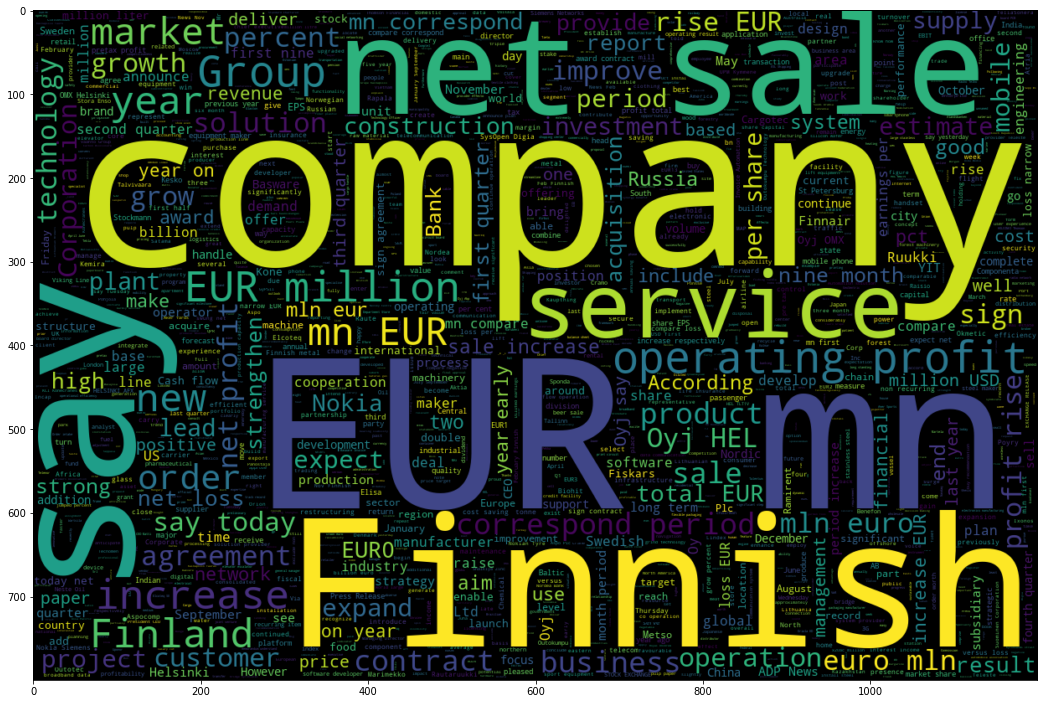

In [68]:
#Creating a wordcloud
plt.figure(figsize = (18,24))
wordcloud = WordCloud(min_font_size= 3, max_words= 2500, width= 1200, 
                      height= 800).generate(" ".join(pos))
plt.imshow(wordcloud, interpolation= 'bilinear')



In [30]:

count_vec = CountVectorizer(max_features = 4000, ngram_range = (1,2),
                            max_df = 0.9, min_df = 0 )

print(count_vec)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=4000, min_df=0,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [38]:
x_train_fearures = count_vec.fit_transform(x_train)
#print(x_train_fearures)

x_test_features = count_vec.transform(x_test)
#print(x_test_features)

x_train_fearures.shape, x_test_features.shape

((3876, 4000), (970, 4000))

In [36]:

##Predictions

In [39]:
##Logistic Regression

In [53]:
lr = LogisticRegression()
lr.fit(x_train_fearures,y_train)
y_pred = lr.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

76.08247422680412


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.72      0.52      0.60       128
     neutral       0.78      0.88      0.83       575
    positive       0.71      0.61      0.66       267

    accuracy                           0.76       970
   macro avg       0.74      0.67      0.70       970
weighted avg       0.76      0.76      0.75       970



In [56]:
# Simple Vector Machines


In [61]:
svc = SVC()
svc.fit(x_train_fearures,y_train)
svc_y_pred = svc.predict(x_test_features)
print(accuracy_score(y_test,svc_y_pred)*100)

72.88659793814432


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.72      0.52      0.60       128
     neutral       0.78      0.88      0.83       575
    positive       0.71      0.61      0.66       267

    accuracy                           0.76       970
   macro avg       0.74      0.67      0.70       970
weighted avg       0.76      0.76      0.75       970

